# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 87568 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)


  0% (    1 of 87568) |           | Elapsed Time: 0:00:30 ETA:  31 days, 8:08:45

  0% (   73 of 87568) |                    | Elapsed Time: 0:00:31 ETA:  0:19:53

  0% (  144 of 87568) |                    | Elapsed Time: 0:00:32 ETA:  0:20:02

  0% (  216 of 87568) |                    | Elapsed Time: 0:00:33 ETA:  0:19:59

  0% (  285 of 87568) |                    | Elapsed Time: 0:00:34 ETA:  0:20:07

  0% (  357 of 87568) |                    | Elapsed Time: 0:00:35 ETA:  0:20:04

  0% (  425 of 87568) |                    | Elapsed Time: 0:00:36 ETA:  0:20:13

  0% (  495 of 87568) |                    | Elapsed Time: 0:00:37 ETA:  0:20:13

  0% (  562 of 87568) |                    | Elapsed Time: 0:00:38 ETA:  0:20:19

  0% (  631 of 87568) |                    | Elapsed Time: 0:00:39 ETA:  0:20:20

  0% (  698 of 87568) |                    | Elapsed Time: 0:00:40 ETA:  0:20:29

  0% (  767 of 87568) |                    | Elapsed Time: 0:00:42 ETA:  0:20:33

  0% (  833 of 87568) |                    | Elapsed Time: 0:00:43 ETA:  0:20:43

  1% (  900 of 87568) |                    | Elapsed Time: 0:00:44 ETA:  0:20:48

  1% (  969 of 87568) |                    | Elapsed Time: 0:00:45 ETA:  0:20:53

  1% ( 1035 of 87568) |                    | Elapsed Time: 0:00:46 ETA:  0:20:56

  1% ( 1095 of 87568) |                    | Elapsed Time: 0:00:46 ETA:  0:20:58

  1% ( 1164 of 87568) |                    | Elapsed Time: 0:00:47 ETA:  0:20:52

  1% ( 1234 of 87568) |                    | Elapsed Time: 0:00:48 ETA:  0:20:49

  1% ( 1304 of 87568) |                    | Elapsed Time: 0:00:49 ETA:  0:20:42

  1% ( 1376 of 87568) |                    | Elapsed Time: 0:00:50 ETA:  0:20:34

  1% ( 1450 of 87568) |                    | Elapsed Time: 0:00:51 ETA:  0:20:17

  1% ( 1522 of 87568) |                    | Elapsed Time: 0:00:52 ETA:  0:20:06

  1% ( 1588 of 87568) |                    | Elapsed Time: 0:00:53 ETA:  0:20:10

  1% ( 1647 of 87568) |                    | Elapsed Time: 0:00:54 ETA:  0:20:22

  1% ( 1714 of 87568) |                    | Elapsed Time: 0:00:55 ETA:  0:20:25

  2% ( 1776 of 87568) |                    | Elapsed Time: 0:00:56 ETA:  0:20:39

  2% ( 1832 of 87568) |                    | Elapsed Time: 0:00:58 ETA:  0:22:59

  2% ( 1900 of 87568) |                    | Elapsed Time: 0:00:59 ETA:  0:23:02

  2% ( 1967 of 87568) |                    | Elapsed Time: 0:01:00 ETA:  0:23:11

  2% ( 2038 of 87568) |                    | Elapsed Time: 0:01:01 ETA:  0:23:19

  2% ( 2106 of 87568) |                    | Elapsed Time: 0:01:02 ETA:  0:23:28

  2% ( 2173 of 87568) |                    | Elapsed Time: 0:01:03 ETA:  0:23:25

  2% ( 2190 of 87568) |                    | Elapsed Time: 0:01:04 ETA:  0:23:15

  2% ( 2258 of 87568) |                    | Elapsed Time: 0:01:05 ETA:  0:23:11

  2% ( 2327 of 87568) |                    | Elapsed Time: 0:01:06 ETA:  0:22:52

  2% ( 2398 of 87568) |                    | Elapsed Time: 0:01:07 ETA:  0:20:16

  2% ( 2469 of 87568) |                    | Elapsed Time: 0:01:08 ETA:  0:20:08

  2% ( 2540 of 87568) |                    | Elapsed Time: 0:01:09 ETA:  0:19:58

  2% ( 2614 of 87568) |                    | Elapsed Time: 0:01:10 ETA:  0:19:51

  3% ( 2687 of 87568) |                    | Elapsed Time: 0:01:11 ETA:  0:19:38

  3% ( 2756 of 87568) |                    | Elapsed Time: 0:01:12 ETA:  0:19:32

  3% ( 2823 of 87568) |                    | Elapsed Time: 0:01:13 ETA:  0:19:39

  3% ( 2886 of 87568) |                    | Elapsed Time: 0:01:14 ETA:  0:19:49

  3% ( 2948 of 87568) |                    | Elapsed Time: 0:01:15 ETA:  0:20:02

  3% ( 3023 of 87568) |                    | Elapsed Time: 0:01:16 ETA:  0:19:53

  3% ( 3090 of 87568) |                    | Elapsed Time: 0:01:17 ETA:  0:20:01

  3% ( 3152 of 87568) |                    | Elapsed Time: 0:01:18 ETA:  0:20:18

  3% ( 3222 of 87568) |                    | Elapsed Time: 0:01:19 ETA:  0:20:25

  3% ( 3284 of 87568) |                    | Elapsed Time: 0:01:19 ETA:  0:20:28

  3% ( 3358 of 87568) |                    | Elapsed Time: 0:01:20 ETA:  0:20:16

  3% ( 3429 of 87568) |                    | Elapsed Time: 0:01:22 ETA:  0:20:07

  3% ( 3498 of 87568) |                    | Elapsed Time: 0:01:23 ETA:  0:19:53

  4% ( 3572 of 87568) |                    | Elapsed Time: 0:01:24 ETA:  0:19:27

  4% ( 3645 of 87568) |                    | Elapsed Time: 0:01:25 ETA:  0:19:30

  4% ( 3716 of 87568) |                    | Elapsed Time: 0:01:26 ETA:  0:19:20

  4% ( 3793 of 87568) |                    | Elapsed Time: 0:01:27 ETA:  0:18:50

  4% ( 3864 of 87568) |                    | Elapsed Time: 0:01:28 ETA:  0:18:47

  4% ( 3932 of 87568) |                    | Elapsed Time: 0:01:29 ETA:  0:18:55

  4% ( 4000 of 87568) |                    | Elapsed Time: 0:01:30 ETA:  0:19:04

  4% ( 4068 of 87568) |                    | Elapsed Time: 0:01:31 ETA:  0:19:09

  4% ( 4137 of 87568) |                    | Elapsed Time: 0:01:32 ETA:  0:19:07

  4% ( 4205 of 87568) |                    | Elapsed Time: 0:01:33 ETA:  0:19:17

  4% ( 4271 of 87568) |                    | Elapsed Time: 0:01:34 ETA:  0:19:30

  4% ( 4339 of 87568) |                    | Elapsed Time: 0:01:35 ETA:  0:19:35

  5% ( 4379 of 87568) |#                   | Elapsed Time: 0:01:35 ETA:  0:19:56

  5% ( 4446 of 87568) |#                   | Elapsed Time: 0:01:36 ETA:  0:20:03

  5% ( 4517 of 87568) |#                   | Elapsed Time: 0:01:37 ETA:  0:19:55

  5% ( 4586 of 87568) |#                   | Elapsed Time: 0:01:38 ETA:  0:19:54

  5% ( 4653 of 87568) |#                   | Elapsed Time: 0:01:39 ETA:  0:19:56

  5% ( 4718 of 87568) |#                   | Elapsed Time: 0:01:40 ETA:  0:20:05

  5% ( 4779 of 87568) |#                   | Elapsed Time: 0:01:41 ETA:  0:20:21

  5% ( 4840 of 87568) |#                   | Elapsed Time: 0:01:42 ETA:  0:20:33

  5% ( 4900 of 87568) |#                   | Elapsed Time: 0:01:43 ETA:  0:20:52

  5% ( 4956 of 87568) |#                   | Elapsed Time: 0:01:44 ETA:  0:21:15

  5% ( 5015 of 87568) |#                   | Elapsed Time: 0:01:45 ETA:  0:21:34

  5% ( 5075 of 87568) |#                   | Elapsed Time: 0:01:46 ETA:  0:22:00

  5% ( 5136 of 87568) |#                   | Elapsed Time: 0:01:47 ETA:  0:22:20

  5% ( 5194 of 87568) |#                   | Elapsed Time: 0:01:49 ETA:  0:25:42

  5% ( 5250 of 87568) |#                   | Elapsed Time: 0:01:50 ETA:  0:26:10

  6% ( 5308 of 87568) |#                   | Elapsed Time: 0:01:51 ETA:  0:26:19

  6% ( 5370 of 87568) |#                   | Elapsed Time: 0:01:52 ETA:  0:26:15

  6% ( 5428 of 87568) |#                   | Elapsed Time: 0:01:53 ETA:  0:26:19

  6% ( 5473 of 87568) |#                   | Elapsed Time: 0:01:54 ETA:  0:26:10

  6% ( 5538 of 87568) |#                   | Elapsed Time: 0:01:55 ETA:  0:25:51

  6% ( 5607 of 87568) |#                   | Elapsed Time: 0:01:56 ETA:  0:25:22

  6% ( 5676 of 87568) |#                   | Elapsed Time: 0:01:57 ETA:  0:24:56

  6% ( 5745 of 87568) |#                   | Elapsed Time: 0:01:58 ETA:  0:21:23

  6% ( 5813 of 87568) |#                   | Elapsed Time: 0:01:59 ETA:  0:20:52

  6% ( 5881 of 87568) |#                   | Elapsed Time: 0:02:00 ETA:  0:20:26

  6% ( 5949 of 87568) |#                   | Elapsed Time: 0:02:01 ETA:  0:20:10

  6% ( 6022 of 87568) |#                   | Elapsed Time: 0:02:02 ETA:  0:19:36

  6% ( 6089 of 87568) |#                   | Elapsed Time: 0:02:03 ETA:  0:19:25

  7% ( 6148 of 87568) |#                   | Elapsed Time: 0:02:04 ETA:  0:19:37

  7% ( 6211 of 87568) |#                   | Elapsed Time: 0:02:05 ETA:  0:19:49

  7% ( 6278 of 87568) |#                   | Elapsed Time: 0:02:06 ETA:  0:19:53

  7% ( 6348 of 87568) |#                   | Elapsed Time: 0:02:07 ETA:  0:19:50

  7% ( 6414 of 87568) |#                   | Elapsed Time: 0:02:08 ETA:  0:19:52

  7% ( 6480 of 87568) |#                   | Elapsed Time: 0:02:09 ETA:  0:19:56

  7% ( 6547 of 87568) |#                   | Elapsed Time: 0:02:10 ETA:  0:19:58

  7% ( 6568 of 87568) |#                   | Elapsed Time: 0:02:11 ETA:  0:20:14

  7% ( 6639 of 87568) |#                   | Elapsed Time: 0:02:12 ETA:  0:20:02

  7% ( 6710 of 87568) |#                   | Elapsed Time: 0:02:13 ETA:  0:19:31

  7% ( 6779 of 87568) |#                   | Elapsed Time: 0:02:14 ETA:  0:19:16

  7% ( 6846 of 87568) |#                   | Elapsed Time: 0:02:15 ETA:  0:19:13

  7% ( 6909 of 87568) |#                   | Elapsed Time: 0:02:16 ETA:  0:19:29

  7% ( 6978 of 87568) |#                   | Elapsed Time: 0:02:17 ETA:  0:19:21

  8% ( 7041 of 87568) |#                   | Elapsed Time: 0:02:18 ETA:  0:19:27

  8% ( 7109 of 87568) |#                   | Elapsed Time: 0:02:19 ETA:  0:19:24

  8% ( 7185 of 87568) |#                   | Elapsed Time: 0:02:20 ETA:  0:19:07

  8% ( 7259 of 87568) |#                   | Elapsed Time: 0:02:21 ETA:  0:19:00

  8% ( 7330 of 87568) |#                   | Elapsed Time: 0:02:22 ETA:  0:19:00

  8% ( 7392 of 87568) |#                   | Elapsed Time: 0:02:23 ETA:  0:19:13

  8% ( 7452 of 87568) |#                   | Elapsed Time: 0:02:24 ETA:  0:19:30

  8% ( 7511 of 87568) |#                   | Elapsed Time: 0:02:25 ETA:  0:19:37

  8% ( 7573 of 87568) |#                   | Elapsed Time: 0:02:26 ETA:  0:19:52

  8% ( 7636 of 87568) |#                   | Elapsed Time: 0:02:27 ETA:  0:19:49

  8% ( 7663 of 87568) |#                   | Elapsed Time: 0:02:27 ETA:  0:20:01

  8% ( 7725 of 87568) |#                   | Elapsed Time: 0:02:28 ETA:  0:20:33

  8% ( 7789 of 87568) |#                   | Elapsed Time: 0:02:29 ETA:  0:20:56

  8% ( 7848 of 87568) |#                   | Elapsed Time: 0:02:30 ETA:  0:21:28

  9% ( 7905 of 87568) |#                   | Elapsed Time: 0:02:31 ETA:  0:21:42

  9% ( 7971 of 87568) |#                   | Elapsed Time: 0:02:32 ETA:  0:21:24

  9% ( 8041 of 87568) |#                   | Elapsed Time: 0:02:33 ETA:  0:20:54

  9% ( 8113 of 87568) |#                   | Elapsed Time: 0:02:34 ETA:  0:20:28

  9% ( 8180 of 87568) |#                   | Elapsed Time: 0:02:35 ETA:  0:20:18

  9% ( 8253 of 87568) |#                   | Elapsed Time: 0:02:36 ETA:  0:19:51

  9% ( 8321 of 87568) |#                   | Elapsed Time: 0:02:37 ETA:  0:19:36

  9% ( 8387 of 87568) |#                   | Elapsed Time: 0:02:38 ETA:  0:19:31

  9% ( 8450 of 87568) |#                   | Elapsed Time: 0:02:39 ETA:  0:19:20

  9% ( 8515 of 87568) |#                   | Elapsed Time: 0:02:40 ETA:  0:19:02

  9% ( 8579 of 87568) |#                   | Elapsed Time: 0:02:41 ETA:  0:19:04

  9% ( 8645 of 87568) |#                   | Elapsed Time: 0:02:42 ETA:  0:19:11

  9% ( 8710 of 87568) |#                   | Elapsed Time: 0:02:43 ETA:  0:19:24

 10% ( 8757 of 87568) |##                  | Elapsed Time: 0:02:44 ETA:  0:19:36

 10% ( 8828 of 87568) |##                  | Elapsed Time: 0:02:45 ETA:  0:19:40

 10% ( 8901 of 87568) |##                  | Elapsed Time: 0:02:46 ETA:  0:19:28

 10% ( 8973 of 87568) |##                  | Elapsed Time: 0:02:47 ETA:  0:19:13

 10% ( 9047 of 87568) |##                  | Elapsed Time: 0:02:48 ETA:  0:18:47

 10% ( 9119 of 87568) |##                  | Elapsed Time: 0:02:49 ETA:  0:18:31

 10% ( 9180 of 87568) |##                  | Elapsed Time: 0:02:50 ETA:  0:18:36

 10% ( 9241 of 87568) |##                  | Elapsed Time: 0:02:51 ETA:  0:18:48

 10% ( 9294 of 87568) |##                  | Elapsed Time: 0:02:53 ETA:  0:22:21

 10% ( 9355 of 87568) |##                  | Elapsed Time: 0:02:54 ETA:  0:22:16

 10% ( 9414 of 87568) |##                  | Elapsed Time: 0:02:55 ETA:  0:22:44

 10% ( 9477 of 87568) |##                  | Elapsed Time: 0:02:56 ETA:  0:23:09

 10% ( 9541 of 87568) |##                  | Elapsed Time: 0:02:58 ETA:  0:23:32

 10% ( 9607 of 87568) |##                  | Elapsed Time: 0:02:59 ETA:  0:23:55

 11% ( 9674 of 87568) |##                  | Elapsed Time: 0:03:00 ETA:  0:24:09

 11% ( 9740 of 87568) |##                  | Elapsed Time: 0:03:01 ETA:  0:23:54

 11% ( 9808 of 87568) |##                  | Elapsed Time: 0:03:02 ETA:  0:23:32

 11% ( 9852 of 87568) |##                  | Elapsed Time: 0:03:02 ETA:  0:19:48

 11% ( 9915 of 87568) |##                  | Elapsed Time: 0:03:03 ETA:  0:19:41

 11% ( 9980 of 87568) |##                  | Elapsed Time: 0:03:04 ETA:  0:19:28

 11% (10046 of 87568) |##                  | Elapsed Time: 0:03:05 ETA:  0:19:21

 11% (10112 of 87568) |##                  | Elapsed Time: 0:03:06 ETA:  0:19:15

 11% (10178 of 87568) |##                  | Elapsed Time: 0:03:07 ETA:  0:19:14

 11% (10243 of 87568) |##                  | Elapsed Time: 0:03:08 ETA:  0:19:17

 11% (10307 of 87568) |##                  | Elapsed Time: 0:03:09 ETA:  0:19:19

 11% (10373 of 87568) |##                  | Elapsed Time: 0:03:10 ETA:  0:19:23

 11% (10436 of 87568) |##                  | Elapsed Time: 0:03:11 ETA:  0:19:28

 11% (10503 of 87568) |##                  | Elapsed Time: 0:03:12 ETA:  0:19:19

 12% (10569 of 87568) |##                  | Elapsed Time: 0:03:13 ETA:  0:19:14

 12% (10630 of 87568) |##                  | Elapsed Time: 0:03:14 ETA:  0:19:24

 12% (10694 of 87568) |##                  | Elapsed Time: 0:03:15 ETA:  0:19:27

 12% (10757 of 87568) |##                  | Elapsed Time: 0:03:16 ETA:  0:19:33

 12% (10822 of 87568) |##                  | Elapsed Time: 0:03:17 ETA:  0:19:32

 12% (10882 of 87568) |##                  | Elapsed Time: 0:03:18 ETA:  0:19:40

 12% (10946 of 87568) |##                  | Elapsed Time: 0:03:19 ETA:  0:19:43

 12% (11008 of 87568) |##                  | Elapsed Time: 0:03:20 ETA:  0:19:47

 12% (11074 of 87568) |##                  | Elapsed Time: 0:03:21 ETA:  0:19:48

 12% (11143 of 87568) |##                  | Elapsed Time: 0:03:22 ETA:  0:19:38

 12% (11210 of 87568) |##                  | Elapsed Time: 0:03:23 ETA:  0:19:23

 12% (11276 of 87568) |##                  | Elapsed Time: 0:03:24 ETA:  0:19:18

 12% (11342 of 87568) |##                  | Elapsed Time: 0:03:25 ETA:  0:19:10

 13% (11406 of 87568) |##                  | Elapsed Time: 0:03:26 ETA:  0:19:11

 13% (11471 of 87568) |##                  | Elapsed Time: 0:03:27 ETA:  0:19:00

 13% (11539 of 87568) |##                  | Elapsed Time: 0:03:28 ETA:  0:18:50

 13% (11606 of 87568) |##                  | Elapsed Time: 0:03:29 ETA:  0:18:35

 13% (11674 of 87568) |##                  | Elapsed Time: 0:03:30 ETA:  0:18:30

 13% (11739 of 87568) |##                  | Elapsed Time: 0:03:31 ETA:  0:18:39

 13% (11808 of 87568) |##                  | Elapsed Time: 0:03:32 ETA:  0:18:35

 13% (11879 of 87568) |##                  | Elapsed Time: 0:03:33 ETA:  0:18:22

 13% (11946 of 87568) |##                  | Elapsed Time: 0:03:34 ETA:  0:18:18

 13% (12017 of 87568) |##                  | Elapsed Time: 0:03:35 ETA:  0:18:03

 13% (12041 of 87568) |##                  | Elapsed Time: 0:03:36 ETA:  0:17:52

 13% (12108 of 87568) |##                  | Elapsed Time: 0:03:37 ETA:  0:17:53

 13% (12175 of 87568) |##                  | Elapsed Time: 0:03:38 ETA:  0:17:54

 13% (12238 of 87568) |##                  | Elapsed Time: 0:03:39 ETA:  0:18:06

 14% (12304 of 87568) |##                  | Elapsed Time: 0:03:40 ETA:  0:18:03

 14% (12370 of 87568) |##                  | Elapsed Time: 0:03:41 ETA:  0:18:10

 14% (12442 of 87568) |##                  | Elapsed Time: 0:03:42 ETA:  0:18:08

 14% (12510 of 87568) |##                  | Elapsed Time: 0:03:43 ETA:  0:18:04

 14% (12578 of 87568) |##                  | Elapsed Time: 0:03:44 ETA:  0:18:10

 14% (12647 of 87568) |##                  | Elapsed Time: 0:03:45 ETA:  0:18:08

 14% (12718 of 87568) |##                  | Elapsed Time: 0:03:46 ETA:  0:17:58

 14% (12789 of 87568) |##                  | Elapsed Time: 0:03:47 ETA:  0:17:47

 14% (12856 of 87568) |##                  | Elapsed Time: 0:03:48 ETA:  0:17:37

 14% (12924 of 87568) |##                  | Elapsed Time: 0:03:49 ETA:  0:17:30

 14% (12994 of 87568) |##                  | Elapsed Time: 0:03:50 ETA:  0:17:21

 14% (13063 of 87568) |##                  | Elapsed Time: 0:03:51 ETA:  0:17:25

 15% (13136 of 87568) |###                 | Elapsed Time: 0:03:52 ETA:  0:17:29

 15% (13203 of 87568) |###                 | Elapsed Time: 0:03:53 ETA:  0:17:34

 15% (13268 of 87568) |###                 | Elapsed Time: 0:03:54 ETA:  0:17:48

 15% (13330 of 87568) |###                 | Elapsed Time: 0:03:55 ETA:  0:18:09

 15% (13389 of 87568) |###                 | Elapsed Time: 0:03:56 ETA:  0:18:27

 15% (13453 of 87568) |###                 | Elapsed Time: 0:03:57 ETA:  0:18:37

 15% (13522 of 87568) |###                 | Elapsed Time: 0:03:58 ETA:  0:18:38

 15% (13595 of 87568) |###                 | Elapsed Time: 0:03:59 ETA:  0:18:26

 15% (13664 of 87568) |###                 | Elapsed Time: 0:04:00 ETA:  0:18:17

 15% (13737 of 87568) |###                 | Elapsed Time: 0:04:01 ETA:  0:17:59

 15% (13812 of 87568) |###                 | Elapsed Time: 0:04:02 ETA:  0:17:39

 15% (13887 of 87568) |###                 | Elapsed Time: 0:04:03 ETA:  0:17:17

 15% (13962 of 87568) |###                 | Elapsed Time: 0:04:04 ETA:  0:16:50

 16% (14032 of 87568) |###                 | Elapsed Time: 0:04:05 ETA:  0:16:27

 16% (14102 of 87568) |###                 | Elapsed Time: 0:04:06 ETA:  0:16:15

 16% (14172 of 87568) |###                 | Elapsed Time: 0:04:07 ETA:  0:16:13

 16% (14230 of 87568) |###                 | Elapsed Time: 0:04:08 ETA:  0:16:18

 16% (14300 of 87568) |###                 | Elapsed Time: 0:04:09 ETA:  0:16:16

 16% (14372 of 87568) |###                 | Elapsed Time: 0:04:10 ETA:  0:16:18

 16% (14445 of 87568) |###                 | Elapsed Time: 0:04:11 ETA:  0:16:20

 16% (14456 of 87568) |###                 | Elapsed Time: 0:04:13 ETA:  0:21:00

 16% (14523 of 87568) |###                 | Elapsed Time: 0:04:14 ETA:  0:21:22

 16% (14582 of 87568) |###                 | Elapsed Time: 0:04:15 ETA:  0:21:51

 16% (14651 of 87568) |###                 | Elapsed Time: 0:04:16 ETA:  0:21:52

 16% (14722 of 87568) |###                 | Elapsed Time: 0:04:17 ETA:  0:21:48

 16% (14794 of 87568) |###                 | Elapsed Time: 0:04:18 ETA:  0:21:35

 16% (14864 of 87568) |###                 | Elapsed Time: 0:04:19 ETA:  0:21:34

 17% (14935 of 87568) |###                 | Elapsed Time: 0:04:20 ETA:  0:21:36

 17% (15004 of 87568) |###                 | Elapsed Time: 0:04:21 ETA:  0:21:46

 17% (15074 of 87568) |###                 | Elapsed Time: 0:04:22 ETA:  0:17:04

 17% (15145 of 87568) |###                 | Elapsed Time: 0:04:23 ETA:  0:16:55

 17% (15215 of 87568) |###                 | Elapsed Time: 0:04:24 ETA:  0:16:31

 17% (15284 of 87568) |###                 | Elapsed Time: 0:04:25 ETA:  0:16:31

 17% (15325 of 87568) |###                 | Elapsed Time: 0:04:26 ETA:  0:16:28

 17% (15393 of 87568) |###                 | Elapsed Time: 0:04:27 ETA:  0:16:37

 17% (15463 of 87568) |###                 | Elapsed Time: 0:04:28 ETA:  0:16:36

 17% (15529 of 87568) |###                 | Elapsed Time: 0:04:29 ETA:  0:16:44

 17% (15595 of 87568) |###                 | Elapsed Time: 0:04:30 ETA:  0:16:49

 17% (15666 of 87568) |###                 | Elapsed Time: 0:04:31 ETA:  0:16:46

 17% (15737 of 87568) |###                 | Elapsed Time: 0:04:32 ETA:  0:16:44

 18% (15809 of 87568) |###                 | Elapsed Time: 0:04:33 ETA:  0:16:38

 18% (15878 of 87568) |###                 | Elapsed Time: 0:04:34 ETA:  0:16:37

 18% (15947 of 87568) |###                 | Elapsed Time: 0:04:35 ETA:  0:16:39

 18% (16019 of 87568) |###                 | Elapsed Time: 0:04:36 ETA:  0:16:28

 18% (16089 of 87568) |###                 | Elapsed Time: 0:04:37 ETA:  0:16:26

 18% (16161 of 87568) |###                 | Elapsed Time: 0:04:38 ETA:  0:16:14

 18% (16231 of 87568) |###                 | Elapsed Time: 0:04:39 ETA:  0:16:05

 18% (16301 of 87568) |###                 | Elapsed Time: 0:04:40 ETA:  0:16:06

 18% (16372 of 87568) |###                 | Elapsed Time: 0:04:41 ETA:  0:16:04

 18% (16419 of 87568) |###                 | Elapsed Time: 0:04:41 ETA:  0:16:07

 18% (16491 of 87568) |###                 | Elapsed Time: 0:04:42 ETA:  0:16:01

 18% (16565 of 87568) |###                 | Elapsed Time: 0:04:43 ETA:  0:15:51

 18% (16636 of 87568) |###                 | Elapsed Time: 0:04:44 ETA:  0:15:52

 19% (16707 of 87568) |###                 | Elapsed Time: 0:04:45 ETA:  0:15:51

 19% (16777 of 87568) |###                 | Elapsed Time: 0:04:46 ETA:  0:15:53

 19% (16846 of 87568) |###                 | Elapsed Time: 0:04:47 ETA:  0:15:55

 19% (16910 of 87568) |###                 | Elapsed Time: 0:04:48 ETA:  0:16:06

 19% (16981 of 87568) |###                 | Elapsed Time: 0:04:49 ETA:  0:16:07

 19% (17051 of 87568) |###                 | Elapsed Time: 0:04:50 ETA:  0:16:06

 19% (17123 of 87568) |###                 | Elapsed Time: 0:04:51 ETA:  0:16:04

 19% (17193 of 87568) |###                 | Elapsed Time: 0:04:52 ETA:  0:16:11

 19% (17262 of 87568) |###                 | Elapsed Time: 0:04:54 ETA:  0:16:16

 19% (17329 of 87568) |###                 | Elapsed Time: 0:04:55 ETA:  0:16:22

 19% (17393 of 87568) |###                 | Elapsed Time: 0:04:56 ETA:  0:16:32

 19% (17462 of 87568) |###                 | Elapsed Time: 0:04:57 ETA:  0:16:31

 20% (17514 of 87568) |####                | Elapsed Time: 0:04:57 ETA:  0:16:21

 20% (17582 of 87568) |####                | Elapsed Time: 0:04:58 ETA:  0:16:27

 20% (17650 of 87568) |####                | Elapsed Time: 0:04:59 ETA:  0:16:30

 20% (17718 of 87568) |####                | Elapsed Time: 0:05:00 ETA:  0:16:39

 20% (17784 of 87568) |####                | Elapsed Time: 0:05:01 ETA:  0:16:46

 20% (17846 of 87568) |####                | Elapsed Time: 0:05:02 ETA:  0:17:00

 20% (17911 of 87568) |####                | Elapsed Time: 0:05:03 ETA:  0:17:04

 20% (17974 of 87568) |####                | Elapsed Time: 0:05:04 ETA:  0:17:06

 20% (18043 of 87568) |####                | Elapsed Time: 0:05:05 ETA:  0:17:06

 20% (18115 of 87568) |####                | Elapsed Time: 0:05:06 ETA:  0:16:53

 20% (18188 of 87568) |####                | Elapsed Time: 0:05:07 ETA:  0:16:41

 20% (18261 of 87568) |####                | Elapsed Time: 0:05:08 ETA:  0:16:28

 20% (18332 of 87568) |####                | Elapsed Time: 0:05:09 ETA:  0:16:20

 21% (18405 of 87568) |####                | Elapsed Time: 0:05:10 ETA:  0:16:04

 21% (18476 of 87568) |####                | Elapsed Time: 0:05:11 ETA:  0:15:44

 21% (18546 of 87568) |####                | Elapsed Time: 0:05:12 ETA:  0:15:33

 21% (18609 of 87568) |####                | Elapsed Time: 0:05:13 ETA:  0:15:15

 21% (18681 of 87568) |####                | Elapsed Time: 0:05:14 ETA:  0:15:08

 21% (18751 of 87568) |####                | Elapsed Time: 0:05:15 ETA:  0:15:12

 21% (18823 of 87568) |####                | Elapsed Time: 0:05:16 ETA:  0:15:12

 21% (18896 of 87568) |####                | Elapsed Time: 0:05:17 ETA:  0:15:13

 21% (18968 of 87568) |####                | Elapsed Time: 0:05:18 ETA:  0:15:10

 21% (19034 of 87568) |####                | Elapsed Time: 0:05:19 ETA:  0:15:24

 21% (19106 of 87568) |####                | Elapsed Time: 0:05:20 ETA:  0:15:22

 21% (19175 of 87568) |####                | Elapsed Time: 0:05:21 ETA:  0:15:24

 21% (19252 of 87568) |####                | Elapsed Time: 0:05:22 ETA:  0:15:12

 22% (19330 of 87568) |####                | Elapsed Time: 0:05:23 ETA:  0:15:01

 22% (19405 of 87568) |####                | Elapsed Time: 0:05:24 ETA:  0:14:50

 22% (19467 of 87568) |####                | Elapsed Time: 0:05:25 ETA:  0:15:09

 22% (19533 of 87568) |####                | Elapsed Time: 0:05:26 ETA:  0:15:21

 22% (19596 of 87568) |####                | Elapsed Time: 0:05:27 ETA:  0:15:37

 22% (19661 of 87568) |####                | Elapsed Time: 0:05:28 ETA:  0:15:37

 22% (19703 of 87568) |####                | Elapsed Time: 0:05:29 ETA:  0:15:51

 22% (19766 of 87568) |####                | Elapsed Time: 0:05:30 ETA:  0:16:04

 22% (19830 of 87568) |####                | Elapsed Time: 0:05:31 ETA:  0:16:31

 22% (19897 of 87568) |####                | Elapsed Time: 0:05:32 ETA:  0:16:55

 22% (19964 of 87568) |####                | Elapsed Time: 0:05:33 ETA:  0:17:14

 22% (20030 of 87568) |####                | Elapsed Time: 0:05:34 ETA:  0:17:04

 22% (20093 of 87568) |####                | Elapsed Time: 0:05:35 ETA:  0:17:10

 23% (20167 of 87568) |####                | Elapsed Time: 0:05:36 ETA:  0:16:44

 23% (20236 of 87568) |####                | Elapsed Time: 0:05:37 ETA:  0:16:35

 23% (20296 of 87568) |####                | Elapsed Time: 0:05:38 ETA:  0:16:41

 23% (20361 of 87568) |####                | Elapsed Time: 0:05:39 ETA:  0:16:36

 23% (20422 of 87568) |####                | Elapsed Time: 0:05:40 ETA:  0:16:43

 23% (20484 of 87568) |####                | Elapsed Time: 0:05:41 ETA:  0:16:54

 23% (20545 of 87568) |####                | Elapsed Time: 0:05:42 ETA:  0:17:05

 23% (20613 of 87568) |####                | Elapsed Time: 0:05:43 ETA:  0:16:59

 23% (20685 of 87568) |####                | Elapsed Time: 0:05:44 ETA:  0:16:36

 23% (20751 of 87568) |####                | Elapsed Time: 0:05:45 ETA:  0:16:54

 23% (20798 of 87568) |####                | Elapsed Time: 0:05:46 ETA:  0:16:53

 23% (20826 of 87568) |####                | Elapsed Time: 0:05:49 ETA:  0:22:52

 23% (20891 of 87568) |####                | Elapsed Time: 0:05:50 ETA:  0:22:50

 23% (20957 of 87568) |####                | Elapsed Time: 0:05:51 ETA:  0:22:31

 24% (21026 of 87568) |####                | Elapsed Time: 0:05:52 ETA:  0:22:08

 24% (21095 of 87568) |####                | Elapsed Time: 0:05:53 ETA:  0:21:43

 24% (21164 of 87568) |####                | Elapsed Time: 0:05:54 ETA:  0:21:37

 24% (21234 of 87568) |####                | Elapsed Time: 0:05:55 ETA:  0:21:43

 24% (21307 of 87568) |####                | Elapsed Time: 0:05:56 ETA:  0:21:20

 24% (21382 of 87568) |####                | Elapsed Time: 0:05:57 ETA:  0:20:53

 24% (21451 of 87568) |####                | Elapsed Time: 0:05:58 ETA:  0:15:09

 24% (21518 of 87568) |####                | Elapsed Time: 0:05:59 ETA:  0:15:05

 24% (21584 of 87568) |####                | Elapsed Time: 0:06:00 ETA:  0:15:04

 24% (21652 of 87568) |####                | Elapsed Time: 0:06:01 ETA:  0:15:04

 24% (21724 of 87568) |####                | Elapsed Time: 0:06:02 ETA:  0:14:58

 24% (21799 of 87568) |####                | Elapsed Time: 0:06:03 ETA:  0:14:46

 24% (21868 of 87568) |####                | Elapsed Time: 0:06:04 ETA:  0:14:46

 25% (21892 of 87568) |#####               | Elapsed Time: 0:06:04 ETA:  0:14:53

 25% (21963 of 87568) |#####               | Elapsed Time: 0:06:05 ETA:  0:15:00

 25% (22031 of 87568) |#####               | Elapsed Time: 0:06:06 ETA:  0:15:03

 25% (22104 of 87568) |#####               | Elapsed Time: 0:06:07 ETA:  0:14:49

 25% (22176 of 87568) |#####               | Elapsed Time: 0:06:08 ETA:  0:14:36

 25% (22248 of 87568) |#####               | Elapsed Time: 0:06:09 ETA:  0:14:27

 25% (22319 of 87568) |#####               | Elapsed Time: 0:06:10 ETA:  0:14:28

 25% (22384 of 87568) |#####               | Elapsed Time: 0:06:11 ETA:  0:14:46

 25% (22449 of 87568) |#####               | Elapsed Time: 0:06:12 ETA:  0:14:54

 25% (22521 of 87568) |#####               | Elapsed Time: 0:06:13 ETA:  0:14:47

 25% (22588 of 87568) |#####               | Elapsed Time: 0:06:14 ETA:  0:14:55

 25% (22655 of 87568) |#####               | Elapsed Time: 0:06:15 ETA:  0:14:55

 25% (22718 of 87568) |#####               | Elapsed Time: 0:06:16 ETA:  0:15:13

 26% (22795 of 87568) |#####               | Elapsed Time: 0:06:17 ETA:  0:15:01

 26% (22872 of 87568) |#####               | Elapsed Time: 0:06:18 ETA:  0:14:50

 26% (22949 of 87568) |#####               | Elapsed Time: 0:06:19 ETA:  0:14:36

 26% (22987 of 87568) |#####               | Elapsed Time: 0:06:20 ETA:  0:14:18

 26% (23059 of 87568) |#####               | Elapsed Time: 0:06:21 ETA:  0:14:04

 26% (23121 of 87568) |#####               | Elapsed Time: 0:06:22 ETA:  0:14:24

 26% (23189 of 87568) |#####               | Elapsed Time: 0:06:23 ETA:  0:14:20

 26% (23258 of 87568) |#####               | Elapsed Time: 0:06:24 ETA:  0:14:17

 26% (23335 of 87568) |#####               | Elapsed Time: 0:06:25 ETA:  0:13:47

 26% (23412 of 87568) |#####               | Elapsed Time: 0:06:26 ETA:  0:13:47

 26% (23487 of 87568) |#####               | Elapsed Time: 0:06:27 ETA:  0:13:50

 26% (23558 of 87568) |#####               | Elapsed Time: 0:06:28 ETA:  0:14:02

 26% (23627 of 87568) |#####               | Elapsed Time: 0:06:29 ETA:  0:14:12

 27% (23690 of 87568) |#####               | Elapsed Time: 0:06:30 ETA:  0:14:28

 27% (23755 of 87568) |#####               | Elapsed Time: 0:06:31 ETA:  0:14:20

 27% (23825 of 87568) |#####               | Elapsed Time: 0:06:32 ETA:  0:14:15

 27% (23894 of 87568) |#####               | Elapsed Time: 0:06:33 ETA:  0:14:13

 27% (23961 of 87568) |#####               | Elapsed Time: 0:06:34 ETA:  0:14:31

 27% (24033 of 87568) |#####               | Elapsed Time: 0:06:35 ETA:  0:14:41

 27% (24082 of 87568) |#####               | Elapsed Time: 0:06:35 ETA:  0:14:43

 27% (24155 of 87568) |#####               | Elapsed Time: 0:06:36 ETA:  0:14:37

 27% (24226 of 87568) |#####               | Elapsed Time: 0:06:37 ETA:  0:14:32

 27% (24298 of 87568) |#####               | Elapsed Time: 0:06:38 ETA:  0:14:12

 27% (24367 of 87568) |#####               | Elapsed Time: 0:06:39 ETA:  0:14:03

 27% (24444 of 87568) |#####               | Elapsed Time: 0:06:40 ETA:  0:13:48

 27% (24518 of 87568) |#####               | Elapsed Time: 0:06:41 ETA:  0:13:37

 28% (24595 of 87568) |#####               | Elapsed Time: 0:06:42 ETA:  0:13:17

 28% (24673 of 87568) |#####               | Elapsed Time: 0:06:43 ETA:  0:13:04

 28% (24751 of 87568) |#####               | Elapsed Time: 0:06:44 ETA:  0:13:00

 28% (24828 of 87568) |#####               | Elapsed Time: 0:06:45 ETA:  0:12:53

 28% (24906 of 87568) |#####               | Elapsed Time: 0:06:46 ETA:  0:12:40

 28% (24981 of 87568) |#####               | Elapsed Time: 0:06:47 ETA:  0:12:34

 28% (25056 of 87568) |#####               | Elapsed Time: 0:06:48 ETA:  0:12:23

 28% (25130 of 87568) |#####               | Elapsed Time: 0:06:49 ETA:  0:12:27

 28% (25176 of 87568) |#####               | Elapsed Time: 0:06:50 ETA:  0:12:29

 28% (25249 of 87568) |#####               | Elapsed Time: 0:06:51 ETA:  0:12:36

 28% (25313 of 87568) |#####               | Elapsed Time: 0:06:52 ETA:  0:13:00

 28% (25376 of 87568) |#####               | Elapsed Time: 0:06:53 ETA:  0:13:29

 29% (25443 of 87568) |#####               | Elapsed Time: 0:06:54 ETA:  0:13:47

 29% (25515 of 87568) |#####               | Elapsed Time: 0:06:55 ETA:  0:13:59

 29% (25589 of 87568) |#####               | Elapsed Time: 0:06:56 ETA:  0:13:59

 29% (25662 of 87568) |#####               | Elapsed Time: 0:06:57 ETA:  0:14:03

 29% (25731 of 87568) |#####               | Elapsed Time: 0:06:58 ETA:  0:14:13

 29% (25801 of 87568) |#####               | Elapsed Time: 0:06:59 ETA:  0:14:12

 29% (25870 of 87568) |#####               | Elapsed Time: 0:07:00 ETA:  0:14:18

 29% (25936 of 87568) |#####               | Elapsed Time: 0:07:01 ETA:  0:14:11

 29% (26004 of 87568) |#####               | Elapsed Time: 0:07:02 ETA:  0:14:00

 29% (26076 of 87568) |#####               | Elapsed Time: 0:07:03 ETA:  0:13:48

 29% (26145 of 87568) |#####               | Elapsed Time: 0:07:04 ETA:  0:13:53

 29% (26211 of 87568) |#####               | Elapsed Time: 0:07:05 ETA:  0:14:08

 30% (26271 of 87568) |######              | Elapsed Time: 0:07:06 ETA:  0:14:25

 30% (26337 of 87568) |######              | Elapsed Time: 0:07:07 ETA:  0:14:30

 30% (26402 of 87568) |######              | Elapsed Time: 0:07:08 ETA:  0:14:40

 30% (26466 of 87568) |######              | Elapsed Time: 0:07:09 ETA:  0:14:50

 30% (26529 of 87568) |######              | Elapsed Time: 0:07:10 ETA:  0:14:58

 30% (26601 of 87568) |######              | Elapsed Time: 0:07:11 ETA:  0:14:48

 30% (26671 of 87568) |######              | Elapsed Time: 0:07:12 ETA:  0:14:51

 30% (26740 of 87568) |######              | Elapsed Time: 0:07:13 ETA:  0:14:50

 30% (26809 of 87568) |######              | Elapsed Time: 0:07:14 ETA:  0:14:41

 30% (26881 of 87568) |######              | Elapsed Time: 0:07:15 ETA:  0:14:23

 30% (26955 of 87568) |######              | Elapsed Time: 0:07:16 ETA:  0:14:05

 30% (27023 of 87568) |######              | Elapsed Time: 0:07:17 ETA:  0:13:59

 30% (27093 of 87568) |######              | Elapsed Time: 0:07:18 ETA:  0:13:46

 31% (27167 of 87568) |######              | Elapsed Time: 0:07:19 ETA:  0:13:22

 31% (27240 of 87568) |######              | Elapsed Time: 0:07:20 ETA:  0:13:20

 31% (27307 of 87568) |######              | Elapsed Time: 0:07:21 ETA:  0:13:25

 31% (27365 of 87568) |######              | Elapsed Time: 0:07:22 ETA:  0:13:30

 31% (27435 of 87568) |######              | Elapsed Time: 0:07:23 ETA:  0:13:27

 31% (27508 of 87568) |######              | Elapsed Time: 0:07:24 ETA:  0:13:24

 31% (27575 of 87568) |######              | Elapsed Time: 0:07:25 ETA:  0:13:37

 31% (27650 of 87568) |######              | Elapsed Time: 0:07:26 ETA:  0:13:22

 31% (27722 of 87568) |######              | Elapsed Time: 0:07:27 ETA:  0:13:17

 31% (27791 of 87568) |######              | Elapsed Time: 0:07:28 ETA:  0:13:26

 31% (27861 of 87568) |######              | Elapsed Time: 0:07:29 ETA:  0:13:30

 31% (27933 of 87568) |######              | Elapsed Time: 0:07:30 ETA:  0:13:19

 31% (28002 of 87568) |######              | Elapsed Time: 0:07:31 ETA:  0:13:13

 32% (28079 of 87568) |######              | Elapsed Time: 0:07:32 ETA:  0:12:59

 32% (28154 of 87568) |######              | Elapsed Time: 0:07:33 ETA:  0:12:53

 32% (28219 of 87568) |######              | Elapsed Time: 0:07:34 ETA:  0:12:57

 32% (28285 of 87568) |######              | Elapsed Time: 0:07:35 ETA:  0:13:14

 32% (28354 of 87568) |######              | Elapsed Time: 0:07:36 ETA:  0:13:18

 32% (28427 of 87568) |######              | Elapsed Time: 0:07:37 ETA:  0:13:09

 32% (28460 of 87568) |######              | Elapsed Time: 0:07:38 ETA:  0:13:06

 32% (28531 of 87568) |######              | Elapsed Time: 0:07:39 ETA:  0:13:07

 32% (28597 of 87568) |######              | Elapsed Time: 0:07:40 ETA:  0:13:11

 32% (28620 of 87568) |######              | Elapsed Time: 0:07:43 ETA:  0:21:14

 32% (28689 of 87568) |######              | Elapsed Time: 0:07:44 ETA:  0:21:34

 32% (28756 of 87568) |######              | Elapsed Time: 0:07:45 ETA:  0:21:26

 32% (28811 of 87568) |######              | Elapsed Time: 0:07:46 ETA:  0:22:01

 32% (28864 of 87568) |######              | Elapsed Time: 0:07:47 ETA:  0:22:58

 33% (28933 of 87568) |######              | Elapsed Time: 0:07:48 ETA:  0:23:11

 33% (28997 of 87568) |######              | Elapsed Time: 0:07:49 ETA:  0:22:53

 33% (29061 of 87568) |######              | Elapsed Time: 0:07:50 ETA:  0:23:17

 33% (29125 of 87568) |######              | Elapsed Time: 0:07:51 ETA:  0:23:24

 33% (29176 of 87568) |######              | Elapsed Time: 0:07:52 ETA:  0:15:56

 33% (29247 of 87568) |######              | Elapsed Time: 0:07:53 ETA:  0:15:49

 33% (29316 of 87568) |######              | Elapsed Time: 0:07:54 ETA:  0:15:43

 33% (29383 of 87568) |######              | Elapsed Time: 0:07:55 ETA:  0:15:11

 33% (29451 of 87568) |######              | Elapsed Time: 0:07:56 ETA:  0:14:34

 33% (29518 of 87568) |######              | Elapsed Time: 0:07:57 ETA:  0:14:38

 33% (29555 of 87568) |######              | Elapsed Time: 0:07:58 ETA:  0:14:27

 33% (29625 of 87568) |######              | Elapsed Time: 0:07:59 ETA:  0:14:11

 33% (29694 of 87568) |######              | Elapsed Time: 0:08:00 ETA:  0:13:58

 33% (29758 of 87568) |######              | Elapsed Time: 0:08:01 ETA:  0:13:29

 34% (29830 of 87568) |######              | Elapsed Time: 0:08:02 ETA:  0:13:28

 34% (29894 of 87568) |######              | Elapsed Time: 0:08:03 ETA:  0:13:37

 34% (29959 of 87568) |######              | Elapsed Time: 0:08:04 ETA:  0:13:41

 34% (30025 of 87568) |######              | Elapsed Time: 0:08:05 ETA:  0:13:44

 34% (30096 of 87568) |######              | Elapsed Time: 0:08:06 ETA:  0:13:33

 34% (30170 of 87568) |######              | Elapsed Time: 0:08:07 ETA:  0:13:23

 34% (30242 of 87568) |######              | Elapsed Time: 0:08:08 ETA:  0:13:17

 34% (30317 of 87568) |######              | Elapsed Time: 0:08:09 ETA:  0:13:03

 34% (30393 of 87568) |######              | Elapsed Time: 0:08:10 ETA:  0:12:37

 34% (30457 of 87568) |######              | Elapsed Time: 0:08:11 ETA:  0:12:51

 34% (30528 of 87568) |######              | Elapsed Time: 0:08:12 ETA:  0:12:36

 34% (30598 of 87568) |######              | Elapsed Time: 0:08:13 ETA:  0:12:26

 35% (30649 of 87568) |#######             | Elapsed Time: 0:08:13 ETA:  0:12:23

 35% (30720 of 87568) |#######             | Elapsed Time: 0:08:14 ETA:  0:12:22

 35% (30792 of 87568) |#######             | Elapsed Time: 0:08:15 ETA:  0:12:26

 35% (30863 of 87568) |#######             | Elapsed Time: 0:08:16 ETA:  0:12:26

 35% (30933 of 87568) |#######             | Elapsed Time: 0:08:17 ETA:  0:12:37

 35% (31003 of 87568) |#######             | Elapsed Time: 0:08:18 ETA:  0:12:48

 35% (31073 of 87568) |#######             | Elapsed Time: 0:08:19 ETA:  0:12:37

 35% (31144 of 87568) |#######             | Elapsed Time: 0:08:20 ETA:  0:12:37

 35% (31212 of 87568) |#######             | Elapsed Time: 0:08:21 ETA:  0:12:41

 35% (31278 of 87568) |#######             | Elapsed Time: 0:08:22 ETA:  0:12:42

 35% (31343 of 87568) |#######             | Elapsed Time: 0:08:23 ETA:  0:12:53

 35% (31409 of 87568) |#######             | Elapsed Time: 0:08:24 ETA:  0:13:03

 35% (31471 of 87568) |#######             | Elapsed Time: 0:08:25 ETA:  0:13:21

 36% (31531 of 87568) |#######             | Elapsed Time: 0:08:27 ETA:  0:13:41

 36% (31593 of 87568) |#######             | Elapsed Time: 0:08:28 ETA:  0:13:58

 36% (31655 of 87568) |#######             | Elapsed Time: 0:08:29 ETA:  0:14:15

 36% (31725 of 87568) |#######             | Elapsed Time: 0:08:30 ETA:  0:14:15

 36% (31744 of 87568) |#######             | Elapsed Time: 0:08:30 ETA:  0:14:19

 36% (31815 of 87568) |#######             | Elapsed Time: 0:08:31 ETA:  0:14:07

 36% (31886 of 87568) |#######             | Elapsed Time: 0:08:32 ETA:  0:13:51

 36% (31959 of 87568) |#######             | Elapsed Time: 0:08:33 ETA:  0:13:34

 36% (32026 of 87568) |#######             | Elapsed Time: 0:08:34 ETA:  0:13:21

 36% (32094 of 87568) |#######             | Elapsed Time: 0:08:35 ETA:  0:13:01

 36% (32165 of 87568) |#######             | Elapsed Time: 0:08:36 ETA:  0:12:40

 36% (32236 of 87568) |#######             | Elapsed Time: 0:08:37 ETA:  0:12:18

 36% (32308 of 87568) |#######             | Elapsed Time: 0:08:38 ETA:  0:12:12

 36% (32374 of 87568) |#######             | Elapsed Time: 0:08:39 ETA:  0:12:19

 37% (32436 of 87568) |#######             | Elapsed Time: 0:08:40 ETA:  0:12:35

 37% (32502 of 87568) |#######             | Elapsed Time: 0:08:41 ETA:  0:12:45

 37% (32577 of 87568) |#######             | Elapsed Time: 0:08:42 ETA:  0:12:39

 37% (32647 of 87568) |#######             | Elapsed Time: 0:08:43 ETA:  0:12:32

 37% (32718 of 87568) |#######             | Elapsed Time: 0:08:44 ETA:  0:12:25

 37% (32788 of 87568) |#######             | Elapsed Time: 0:08:45 ETA:  0:12:26

 37% (32838 of 87568) |#######             | Elapsed Time: 0:08:46 ETA:  0:12:28

 37% (32909 of 87568) |#######             | Elapsed Time: 0:08:47 ETA:  0:12:30

 37% (32981 of 87568) |#######             | Elapsed Time: 0:08:48 ETA:  0:12:17

 37% (33051 of 87568) |#######             | Elapsed Time: 0:08:49 ETA:  0:11:59

 37% (33121 of 87568) |#######             | Elapsed Time: 0:08:50 ETA:  0:11:51

 37% (33193 of 87568) |#######             | Elapsed Time: 0:08:51 ETA:  0:11:56

 37% (33259 of 87568) |#######             | Elapsed Time: 0:08:52 ETA:  0:12:03

 38% (33327 of 87568) |#######             | Elapsed Time: 0:08:53 ETA:  0:12:08

 38% (33395 of 87568) |#######             | Elapsed Time: 0:08:54 ETA:  0:12:10

 38% (33460 of 87568) |#######             | Elapsed Time: 0:08:55 ETA:  0:12:19

 38% (33528 of 87568) |#######             | Elapsed Time: 0:08:56 ETA:  0:12:24

 38% (33596 of 87568) |#######             | Elapsed Time: 0:08:57 ETA:  0:12:30

 38% (33661 of 87568) |#######             | Elapsed Time: 0:08:58 ETA:  0:12:40

 38% (33733 of 87568) |#######             | Elapsed Time: 0:08:59 ETA:  0:12:34

 38% (33807 of 87568) |#######             | Elapsed Time: 0:09:00 ETA:  0:12:29

 38% (33877 of 87568) |#######             | Elapsed Time: 0:09:01 ETA:  0:12:21

 38% (33933 of 87568) |#######             | Elapsed Time: 0:09:02 ETA:  0:12:21

 38% (34002 of 87568) |#######             | Elapsed Time: 0:09:03 ETA:  0:12:19

 38% (34069 of 87568) |#######             | Elapsed Time: 0:09:04 ETA:  0:12:15

 38% (34140 of 87568) |#######             | Elapsed Time: 0:09:05 ETA:  0:12:09

 39% (34213 of 87568) |#######             | Elapsed Time: 0:09:06 ETA:  0:11:59

 39% (34283 of 87568) |#######             | Elapsed Time: 0:09:07 ETA:  0:11:49

 39% (34353 of 87568) |#######             | Elapsed Time: 0:09:08 ETA:  0:11:54

 39% (34430 of 87568) |#######             | Elapsed Time: 0:09:09 ETA:  0:11:46

 39% (34503 of 87568) |#######             | Elapsed Time: 0:09:10 ETA:  0:11:38

 39% (34579 of 87568) |#######             | Elapsed Time: 0:09:11 ETA:  0:11:22

 39% (34654 of 87568) |#######             | Elapsed Time: 0:09:12 ETA:  0:11:09

 39% (34729 of 87568) |#######             | Elapsed Time: 0:09:13 ETA:  0:10:52

 39% (34796 of 87568) |#######             | Elapsed Time: 0:09:14 ETA:  0:10:57

 39% (34862 of 87568) |#######             | Elapsed Time: 0:09:15 ETA:  0:11:09

 39% (34932 of 87568) |#######             | Elapsed Time: 0:09:16 ETA:  0:11:09

 39% (34996 of 87568) |#######             | Elapsed Time: 0:09:17 ETA:  0:11:18

 40% (35028 of 87568) |########            | Elapsed Time: 0:09:17 ETA:  0:11:29

 40% (35098 of 87568) |########            | Elapsed Time: 0:09:18 ETA:  0:11:34

 40% (35157 of 87568) |########            | Elapsed Time: 0:09:19 ETA:  0:12:09

 40% (35215 of 87568) |########            | Elapsed Time: 0:09:20 ETA:  0:12:49

 40% (35272 of 87568) |########            | Elapsed Time: 0:09:21 ETA:  0:13:34

 40% (35334 of 87568) |########            | Elapsed Time: 0:09:22 ETA:  0:13:46

 40% (35397 of 87568) |########            | Elapsed Time: 0:09:23 ETA:  0:13:54

 40% (35466 of 87568) |########            | Elapsed Time: 0:09:24 ETA:  0:13:54

 40% (35535 of 87568) |########            | Elapsed Time: 0:09:25 ETA:  0:13:40

 40% (35609 of 87568) |########            | Elapsed Time: 0:09:26 ETA:  0:13:22

 40% (35671 of 87568) |########            | Elapsed Time: 0:09:27 ETA:  0:13:41

 40% (35739 of 87568) |########            | Elapsed Time: 0:09:28 ETA:  0:13:18

 40% (35807 of 87568) |########            | Elapsed Time: 0:09:29 ETA:  0:12:52

 40% (35873 of 87568) |########            | Elapsed Time: 0:09:30 ETA:  0:12:29

 41% (35943 of 87568) |########            | Elapsed Time: 0:09:31 ETA:  0:12:12

 41% (36009 of 87568) |########            | Elapsed Time: 0:09:32 ETA:  0:12:02

 41% (36080 of 87568) |########            | Elapsed Time: 0:09:33 ETA:  0:11:57

 41% (36122 of 87568) |########            | Elapsed Time: 0:09:34 ETA:  0:11:53

 41% (36193 of 87568) |########            | Elapsed Time: 0:09:35 ETA:  0:11:58

 41% (36262 of 87568) |########            | Elapsed Time: 0:09:36 ETA:  0:11:44

 41% (36320 of 87568) |########            | Elapsed Time: 0:09:37 ETA:  0:12:05

 41% (36391 of 87568) |########            | Elapsed Time: 0:09:38 ETA:  0:11:57

 41% (36448 of 87568) |########            | Elapsed Time: 0:09:39 ETA:  0:12:19

 41% (36514 of 87568) |########            | Elapsed Time: 0:09:40 ETA:  0:12:26

 41% (36582 of 87568) |########            | Elapsed Time: 0:09:41 ETA:  0:12:19

 41% (36654 of 87568) |########            | Elapsed Time: 0:09:42 ETA:  0:12:16

 41% (36722 of 87568) |########            | Elapsed Time: 0:09:43 ETA:  0:12:20

 42% (36789 of 87568) |########            | Elapsed Time: 0:09:44 ETA:  0:12:29

 42% (36861 of 87568) |########            | Elapsed Time: 0:09:45 ETA:  0:12:20

 42% (36929 of 87568) |########            | Elapsed Time: 0:09:46 ETA:  0:11:58

 42% (36994 of 87568) |########            | Elapsed Time: 0:09:47 ETA:  0:12:10

 42% (37069 of 87568) |########            | Elapsed Time: 0:09:48 ETA:  0:11:29

 42% (37139 of 87568) |########            | Elapsed Time: 0:09:49 ETA:  0:11:19

 42% (37217 of 87568) |########            | Elapsed Time: 0:09:50 ETA:  0:11:24

 42% (37278 of 87568) |########            | Elapsed Time: 0:09:51 ETA:  0:11:39

 42% (37331 of 87568) |########            | Elapsed Time: 0:09:52 ETA:  0:12:11

 42% (37390 of 87568) |########            | Elapsed Time: 0:09:53 ETA:  0:12:42

 42% (37460 of 87568) |########            | Elapsed Time: 0:09:54 ETA:  0:12:37

 42% (37519 of 87568) |########            | Elapsed Time: 0:09:55 ETA:  0:12:51

 42% (37583 of 87568) |########            | Elapsed Time: 0:09:56 ETA:  0:13:20

 42% (37643 of 87568) |########            | Elapsed Time: 0:09:57 ETA:  0:13:48

 43% (37710 of 87568) |########            | Elapsed Time: 0:09:58 ETA:  0:13:51

 43% (37776 of 87568) |########            | Elapsed Time: 0:09:59 ETA:  0:13:40

 43% (37845 of 87568) |########            | Elapsed Time: 0:10:00 ETA:  0:13:18

 43% (37914 of 87568) |########            | Elapsed Time: 0:10:01 ETA:  0:12:39

 43% (37982 of 87568) |########            | Elapsed Time: 0:10:02 ETA:  0:12:17

 43% (38053 of 87568) |########            | Elapsed Time: 0:10:03 ETA:  0:12:13

 43% (38124 of 87568) |########            | Elapsed Time: 0:10:04 ETA:  0:11:47

 43% (38192 of 87568) |########            | Elapsed Time: 0:10:05 ETA:  0:11:38

 43% (38234 of 87568) |########            | Elapsed Time: 0:10:10 ETA:  0:20:42

 43% (38311 of 87568) |########            | Elapsed Time: 0:10:11 ETA:  0:21:27

 43% (38371 of 87568) |########            | Elapsed Time: 0:10:12 ETA:  0:21:59

 43% (38433 of 87568) |########            | Elapsed Time: 0:10:13 ETA:  0:22:25

 43% (38489 of 87568) |########            | Elapsed Time: 0:10:14 ETA:  0:23:11

 44% (38550 of 87568) |########            | Elapsed Time: 0:10:15 ETA:  0:23:49

 44% (38614 of 87568) |########            | Elapsed Time: 0:10:16 ETA:  0:24:17

 44% (38680 of 87568) |########            | Elapsed Time: 0:10:17 ETA:  0:24:24

 44% (38743 of 87568) |########            | Elapsed Time: 0:10:18 ETA:  0:13:08

 44% (38809 of 87568) |########            | Elapsed Time: 0:10:19 ETA:  0:13:19

 44% (38878 of 87568) |########            | Elapsed Time: 0:10:20 ETA:  0:13:02

 44% (38947 of 87568) |########            | Elapsed Time: 0:10:21 ETA:  0:12:39

 44% (39013 of 87568) |########            | Elapsed Time: 0:10:22 ETA:  0:12:28

 44% (39078 of 87568) |########            | Elapsed Time: 0:10:23 ETA:  0:12:06

 44% (39144 of 87568) |########            | Elapsed Time: 0:10:24 ETA:  0:11:56

 44% (39210 of 87568) |########            | Elapsed Time: 0:10:25 ETA:  0:11:49

 44% (39275 of 87568) |########            | Elapsed Time: 0:10:26 ETA:  0:11:49

 44% (39344 of 87568) |########            | Elapsed Time: 0:10:27 ETA:  0:11:34

 45% (39406 of 87568) |#########           | Elapsed Time: 0:10:28 ETA:  0:11:35

 45% (39476 of 87568) |#########           | Elapsed Time: 0:10:29 ETA:  0:11:33

 45% (39547 of 87568) |#########           | Elapsed Time: 0:10:30 ETA:  0:11:27

 45% (39618 of 87568) |#########           | Elapsed Time: 0:10:31 ETA:  0:11:15

 45% (39689 of 87568) |#########           | Elapsed Time: 0:10:32 ETA:  0:11:01

 45% (39761 of 87568) |#########           | Elapsed Time: 0:10:33 ETA:  0:10:47

 45% (39823 of 87568) |#########           | Elapsed Time: 0:10:34 ETA:  0:10:54

 45% (39884 of 87568) |#########           | Elapsed Time: 0:10:35 ETA:  0:11:01

 45% (39952 of 87568) |#########           | Elapsed Time: 0:10:36 ETA:  0:11:03

 45% (40021 of 87568) |#########           | Elapsed Time: 0:10:37 ETA:  0:10:52

 45% (40089 of 87568) |#########           | Elapsed Time: 0:10:38 ETA:  0:10:55

 45% (40161 of 87568) |#########           | Elapsed Time: 0:10:39 ETA:  0:10:53

 45% (40232 of 87568) |#########           | Elapsed Time: 0:10:40 ETA:  0:10:51

 46% (40305 of 87568) |#########           | Elapsed Time: 0:10:41 ETA:  0:10:47

 46% (40373 of 87568) |#########           | Elapsed Time: 0:10:42 ETA:  0:10:54

 46% (40434 of 87568) |#########           | Elapsed Time: 0:10:43 ETA:  0:10:55

 46% (40486 of 87568) |#########           | Elapsed Time: 0:10:44 ETA:  0:11:15

 46% (40501 of 87568) |#########           | Elapsed Time: 0:10:44 ETA:  0:11:26

 46% (40556 of 87568) |#########           | Elapsed Time: 0:10:45 ETA:  0:12:00

 46% (40630 of 87568) |#########           | Elapsed Time: 0:10:46 ETA:  0:11:43

 46% (40702 of 87568) |#########           | Elapsed Time: 0:10:47 ETA:  0:11:41

 46% (40777 of 87568) |#########           | Elapsed Time: 0:10:48 ETA:  0:11:30

 46% (40841 of 87568) |#########           | Elapsed Time: 0:10:49 ETA:  0:11:50

 46% (40906 of 87568) |#########           | Elapsed Time: 0:10:50 ETA:  0:11:56

 46% (40976 of 87568) |#########           | Elapsed Time: 0:10:51 ETA:  0:11:32

 46% (41045 of 87568) |#########           | Elapsed Time: 0:10:52 ETA:  0:10:48

 46% (41110 of 87568) |#########           | Elapsed Time: 0:10:53 ETA:  0:10:46

 47% (41172 of 87568) |#########           | Elapsed Time: 0:10:54 ETA:  0:10:29

 47% (41245 of 87568) |#########           | Elapsed Time: 0:10:55 ETA:  0:10:31

 47% (41317 of 87568) |#########           | Elapsed Time: 0:10:56 ETA:  0:10:30

 47% (41384 of 87568) |#########           | Elapsed Time: 0:10:57 ETA:  0:10:47

 47% (41450 of 87568) |#########           | Elapsed Time: 0:10:58 ETA:  0:10:42

 47% (41519 of 87568) |#########           | Elapsed Time: 0:10:59 ETA:  0:10:32

 47% (41595 of 87568) |#########           | Elapsed Time: 0:11:01 ETA:  0:10:50

 47% (41657 of 87568) |#########           | Elapsed Time: 0:11:02 ETA:  0:10:56

 47% (41722 of 87568) |#########           | Elapsed Time: 0:11:03 ETA:  0:10:49

 47% (41782 of 87568) |#########           | Elapsed Time: 0:11:04 ETA:  0:11:19

 47% (41843 of 87568) |#########           | Elapsed Time: 0:11:05 ETA:  0:11:44

 47% (41910 of 87568) |#########           | Elapsed Time: 0:11:06 ETA:  0:11:42

 47% (41983 of 87568) |#########           | Elapsed Time: 0:11:07 ETA:  0:11:25

 48% (42052 of 87568) |#########           | Elapsed Time: 0:11:08 ETA:  0:11:24

 48% (42124 of 87568) |#########           | Elapsed Time: 0:11:09 ETA:  0:11:03

 48% (42194 of 87568) |#########           | Elapsed Time: 0:11:10 ETA:  0:10:54

 48% (42267 of 87568) |#########           | Elapsed Time: 0:11:11 ETA:  0:10:29

 48% (42337 of 87568) |#########           | Elapsed Time: 0:11:12 ETA:  0:10:17

 48% (42409 of 87568) |#########           | Elapsed Time: 0:11:13 ETA:  0:09:51

 48% (42481 of 87568) |#########           | Elapsed Time: 0:11:14 ETA:  0:09:30

 48% (42553 of 87568) |#########           | Elapsed Time: 0:11:15 ETA:  0:09:20

 48% (42625 of 87568) |#########           | Elapsed Time: 0:11:16 ETA:  0:09:20

 48% (42690 of 87568) |#########           | Elapsed Time: 0:11:17 ETA:  0:09:11

 48% (42763 of 87568) |#########           | Elapsed Time: 0:11:18 ETA:  0:09:08

 48% (42833 of 87568) |#########           | Elapsed Time: 0:11:19 ETA:  0:09:05

 48% (42903 of 87568) |#########           | Elapsed Time: 0:11:20 ETA:  0:09:11

 49% (42979 of 87568) |#########           | Elapsed Time: 0:11:21 ETA:  0:08:58

 49% (43053 of 87568) |#########           | Elapsed Time: 0:11:22 ETA:  0:08:54

 49% (43124 of 87568) |#########           | Elapsed Time: 0:11:23 ETA:  0:08:55

 49% (43196 of 87568) |#########           | Elapsed Time: 0:11:24 ETA:  0:08:52

 49% (43271 of 87568) |#########           | Elapsed Time: 0:11:25 ETA:  0:08:46

 49% (43346 of 87568) |#########           | Elapsed Time: 0:11:26 ETA:  0:08:43

 49% (43422 of 87568) |#########           | Elapsed Time: 0:11:27 ETA:  0:08:37

 49% (43498 of 87568) |#########           | Elapsed Time: 0:11:28 ETA:  0:08:26

 49% (43566 of 87568) |#########           | Elapsed Time: 0:11:29 ETA:  0:08:28

 49% (43640 of 87568) |#########           | Elapsed Time: 0:11:30 ETA:  0:08:32

 49% (43715 of 87568) |#########           | Elapsed Time: 0:11:31 ETA:  0:08:29

 50% (43784 of 87568) |##########          | Elapsed Time: 0:11:32 ETA:  0:08:25

 50% (43857 of 87568) |##########          | Elapsed Time: 0:11:33 ETA:  0:08:22

 50% (43931 of 87568) |##########          | Elapsed Time: 0:11:34 ETA:  0:08:21

 50% (44005 of 87568) |##########          | Elapsed Time: 0:11:35 ETA:  0:08:21

 50% (44077 of 87568) |##########          | Elapsed Time: 0:11:36 ETA:  0:08:26

 50% (44148 of 87568) |##########          | Elapsed Time: 0:11:37 ETA:  0:08:33

 50% (44216 of 87568) |##########          | Elapsed Time: 0:11:38 ETA:  0:08:31

 50% (44278 of 87568) |##########          | Elapsed Time: 0:11:39 ETA:  0:08:54

 50% (44326 of 87568) |##########          | Elapsed Time: 0:11:40 ETA:  0:09:46

 50% (44396 of 87568) |##########          | Elapsed Time: 0:11:41 ETA:  0:09:50

 50% (44458 of 87568) |##########          | Elapsed Time: 0:11:42 ETA:  0:10:12

 50% (44526 of 87568) |##########          | Elapsed Time: 0:11:43 ETA:  0:10:26

 50% (44594 of 87568) |##########          | Elapsed Time: 0:11:44 ETA:  0:10:38

 51% (44660 of 87568) |##########          | Elapsed Time: 0:11:45 ETA:  0:10:51

 51% (44725 of 87568) |##########          | Elapsed Time: 0:11:46 ETA:  0:11:05

 51% (44791 of 87568) |##########          | Elapsed Time: 0:11:47 ETA:  0:11:10

 51% (44858 of 87568) |##########          | Elapsed Time: 0:11:48 ETA:  0:10:56

 51% (44879 of 87568) |##########          | Elapsed Time: 0:11:48 ETA:  0:10:11

 51% (44949 of 87568) |##########          | Elapsed Time: 0:11:49 ETA:  0:10:11

 51% (45022 of 87568) |##########          | Elapsed Time: 0:11:50 ETA:  0:09:45

 51% (45097 of 87568) |##########          | Elapsed Time: 0:11:51 ETA:  0:09:28

 51% (45168 of 87568) |##########          | Elapsed Time: 0:11:52 ETA:  0:09:20

 51% (45237 of 87568) |##########          | Elapsed Time: 0:11:53 ETA:  0:09:12

 51% (45298 of 87568) |##########          | Elapsed Time: 0:11:54 ETA:  0:09:21

 51% (45364 of 87568) |##########          | Elapsed Time: 0:11:55 ETA:  0:09:21

 51% (45432 of 87568) |##########          | Elapsed Time: 0:11:56 ETA:  0:09:20

 51% (45498 of 87568) |##########          | Elapsed Time: 0:11:57 ETA:  0:09:25

 52% (45571 of 87568) |##########          | Elapsed Time: 0:11:58 ETA:  0:09:17

 52% (45645 of 87568) |##########          | Elapsed Time: 0:11:59 ETA:  0:09:14

 52% (45717 of 87568) |##########          | Elapsed Time: 0:12:00 ETA:  0:09:19

 52% (45783 of 87568) |##########          | Elapsed Time: 0:12:01 ETA:  0:09:29

 52% (45845 of 87568) |##########          | Elapsed Time: 0:12:02 ETA:  0:09:43

 52% (45907 of 87568) |##########          | Elapsed Time: 0:12:03 ETA:  0:09:39

 52% (45974 of 87568) |##########          | Elapsed Time: 0:12:04 ETA:  0:09:34

 52% (46051 of 87568) |##########          | Elapsed Time: 0:12:05 ETA:  0:09:13

 52% (46124 of 87568) |##########          | Elapsed Time: 0:12:06 ETA:  0:09:00

 52% (46189 of 87568) |##########          | Elapsed Time: 0:12:07 ETA:  0:09:15

 52% (46252 of 87568) |##########          | Elapsed Time: 0:12:08 ETA:  0:09:38

 52% (46320 of 87568) |##########          | Elapsed Time: 0:12:09 ETA:  0:09:47

 52% (46389 of 87568) |##########          | Elapsed Time: 0:12:10 ETA:  0:09:39

 53% (46456 of 87568) |##########          | Elapsed Time: 0:12:11 ETA:  0:09:28

 53% (46525 of 87568) |##########          | Elapsed Time: 0:12:12 ETA:  0:09:13

 53% (46588 of 87568) |##########          | Elapsed Time: 0:12:13 ETA:  0:09:20

 53% (46658 of 87568) |##########          | Elapsed Time: 0:12:14 ETA:  0:09:33

 53% (46729 of 87568) |##########          | Elapsed Time: 0:12:15 ETA:  0:09:37

 53% (46798 of 87568) |##########          | Elapsed Time: 0:12:16 ETA:  0:09:28

 53% (46873 of 87568) |##########          | Elapsed Time: 0:12:17 ETA:  0:09:01

 53% (46938 of 87568) |##########          | Elapsed Time: 0:12:18 ETA:  0:09:06

 53% (47003 of 87568) |##########          | Elapsed Time: 0:12:19 ETA:  0:09:14

 53% (47068 of 87568) |##########          | Elapsed Time: 0:12:20 ETA:  0:08:57

 53% (47139 of 87568) |##########          | Elapsed Time: 0:12:21 ETA:  0:08:53

 53% (47211 of 87568) |##########          | Elapsed Time: 0:12:22 ETA:  0:08:34

 53% (47284 of 87568) |##########          | Elapsed Time: 0:12:23 ETA:  0:08:28

 54% (47349 of 87568) |##########          | Elapsed Time: 0:12:24 ETA:  0:08:37

 54% (47416 of 87568) |##########          | Elapsed Time: 0:12:25 ETA:  0:08:39

 54% (47484 of 87568) |##########          | Elapsed Time: 0:12:26 ETA:  0:08:54

 54% (47547 of 87568) |##########          | Elapsed Time: 0:12:27 ETA:  0:08:57

 54% (47613 of 87568) |##########          | Elapsed Time: 0:12:28 ETA:  0:08:54

 54% (47680 of 87568) |##########          | Elapsed Time: 0:12:29 ETA:  0:09:08

 54% (47754 of 87568) |##########          | Elapsed Time: 0:12:30 ETA:  0:08:59

 54% (47828 of 87568) |##########          | Elapsed Time: 0:12:31 ETA:  0:08:54

 54% (47900 of 87568) |##########          | Elapsed Time: 0:12:32 ETA:  0:08:55

 54% (47975 of 87568) |##########          | Elapsed Time: 0:12:33 ETA:  0:08:35

 54% (48047 of 87568) |##########          | Elapsed Time: 0:12:34 ETA:  0:08:25

 54% (48100 of 87568) |##########          | Elapsed Time: 0:12:35 ETA:  0:08:56

 55% (48163 of 87568) |###########         | Elapsed Time: 0:12:36 ETA:  0:09:19

 55% (48224 of 87568) |###########         | Elapsed Time: 0:12:37 ETA:  0:09:33

 55% (48297 of 87568) |###########         | Elapsed Time: 0:12:38 ETA:  0:09:35

 55% (48371 of 87568) |###########         | Elapsed Time: 0:12:39 ETA:  0:09:34

 55% (48446 of 87568) |###########         | Elapsed Time: 0:12:40 ETA:  0:09:26

 55% (48518 of 87568) |###########         | Elapsed Time: 0:12:41 ETA:  0:09:31

 55% (48591 of 87568) |###########         | Elapsed Time: 0:12:42 ETA:  0:09:27

 55% (48657 of 87568) |###########         | Elapsed Time: 0:12:43 ETA:  0:08:52

 55% (48729 of 87568) |###########         | Elapsed Time: 0:12:44 ETA:  0:08:09

 55% (48800 of 87568) |###########         | Elapsed Time: 0:12:45 ETA:  0:07:59

 55% (48861 of 87568) |###########         | Elapsed Time: 0:12:46 ETA:  0:07:57

 55% (48923 of 87568) |###########         | Elapsed Time: 0:12:47 ETA:  0:08:17

 55% (48991 of 87568) |###########         | Elapsed Time: 0:12:49 ETA:  0:08:30

 56% (49054 of 87568) |###########         | Elapsed Time: 0:12:50 ETA:  0:08:53

 56% (49114 of 87568) |###########         | Elapsed Time: 0:12:51 ETA:  0:09:21

 56% (49174 of 87568) |###########         | Elapsed Time: 0:12:52 ETA:  0:09:49

 56% (49240 of 87568) |###########         | Elapsed Time: 0:12:53 ETA:  0:09:49

 56% (49257 of 87568) |###########         | Elapsed Time: 0:12:53 ETA:  0:10:05

 56% (49328 of 87568) |###########         | Elapsed Time: 0:12:54 ETA:  0:10:05

 56% (49405 of 87568) |###########         | Elapsed Time: 0:12:55 ETA:  0:09:25

 56% (49479 of 87568) |###########         | Elapsed Time: 0:12:56 ETA:  0:08:56

 56% (49549 of 87568) |###########         | Elapsed Time: 0:12:57 ETA:  0:08:48

 56% (49618 of 87568) |###########         | Elapsed Time: 0:12:58 ETA:  0:08:37

 56% (49684 of 87568) |###########         | Elapsed Time: 0:12:59 ETA:  0:08:19

 56% (49749 of 87568) |###########         | Elapsed Time: 0:13:00 ETA:  0:08:05

 56% (49815 of 87568) |###########         | Elapsed Time: 0:13:01 ETA:  0:08:05

 56% (49883 of 87568) |###########         | Elapsed Time: 0:13:02 ETA:  0:08:07

 57% (49947 of 87568) |###########         | Elapsed Time: 0:13:03 ETA:  0:08:21

 57% (50017 of 87568) |###########         | Elapsed Time: 0:13:04 ETA:  0:08:33

 57% (50087 of 87568) |###########         | Elapsed Time: 0:13:05 ETA:  0:08:40

 57% (50158 of 87568) |###########         | Elapsed Time: 0:13:11 ETA:  0:19:41

 57% (50225 of 87568) |###########         | Elapsed Time: 0:13:12 ETA:  0:19:44

 57% (50291 of 87568) |###########         | Elapsed Time: 0:13:13 ETA:  0:19:45

 57% (50352 of 87568) |###########         | Elapsed Time: 0:13:14 ETA:  0:21:21

 57% (50417 of 87568) |###########         | Elapsed Time: 0:13:15 ETA:  0:21:33

 57% (50488 of 87568) |###########         | Elapsed Time: 0:13:16 ETA:  0:21:06

 57% (50561 of 87568) |###########         | Elapsed Time: 0:13:17 ETA:  0:20:53

 57% (50629 of 87568) |###########         | Elapsed Time: 0:13:18 ETA:  0:20:59

 57% (50693 of 87568) |###########         | Elapsed Time: 0:13:19 ETA:  0:08:45

 57% (50768 of 87568) |###########         | Elapsed Time: 0:13:20 ETA:  0:08:23

 58% (50841 of 87568) |###########         | Elapsed Time: 0:13:21 ETA:  0:08:04

 58% (50913 of 87568) |###########         | Elapsed Time: 0:13:22 ETA:  0:07:35

 58% (50981 of 87568) |###########         | Elapsed Time: 0:13:23 ETA:  0:07:38

 58% (51047 of 87568) |###########         | Elapsed Time: 0:13:24 ETA:  0:07:33

 58% (51111 of 87568) |###########         | Elapsed Time: 0:13:25 ETA:  0:07:46

 58% (51177 of 87568) |###########         | Elapsed Time: 0:13:26 ETA:  0:08:01

 58% (51243 of 87568) |###########         | Elapsed Time: 0:13:27 ETA:  0:08:03

 58% (51309 of 87568) |###########         | Elapsed Time: 0:13:28 ETA:  0:07:58

 58% (51375 of 87568) |###########         | Elapsed Time: 0:13:29 ETA:  0:08:16

 58% (51447 of 87568) |###########         | Elapsed Time: 0:13:30 ETA:  0:08:55

 58% (51488 of 87568) |###########         | Elapsed Time: 0:13:31 ETA:  0:10:06

 58% (51550 of 87568) |###########         | Elapsed Time: 0:13:32 ETA:  0:10:16

 58% (51615 of 87568) |###########         | Elapsed Time: 0:13:33 ETA:  0:10:13

 59% (51676 of 87568) |###########         | Elapsed Time: 0:13:34 ETA:  0:10:24

 59% (51745 of 87568) |###########         | Elapsed Time: 0:13:35 ETA:  0:10:16

 59% (51820 of 87568) |###########         | Elapsed Time: 0:13:36 ETA:  0:09:51

 59% (51896 of 87568) |###########         | Elapsed Time: 0:13:37 ETA:  0:09:23

 59% (51972 of 87568) |###########         | Elapsed Time: 0:13:38 ETA:  0:08:45

 59% (52039 of 87568) |###########         | Elapsed Time: 0:13:39 ETA:  0:08:40

 59% (52110 of 87568) |###########         | Elapsed Time: 0:13:40 ETA:  0:07:35

 59% (52179 of 87568) |###########         | Elapsed Time: 0:13:41 ETA:  0:07:20

 59% (52247 of 87568) |###########         | Elapsed Time: 0:13:42 ETA:  0:07:12

 59% (52312 of 87568) |###########         | Elapsed Time: 0:13:43 ETA:  0:07:05

 59% (52378 of 87568) |###########         | Elapsed Time: 0:13:44 ETA:  0:07:10

 59% (52447 of 87568) |###########         | Elapsed Time: 0:13:45 ETA:  0:07:21

 59% (52522 of 87568) |###########         | Elapsed Time: 0:13:46 ETA:  0:07:22

 60% (52541 of 87568) |############        | Elapsed Time: 0:13:46 ETA:  0:07:36

 60% (52613 of 87568) |############        | Elapsed Time: 0:13:47 ETA:  0:07:25

 60% (52688 of 87568) |############        | Elapsed Time: 0:13:48 ETA:  0:07:14

 60% (52762 of 87568) |############        | Elapsed Time: 0:13:49 ETA:  0:07:03

 60% (52832 of 87568) |############        | Elapsed Time: 0:13:50 ETA:  0:06:57

 60% (52903 of 87568) |############        | Elapsed Time: 0:13:51 ETA:  0:06:43

 60% (52976 of 87568) |############        | Elapsed Time: 0:13:52 ETA:  0:06:26

 60% (53037 of 87568) |############        | Elapsed Time: 0:13:53 ETA:  0:06:41

 60% (53094 of 87568) |############        | Elapsed Time: 0:13:54 ETA:  0:07:19

 60% (53167 of 87568) |############        | Elapsed Time: 0:13:55 ETA:  0:07:11

 60% (53238 of 87568) |############        | Elapsed Time: 0:13:56 ETA:  0:07:11

 60% (53305 of 87568) |############        | Elapsed Time: 0:13:57 ETA:  0:07:28

 60% (53376 of 87568) |############        | Elapsed Time: 0:13:58 ETA:  0:07:32

 61% (53443 of 87568) |############        | Elapsed Time: 0:13:59 ETA:  0:07:37

 61% (53513 of 87568) |############        | Elapsed Time: 0:14:00 ETA:  0:07:38

 61% (53585 of 87568) |############        | Elapsed Time: 0:14:01 ETA:  0:07:39

 61% (53636 of 87568) |############        | Elapsed Time: 0:14:02 ETA:  0:07:25

 61% (53703 of 87568) |############        | Elapsed Time: 0:14:03 ETA:  0:07:04

 61% (53770 of 87568) |############        | Elapsed Time: 0:14:04 ETA:  0:07:15

 61% (53837 of 87568) |############        | Elapsed Time: 0:14:05 ETA:  0:07:23

 61% (53907 of 87568) |############        | Elapsed Time: 0:14:06 ETA:  0:07:16

 61% (53979 of 87568) |############        | Elapsed Time: 0:14:07 ETA:  0:07:15

 61% (54052 of 87568) |############        | Elapsed Time: 0:14:08 ETA:  0:07:01

 61% (54120 of 87568) |############        | Elapsed Time: 0:14:09 ETA:  0:07:04

 61% (54186 of 87568) |############        | Elapsed Time: 0:14:10 ETA:  0:07:18

 61% (54250 of 87568) |############        | Elapsed Time: 0:14:11 ETA:  0:07:24

 62% (54317 of 87568) |############        | Elapsed Time: 0:14:12 ETA:  0:07:22

 62% (54385 of 87568) |############        | Elapsed Time: 0:14:13 ETA:  0:07:18

 62% (54458 of 87568) |############        | Elapsed Time: 0:14:14 ETA:  0:07:04

 62% (54529 of 87568) |############        | Elapsed Time: 0:14:15 ETA:  0:07:01

 62% (54600 of 87568) |############        | Elapsed Time: 0:14:16 ETA:  0:07:01

 62% (54667 of 87568) |############        | Elapsed Time: 0:14:17 ETA:  0:07:13

 62% (54730 of 87568) |############        | Elapsed Time: 0:14:18 ETA:  0:07:07

 62% (54803 of 87568) |############        | Elapsed Time: 0:14:19 ETA:  0:06:51

 62% (54876 of 87568) |############        | Elapsed Time: 0:14:20 ETA:  0:06:31

 62% (54948 of 87568) |############        | Elapsed Time: 0:14:21 ETA:  0:06:21

 62% (55021 of 87568) |############        | Elapsed Time: 0:14:22 ETA:  0:06:12

 62% (55089 of 87568) |############        | Elapsed Time: 0:14:23 ETA:  0:06:23

 62% (55155 of 87568) |############        | Elapsed Time: 0:14:24 ETA:  0:06:32

 63% (55229 of 87568) |############        | Elapsed Time: 0:14:25 ETA:  0:06:26

 63% (55300 of 87568) |############        | Elapsed Time: 0:14:26 ETA:  0:06:18

 63% (55376 of 87568) |############        | Elapsed Time: 0:14:27 ETA:  0:06:07

 63% (55447 of 87568) |############        | Elapsed Time: 0:14:28 ETA:  0:06:10

 63% (55518 of 87568) |############        | Elapsed Time: 0:14:29 ETA:  0:06:12

 63% (55591 of 87568) |############        | Elapsed Time: 0:14:30 ETA:  0:06:08

 63% (55663 of 87568) |############        | Elapsed Time: 0:14:31 ETA:  0:06:07

 63% (55736 of 87568) |############        | Elapsed Time: 0:14:32 ETA:  0:05:55

 63% (55810 of 87568) |############        | Elapsed Time: 0:14:33 ETA:  0:05:38

 63% (55825 of 87568) |############        | Elapsed Time: 0:14:33 ETA:  0:05:39

 63% (55894 of 87568) |############        | Elapsed Time: 0:14:34 ETA:  0:05:42

 63% (55964 of 87568) |############        | Elapsed Time: 0:14:35 ETA:  0:05:53

 63% (56036 of 87568) |############        | Elapsed Time: 0:14:36 ETA:  0:05:48

 64% (56112 of 87568) |############        | Elapsed Time: 0:14:38 ETA:  0:05:38

 64% (56183 of 87568) |############        | Elapsed Time: 0:14:39 ETA:  0:05:41

 64% (56253 of 87568) |############        | Elapsed Time: 0:14:40 ETA:  0:05:46

 64% (56327 of 87568) |############        | Elapsed Time: 0:14:41 ETA:  0:05:42

 64% (56395 of 87568) |############        | Elapsed Time: 0:14:42 ETA:  0:05:54

 64% (56465 of 87568) |############        | Elapsed Time: 0:14:43 ETA:  0:05:56

 64% (56531 of 87568) |############        | Elapsed Time: 0:14:44 ETA:  0:06:01

 64% (56600 of 87568) |############        | Elapsed Time: 0:14:45 ETA:  0:06:02

 64% (56675 of 87568) |############        | Elapsed Time: 0:14:46 ETA:  0:05:56

 64% (56746 of 87568) |############        | Elapsed Time: 0:14:47 ETA:  0:06:04

 64% (56818 of 87568) |############        | Elapsed Time: 0:14:48 ETA:  0:06:01

 64% (56889 of 87568) |############        | Elapsed Time: 0:14:49 ETA:  0:05:57

 65% (56920 of 87568) |#############       | Elapsed Time: 0:14:49 ETA:  0:06:08

 65% (56987 of 87568) |#############       | Elapsed Time: 0:14:50 ETA:  0:06:09

 65% (57054 of 87568) |#############       | Elapsed Time: 0:14:51 ETA:  0:06:13

 65% (57128 of 87568) |#############       | Elapsed Time: 0:14:52 ETA:  0:05:56

 65% (57204 of 87568) |#############       | Elapsed Time: 0:14:53 ETA:  0:05:40

 65% (57277 of 87568) |#############       | Elapsed Time: 0:14:54 ETA:  0:05:42

 65% (57350 of 87568) |#############       | Elapsed Time: 0:14:55 ETA:  0:05:37

 65% (57426 of 87568) |#############       | Elapsed Time: 0:14:56 ETA:  0:05:29

 65% (57496 of 87568) |#############       | Elapsed Time: 0:14:57 ETA:  0:05:30

 65% (57574 of 87568) |#############       | Elapsed Time: 0:14:58 ETA:  0:05:13

 65% (57645 of 87568) |#############       | Elapsed Time: 0:14:59 ETA:  0:05:06

 65% (57716 of 87568) |#############       | Elapsed Time: 0:15:00 ETA:  0:04:58

 65% (57788 of 87568) |#############       | Elapsed Time: 0:15:01 ETA:  0:05:02

 66% (57853 of 87568) |#############       | Elapsed Time: 0:15:02 ETA:  0:05:20

 66% (57924 of 87568) |#############       | Elapsed Time: 0:15:03 ETA:  0:05:22

 66% (57992 of 87568) |#############       | Elapsed Time: 0:15:04 ETA:  0:05:32

 66% (58014 of 87568) |#############       | Elapsed Time: 0:15:04 ETA:  0:05:40

 66% (58083 of 87568) |#############       | Elapsed Time: 0:15:05 ETA:  0:05:42

 66% (58158 of 87568) |#############       | Elapsed Time: 0:15:06 ETA:  0:05:48

 66% (58231 of 87568) |#############       | Elapsed Time: 0:15:07 ETA:  0:05:43

 66% (58276 of 87568) |#############       | Elapsed Time: 0:15:08 ETA:  0:06:39

 66% (58350 of 87568) |#############       | Elapsed Time: 0:15:09 ETA:  0:06:33

 66% (58426 of 87568) |#############       | Elapsed Time: 0:15:11 ETA:  0:06:07

 66% (58500 of 87568) |#############       | Elapsed Time: 0:15:12 ETA:  0:06:00

 66% (58567 of 87568) |#############       | Elapsed Time: 0:15:13 ETA:  0:06:01

 66% (58637 of 87568) |#############       | Elapsed Time: 0:15:14 ETA:  0:06:01

 67% (58696 of 87568) |#############       | Elapsed Time: 0:15:15 ETA:  0:06:19

 67% (58766 of 87568) |#############       | Elapsed Time: 0:15:16 ETA:  0:06:29

 67% (58834 of 87568) |#############       | Elapsed Time: 0:15:17 ETA:  0:06:37

 67% (58910 of 87568) |#############       | Elapsed Time: 0:15:18 ETA:  0:05:32

 67% (58976 of 87568) |#############       | Elapsed Time: 0:15:19 ETA:  0:05:46

 67% (59049 of 87568) |#############       | Elapsed Time: 0:15:20 ETA:  0:05:52

 67% (59109 of 87568) |#############       | Elapsed Time: 0:15:20 ETA:  0:06:08

 67% (59177 of 87568) |#############       | Elapsed Time: 0:15:21 ETA:  0:06:05

 67% (59246 of 87568) |#############       | Elapsed Time: 0:15:22 ETA:  0:06:06

 67% (59312 of 87568) |#############       | Elapsed Time: 0:15:24 ETA:  0:05:51

 67% (59369 of 87568) |#############       | Elapsed Time: 0:15:25 ETA:  0:06:17

 67% (59436 of 87568) |#############       | Elapsed Time: 0:15:26 ETA:  0:06:18

 67% (59509 of 87568) |#############       | Elapsed Time: 0:15:27 ETA:  0:06:24

 68% (59582 of 87568) |#############       | Elapsed Time: 0:15:28 ETA:  0:06:09

 68% (59652 of 87568) |#############       | Elapsed Time: 0:15:29 ETA:  0:06:16

 68% (59721 of 87568) |#############       | Elapsed Time: 0:15:30 ETA:  0:06:08

 68% (59796 of 87568) |#############       | Elapsed Time: 0:15:31 ETA:  0:05:53

 68% (59863 of 87568) |#############       | Elapsed Time: 0:15:32 ETA:  0:05:57

 68% (59928 of 87568) |#############       | Elapsed Time: 0:15:33 ETA:  0:05:57

 68% (59996 of 87568) |#############       | Elapsed Time: 0:15:34 ETA:  0:05:33

 68% (60067 of 87568) |#############       | Elapsed Time: 0:15:35 ETA:  0:05:26

 68% (60133 of 87568) |#############       | Elapsed Time: 0:15:36 ETA:  0:05:38

 68% (60203 of 87568) |#############       | Elapsed Time: 0:15:37 ETA:  0:05:33

 68% (60273 of 87568) |#############       | Elapsed Time: 0:15:38 ETA:  0:05:30

 68% (60346 of 87568) |#############       | Elapsed Time: 0:15:39 ETA:  0:05:19

 68% (60413 of 87568) |#############       | Elapsed Time: 0:15:40 ETA:  0:05:34

 69% (60479 of 87568) |#############       | Elapsed Time: 0:15:41 ETA:  0:05:34

 69% (60543 of 87568) |#############       | Elapsed Time: 0:15:42 ETA:  0:05:35

 69% (60606 of 87568) |#############       | Elapsed Time: 0:15:43 ETA:  0:05:45

 69% (60680 of 87568) |#############       | Elapsed Time: 0:15:44 ETA:  0:05:37

 69% (60746 of 87568) |#############       | Elapsed Time: 0:15:45 ETA:  0:05:35

 69% (60810 of 87568) |#############       | Elapsed Time: 0:15:46 ETA:  0:05:58

 69% (60879 of 87568) |#############       | Elapsed Time: 0:15:47 ETA:  0:05:59

 69% (60953 of 87568) |#############       | Elapsed Time: 0:15:48 ETA:  0:05:56

 69% (61029 of 87568) |#############       | Elapsed Time: 0:15:49 ETA:  0:05:35

 69% (61099 of 87568) |#############       | Elapsed Time: 0:15:50 ETA:  0:05:26

 69% (61166 of 87568) |#############       | Elapsed Time: 0:15:51 ETA:  0:05:20

 69% (61230 of 87568) |#############       | Elapsed Time: 0:15:52 ETA:  0:05:18

 70% (61298 of 87568) |##############      | Elapsed Time: 0:15:53 ETA:  0:05:25

 70% (61371 of 87568) |##############      | Elapsed Time: 0:15:54 ETA:  0:05:10

 70% (61442 of 87568) |##############      | Elapsed Time: 0:15:55 ETA:  0:04:54

 70% (61510 of 87568) |##############      | Elapsed Time: 0:15:56 ETA:  0:04:55

 70% (61582 of 87568) |##############      | Elapsed Time: 0:15:57 ETA:  0:04:58

 70% (61652 of 87568) |##############      | Elapsed Time: 0:15:58 ETA:  0:05:09

 70% (61716 of 87568) |##############      | Elapsed Time: 0:15:59 ETA:  0:05:21

 70% (61782 of 87568) |##############      | Elapsed Time: 0:16:00 ETA:  0:05:22

 70% (61852 of 87568) |##############      | Elapsed Time: 0:16:01 ETA:  0:05:08

 70% (61919 of 87568) |##############      | Elapsed Time: 0:16:02 ETA:  0:05:14

 70% (61992 of 87568) |##############      | Elapsed Time: 0:16:03 ETA:  0:05:14

 70% (62055 of 87568) |##############      | Elapsed Time: 0:16:04 ETA:  0:05:30

 70% (62117 of 87568) |##############      | Elapsed Time: 0:16:05 ETA:  0:05:43

 71% (62184 of 87568) |##############      | Elapsed Time: 0:16:06 ETA:  0:05:54

 71% (62248 of 87568) |##############      | Elapsed Time: 0:16:07 ETA:  0:06:06

 71% (62318 of 87568) |##############      | Elapsed Time: 0:16:08 ETA:  0:05:51

 71% (62393 of 87568) |##############      | Elapsed Time: 0:16:09 ETA:  0:05:30

 71% (62467 of 87568) |##############      | Elapsed Time: 0:16:10 ETA:  0:05:21

 71% (62542 of 87568) |##############      | Elapsed Time: 0:16:11 ETA:  0:05:03

 71% (62619 of 87568) |##############      | Elapsed Time: 0:16:12 ETA:  0:04:52

 71% (62681 of 87568) |##############      | Elapsed Time: 0:16:13 ETA:  0:04:53

 71% (62744 of 87568) |##############      | Elapsed Time: 0:16:14 ETA:  0:04:48

 71% (62812 of 87568) |##############      | Elapsed Time: 0:16:15 ETA:  0:04:46

 71% (62876 of 87568) |##############      | Elapsed Time: 0:16:16 ETA:  0:04:44

 71% (62943 of 87568) |##############      | Elapsed Time: 0:16:17 ETA:  0:04:50

 71% (63013 of 87568) |##############      | Elapsed Time: 0:16:18 ETA:  0:05:00

 72% (63085 of 87568) |##############      | Elapsed Time: 0:16:19 ETA:  0:05:03

 72% (63155 of 87568) |##############      | Elapsed Time: 0:16:20 ETA:  0:05:11

 72% (63227 of 87568) |##############      | Elapsed Time: 0:16:21 ETA:  0:05:21

 72% (63299 of 87568) |##############      | Elapsed Time: 0:16:22 ETA:  0:04:59

 72% (63373 of 87568) |##############      | Elapsed Time: 0:16:23 ETA:  0:04:37

 72% (63445 of 87568) |##############      | Elapsed Time: 0:16:24 ETA:  0:04:30

 72% (63487 of 87568) |##############      | Elapsed Time: 0:16:24 ETA:  0:04:31

 72% (63556 of 87568) |##############      | Elapsed Time: 0:16:26 ETA:  0:04:27

 72% (63621 of 87568) |##############      | Elapsed Time: 0:16:27 ETA:  0:04:37

 72% (63682 of 87568) |##############      | Elapsed Time: 0:16:28 ETA:  0:04:59

 72% (63742 of 87568) |##############      | Elapsed Time: 0:16:29 ETA:  0:05:20

 72% (63806 of 87568) |##############      | Elapsed Time: 0:16:30 ETA:  0:05:38

 72% (63870 of 87568) |##############      | Elapsed Time: 0:16:31 ETA:  0:05:56

 73% (63943 of 87568) |##############      | Elapsed Time: 0:16:32 ETA:  0:05:58

 73% (64014 of 87568) |##############      | Elapsed Time: 0:16:33 ETA:  0:05:57

 73% (64081 of 87568) |##############      | Elapsed Time: 0:16:34 ETA:  0:05:45

 73% (64140 of 87568) |##############      | Elapsed Time: 0:16:35 ETA:  0:06:07

 73% (64207 of 87568) |##############      | Elapsed Time: 0:16:36 ETA:  0:06:01

 73% (64281 of 87568) |##############      | Elapsed Time: 0:16:37 ETA:  0:05:32

 73% (64354 of 87568) |##############      | Elapsed Time: 0:16:38 ETA:  0:05:02

 73% (64424 of 87568) |##############      | Elapsed Time: 0:16:39 ETA:  0:04:49

 73% (64497 of 87568) |##############      | Elapsed Time: 0:16:40 ETA:  0:04:29

 73% (64582 of 87568) |##############      | Elapsed Time: 0:16:41 ETA:  0:04:25

 73% (64655 of 87568) |##############      | Elapsed Time: 0:16:42 ETA:  0:04:10

 73% (64723 of 87568) |##############      | Elapsed Time: 0:16:43 ETA:  0:03:50

 73% (64788 of 87568) |##############      | Elapsed Time: 0:16:44 ETA:  0:03:54

 74% (64853 of 87568) |##############      | Elapsed Time: 0:16:50 ETA:  0:18:07

 74% (64921 of 87568) |##############      | Elapsed Time: 0:16:51 ETA:  0:18:26

 74% (64989 of 87568) |##############      | Elapsed Time: 0:16:52 ETA:  0:18:31

 74% (65060 of 87568) |##############      | Elapsed Time: 0:16:53 ETA:  0:18:36

 74% (65132 of 87568) |##############      | Elapsed Time: 0:16:54 ETA:  0:18:47

 74% (65200 of 87568) |##############      | Elapsed Time: 0:16:55 ETA:  0:17:28

 74% (65263 of 87568) |##############      | Elapsed Time: 0:16:56 ETA:  0:18:00

 74% (65334 of 87568) |##############      | Elapsed Time: 0:16:57 ETA:  0:17:48

 74% (65401 of 87568) |##############      | Elapsed Time: 0:16:58 ETA:  0:17:39

 74% (65474 of 87568) |##############      | Elapsed Time: 0:16:59 ETA:  0:04:15

 74% (65545 of 87568) |##############      | Elapsed Time: 0:17:00 ETA:  0:04:08

 74% (65618 of 87568) |##############      | Elapsed Time: 0:17:01 ETA:  0:03:58

 75% (65676 of 87568) |###############     | Elapsed Time: 0:17:02 ETA:  0:04:00

 75% (65741 of 87568) |###############     | Elapsed Time: 0:17:03 ETA:  0:04:14

 75% (65807 of 87568) |###############     | Elapsed Time: 0:17:04 ETA:  0:04:19

 75% (65875 of 87568) |###############     | Elapsed Time: 0:17:05 ETA:  0:04:08

 75% (65936 of 87568) |###############     | Elapsed Time: 0:17:06 ETA:  0:04:28

 75% (66007 of 87568) |###############     | Elapsed Time: 0:17:07 ETA:  0:04:18

 75% (66078 of 87568) |###############     | Elapsed Time: 0:17:08 ETA:  0:04:21

 75% (66154 of 87568) |###############     | Elapsed Time: 0:17:09 ETA:  0:04:09

 75% (66215 of 87568) |###############     | Elapsed Time: 0:17:10 ETA:  0:04:32

 75% (66281 of 87568) |###############     | Elapsed Time: 0:17:11 ETA:  0:04:38

 75% (66346 of 87568) |###############     | Elapsed Time: 0:17:12 ETA:  0:04:37

 75% (66420 of 87568) |###############     | Elapsed Time: 0:17:13 ETA:  0:04:17

 75% (66491 of 87568) |###############     | Elapsed Time: 0:17:14 ETA:  0:04:09

 76% (66558 of 87568) |###############     | Elapsed Time: 0:17:15 ETA:  0:03:56

 76% (66630 of 87568) |###############     | Elapsed Time: 0:17:16 ETA:  0:03:53

 76% (66696 of 87568) |###############     | Elapsed Time: 0:17:17 ETA:  0:04:03

 76% (66771 of 87568) |###############     | Elapsed Time: 0:17:18 ETA:  0:04:04

 76% (66839 of 87568) |###############     | Elapsed Time: 0:17:19 ETA:  0:03:59

 76% (66902 of 87568) |###############     | Elapsed Time: 0:17:20 ETA:  0:04:02

 76% (66969 of 87568) |###############     | Elapsed Time: 0:17:21 ETA:  0:04:17

 76% (67043 of 87568) |###############     | Elapsed Time: 0:17:22 ETA:  0:04:10

 76% (67115 of 87568) |###############     | Elapsed Time: 0:17:23 ETA:  0:03:58

 76% (67189 of 87568) |###############     | Elapsed Time: 0:17:24 ETA:  0:03:53

 76% (67262 of 87568) |###############     | Elapsed Time: 0:17:25 ETA:  0:03:37

 76% (67336 of 87568) |###############     | Elapsed Time: 0:17:26 ETA:  0:03:20

 76% (67402 of 87568) |###############     | Elapsed Time: 0:17:27 ETA:  0:03:30

 77% (67466 of 87568) |###############     | Elapsed Time: 0:17:28 ETA:  0:03:36

 77% (67533 of 87568) |###############     | Elapsed Time: 0:17:29 ETA:  0:03:27

 77% (67601 of 87568) |###############     | Elapsed Time: 0:17:31 ETA:  0:03:25

 77% (67675 of 87568) |###############     | Elapsed Time: 0:17:32 ETA:  0:03:23

 77% (67750 of 87568) |###############     | Elapsed Time: 0:17:33 ETA:  0:03:16

 77% (67811 of 87568) |###############     | Elapsed Time: 0:17:34 ETA:  0:03:41

 77% (67866 of 87568) |###############     | Elapsed Time: 0:17:34 ETA:  0:03:54

 77% (67934 of 87568) |###############     | Elapsed Time: 0:17:35 ETA:  0:04:07

 77% (67998 of 87568) |###############     | Elapsed Time: 0:17:36 ETA:  0:04:11

 77% (68064 of 87568) |###############     | Elapsed Time: 0:17:37 ETA:  0:04:06

 77% (68129 of 87568) |###############     | Elapsed Time: 0:17:38 ETA:  0:04:09

 77% (68193 of 87568) |###############     | Elapsed Time: 0:17:39 ETA:  0:04:16

 77% (68252 of 87568) |###############     | Elapsed Time: 0:17:40 ETA:  0:04:50

 78% (68316 of 87568) |###############     | Elapsed Time: 0:17:41 ETA:  0:05:16

 78% (68388 of 87568) |###############     | Elapsed Time: 0:17:42 ETA:  0:04:49

 78% (68457 of 87568) |###############     | Elapsed Time: 0:17:43 ETA:  0:04:40

 78% (68518 of 87568) |###############     | Elapsed Time: 0:17:44 ETA:  0:04:56

 78% (68583 of 87568) |###############     | Elapsed Time: 0:17:45 ETA:  0:04:51

 78% (68653 of 87568) |###############     | Elapsed Time: 0:17:46 ETA:  0:04:41

 78% (68720 of 87568) |###############     | Elapsed Time: 0:17:47 ETA:  0:04:35

 78% (68785 of 87568) |###############     | Elapsed Time: 0:17:48 ETA:  0:04:33

 78% (68847 of 87568) |###############     | Elapsed Time: 0:17:49 ETA:  0:04:24

 78% (68920 of 87568) |###############     | Elapsed Time: 0:17:50 ETA:  0:04:02

 78% (68960 of 87568) |###############     | Elapsed Time: 0:17:51 ETA:  0:04:10

 78% (69036 of 87568) |###############     | Elapsed Time: 0:17:52 ETA:  0:03:53

 78% (69109 of 87568) |###############     | Elapsed Time: 0:17:53 ETA:  0:03:25

 78% (69178 of 87568) |###############     | Elapsed Time: 0:17:54 ETA:  0:03:16

 79% (69248 of 87568) |###############     | Elapsed Time: 0:17:55 ETA:  0:03:15

 79% (69321 of 87568) |###############     | Elapsed Time: 0:17:56 ETA:  0:03:02

 79% (69391 of 87568) |###############     | Elapsed Time: 0:17:57 ETA:  0:02:50

 79% (69460 of 87568) |###############     | Elapsed Time: 0:17:58 ETA:  0:02:36

 79% (69531 of 87568) |###############     | Elapsed Time: 0:17:59 ETA:  0:02:39

 79% (69601 of 87568) |###############     | Elapsed Time: 0:18:00 ETA:  0:02:37

 79% (69674 of 87568) |###############     | Elapsed Time: 0:18:01 ETA:  0:02:43

 79% (69744 of 87568) |###############     | Elapsed Time: 0:18:02 ETA:  0:02:48

 79% (69815 of 87568) |###############     | Elapsed Time: 0:18:03 ETA:  0:02:43

 79% (69888 of 87568) |###############     | Elapsed Time: 0:18:04 ETA:  0:02:37

 79% (69959 of 87568) |###############     | Elapsed Time: 0:18:05 ETA:  0:02:42

 79% (70027 of 87568) |###############     | Elapsed Time: 0:18:06 ETA:  0:02:45

 80% (70055 of 87568) |################    | Elapsed Time: 0:18:07 ETA:  0:02:42

 80% (70122 of 87568) |################    | Elapsed Time: 0:18:08 ETA:  0:02:49

 80% (70184 of 87568) |################    | Elapsed Time: 0:18:09 ETA:  0:03:06

 80% (70255 of 87568) |################    | Elapsed Time: 0:18:10 ETA:  0:03:08

 80% (70323 of 87568) |################    | Elapsed Time: 0:18:11 ETA:  0:03:10

 80% (70399 of 87568) |################    | Elapsed Time: 0:18:12 ETA:  0:02:59

 80% (70470 of 87568) |################    | Elapsed Time: 0:18:13 ETA:  0:03:01

 80% (70545 of 87568) |################    | Elapsed Time: 0:18:14 ETA:  0:02:50

 80% (70618 of 87568) |################    | Elapsed Time: 0:18:15 ETA:  0:02:39

 80% (70683 of 87568) |################    | Elapsed Time: 0:18:16 ETA:  0:02:47

 80% (70753 of 87568) |################    | Elapsed Time: 0:18:17 ETA:  0:02:39

 80% (70826 of 87568) |################    | Elapsed Time: 0:18:18 ETA:  0:02:17

 80% (70897 of 87568) |################    | Elapsed Time: 0:18:19 ETA:  0:02:16

 81% (70970 of 87568) |################    | Elapsed Time: 0:18:20 ETA:  0:02:06

 81% (71044 of 87568) |################    | Elapsed Time: 0:18:21 ETA:  0:02:08

 81% (71117 of 87568) |################    | Elapsed Time: 0:18:22 ETA:  0:02:03

 81% (71149 of 87568) |################    | Elapsed Time: 0:18:22 ETA:  0:02:06

 81% (71223 of 87568) |################    | Elapsed Time: 0:18:23 ETA:  0:02:01

 81% (71295 of 87568) |################    | Elapsed Time: 0:18:24 ETA:  0:01:46

 81% (71366 of 87568) |################    | Elapsed Time: 0:18:25 ETA:  0:01:44

 81% (71436 of 87568) |################    | Elapsed Time: 0:18:26 ETA:  0:01:49

 81% (71512 of 87568) |################    | Elapsed Time: 0:18:27 ETA:  0:01:39

 81% (71585 of 87568) |################    | Elapsed Time: 0:18:28 ETA:  0:01:37

 81% (71658 of 87568) |################    | Elapsed Time: 0:18:29 ETA:  0:01:39

 81% (71729 of 87568) |################    | Elapsed Time: 0:18:30 ETA:  0:01:42

 81% (71798 of 87568) |################    | Elapsed Time: 0:18:31 ETA:  0:01:50

 82% (71864 of 87568) |################    | Elapsed Time: 0:18:32 ETA:  0:02:05

 82% (71929 of 87568) |################    | Elapsed Time: 0:18:33 ETA:  0:02:17

 82% (71999 of 87568) |################    | Elapsed Time: 0:18:34 ETA:  0:02:19

 82% (72070 of 87568) |################    | Elapsed Time: 0:18:35 ETA:  0:02:16

 82% (72142 of 87568) |################    | Elapsed Time: 0:18:36 ETA:  0:02:23

 82% (72216 of 87568) |################    | Elapsed Time: 0:18:37 ETA:  0:02:20

 82% (72244 of 87568) |################    | Elapsed Time: 0:18:38 ETA:  0:02:30

 82% (72320 of 87568) |################    | Elapsed Time: 0:18:39 ETA:  0:02:18

 82% (72390 of 87568) |################    | Elapsed Time: 0:18:40 ETA:  0:02:15

 82% (72459 of 87568) |################    | Elapsed Time: 0:18:41 ETA:  0:02:07

 82% (72530 of 87568) |################    | Elapsed Time: 0:18:42 ETA:  0:01:55

 82% (72604 of 87568) |################    | Elapsed Time: 0:18:43 ETA:  0:01:45

 82% (72678 of 87568) |################    | Elapsed Time: 0:18:44 ETA:  0:01:37

 83% (72747 of 87568) |################    | Elapsed Time: 0:18:45 ETA:  0:01:43

 83% (72819 of 87568) |################    | Elapsed Time: 0:18:46 ETA:  0:01:46

 83% (72892 of 87568) |################    | Elapsed Time: 0:18:47 ETA:  0:01:37

 83% (72960 of 87568) |################    | Elapsed Time: 0:18:48 ETA:  0:01:52

 83% (73025 of 87568) |################    | Elapsed Time: 0:18:49 ETA:  0:02:01

 83% (73086 of 87568) |################    | Elapsed Time: 0:18:50 ETA:  0:02:17

 83% (73153 of 87568) |################    | Elapsed Time: 0:18:51 ETA:  0:02:24

 83% (73220 of 87568) |################    | Elapsed Time: 0:18:52 ETA:  0:02:37

 83% (73289 of 87568) |################    | Elapsed Time: 0:18:53 ETA:  0:02:46

 83% (73339 of 87568) |################    | Elapsed Time: 0:18:54 ETA:  0:02:44

 83% (73412 of 87568) |################    | Elapsed Time: 0:18:55 ETA:  0:02:42

 83% (73484 of 87568) |################    | Elapsed Time: 0:18:56 ETA:  0:02:42

 83% (73555 of 87568) |################    | Elapsed Time: 0:18:57 ETA:  0:02:35

 84% (73624 of 87568) |################    | Elapsed Time: 0:18:58 ETA:  0:02:24

 84% (73695 of 87568) |################    | Elapsed Time: 0:18:59 ETA:  0:02:02

 84% (73758 of 87568) |################    | Elapsed Time: 0:19:00 ETA:  0:02:08

 84% (73808 of 87568) |################    | Elapsed Time: 0:19:01 ETA:  0:02:45

 84% (73878 of 87568) |################    | Elapsed Time: 0:19:02 ETA:  0:02:43

 84% (73944 of 87568) |################    | Elapsed Time: 0:19:03 ETA:  0:02:49

 84% (74015 of 87568) |################    | Elapsed Time: 0:19:04 ETA:  0:02:52

 84% (74087 of 87568) |################    | Elapsed Time: 0:19:05 ETA:  0:02:53

 84% (74159 of 87568) |################    | Elapsed Time: 0:19:06 ETA:  0:02:49

 84% (74226 of 87568) |################    | Elapsed Time: 0:19:07 ETA:  0:02:53

 84% (74296 of 87568) |################    | Elapsed Time: 0:19:08 ETA:  0:02:54

 84% (74366 of 87568) |################    | Elapsed Time: 0:19:09 ETA:  0:02:39

 85% (74433 of 87568) |#################   | Elapsed Time: 0:19:10 ETA:  0:01:59

 85% (74502 of 87568) |#################   | Elapsed Time: 0:19:11 ETA:  0:01:58

 85% (74570 of 87568) |#################   | Elapsed Time: 0:19:12 ETA:  0:01:53

 85% (74637 of 87568) |#################   | Elapsed Time: 0:19:13 ETA:  0:02:00

 85% (74707 of 87568) |#################   | Elapsed Time: 0:19:14 ETA:  0:02:03

 85% (74774 of 87568) |#################   | Elapsed Time: 0:19:15 ETA:  0:02:13

 85% (74842 of 87568) |#################   | Elapsed Time: 0:19:16 ETA:  0:02:09

 85% (74911 of 87568) |#################   | Elapsed Time: 0:19:17 ETA:  0:02:09

 85% (74984 of 87568) |#################   | Elapsed Time: 0:19:18 ETA:  0:02:02

 85% (75047 of 87568) |#################   | Elapsed Time: 0:19:19 ETA:  0:02:12

 85% (75101 of 87568) |#################   | Elapsed Time: 0:19:20 ETA:  0:02:43

 85% (75174 of 87568) |#################   | Elapsed Time: 0:19:21 ETA:  0:02:31

 85% (75245 of 87568) |#################   | Elapsed Time: 0:19:22 ETA:  0:02:21

 86% (75315 of 87568) |#################   | Elapsed Time: 0:19:23 ETA:  0:02:19

 86% (75381 of 87568) |#################   | Elapsed Time: 0:19:24 ETA:  0:02:18

 86% (75449 of 87568) |#################   | Elapsed Time: 0:19:25 ETA:  0:02:19

 86% (75528 of 87568) |#################   | Elapsed Time: 0:19:26 ETA:  0:02:37

 86% (75600 of 87568) |#################   | Elapsed Time: 0:19:27 ETA:  0:02:15

 86% (75669 of 87568) |#################   | Elapsed Time: 0:19:28 ETA:  0:01:40

 86% (75743 of 87568) |#################   | Elapsed Time: 0:19:29 ETA:  0:01:37

 86% (75812 of 87568) |#################   | Elapsed Time: 0:19:30 ETA:  0:01:48

 86% (75884 of 87568) |#################   | Elapsed Time: 0:19:31 ETA:  0:01:43

 86% (75954 of 87568) |#################   | Elapsed Time: 0:19:32 ETA:  0:01:35

 86% (76025 of 87568) |#################   | Elapsed Time: 0:19:33 ETA:  0:01:27

 86% (76086 of 87568) |#################   | Elapsed Time: 0:19:34 ETA:  0:01:33

 86% (76151 of 87568) |#################   | Elapsed Time: 0:19:35 ETA:  0:01:43

 87% (76221 of 87568) |#################   | Elapsed Time: 0:19:36 ETA:  0:01:47

 87% (76296 of 87568) |#################   | Elapsed Time: 0:19:37 ETA:  0:01:34

 87% (76357 of 87568) |#################   | Elapsed Time: 0:19:38 ETA:  0:02:00

 87% (76428 of 87568) |#################   | Elapsed Time: 0:19:39 ETA:  0:01:50

 87% (76493 of 87568) |#################   | Elapsed Time: 0:19:40 ETA:  0:02:02

 87% (76560 of 87568) |#################   | Elapsed Time: 0:19:41 ETA:  0:02:06

 87% (76622 of 87568) |#################   | Elapsed Time: 0:19:42 ETA:  0:02:17

 87% (76691 of 87568) |#################   | Elapsed Time: 0:19:43 ETA:  0:02:00

 87% (76764 of 87568) |#################   | Elapsed Time: 0:19:44 ETA:  0:01:41

 87% (76834 of 87568) |#################   | Elapsed Time: 0:19:45 ETA:  0:01:39

 87% (76894 of 87568) |#################   | Elapsed Time: 0:19:46 ETA:  0:02:11

 87% (76956 of 87568) |#################   | Elapsed Time: 0:19:47 ETA:  0:02:07

 87% (77019 of 87568) |#################   | Elapsed Time: 0:19:48 ETA:  0:02:24

 88% (77085 of 87568) |#################   | Elapsed Time: 0:19:49 ETA:  0:02:21

 88% (77153 of 87568) |#################   | Elapsed Time: 0:19:50 ETA:  0:02:18

 88% (77223 of 87568) |#################   | Elapsed Time: 0:19:51 ETA:  0:02:08

 88% (77293 of 87568) |#################   | Elapsed Time: 0:19:52 ETA:  0:02:04

 88% (77349 of 87568) |#################   | Elapsed Time: 0:19:53 ETA:  0:02:43

 88% (77417 of 87568) |#################   | Elapsed Time: 0:19:54 ETA:  0:02:48

 88% (77474 of 87568) |#################   | Elapsed Time: 0:19:55 ETA:  0:02:53

 88% (77538 of 87568) |#################   | Elapsed Time: 0:19:56 ETA:  0:02:47

 88% (77607 of 87568) |#################   | Elapsed Time: 0:19:57 ETA:  0:02:47

 88% (77657 of 87568) |#################   | Elapsed Time: 0:19:58 ETA:  0:03:24

 88% (77702 of 87568) |#################   | Elapsed Time: 0:20:01 ETA:  0:08:04

 88% (77717 of 87568) |#################   | Elapsed Time: 0:20:01 ETA:  0:08:49

 88% (77749 of 87568) |#################   | Elapsed Time: 0:20:02 ETA:  0:11:21

 88% (77801 of 87568) |#################   | Elapsed Time: 0:20:03 ETA:  0:11:35

 88% (77847 of 87568) |#################   | Elapsed Time: 0:20:04 ETA:  0:13:10

 88% (77901 of 87568) |#################   | Elapsed Time: 0:20:05 ETA:  0:13:24

 89% (77964 of 87568) |#################   | Elapsed Time: 0:20:06 ETA:  0:13:28

 89% (78032 of 87568) |#################   | Elapsed Time: 0:20:07 ETA:  0:13:11

 89% (78088 of 87568) |#################   | Elapsed Time: 0:20:08 ETA:  0:12:44

 89% (78155 of 87568) |#################   | Elapsed Time: 0:20:09 ETA:  0:06:37

 89% (78218 of 87568) |#################   | Elapsed Time: 0:20:10 ETA:  0:06:20

 89% (78284 of 87568) |#################   | Elapsed Time: 0:20:11 ETA:  0:04:32

 89% (78343 of 87568) |#################   | Elapsed Time: 0:20:12 ETA:  0:04:13

 89% (78393 of 87568) |#################   | Elapsed Time: 0:20:13 ETA:  0:04:02

 89% (78457 of 87568) |#################   | Elapsed Time: 0:20:14 ETA:  0:03:35

 89% (78513 of 87568) |#################   | Elapsed Time: 0:20:15 ETA:  0:03:53

 89% (78577 of 87568) |#################   | Elapsed Time: 0:20:16 ETA:  0:04:03

 89% (78617 of 87568) |#################   | Elapsed Time: 0:20:17 ETA:  0:04:46

 89% (78679 of 87568) |#################   | Elapsed Time: 0:20:18 ETA:  0:04:59

 89% (78728 of 87568) |#################   | Elapsed Time: 0:20:19 ETA:  0:05:40

 89% (78800 of 87568) |#################   | Elapsed Time: 0:20:20 ETA:  0:05:20

 90% (78812 of 87568) |##################  | Elapsed Time: 0:20:20 ETA:  0:05:25

 90% (78871 of 87568) |##################  | Elapsed Time: 0:20:21 ETA:  0:04:55

 90% (78918 of 87568) |##################  | Elapsed Time: 0:20:22 ETA:  0:05:48

 90% (78978 of 87568) |##################  | Elapsed Time: 0:20:23 ETA:  0:05:33

 90% (79036 of 87568) |##################  | Elapsed Time: 0:20:24 ETA:  0:05:52

 90% (79102 of 87568) |##################  | Elapsed Time: 0:20:25 ETA:  0:04:27

 90% (79165 of 87568) |##################  | Elapsed Time: 0:20:26 ETA:  0:04:22

 90% (79211 of 87568) |##################  | Elapsed Time: 0:20:27 ETA:  0:04:30

 90% (79269 of 87568) |##################  | Elapsed Time: 0:20:28 ETA:  0:05:16

 90% (79334 of 87568) |##################  | Elapsed Time: 0:20:29 ETA:  0:04:51

 90% (79399 of 87568) |##################  | Elapsed Time: 0:20:30 ETA:  0:04:31

 90% (79469 of 87568) |##################  | Elapsed Time: 0:20:31 ETA:  0:03:28

 90% (79536 of 87568) |##################  | Elapsed Time: 0:20:32 ETA:  0:03:08

 90% (79598 of 87568) |##################  | Elapsed Time: 0:20:33 ETA:  0:02:57

 90% (79654 of 87568) |##################  | Elapsed Time: 0:20:34 ETA:  0:03:20

 91% (79717 of 87568) |##################  | Elapsed Time: 0:20:35 ETA:  0:03:19

 91% (79782 of 87568) |##################  | Elapsed Time: 0:20:36 ETA:  0:02:31

 91% (79819 of 87568) |##################  | Elapsed Time: 0:20:37 ETA:  0:03:21

 91% (79884 of 87568) |##################  | Elapsed Time: 0:20:38 ETA:  0:03:20

 91% (79906 of 87568) |##################  | Elapsed Time: 0:20:39 ETA:  0:03:37

 91% (79965 of 87568) |##################  | Elapsed Time: 0:20:40 ETA:  0:04:07

 91% (80024 of 87568) |##################  | Elapsed Time: 0:20:41 ETA:  0:04:31

 91% (80062 of 87568) |##################  | Elapsed Time: 0:20:42 ETA:  0:05:53

 91% (80103 of 87568) |##################  | Elapsed Time: 0:20:43 ETA:  0:06:48

 91% (80168 of 87568) |##################  | Elapsed Time: 0:20:44 ETA:  0:06:44

 91% (80231 of 87568) |##################  | Elapsed Time: 0:20:45 ETA:  0:06:48

 91% (80280 of 87568) |##################  | Elapsed Time: 0:20:46 ETA:  0:06:06

 91% (80317 of 87568) |##################  | Elapsed Time: 0:20:47 ETA:  0:08:04

 91% (80354 of 87568) |##################  | Elapsed Time: 0:20:48 ETA:  0:09:05

 91% (80387 of 87568) |##################  | Elapsed Time: 0:20:49 ETA:  0:11:21

 91% (80448 of 87568) |##################  | Elapsed Time: 0:20:50 ETA:  0:11:10

 91% (80514 of 87568) |##################  | Elapsed Time: 0:20:51 ETA:  0:09:07

 91% (80559 of 87568) |##################  | Elapsed Time: 0:20:52 ETA:  0:08:48

 92% (80602 of 87568) |##################  | Elapsed Time: 0:20:53 ETA:  0:10:15

 92% (80659 of 87568) |##################  | Elapsed Time: 0:20:54 ETA:  0:10:40

 92% (80720 of 87568) |##################  | Elapsed Time: 0:20:55 ETA:  0:09:46

 92% (80778 of 87568) |##################  | Elapsed Time: 0:20:56 ETA:  0:08:09

 92% (80847 of 87568) |##################  | Elapsed Time: 0:20:57 ETA:  0:06:14

 92% (80889 of 87568) |##################  | Elapsed Time: 0:20:58 ETA:  0:05:26

 92% (80951 of 87568) |##################  | Elapsed Time: 0:20:59 ETA:  0:05:23

 92% (80994 of 87568) |##################  | Elapsed Time: 0:21:00 ETA:  0:06:37

 92% (81001 of 87568) |##################  | Elapsed Time: 0:21:01 ETA:  0:07:30

 92% (81033 of 87568) |##################  | Elapsed Time: 0:21:02 ETA:  0:10:05

 92% (81077 of 87568) |##################  | Elapsed Time: 0:21:03 ETA:  0:11:02

 92% (81135 of 87568) |##################  | Elapsed Time: 0:21:04 ETA:  0:11:15

 92% (81195 of 87568) |##################  | Elapsed Time: 0:21:05 ETA:  0:11:02

 92% (81247 of 87568) |##################  | Elapsed Time: 0:21:06 ETA:  0:12:25

 92% (81282 of 87568) |##################  | Elapsed Time: 0:21:07 ETA:  0:13:12

 92% (81337 of 87568) |##################  | Elapsed Time: 0:21:08 ETA:  0:13:48

 92% (81396 of 87568) |##################  | Elapsed Time: 0:21:09 ETA:  0:12:26

 93% (81458 of 87568) |##################  | Elapsed Time: 0:21:10 ETA:  0:09:50

 93% (81494 of 87568) |##################  | Elapsed Time: 0:21:11 ETA:  0:07:44

 93% (81540 of 87568) |##################  | Elapsed Time: 0:21:12 ETA:  0:07:36

 93% (81596 of 87568) |##################  | Elapsed Time: 0:21:13 ETA:  0:07:41

 93% (81642 of 87568) |##################  | Elapsed Time: 0:21:14 ETA:  0:08:36

 93% (81689 of 87568) |##################  | Elapsed Time: 0:21:15 ETA:  0:09:01

 93% (81750 of 87568) |##################  | Elapsed Time: 0:21:16 ETA:  0:07:06

 93% (81785 of 87568) |##################  | Elapsed Time: 0:21:18 ETA:  0:08:48

 93% (81807 of 87568) |##################  | Elapsed Time: 0:21:19 ETA:  0:11:29

 93% (81830 of 87568) |##################  | Elapsed Time: 0:21:20 ETA:  0:15:55

 93% (81855 of 87568) |##################  | Elapsed Time: 0:21:21 ETA:  0:17:45

 93% (81877 of 87568) |##################  | Elapsed Time: 0:21:22 ETA:  0:20:36

 93% (81932 of 87568) |##################  | Elapsed Time: 0:21:23 ETA:  0:20:44

 93% (81983 of 87568) |##################  | Elapsed Time: 0:21:24 ETA:  0:20:04

 93% (82023 of 87568) |##################  | Elapsed Time: 0:21:25 ETA:  0:21:00

 93% (82059 of 87568) |##################  | Elapsed Time: 0:21:26 ETA:  0:24:24

 93% (82095 of 87568) |##################  | Elapsed Time: 0:21:27 ETA:  0:23:00

 93% (82135 of 87568) |##################  | Elapsed Time: 0:21:28 ETA:  0:20:33

 93% (82175 of 87568) |##################  | Elapsed Time: 0:21:29 ETA:  0:17:20

 93% (82221 of 87568) |##################  | Elapsed Time: 0:21:30 ETA:  0:14:24

 93% (82261 of 87568) |##################  | Elapsed Time: 0:21:31 ETA:  0:13:46

 93% (82307 of 87568) |##################  | Elapsed Time: 0:21:33 ETA:  0:15:02

 94% (82344 of 87568) |##################  | Elapsed Time: 0:21:34 ETA:  0:16:26

 94% (82398 of 87568) |##################  | Elapsed Time: 0:21:35 ETA:  0:15:22

 94% (82440 of 87568) |##################  | Elapsed Time: 0:21:36 ETA:  0:14:52

 94% (82500 of 87568) |##################  | Elapsed Time: 0:21:37 ETA:  0:13:08

 94% (82551 of 87568) |##################  | Elapsed Time: 0:21:38 ETA:  0:12:11

 94% (82608 of 87568) |##################  | Elapsed Time: 0:21:39 ETA:  0:10:52

 94% (82668 of 87568) |##################  | Elapsed Time: 0:21:40 ETA:  0:10:11

 94% (82719 of 87568) |##################  | Elapsed Time: 0:21:41 ETA:  0:08:27

 94% (82766 of 87568) |##################  | Elapsed Time: 0:21:42 ETA:  0:08:01

 94% (82815 of 87568) |##################  | Elapsed Time: 0:21:43 ETA:  0:07:15

 94% (82863 of 87568) |##################  | Elapsed Time: 0:21:44 ETA:  0:07:08

 94% (82913 of 87568) |##################  | Elapsed Time: 0:21:45 ETA:  0:06:34

 94% (82933 of 87568) |#################  | Elapsed Time: 0:26:49 ETA:  17:05:39

 94% (82947 of 87568) |#################  | Elapsed Time: 0:26:50 ETA:  18:44:25

 94% (82987 of 87568) |################## | Elapsed Time: 0:26:51 ETA:  19:37:02

 94% (83007 of 87568) |################## | Elapsed Time: 0:26:52 ETA:  21:59:07

 94% (83018 of 87568) |############ | Elapsed Time: 0:26:54 ETA:  1 day, 1:01:25

 94% (83051 of 87568) |############ | Elapsed Time: 0:26:55 ETA:  1 day, 2:16:25

 94% (83081 of 87568) |############ | Elapsed Time: 0:26:56 ETA:  1 day, 4:10:57

 94% (83101 of 87568) |############ | Elapsed Time: 0:26:57 ETA:  1 day, 7:33:02

 94% (83126 of 87568) |########### | Elapsed Time: 0:26:58 ETA:  1 day, 11:18:18

 94% (83159 of 87568) |##################  | Elapsed Time: 0:26:59 ETA:  0:38:55

 95% (83190 of 87568) |################### | Elapsed Time: 0:27:00 ETA:  0:32:18

 95% (83225 of 87568) |################### | Elapsed Time: 0:27:01 ETA:  0:31:58

 95% (83261 of 87568) |################### | Elapsed Time: 0:27:02 ETA:  0:28:21

 95% (83296 of 87568) |################### | Elapsed Time: 0:27:03 ETA:  0:21:09

 95% (83309 of 87568) |################### | Elapsed Time: 0:27:04 ETA:  0:25:59

 95% (83344 of 87568) |################### | Elapsed Time: 0:27:05 ETA:  0:25:11

 95% (83368 of 87568) |################### | Elapsed Time: 0:27:06 ETA:  0:24:26

 95% (83393 of 87568) |################### | Elapsed Time: 0:27:07 ETA:  0:24:53

 95% (83418 of 87568) |################### | Elapsed Time: 0:27:09 ETA:  0:25:46

 95% (83430 of 87568) |################### | Elapsed Time: 0:27:10 ETA:  0:31:15

 95% (83441 of 87568) |################### | Elapsed Time: 0:27:11 ETA:  0:38:01

 95% (83453 of 87568) |################### | Elapsed Time: 0:27:12 ETA:  0:47:13

 95% (83481 of 87568) |################### | Elapsed Time: 0:27:13 ETA:  0:51:57

 95% (83503 of 87568) |################### | Elapsed Time: 0:27:14 ETA:  0:47:00

 95% (83524 of 87568) |################### | Elapsed Time: 0:27:15 ETA:  0:52:40

 95% (83545 of 87568) |################### | Elapsed Time: 0:27:16 ETA:  0:55:42

 95% (83562 of 87568) |################### | Elapsed Time: 0:27:17 ETA:  0:58:57

 95% (83603 of 87568) |################### | Elapsed Time: 0:27:18 ETA:  0:50:53

 95% (83626 of 87568) |################### | Elapsed Time: 0:27:19 ETA:  0:46:29

 95% (83650 of 87568) |################### | Elapsed Time: 0:27:21 ETA:  0:41:59

 95% (83674 of 87568) |################### | Elapsed Time: 0:27:22 ETA:  0:36:55

 95% (83718 of 87568) |################### | Elapsed Time: 0:27:23 ETA:  0:31:09

 95% (83755 of 87568) |################### | Elapsed Time: 0:27:24 ETA:  0:27:30

 95% (83796 of 87568) |################### | Elapsed Time: 0:27:25 ETA:  0:23:23

 95% (83836 of 87568) |################### | Elapsed Time: 0:27:26 ETA:  0:19:00

 95% (83865 of 87568) |################### | Elapsed Time: 0:27:27 ETA:  0:17:29

 95% (83893 of 87568) |################### | Elapsed Time: 0:27:28 ETA:  0:19:47

 95% (83912 of 87568) |################### | Elapsed Time: 0:27:29 ETA:  0:20:29

 95% (83945 of 87568) |################### | Elapsed Time: 0:27:30 ETA:  0:18:51

 95% (83982 of 87568) |################### | Elapsed Time: 0:27:31 ETA:  0:16:28

 95% (84015 of 87568) |################### | Elapsed Time: 0:27:32 ETA:  0:18:03

 95% (84038 of 87568) |################### | Elapsed Time: 0:27:33 ETA:  0:20:25

 95% (84055 of 87568) |################### | Elapsed Time: 0:27:34 ETA:  0:24:58

 95% (84063 of 87568) |################### | Elapsed Time: 0:27:35 ETA:  0:32:28

 96% (84097 of 87568) |################### | Elapsed Time: 0:27:36 ETA:  0:30:41

 96% (84124 of 87568) |################### | Elapsed Time: 0:27:37 ETA:  0:31:24

 96% (84144 of 87568) |################### | Elapsed Time: 0:27:38 ETA:  0:31:06

 96% (84178 of 87568) |################### | Elapsed Time: 0:27:39 ETA:  0:30:43

 96% (84202 of 87568) |################### | Elapsed Time: 0:27:40 ETA:  0:34:41

 96% (84227 of 87568) |################### | Elapsed Time: 0:27:41 ETA:  0:37:43

 96% (84272 of 87568) |################### | Elapsed Time: 0:27:43 ETA:  0:31:53

 96% (84285 of 87568) |################### | Elapsed Time: 0:27:43 ETA:  0:28:21

 96% (84308 of 87568) |################### | Elapsed Time: 0:27:44 ETA:  0:25:00

 96% (84338 of 87568) |################### | Elapsed Time: 0:27:45 ETA:  0:25:49

 96% (84372 of 87568) |################### | Elapsed Time: 0:27:46 ETA:  0:23:34

 96% (84417 of 87568) |################### | Elapsed Time: 0:27:47 ETA:  0:18:48

 96% (84460 of 87568) |################### | Elapsed Time: 0:27:48 ETA:  0:18:29

 96% (84485 of 87568) |################### | Elapsed Time: 0:27:49 ETA:  0:18:12

 96% (84528 of 87568) |################### | Elapsed Time: 0:27:50 ETA:  0:14:58

 96% (84574 of 87568) |################### | Elapsed Time: 0:27:51 ETA:  0:14:27

 96% (84620 of 87568) |################### | Elapsed Time: 0:27:52 ETA:  0:13:12

 96% (84659 of 87568) |################### | Elapsed Time: 0:27:53 ETA:  0:11:16

 96% (84693 of 87568) |################### | Elapsed Time: 0:27:54 ETA:  0:10:50

 96% (84737 of 87568) |################### | Elapsed Time: 0:27:55 ETA:  0:09:43

 96% (84772 of 87568) |################### | Elapsed Time: 0:27:56 ETA:  0:10:48

 96% (84810 of 87568) |################### | Elapsed Time: 0:27:57 ETA:  0:10:36

 96% (84838 of 87568) |################### | Elapsed Time: 0:27:58 ETA:  0:10:01

 96% (84885 of 87568) |################### | Elapsed Time: 0:27:59 ETA:  0:09:29

 96% (84930 of 87568) |################### | Elapsed Time: 0:28:00 ETA:  0:09:36

 97% (84969 of 87568) |################### | Elapsed Time: 0:28:02 ETA:  0:10:28

 97% (85007 of 87568) |################### | Elapsed Time: 0:28:03 ETA:  0:10:28

 97% (85047 of 87568) |################### | Elapsed Time: 0:28:04 ETA:  0:10:05

 97% (85083 of 87568) |################### | Elapsed Time: 0:28:05 ETA:  0:11:03

 97% (85131 of 87568) |################### | Elapsed Time: 0:28:06 ETA:  0:09:35

 97% (85178 of 87568) |################### | Elapsed Time: 0:28:07 ETA:  0:08:23

 97% (85233 of 87568) |################### | Elapsed Time: 0:28:08 ETA:  0:05:53

 97% (85271 of 87568) |################### | Elapsed Time: 0:28:09 ETA:  0:06:39

 97% (85320 of 87568) |################### | Elapsed Time: 0:28:10 ETA:  0:06:48

 97% (85362 of 87568) |################### | Elapsed Time: 0:28:11 ETA:  0:06:26

 97% (85379 of 87568) |################### | Elapsed Time: 0:28:11 ETA:  0:06:34

 97% (85424 of 87568) |################### | Elapsed Time: 0:28:12 ETA:  0:05:48

 97% (85470 of 87568) |################### | Elapsed Time: 0:28:13 ETA:  0:04:51

 97% (85515 of 87568) |################### | Elapsed Time: 0:28:14 ETA:  0:05:07

 97% (85568 of 87568) |################### | Elapsed Time: 0:28:15 ETA:  0:04:47

 97% (85627 of 87568) |################### | Elapsed Time: 0:28:17 ETA:  0:04:45

 97% (85681 of 87568) |################### | Elapsed Time: 0:28:18 ETA:  0:03:27

 97% (85704 of 87568) |################### | Elapsed Time: 0:28:19 ETA:  0:05:07

 97% (85727 of 87568) |################### | Elapsed Time: 0:28:20 ETA:  0:06:50

 97% (85766 of 87568) |################### | Elapsed Time: 0:28:21 ETA:  0:06:33

 98% (85817 of 87568) |################### | Elapsed Time: 0:28:22 ETA:  0:06:02

 98% (85866 of 87568) |################### | Elapsed Time: 0:28:23 ETA:  0:05:43

 98% (85915 of 87568) |################### | Elapsed Time: 0:28:24 ETA:  0:05:21

 98% (85964 of 87568) |################### | Elapsed Time: 0:28:25 ETA:  0:05:39

 98% (86009 of 87568) |################### | Elapsed Time: 0:28:26 ETA:  0:06:35

 98% (86064 of 87568) |################### | Elapsed Time: 0:28:27 ETA:  0:06:36

 98% (86120 of 87568) |################### | Elapsed Time: 0:28:28 ETA:  0:03:45

 98% (86168 of 87568) |################### | Elapsed Time: 0:28:29 ETA:  0:01:59

 98% (86206 of 87568) |################### | Elapsed Time: 0:28:30 ETA:  0:02:01

 98% (86262 of 87568) |################### | Elapsed Time: 0:28:31 ETA:  0:01:45

 98% (86295 of 87568) |################### | Elapsed Time: 0:28:32 ETA:  0:02:54

 98% (86347 of 87568) |################### | Elapsed Time: 0:28:33 ETA:  0:02:49

 98% (86389 of 87568) |################### | Elapsed Time: 0:28:34 ETA:  0:03:18

 98% (86422 of 87568) |################### | Elapsed Time: 0:28:35 ETA:  0:04:21

 98% (86458 of 87568) |################### | Elapsed Time: 0:28:36 ETA:  0:05:48

 98% (86474 of 87568) |################### | Elapsed Time: 0:28:36 ETA:  0:07:00

 98% (86509 of 87568) |################### | Elapsed Time: 0:28:37 ETA:  0:08:15

 98% (86546 of 87568) |################### | Elapsed Time: 0:28:39 ETA:  0:08:32

 98% (86583 of 87568) |################### | Elapsed Time: 0:28:40 ETA:  0:10:47

 98% (86614 of 87568) |################### | Elapsed Time: 0:28:41 ETA:  0:10:57

 98% (86654 of 87568) |################### | Elapsed Time: 0:28:42 ETA:  0:12:15

 98% (86684 of 87568) |################### | Elapsed Time: 0:28:43 ETA:  0:15:00

 99% (86725 of 87568) |################### | Elapsed Time: 0:28:44 ETA:  0:13:35

 99% (86764 of 87568) |################### | Elapsed Time: 0:28:45 ETA:  0:13:07

 99% (86799 of 87568) |################### | Elapsed Time: 0:28:46 ETA:  0:14:02

 99% (86850 of 87568) |################### | Elapsed Time: 0:28:47 ETA:  0:12:01

 99% (86886 of 87568) |################### | Elapsed Time: 0:28:48 ETA:  0:12:41

 99% (86912 of 87568) |################### | Elapsed Time: 0:28:49 ETA:  0:14:19

 99% (86923 of 87568) |################### | Elapsed Time: 0:28:50 ETA:  0:17:29

 99% (86942 of 87568) |################### | Elapsed Time: 0:28:55 ETA:  0:38:26

 99% (86971 of 87568) |################### | Elapsed Time: 0:28:56 ETA:  0:37:32

 99% (87031 of 87568) |################### | Elapsed Time: 0:28:57 ETA:  0:33:27

 99% (87071 of 87568) |################### | Elapsed Time: 0:28:58 ETA:  0:33:15

 99% (87101 of 87568) |################### | Elapsed Time: 0:28:59 ETA:  0:33:51

 99% (87135 of 87568) |################### | Elapsed Time: 0:29:00 ETA:  0:37:35

 99% (87171 of 87568) |################### | Elapsed Time: 0:29:01 ETA:  0:36:40

 99% (87206 of 87568) |################### | Elapsed Time: 0:29:02 ETA:  0:34:06

 99% (87244 of 87568) |################### | Elapsed Time: 0:29:03 ETA:  0:28:24

 99% (87290 of 87568) |################### | Elapsed Time: 0:29:04 ETA:  0:09:24

 99% (87317 of 87568) |################### | Elapsed Time: 0:29:05 ETA:  0:09:25

 99% (87362 of 87568) |################### | Elapsed Time: 0:29:06 ETA:  0:11:04

 99% (87409 of 87568) |################### | Elapsed Time: 0:29:07 ETA:  0:10:13

 99% (87451 of 87568) |################### | Elapsed Time: 0:29:08 ETA:  0:08:44

 99% (87499 of 87568) |################### | Elapsed Time: 0:29:09 ETA:  0:07:16

 99% (87540 of 87568) |################### | Elapsed Time: 0:29:10 ETA:  0:06:46

100% (87568 of 87568) |####################| Elapsed Time: 0:29:11 Time: 0:29:11


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

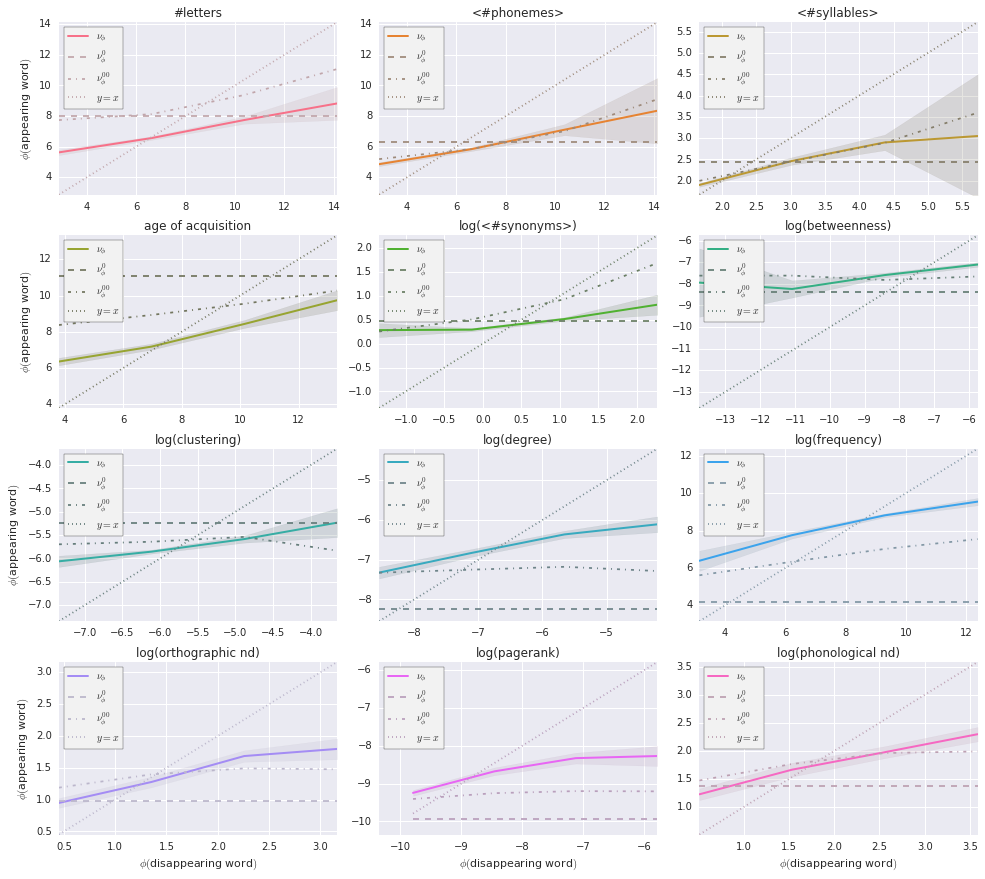

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

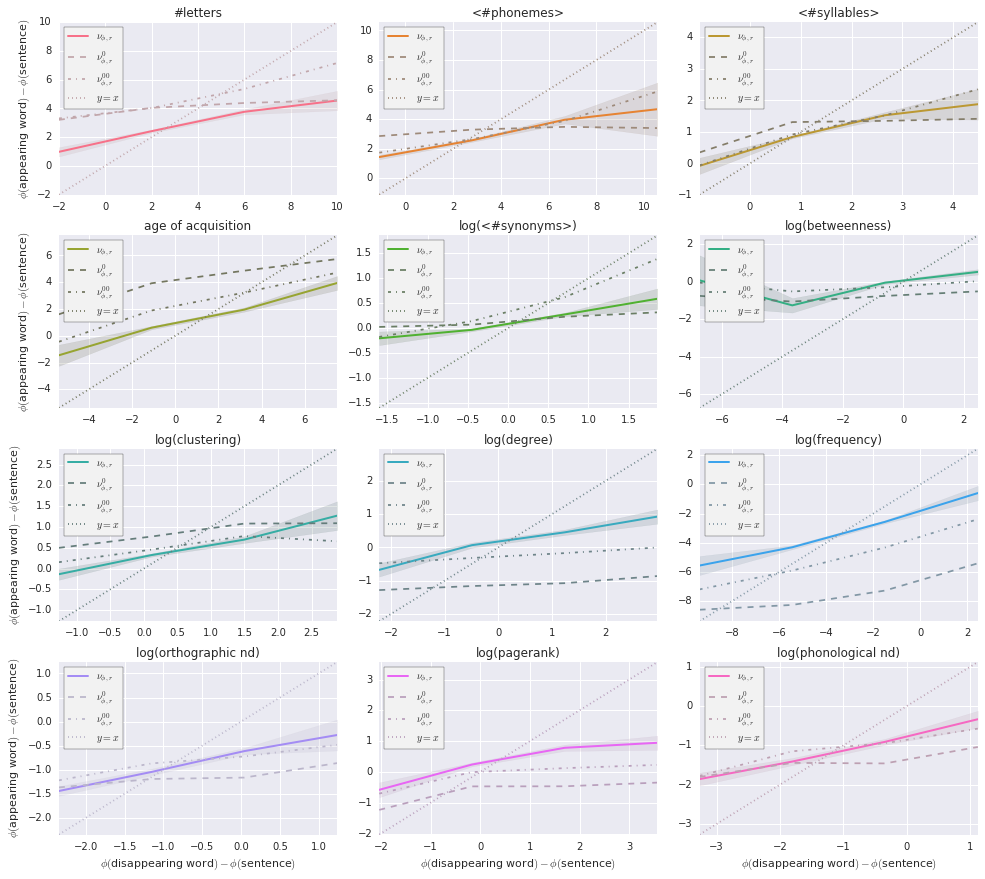

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

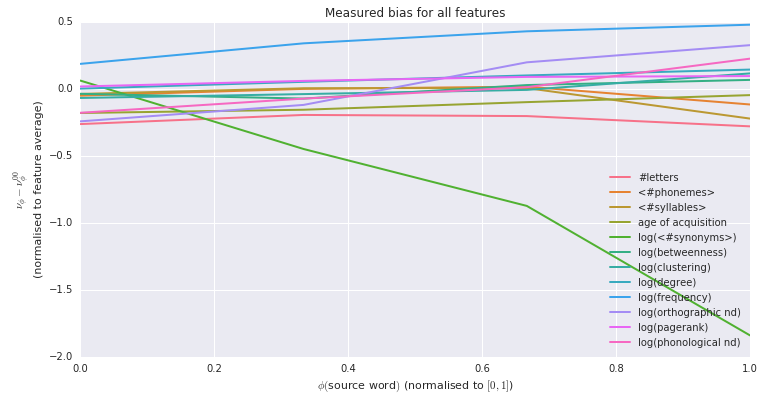

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

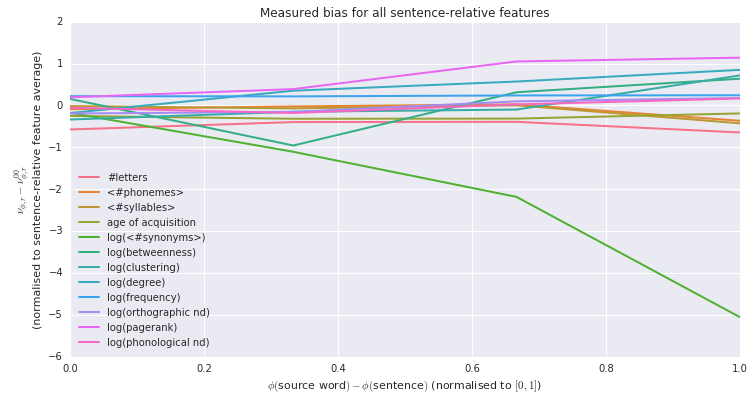

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

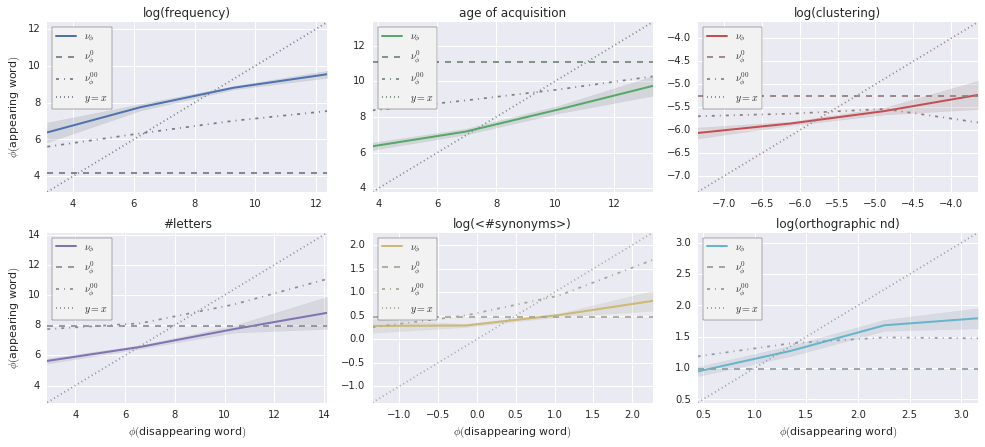

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

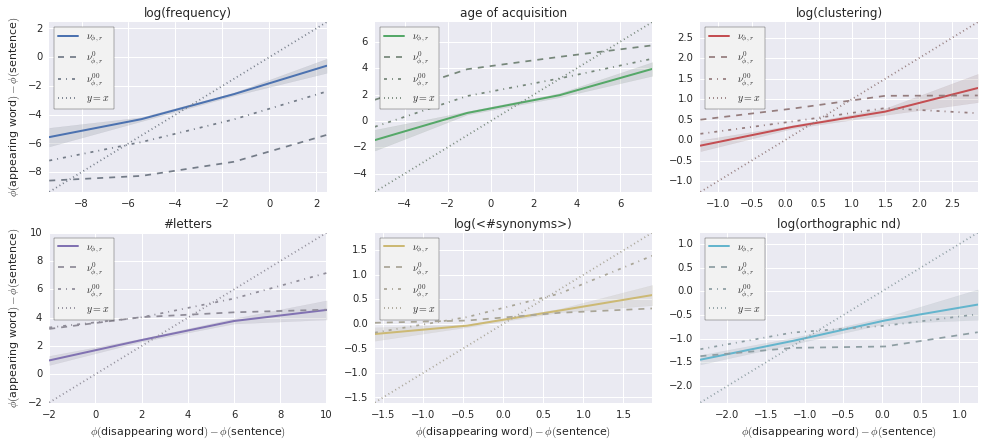

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

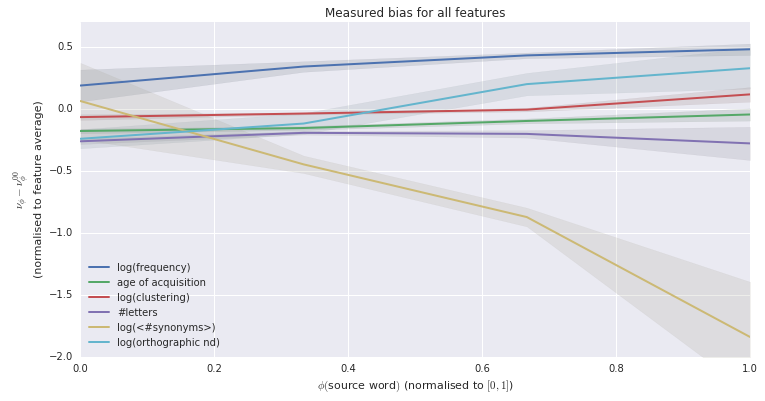

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

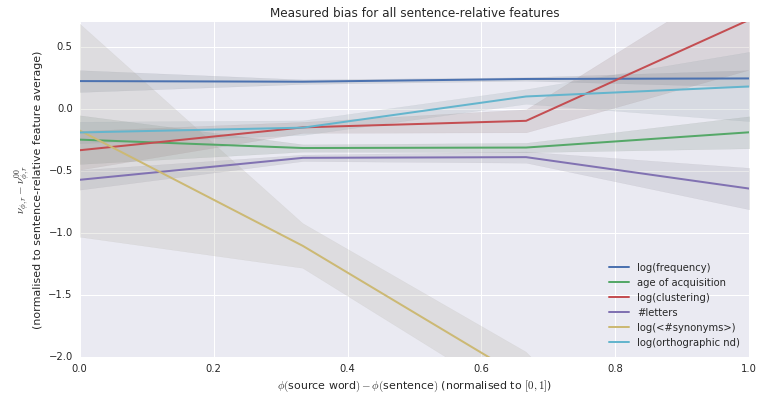

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


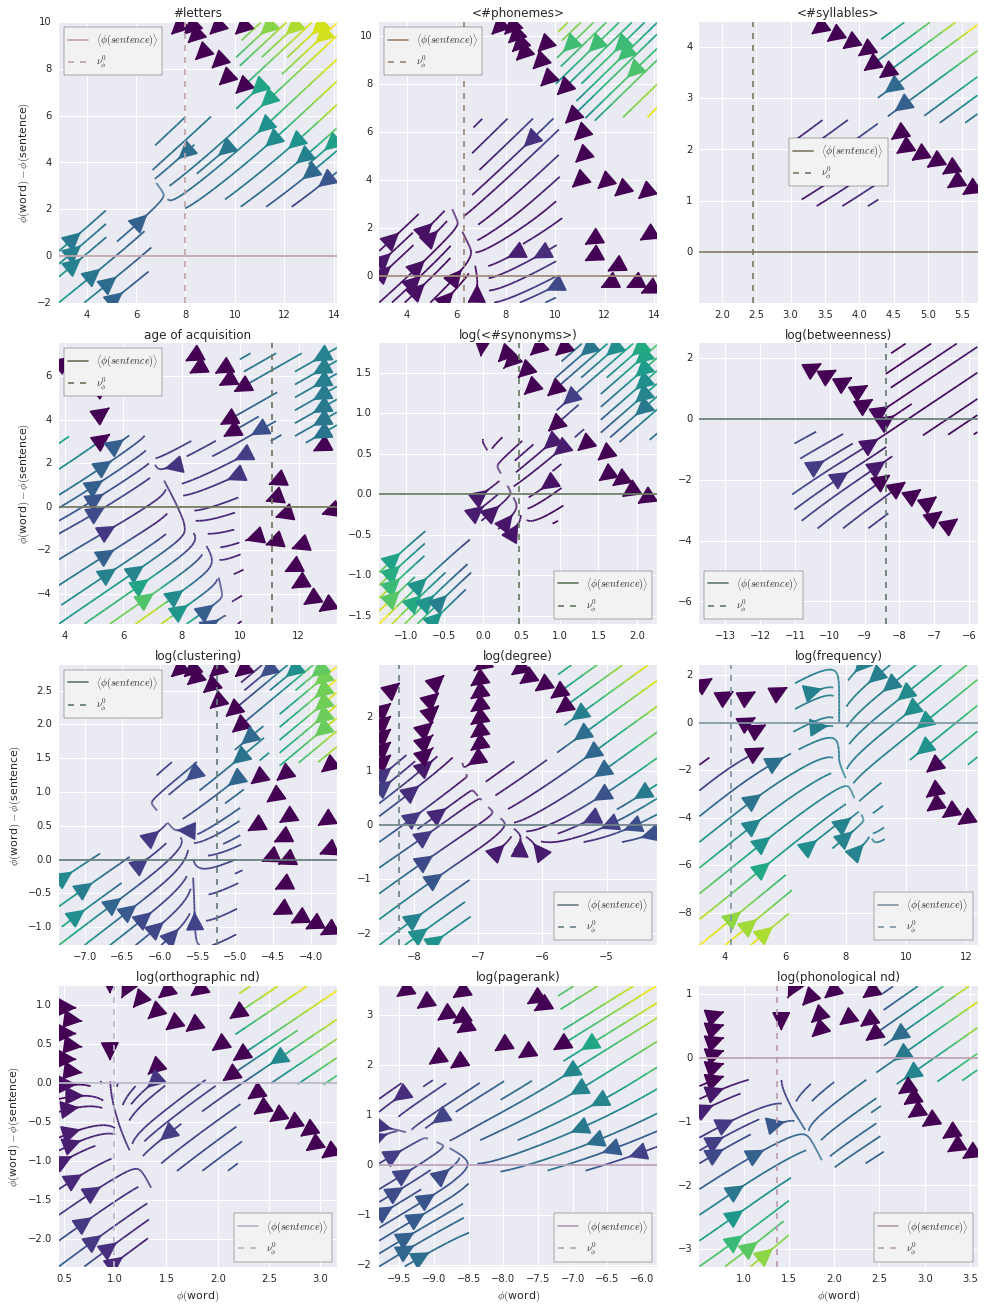

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


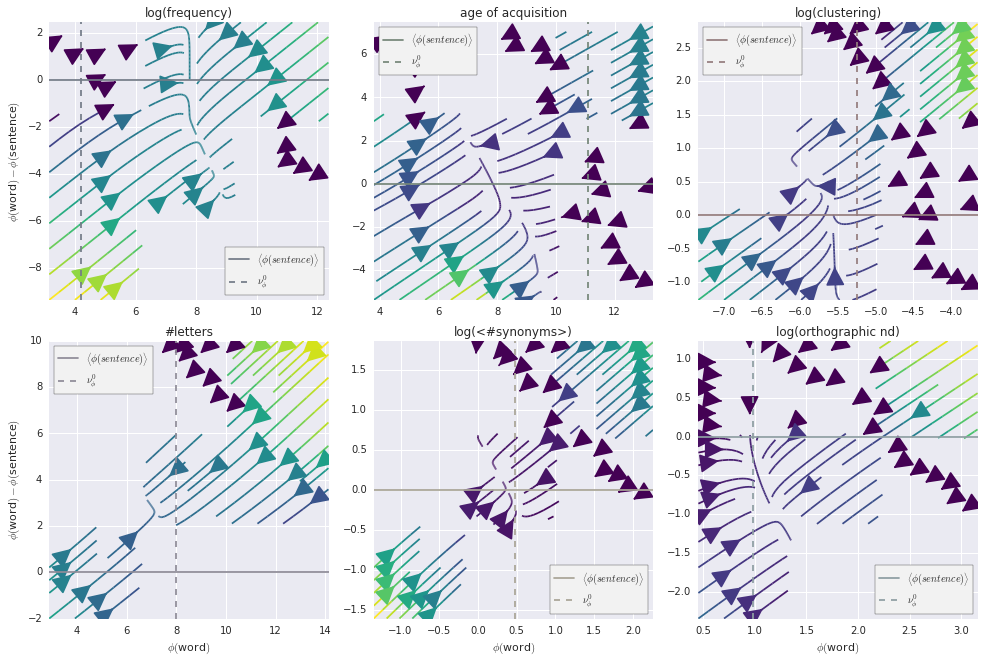

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54429486  0.16255439  0.0822894   0.07178573  0.0342547   0.03097462
  0.0186727   0.01798104  0.01530433  0.0089736 ]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.468217,0.258174,-0.081678,0.238304,0.230348,-0.445703,0.203321,0.271709,-0.424813,0.273963,-0.168039,0.004851
Component-1,0.323855,-0.395426,0.142850,-0.304533,-0.282196,-0.431394,0.152707,-0.301239,-0.425798,0.192839,-0.165285,0.000656
Component-2,0.788781,0.499764,-0.139427,0.198994,0.091024,-0.118342,0.026310,0.176356,-0.058226,0.101533,-0.012579,-0.032871


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 87568) |           | Elapsed Time: 0:01:21 ETA:  82 days, 9:53:32

  0% (   51 of 87568) |                    | Elapsed Time: 0:01:22 ETA:  0:29:52

  0% (  148 of 87568) |                    | Elapsed Time: 0:01:23 ETA:  0:19:18

  0% (  251 of 87568) |                    | Elapsed Time: 0:01:24 ETA:  0:16:37

  0% (  341 of 87568) |                    | Elapsed Time: 0:01:25 ETA:  0:16:08

  0% (  436 of 87568) |                    | Elapsed Time: 0:01:26 ETA:  0:15:39

  0% (  526 of 87568) |                    | Elapsed Time: 0:01:27 ETA:  0:15:31

  0% (  614 of 87568) |                    | Elapsed Time: 0:01:28 ETA:  0:15:27

  0% (  683 of 87568) |                    | Elapsed Time: 0:01:29 ETA:  0:16:00

  0% (  783 of 87568) |                    | Elapsed Time: 0:01:30 ETA:  0:15:37

  1% (  882 of 87568) |                    | Elapsed Time: 0:01:31 ETA:  0:14:28

  1% (  982 of 87568) |                    | Elapsed Time: 0:01:32 ETA:  0:14:22

  1% ( 1095 of 87568) |                    | Elapsed Time: 0:01:33 ETA:  0:14:20

  1% ( 1196 of 87568) |                    | Elapsed Time: 0:01:34 ETA:  0:14:12

  1% ( 1295 of 87568) |                    | Elapsed Time: 0:01:35 ETA:  0:13:59

  1% ( 1414 of 87568) |                    | Elapsed Time: 0:01:36 ETA:  0:13:22

  1% ( 1529 of 87568) |                    | Elapsed Time: 0:01:37 ETA:  0:12:26

  1% ( 1637 of 87568) |                    | Elapsed Time: 0:01:38 ETA:  0:12:17

  1% ( 1738 of 87568) |                    | Elapsed Time: 0:01:39 ETA:  0:12:14

  2% ( 1852 of 87568) |                    | Elapsed Time: 0:01:40 ETA:  0:11:59

  2% ( 1961 of 87568) |                    | Elapsed Time: 0:01:41 ETA:  0:11:50

  2% ( 2062 of 87568) |                    | Elapsed Time: 0:01:42 ETA:  0:11:55

  2% ( 2168 of 87568) |                    | Elapsed Time: 0:01:43 ETA:  0:11:50

  2% ( 2190 of 87568) |                    | Elapsed Time: 0:01:43 ETA:  0:11:43

  2% ( 2292 of 87568) |                    | Elapsed Time: 0:01:44 ETA:  0:11:57

  2% ( 2405 of 87568) |                    | Elapsed Time: 0:01:45 ETA:  0:11:58

  2% ( 2505 of 87568) |                    | Elapsed Time: 0:01:46 ETA:  0:12:05

  2% ( 2615 of 87568) |                    | Elapsed Time: 0:01:47 ETA:  0:11:57

  3% ( 2729 of 87568) |                    | Elapsed Time: 0:01:48 ETA:  0:11:56

  3% ( 2837 of 87568) |                    | Elapsed Time: 0:01:49 ETA:  0:11:56

  3% ( 2930 of 87568) |                    | Elapsed Time: 0:01:50 ETA:  0:12:02

  3% ( 3043 of 87568) |                    | Elapsed Time: 0:01:52 ETA:  0:12:19

  3% ( 3148 of 87568) |                    | Elapsed Time: 0:01:53 ETA:  0:12:17

  3% ( 3284 of 87568) |                    | Elapsed Time: 0:01:54 ETA:  0:12:02

  3% ( 3421 of 87568) |                    | Elapsed Time: 0:01:55 ETA:  0:11:27

  4% ( 3530 of 87568) |                    | Elapsed Time: 0:01:56 ETA:  0:11:26

  4% ( 3651 of 87568) |                    | Elapsed Time: 0:01:57 ETA:  0:11:19

  4% ( 3780 of 87568) |                    | Elapsed Time: 0:01:58 ETA:  0:11:00

  4% ( 3875 of 87568) |                    | Elapsed Time: 0:01:59 ETA:  0:10:58

  4% ( 3967 of 87568) |                    | Elapsed Time: 0:02:00 ETA:  0:10:51

  4% ( 4074 of 87568) |                    | Elapsed Time: 0:02:01 ETA:  0:10:48

  4% ( 4189 of 87568) |                    | Elapsed Time: 0:02:02 ETA:  0:10:55

  4% ( 4302 of 87568) |                    | Elapsed Time: 0:02:03 ETA:  0:10:54

  5% ( 4379 of 87568) |#                   | Elapsed Time: 0:02:03 ETA:  0:11:10

  5% ( 4490 of 87568) |#                   | Elapsed Time: 0:02:04 ETA:  0:11:07

  5% ( 4513 of 87568) |            | Elapsed Time: 0:33:07 ETA:  2 days, 4:13:09

  5% ( 4515 of 87568) |           | Elapsed Time: 0:33:08 ETA:  2 days, 13:20:29

  5% ( 4520 of 87568) |           | Elapsed Time: 0:33:09 ETA:  2 days, 21:58:54

  5% ( 4527 of 87568) |            | Elapsed Time: 0:33:10 ETA:  3 days, 8:42:05

  5% ( 4532 of 87568) |            | Elapsed Time: 0:33:12 ETA:  4 days, 2:48:26

  5% ( 4536 of 87568) |           | Elapsed Time: 0:33:13 ETA:  5 days, 10:35:38

  5% ( 4540 of 87568) |           | Elapsed Time: 0:33:14 ETA:  7 days, 22:40:35

  5% ( 4545 of 87568) |           | Elapsed Time: 0:33:15 ETA:  11 days, 9:41:56

  5% ( 4551 of 87568) |           | Elapsed Time: 0:33:16 ETA:  31 days, 1:52:36

  5% ( 4557 of 87568) |#                   | Elapsed Time: 0:33:18 ETA:  5:19:21

  5% ( 4562 of 87568) |#                   | Elapsed Time: 0:33:19 ETA:  4:53:37

  5% ( 4568 of 87568) |#                   | Elapsed Time: 0:33:20 ETA:  4:51:44

  5% ( 4573 of 87568) |#                   | Elapsed Time: 0:33:21 ETA:  4:56:21

  5% ( 4579 of 87568) |#                   | Elapsed Time: 0:33:22 ETA:  4:47:09

  5% ( 4582 of 87568) |#                   | Elapsed Time: 0:33:23 ETA:  4:53:11

  5% ( 4587 of 87568) |#                   | Elapsed Time: 0:33:24 ETA:  4:43:33

  5% ( 4591 of 87568) |#                   | Elapsed Time: 0:33:25 ETA:  4:45:17

  5% ( 4597 of 87568) |#                   | Elapsed Time: 0:33:26 ETA:  4:40:11

  5% ( 4604 of 87568) |#                   | Elapsed Time: 0:33:27 ETA:  4:32:16

  5% ( 4611 of 87568) |#                   | Elapsed Time: 0:33:29 ETA:  4:24:06

  5% ( 4616 of 87568) |#                   | Elapsed Time: 0:33:30 ETA:  4:27:47

  5% ( 4621 of 87568) |#                   | Elapsed Time: 0:33:31 ETA:  4:36:01

  5% ( 4628 of 87568) |#                   | Elapsed Time: 0:33:32 ETA:  4:25:59

  5% ( 4633 of 87568) |#                   | Elapsed Time: 0:33:33 ETA:  4:14:04

  5% ( 4637 of 87568) |#                   | Elapsed Time: 0:33:34 ETA:  4:17:15

  5% ( 4642 of 87568) |#                   | Elapsed Time: 0:33:35 ETA:  4:21:28

  5% ( 4646 of 87568) |#                   | Elapsed Time: 0:33:38 ETA:  5:04:46

  5% ( 4648 of 87568) |#                   | Elapsed Time: 0:33:40 ETA:  6:31:23

  5% ( 4653 of 87568) |#                   | Elapsed Time: 0:33:41 ETA:  6:46:59

  5% ( 4658 of 87568) |#                   | Elapsed Time: 0:33:42 ETA:  6:43:01

  5% ( 4665 of 87568) |#                   | Elapsed Time: 0:33:43 ETA:  6:15:18

  5% ( 4668 of 87568) |#                   | Elapsed Time: 0:33:44 ETA:  6:58:38

  5% ( 4671 of 87568) |#                   | Elapsed Time: 0:33:46 ETA:  7:33:20

  5% ( 4678 of 87568) |#                   | Elapsed Time: 0:33:48 ETA:  7:52:05

  5% ( 4680 of 87568) |#                   | Elapsed Time: 0:33:49 ETA:  8:21:26

  5% ( 4682 of 87568) |#                   | Elapsed Time: 0:33:51 ETA:  8:15:15

  5% ( 4687 of 87568) |#                   | Elapsed Time: 0:33:52 ETA:  6:39:02

  5% ( 4690 of 87568) |#                   | Elapsed Time: 0:33:53 ETA:  7:11:08

  5% ( 4691 of 87568) |#                   | Elapsed Time: 0:33:54 ETA:  8:24:48

  5% ( 4695 of 87568) |#                   | Elapsed Time: 0:33:56 ETA:  9:50:18

  5% ( 4696 of 87568) |#                  | Elapsed Time: 0:33:59 ETA:  11:59:52

  5% ( 4699 of 87568) |#                  | Elapsed Time: 0:34:00 ETA:  12:00:10

  5% ( 4702 of 87568) |#                  | Elapsed Time: 0:34:01 ETA:  12:35:42

  5% ( 4708 of 87568) |#                  | Elapsed Time: 0:34:02 ETA:  10:43:54

  5% ( 4712 of 87568) |#                   | Elapsed Time: 0:34:03 ETA:  9:49:06

  5% ( 4717 of 87568) |#                   | Elapsed Time: 0:34:05 ETA:  9:50:43

  5% ( 4722 of 87568) |#                   | Elapsed Time: 0:34:06 ETA:  9:01:21

  5% ( 4727 of 87568) |#                   | Elapsed Time: 0:34:07 ETA:  7:43:48

  5% ( 4732 of 87568) |#                   | Elapsed Time: 0:34:08 ETA:  7:07:03

  5% ( 4736 of 87568) |#                   | Elapsed Time: 0:34:09 ETA:  5:32:25

  5% ( 4739 of 87568) |#                   | Elapsed Time: 0:34:10 ETA:  5:27:28

  5% ( 4744 of 87568) |#                   | Elapsed Time: 0:34:11 ETA:  5:15:55

  5% ( 4750 of 87568) |#                   | Elapsed Time: 0:34:12 ETA:  5:14:37

  5% ( 4756 of 87568) |#                   | Elapsed Time: 0:34:13 ETA:  4:57:51

  5% ( 4763 of 87568) |#                   | Elapsed Time: 0:34:15 ETA:  4:42:58

  5% ( 4769 of 87568) |#                   | Elapsed Time: 0:34:16 ETA:  4:40:15

  5% ( 4775 of 87568) |#                   | Elapsed Time: 0:34:17 ETA:  4:31:11

  5% ( 4783 of 87568) |#                   | Elapsed Time: 0:34:18 ETA:  4:11:29

  5% ( 4791 of 87568) |#                   | Elapsed Time: 0:34:19 ETA:  3:55:23

  5% ( 4797 of 87568) |#                   | Elapsed Time: 0:34:20 ETA:  3:39:56

  5% ( 4802 of 87568) |#                   | Elapsed Time: 0:34:21 ETA:  3:35:06

  5% ( 4806 of 87568) |#                   | Elapsed Time: 0:34:22 ETA:  3:45:22

  5% ( 4813 of 87568) |#                   | Elapsed Time: 0:34:23 ETA:  3:41:34

  5% ( 4821 of 87568) |#                   | Elapsed Time: 0:34:25 ETA:  3:40:18

  5% ( 4823 of 87568) |#                   | Elapsed Time: 0:34:26 ETA:  3:58:37

  5% ( 4826 of 87568) |#                   | Elapsed Time: 0:34:27 ETA:  4:21:46

  5% ( 4830 of 87568) |#                   | Elapsed Time: 0:34:28 ETA:  4:51:15

  5% ( 4833 of 87568) |#                   | Elapsed Time: 0:34:29 ETA:  5:23:00

  5% ( 4838 of 87568) |#                   | Elapsed Time: 0:34:30 ETA:  5:28:58

  5% ( 4844 of 87568) |#                   | Elapsed Time: 0:34:32 ETA:  5:28:47

  5% ( 4848 of 87568) |#                   | Elapsed Time: 0:34:33 ETA:  5:35:01

  5% ( 4852 of 87568) |#                   | Elapsed Time: 0:34:34 ETA:  6:01:53

  5% ( 4857 of 87568) |#                   | Elapsed Time: 0:34:35 ETA:  6:26:04

  5% ( 4861 of 87568) |#                   | Elapsed Time: 0:34:36 ETA:  6:05:06

  5% ( 4865 of 87568) |#                   | Elapsed Time: 0:34:37 ETA:  5:46:32

  5% ( 4869 of 87568) |#                   | Elapsed Time: 0:34:38 ETA:  5:40:43

  5% ( 4874 of 87568) |#                   | Elapsed Time: 0:34:40 ETA:  5:29:56

  5% ( 4879 of 87568) |#                   | Elapsed Time: 0:34:41 ETA:  5:35:42

  5% ( 4883 of 87568) |#                   | Elapsed Time: 0:34:42 ETA:  5:47:00

  5% ( 4888 of 87568) |#                   | Elapsed Time: 0:34:43 ETA:  5:34:51

  5% ( 4894 of 87568) |#                   | Elapsed Time: 0:34:44 ETA:  5:17:30

  5% ( 4902 of 87568) |#                   | Elapsed Time: 0:34:45 ETA:  4:53:28

  5% ( 4910 of 87568) |#                   | Elapsed Time: 0:34:46 ETA:  4:25:05

  5% ( 4915 of 87568) |#                   | Elapsed Time: 0:34:48 ETA:  4:21:13

  5% ( 4920 of 87568) |#                   | Elapsed Time: 0:34:49 ETA:  4:16:09

  5% ( 4929 of 87568) |#                   | Elapsed Time: 0:34:50 ETA:  3:51:15

  5% ( 4935 of 87568) |#                   | Elapsed Time: 0:34:51 ETA:  3:42:05

  5% ( 4939 of 87568) |#                   | Elapsed Time: 0:34:52 ETA:  3:47:22

  5% ( 4942 of 87568) |#                   | Elapsed Time: 0:34:53 ETA:  3:56:07

  5% ( 4946 of 87568) |#                   | Elapsed Time: 0:34:54 ETA:  4:05:31

  5% ( 4953 of 87568) |#                   | Elapsed Time: 0:34:55 ETA:  4:12:25

  5% ( 4958 of 87568) |#                   | Elapsed Time: 0:34:57 ETA:  4:35:56

  5% ( 4963 of 87568) |#                   | Elapsed Time: 0:34:58 ETA:  4:39:04

  5% ( 4973 of 87568) |#                   | Elapsed Time: 0:34:59 ETA:  4:08:36

  5% ( 4979 of 87568) |#                   | Elapsed Time: 0:35:00 ETA:  4:33:57

  5% ( 4985 of 87568) |#                   | Elapsed Time: 0:35:01 ETA:  4:35:36

  5% ( 4989 of 87568) |#                   | Elapsed Time: 0:35:02 ETA:  4:28:11

  5% ( 4994 of 87568) |#                   | Elapsed Time: 0:35:04 ETA:  4:14:44

  5% ( 4999 of 87568) |#                   | Elapsed Time: 0:35:05 ETA:  4:09:02

  5% ( 5003 of 87568) |#                   | Elapsed Time: 0:35:06 ETA:  4:26:55

  5% ( 5008 of 87568) |#                   | Elapsed Time: 0:35:07 ETA:  4:20:22

  5% ( 5015 of 87568) |#                   | Elapsed Time: 0:35:08 ETA:  4:06:11

  5% ( 5023 of 87568) |#                   | Elapsed Time: 0:35:09 ETA:  4:18:38

  5% ( 5029 of 87568) |#                   | Elapsed Time: 0:35:10 ETA:  4:11:59

  5% ( 5037 of 87568) |#                   | Elapsed Time: 0:35:11 ETA:  3:59:22

  5% ( 5047 of 87568) |#                   | Elapsed Time: 0:35:12 ETA:  3:31:46

  5% ( 5056 of 87568) |#                   | Elapsed Time: 0:35:13 ETA:  3:18:20

  5% ( 5063 of 87568) |#                   | Elapsed Time: 0:35:14 ETA:  3:11:18

  5% ( 5073 of 87568) |#                   | Elapsed Time: 0:35:15 ETA:  2:50:56

  5% ( 5080 of 87568) |#                   | Elapsed Time: 0:35:17 ETA:  2:44:23

  5% ( 5089 of 87568) |#                   | Elapsed Time: 0:35:18 ETA:  2:35:42

  5% ( 5096 of 87568) |#                   | Elapsed Time: 0:35:19 ETA:  2:36:48

  5% ( 5104 of 87568) |#                   | Elapsed Time: 0:35:20 ETA:  2:32:22

  5% ( 5112 of 87568) |#                   | Elapsed Time: 0:35:21 ETA:  2:32:11

  5% ( 5119 of 87568) |#                   | Elapsed Time: 0:35:22 ETA:  2:44:34

  5% ( 5124 of 87568) |#                   | Elapsed Time: 0:35:23 ETA:  2:53:22

  5% ( 5133 of 87568) |#                   | Elapsed Time: 0:35:24 ETA:  2:49:28

  5% ( 5139 of 87568) |#                   | Elapsed Time: 0:35:26 ETA:  3:07:21

  5% ( 5147 of 87568) |#                   | Elapsed Time: 0:35:27 ETA:  3:03:12

  5% ( 5157 of 87568) |#                   | Elapsed Time: 0:35:28 ETA:  3:00:53

  5% ( 5165 of 87568) |#                   | Elapsed Time: 0:35:29 ETA:  2:57:32

  5% ( 5174 of 87568) |#                   | Elapsed Time: 0:35:30 ETA:  2:53:25

  5% ( 5182 of 87568) |#                   | Elapsed Time: 0:35:31 ETA:  2:54:11

  5% ( 5188 of 87568) |#                   | Elapsed Time: 0:35:32 ETA:  2:52:11

  5% ( 5196 of 87568) |#                   | Elapsed Time: 0:35:33 ETA:  2:41:54

  5% ( 5206 of 87568) |#                   | Elapsed Time: 0:35:34 ETA:  2:39:45

  5% ( 5211 of 87568) |#                   | Elapsed Time: 0:35:35 ETA:  2:37:11

  5% ( 5215 of 87568) |#                   | Elapsed Time: 0:35:36 ETA:  2:51:46

  5% ( 5216 of 87568) |#                   | Elapsed Time: 0:35:38 ETA:  3:29:17

  5% ( 5217 of 87568) |#                   | Elapsed Time: 0:35:39 ETA:  4:04:47

  5% ( 5222 of 87568) |#                   | Elapsed Time: 0:35:40 ETA:  4:24:41

  5% ( 5227 of 87568) |#                   | Elapsed Time: 0:35:41 ETA:  4:46:10

  5% ( 5230 of 87568) |#                   | Elapsed Time: 0:35:42 ETA:  5:13:52

  5% ( 5233 of 87568) |#                   | Elapsed Time: 0:35:45 ETA:  7:07:19

  5% ( 5243 of 87568) |#                   | Elapsed Time: 0:35:46 ETA:  7:03:36

  5% ( 5251 of 87568) |#                   | Elapsed Time: 0:35:47 ETA:  6:38:26

  6% ( 5256 of 87568) |#                   | Elapsed Time: 0:35:48 ETA:  6:26:45

  6% ( 5265 of 87568) |#                   | Elapsed Time: 0:35:49 ETA:  5:10:40

  6% ( 5274 of 87568) |#                   | Elapsed Time: 0:35:50 ETA:  4:22:44

  6% ( 5282 of 87568) |#                   | Elapsed Time: 0:35:51 ETA:  4:07:15

  6% ( 5290 of 87568) |#                   | Elapsed Time: 0:35:52 ETA:  3:52:06

  6% ( 5293 of 87568) |#                   | Elapsed Time: 0:35:53 ETA:  3:48:05

  6% ( 5297 of 87568) |#                   | Elapsed Time: 0:35:54 ETA:  3:05:44

  6% ( 5306 of 87568) |#                   | Elapsed Time: 0:35:55 ETA:  3:08:59

  6% ( 5313 of 87568) |#                   | Elapsed Time: 0:35:56 ETA:  3:06:09

  6% ( 5322 of 87568) |#                   | Elapsed Time: 0:35:57 ETA:  2:50:46

  6% ( 5330 of 87568) |#                   | Elapsed Time: 0:35:59 ETA:  2:54:36

  6% ( 5337 of 87568) |#                   | Elapsed Time: 0:36:00 ETA:  3:01:10

  6% ( 5342 of 87568) |#                   | Elapsed Time: 0:36:01 ETA:  3:16:13

  6% ( 5345 of 87568) |#                   | Elapsed Time: 0:36:02 ETA:  3:36:44

  6% ( 5350 of 87568) |#                   | Elapsed Time: 0:36:03 ETA:  3:28:58

  6% ( 5354 of 87568) |#                   | Elapsed Time: 0:36:04 ETA:  3:35:30

  6% ( 5358 of 87568) |#                   | Elapsed Time: 0:36:05 ETA:  4:03:24

  6% ( 5362 of 87568) |#                   | Elapsed Time: 0:36:07 ETA:  4:32:28

  6% ( 5366 of 87568) |#                   | Elapsed Time: 0:36:08 ETA:  5:11:22

  6% ( 5368 of 87568) |#                   | Elapsed Time: 0:36:09 ETA:  6:16:02

  6% ( 5369 of 87568) |#                   | Elapsed Time: 0:36:10 ETA:  7:30:00

  6% ( 5370 of 87568) |#                   | Elapsed Time: 0:36:12 ETA:  9:15:39

  6% ( 5374 of 87568) |#                   | Elapsed Time: 0:36:13 ETA:  8:57:41

  6% ( 5380 of 87568) |#                   | Elapsed Time: 0:36:14 ETA:  8:41:57

  6% ( 5384 of 87568) |#                   | Elapsed Time: 0:36:16 ETA:  9:11:23

  6% ( 5386 of 87568) |#                   | Elapsed Time: 0:36:18 ETA:  9:57:24

  6% ( 5389 of 87568) |#                  | Elapsed Time: 0:36:19 ETA:  10:09:03

  6% ( 5394 of 87568) |#                   | Elapsed Time: 0:36:20 ETA:  9:42:15

  6% ( 5400 of 87568) |#                   | Elapsed Time: 0:36:21 ETA:  8:17:39

  6% ( 5405 of 87568) |#                   | Elapsed Time: 0:36:23 ETA:  7:37:47

  6% ( 5408 of 87568) |#                   | Elapsed Time: 0:36:24 ETA:  6:52:48

  6% ( 5416 of 87568) |#                   | Elapsed Time: 0:36:25 ETA:  6:08:24

  6% ( 5428 of 87568) |#                   | Elapsed Time: 0:36:26 ETA:  5:17:27

  6% ( 5438 of 87568) |#                   | Elapsed Time: 0:36:27 ETA:  4:16:10

  6% ( 5452 of 87568) |#                   | Elapsed Time: 0:36:28 ETA:  3:17:30

  6% ( 5465 of 87568) |#                   | Elapsed Time: 0:36:29 ETA:  2:45:35

  6% ( 5473 of 87568) |#                   | Elapsed Time: 0:36:30 ETA:  2:27:47

  6% ( 5487 of 87568) |#                   | Elapsed Time: 0:36:31 ETA:  2:08:23

  6% ( 5505 of 87568) |#                   | Elapsed Time: 0:36:32 ETA:  1:39:21

  6% ( 5517 of 87568) |#                   | Elapsed Time: 0:36:33 ETA:  1:23:01

  6% ( 5527 of 87568) |#                   | Elapsed Time: 0:36:34 ETA:  1:22:49

  6% ( 5540 of 87568) |#                   | Elapsed Time: 0:36:35 ETA:  1:20:16

  6% ( 5562 of 87568) |#                   | Elapsed Time: 0:36:36 ETA:  1:08:39

  6% ( 5577 of 87568) |#                   | Elapsed Time: 0:36:37 ETA:  1:08:06

  6% ( 5589 of 87568) |#                   | Elapsed Time: 0:36:38 ETA:  1:09:00

  6% ( 5600 of 87568) |#                   | Elapsed Time: 0:36:39 ETA:  1:13:15

  6% ( 5605 of 87568) |#                   | Elapsed Time: 0:36:41 ETA:  1:27:11

  6% ( 5611 of 87568) |#                   | Elapsed Time: 0:36:42 ETA:  1:42:21

  6% ( 5624 of 87568) |#                   | Elapsed Time: 0:36:43 ETA:  1:41:56

  6% ( 5635 of 87568) |#                   | Elapsed Time: 0:36:44 ETA:  1:40:18

  6% ( 5648 of 87568) |#                   | Elapsed Time: 0:36:45 ETA:  1:41:22

  6% ( 5661 of 87568) |#                   | Elapsed Time: 0:36:46 ETA:  1:54:17

  6% ( 5672 of 87568) |#                   | Elapsed Time: 0:36:47 ETA:  2:01:17

  6% ( 5686 of 87568) |#                   | Elapsed Time: 0:36:48 ETA:  1:56:14

  6% ( 5694 of 87568) |#                   | Elapsed Time: 0:36:50 ETA:  2:01:37

  6% ( 5706 of 87568) |#                   | Elapsed Time: 0:36:51 ETA:  1:44:02

  6% ( 5726 of 87568) |#                   | Elapsed Time: 0:36:52 ETA:  1:26:04

  6% ( 5737 of 87568) |#                   | Elapsed Time: 0:36:53 ETA:  1:27:31

  6% ( 5754 of 87568) |#                   | Elapsed Time: 0:36:54 ETA:  1:20:05

  6% ( 5768 of 87568) |#                   | Elapsed Time: 0:36:55 ETA:  1:18:25

  6% ( 5773 of 87568) |#                   | Elapsed Time: 0:36:56 ETA:  1:25:55

  6% ( 5786 of 87568) |#                   | Elapsed Time: 0:36:57 ETA:  1:24:03

  6% ( 5798 of 87568) |#                   | Elapsed Time: 0:36:58 ETA:  1:26:34

  6% ( 5807 of 87568) |#                   | Elapsed Time: 0:36:59 ETA:  1:23:42

  6% ( 5817 of 87568) |#                   | Elapsed Time: 0:37:00 ETA:  1:26:26

  6% ( 5829 of 87568) |#                   | Elapsed Time: 0:37:01 ETA:  1:36:09

  6% ( 5840 of 87568) |#                   | Elapsed Time: 0:37:02 ETA:  1:36:07

  6% ( 5847 of 87568) |#                   | Elapsed Time: 0:37:03 ETA:  1:50:06

  6% ( 5856 of 87568) |#                   | Elapsed Time: 0:37:04 ETA:  1:58:44

  6% ( 5868 of 87568) |#                   | Elapsed Time: 0:37:05 ETA:  1:46:55

  6% ( 5880 of 87568) |#                   | Elapsed Time: 0:37:07 ETA:  1:53:42

  6% ( 5891 of 87568) |#                   | Elapsed Time: 0:37:08 ETA:  1:55:36

  6% ( 5901 of 87568) |#                   | Elapsed Time: 0:37:09 ETA:  1:54:56

  6% ( 5911 of 87568) |#                   | Elapsed Time: 0:37:10 ETA:  1:54:03

  6% ( 5921 of 87568) |#                   | Elapsed Time: 0:37:11 ETA:  1:59:53

  6% ( 5928 of 87568) |#                   | Elapsed Time: 0:37:12 ETA:  2:09:37

  6% ( 5942 of 87568) |#                   | Elapsed Time: 0:37:14 ETA:  2:05:02

  6% ( 5956 of 87568) |#                   | Elapsed Time: 0:37:15 ETA:  1:56:51

  6% ( 5962 of 87568) |#                   | Elapsed Time: 0:37:16 ETA:  2:07:42

  6% ( 5966 of 87568) |#                   | Elapsed Time: 0:37:17 ETA:  2:18:46

  6% ( 5974 of 87568) |#                   | Elapsed Time: 0:37:18 ETA:  2:24:31

  6% ( 5980 of 87568) |#                   | Elapsed Time: 0:37:19 ETA:  2:40:26

  6% ( 5990 of 87568) |#                   | Elapsed Time: 0:37:20 ETA:  2:41:05

  6% ( 6003 of 87568) |#                   | Elapsed Time: 0:37:21 ETA:  2:31:05

  6% ( 6020 of 87568) |#                   | Elapsed Time: 0:37:22 ETA:  2:07:53

  6% ( 6032 of 87568) |#                   | Elapsed Time: 0:37:24 ETA:  2:07:09

  6% ( 6045 of 87568) |#                   | Elapsed Time: 0:37:25 ETA:  2:09:39

  6% ( 6056 of 87568) |#                   | Elapsed Time: 0:37:26 ETA:  2:00:14

  6% ( 6063 of 87568) |#                   | Elapsed Time: 0:37:27 ETA:  1:53:43

  6% ( 6071 of 87568) |#                   | Elapsed Time: 0:37:28 ETA:  1:53:21

  6% ( 6077 of 87568) |#                   | Elapsed Time: 0:37:29 ETA:  1:48:32

  6% ( 6086 of 87568) |#                   | Elapsed Time: 0:37:30 ETA:  1:49:52

  6% ( 6094 of 87568) |#                   | Elapsed Time: 0:37:32 ETA:  2:03:04

  6% ( 6101 of 87568) |#                   | Elapsed Time: 0:37:33 ETA:  2:24:11

  6% ( 6111 of 87568) |#                   | Elapsed Time: 0:37:34 ETA:  2:29:01

  6% ( 6119 of 87568) |#                   | Elapsed Time: 0:37:35 ETA:  2:40:24

  6% ( 6128 of 87568) |#                   | Elapsed Time: 0:37:36 ETA:  2:47:16

  7% ( 6135 of 87568) |#                   | Elapsed Time: 0:37:37 ETA:  2:46:13

  7% ( 6142 of 87568) |#                   | Elapsed Time: 0:37:38 ETA:  2:49:29

  7% ( 6153 of 87568) |#                   | Elapsed Time: 0:37:39 ETA:  2:33:28

  7% ( 6165 of 87568) |#                   | Elapsed Time: 0:37:40 ETA:  2:25:47

  7% ( 6181 of 87568) |#                   | Elapsed Time: 0:37:41 ETA:  2:03:14

  7% ( 6202 of 87568) |#                   | Elapsed Time: 0:37:42 ETA:  1:41:11

  7% ( 6224 of 87568) |#                   | Elapsed Time: 0:37:43 ETA:  1:23:02

  7% ( 6249 of 87568) |#                   | Elapsed Time: 0:37:44 ETA:  1:07:13

  7% ( 6273 of 87568) |#                   | Elapsed Time: 0:37:45 ETA:  0:55:19

  7% ( 6292 of 87568) |#                   | Elapsed Time: 0:37:46 ETA:  0:48:29

  7% ( 6310 of 87568) |#                   | Elapsed Time: 0:37:47 ETA:  0:43:00

  7% ( 6319 of 87568) |#                   | Elapsed Time: 0:37:48 ETA:  0:44:52

  7% ( 6330 of 87568) |#                   | Elapsed Time: 0:37:50 ETA:  0:45:52

  7% ( 6339 of 87568) |#                   | Elapsed Time: 0:37:51 ETA:  0:50:09

  7% ( 6351 of 87568) |#                   | Elapsed Time: 0:37:52 ETA:  0:54:40

  7% ( 6358 of 87568) |#                   | Elapsed Time: 0:37:53 ETA:  1:05:12

  7% ( 6365 of 87568) |#                   | Elapsed Time: 0:37:54 ETA:  1:22:01

  7% ( 6375 of 87568) |#                   | Elapsed Time: 0:37:55 ETA:  1:39:35

  7% ( 6383 of 87568) |#                   | Elapsed Time: 0:37:56 ETA:  1:56:56

  7% ( 6394 of 87568) |#                   | Elapsed Time: 0:37:57 ETA:  2:09:02

  7% ( 6408 of 87568) |#                   | Elapsed Time: 0:37:58 ETA:  1:57:49

  7% ( 6425 of 87568) |#                   | Elapsed Time: 0:37:59 ETA:  1:47:48

  7% ( 6454 of 87568) |#                   | Elapsed Time: 0:38:00 ETA:  1:21:36

  7% ( 6488 of 87568) |#                   | Elapsed Time: 0:38:01 ETA:  1:02:25

  7% ( 6515 of 87568) |#                   | Elapsed Time: 0:38:02 ETA:  0:49:39

  7% ( 6535 of 87568) |#                   | Elapsed Time: 0:38:03 ETA:  0:42:15

  7% ( 6557 of 87568) |#                   | Elapsed Time: 0:38:04 ETA:  0:36:28

  7% ( 6568 of 87568) |#                   | Elapsed Time: 0:38:05 ETA:  0:30:05

  7% ( 6586 of 87568) |#                   | Elapsed Time: 0:38:06 ETA:  0:27:40

  7% ( 6614 of 87568) |#                   | Elapsed Time: 0:38:07 ETA:  0:23:40

  7% ( 6631 of 87568) |#                   | Elapsed Time: 0:38:08 ETA:  0:23:20

  7% ( 6647 of 87568) |#                   | Elapsed Time: 0:38:09 ETA:  0:29:52

  7% ( 6667 of 87568) |#                   | Elapsed Time: 0:38:10 ETA:  0:35:06

  7% ( 6688 of 87568) |#                   | Elapsed Time: 0:38:11 ETA:  0:37:54

  7% ( 6717 of 87568) |#                   | Elapsed Time: 0:38:12 ETA:  0:34:03

  7% ( 6736 of 87568) |#                   | Elapsed Time: 0:38:13 ETA:  0:35:02

  7% ( 6758 of 87568) |#                   | Elapsed Time: 0:38:14 ETA:  0:35:15

  7% ( 6785 of 87568) |#                   | Elapsed Time: 0:38:15 ETA:  0:32:08

  7% ( 6824 of 87568) |#                   | Elapsed Time: 0:38:16 ETA:  0:28:09

  7% ( 6846 of 87568) |#                   | Elapsed Time: 0:38:17 ETA:  0:26:31

  7% ( 6889 of 87568) |#                   | Elapsed Time: 0:38:18 ETA:  0:17:10

  7% ( 6927 of 87568) |#                   | Elapsed Time: 0:38:19 ETA:  0:13:19

  7% ( 6972 of 87568) |#                   | Elapsed Time: 0:38:20 ETA:  0:08:37

  7% ( 6987 of 87568) |#                   | Elapsed Time: 0:38:21 ETA:  0:11:03

  8% ( 7008 of 87568) |#                   | Elapsed Time: 0:38:22 ETA:  0:10:37

  8% ( 7032 of 87568) |#                   | Elapsed Time: 0:38:23 ETA:  0:10:06

  8% ( 7059 of 87568) |#                   | Elapsed Time: 0:38:24 ETA:  0:09:51

  8% ( 7067 of 87568) |#                   | Elapsed Time: 0:38:26 ETA:  0:19:55

  8% ( 7083 of 87568) |#                   | Elapsed Time: 0:38:27 ETA:  0:22:51

  8% ( 7103 of 87568) |#                   | Elapsed Time: 0:38:28 ETA:  0:29:26

  8% ( 7117 of 87568) |#                   | Elapsed Time: 0:38:30 ETA:  0:40:47

  8% ( 7149 of 87568) |#                   | Elapsed Time: 0:38:31 ETA:  0:46:42

  8% ( 7185 of 87568) |#                   | Elapsed Time: 0:38:32 ETA:  0:38:29

  8% ( 7220 of 87568) |#                   | Elapsed Time: 0:38:33 ETA:  0:33:43

  8% ( 7244 of 87568) |#                   | Elapsed Time: 0:38:34 ETA:  0:36:26

  8% ( 7253 of 87568) |#                   | Elapsed Time: 0:38:35 ETA:  0:43:32

  8% ( 7280 of 87568) |#                   | Elapsed Time: 0:38:36 ETA:  0:31:30

  8% ( 7313 of 87568) |#                   | Elapsed Time: 0:38:37 ETA:  0:24:56

  8% ( 7351 of 87568) |#                   | Elapsed Time: 0:38:38 ETA:  0:20:33

  8% ( 7374 of 87568) |#                   | Elapsed Time: 0:38:39 ETA:  0:17:16

  8% ( 7410 of 87568) |#                   | Elapsed Time: 0:38:40 ETA:  0:16:29

  8% ( 7457 of 87568) |#                   | Elapsed Time: 0:38:41 ETA:  0:13:36

  8% ( 7509 of 87568) |#                   | Elapsed Time: 0:38:42 ETA:  0:10:24

  8% ( 7543 of 87568) |#                   | Elapsed Time: 0:38:44 ETA:  0:06:48

  8% ( 7566 of 87568) |#                   | Elapsed Time: 0:38:45 ETA:  0:04:38

  8% ( 7611 of 87568) |#                   | Elapsed Time: 0:38:46 ETA:  0:03:05

  8% ( 7623 of 87568) |#                   | Elapsed Time: 0:38:47 ETA:  0:07:52

  8% ( 7639 of 87568) |#                   | Elapsed Time: 0:38:48 ETA:  0:11:18

  8% ( 7663 of 87568) |#                   | Elapsed Time: 0:38:49 ETA:  0:09:16

  8% ( 7692 of 87568) |#                   | Elapsed Time: 0:38:50 ETA:  0:10:26

  8% ( 7720 of 87568) |#                   | Elapsed Time: 0:38:51 ETA:  0:14:35

  8% ( 7742 of 87568) |#                   | Elapsed Time: 0:38:52 ETA:  0:21:53

  8% ( 7808 of 87568) |#                   | Elapsed Time: 0:38:53 ETA:  0:14:36

  8% ( 7842 of 87568) |#                   | Elapsed Time: 0:38:54 ETA:  0:12:35

  8% ( 7874 of 87568) |#                   | Elapsed Time: 0:38:55 ETA:  0:14:17

  9% ( 7885 of 87568) |#                   | Elapsed Time: 0:38:57 ETA:  0:13:15

  9% ( 7915 of 87568) |#                   | Elapsed Time: 0:38:58 ETA:  0:10:30

  9% ( 7954 of 87568) |#                   | Elapsed Time: 0:38:59 ETA:  0:09:15

  9% ( 7964 of 87568) |#                   | Elapsed Time: 0:39:00 ETA:  0:12:44

  9% ( 7973 of 87568) |#                   | Elapsed Time: 0:39:01 ETA:  0:16:14

  9% ( 8002 of 87568) |#                   | Elapsed Time: 0:39:02 ETA:  0:14:14

  9% ( 8014 of 87568) |#                   | Elapsed Time: 0:39:03 ETA:  0:28:09

  9% ( 8038 of 87568) |#                   | Elapsed Time: 0:39:04 ETA:  0:31:41

  9% ( 8058 of 87568) |#                   | Elapsed Time: 0:39:05 ETA:  0:36:18

  9% ( 8114 of 87568) |#                   | Elapsed Time: 0:39:06 ETA:  0:20:03

  9% ( 8173 of 87568) |#                   | Elapsed Time: 0:39:07 ETA:  0:13:26

  9% ( 8208 of 87568) |#                   | Elapsed Time: 0:39:08 ETA:  0:13:56

  9% ( 8237 of 87568) |#                   | Elapsed Time: 0:39:09 ETA:  0:09:58

  9% ( 8249 of 87568) |#                   | Elapsed Time: 0:39:10 ETA:  0:10:14

  9% ( 8284 of 87568) |#                   | Elapsed Time: 0:39:12 ETA:  0:13:57

  9% ( 8303 of 87568) |#                   | Elapsed Time: 0:39:13 ETA:  0:13:17

  9% ( 8334 of 87568) |#                   | Elapsed Time: 0:39:14 ETA:  0:11:50

  9% ( 8359 of 87568) |#                   | Elapsed Time: 0:39:15 ETA:  0:10:46

  9% ( 8403 of 87568) |#                   | Elapsed Time: 0:39:16 ETA:  0:12:52

  9% ( 8457 of 87568) |#                   | Elapsed Time: 0:39:17 ETA:  0:13:44

  9% ( 8488 of 87568) |#                   | Elapsed Time: 0:39:18 ETA:  0:15:39

  9% ( 8542 of 87568) |#                   | Elapsed Time: 0:39:19 ETA:  0:11:06

  9% ( 8593 of 87568) |#                   | Elapsed Time: 0:39:20 ETA:  0:04:34

  9% ( 8651 of 87568) |#                   | Elapsed Time: 0:39:21 ETA:  0:00:00

  9% ( 8714 of 87568) |#                   | Elapsed Time: 0:39:22 ETA:  0:00:00

  9% ( 8740 of 87568) |#                   | Elapsed Time: 0:39:23 ETA:  0:00:00

 10% ( 8757 of 87568) |##                  | Elapsed Time: 0:39:24 ETA:  0:00:00

 10% ( 8810 of 87568) |##                  | Elapsed Time: 0:39:25 ETA:  0:00:00

 10% ( 8886 of 87568) |##                  | Elapsed Time: 0:39:26 ETA:  0:00:00

 10% ( 8938 of 87568) |##                  | Elapsed Time: 0:39:27 ETA:  0:00:00

 10% ( 9024 of 87568) |##                  | Elapsed Time: 0:39:28 ETA:  0:00:00

 10% ( 9082 of 87568) |##                  | Elapsed Time: 0:39:29 ETA:  0:00:00

 10% ( 9107 of 87568) |##                  | Elapsed Time: 0:39:30 ETA:  0:00:00

 10% ( 9152 of 87568) |##                  | Elapsed Time: 0:39:31 ETA:  0:00:00

 10% ( 9223 of 87568) |##                  | Elapsed Time: 0:39:32 ETA:  0:00:00

 10% ( 9297 of 87568) |##                  | Elapsed Time: 0:39:33 ETA:  0:00:00

 10% ( 9367 of 87568) |##                  | Elapsed Time: 0:39:34 ETA:  0:00:00

 10% ( 9442 of 87568) |##                  | Elapsed Time: 0:39:35 ETA:  0:00:00

 10% ( 9513 of 87568) |##                  | Elapsed Time: 0:39:36 ETA:  0:00:00

 10% ( 9591 of 87568) |##                  | Elapsed Time: 0:39:37 ETA:  0:00:00

 11% ( 9667 of 87568) |##                  | Elapsed Time: 0:39:39 ETA:  0:00:00

 11% ( 9734 of 87568) |##                  | Elapsed Time: 0:39:40 ETA:  0:00:00

 11% ( 9789 of 87568) |##                  | Elapsed Time: 0:39:41 ETA:  0:00:00

 11% ( 9852 of 87568) |##                  | Elapsed Time: 0:39:42 ETA:  0:00:00

 11% ( 9916 of 87568) |##                  | Elapsed Time: 0:39:43 ETA:  0:00:00

 11% ( 9983 of 87568) |##                  | Elapsed Time: 0:39:44 ETA:  0:00:00

 11% (10033 of 87568) |##                  | Elapsed Time: 0:39:45 ETA:  0:00:00

 11% (10103 of 87568) |##                  | Elapsed Time: 0:39:46 ETA:  0:00:00

 11% (10172 of 87568) |##                  | Elapsed Time: 0:39:47 ETA:  0:00:00

 11% (10249 of 87568) |##                  | Elapsed Time: 0:39:48 ETA:  0:00:00

 11% (10331 of 87568) |##                  | Elapsed Time: 0:39:49 ETA:  0:00:00

 11% (10405 of 87568) |##                  | Elapsed Time: 0:39:50 ETA:  0:00:00

 11% (10476 of 87568) |##                  | Elapsed Time: 0:39:51 ETA:  0:00:00

 12% (10538 of 87568) |##                  | Elapsed Time: 0:39:52 ETA:  0:00:00

 12% (10566 of 87568) |##                  | Elapsed Time: 0:39:53 ETA:  0:00:00

 12% (10591 of 87568) |##                  | Elapsed Time: 0:39:54 ETA:  0:00:00

 12% (10629 of 87568) |##                  | Elapsed Time: 0:39:55 ETA:  0:00:00

 12% (10688 of 87568) |##                  | Elapsed Time: 0:39:56 ETA:  0:00:00

 12% (10741 of 87568) |##                  | Elapsed Time: 0:39:57 ETA:  0:00:00

 12% (10800 of 87568) |##                  | Elapsed Time: 0:39:58 ETA:  0:00:00

 12% (10872 of 87568) |##                  | Elapsed Time: 0:39:59 ETA:  0:00:00

 12% (10946 of 87568) |##                  | Elapsed Time: 0:40:00 ETA:  0:00:00

 12% (11027 of 87568) |##                  | Elapsed Time: 0:40:01 ETA:  0:00:00

 12% (11074 of 87568) |##                  | Elapsed Time: 0:40:02 ETA:  0:00:00

 12% (11142 of 87568) |##                  | Elapsed Time: 0:40:03 ETA:  0:00:00

 12% (11220 of 87568) |##                  | Elapsed Time: 0:40:04 ETA:  0:00:00

 12% (11294 of 87568) |##                  | Elapsed Time: 0:40:05 ETA:  0:00:00

 12% (11374 of 87568) |##                  | Elapsed Time: 0:40:06 ETA:  0:00:00

 13% (11456 of 87568) |##                  | Elapsed Time: 0:40:07 ETA:  0:00:00

 13% (11529 of 87568) |##                  | Elapsed Time: 0:40:08 ETA:  0:00:00

 13% (11611 of 87568) |##                  | Elapsed Time: 0:40:09 ETA:  0:00:00

 13% (11688 of 87568) |##                  | Elapsed Time: 0:40:10 ETA:  0:00:00

 13% (11766 of 87568) |##                  | Elapsed Time: 0:40:11 ETA:  0:00:00

 13% (11853 of 87568) |##                  | Elapsed Time: 0:40:12 ETA:  0:00:00

 13% (11939 of 87568) |##                  | Elapsed Time: 0:40:13 ETA:  0:00:00

 13% (12041 of 87568) |##                  | Elapsed Time: 0:40:14 ETA:  0:00:00

 13% (12126 of 87568) |##                  | Elapsed Time: 0:40:15 ETA:  0:00:00

 13% (12209 of 87568) |##                  | Elapsed Time: 0:40:16 ETA:  0:00:00

 14% (12293 of 87568) |##                  | Elapsed Time: 0:40:17 ETA:  0:00:00

 14% (12372 of 87568) |##                  | Elapsed Time: 0:40:18 ETA:  0:00:00

 14% (12453 of 87568) |##                  | Elapsed Time: 0:40:19 ETA:  0:00:00

 14% (12526 of 87568) |##                  | Elapsed Time: 0:40:20 ETA:  0:00:00

 14% (12619 of 87568) |##                  | Elapsed Time: 0:40:21 ETA:  0:00:00

 14% (12717 of 87568) |##                  | Elapsed Time: 0:40:22 ETA:  0:00:00

 14% (12804 of 87568) |##                  | Elapsed Time: 0:40:23 ETA:  0:00:00

 14% (12891 of 87568) |##                  | Elapsed Time: 0:40:24 ETA:  0:00:00

 14% (12963 of 87568) |##                  | Elapsed Time: 0:40:25 ETA:  0:00:00

 14% (13023 of 87568) |##                  | Elapsed Time: 0:40:26 ETA:  0:00:00

 14% (13084 of 87568) |##                  | Elapsed Time: 0:40:27 ETA:  0:00:00

 15% (13136 of 87568) |###                 | Elapsed Time: 0:40:28 ETA:  0:00:00

 15% (13222 of 87568) |###                 | Elapsed Time: 0:40:29 ETA:  0:00:00

 15% (13305 of 87568) |###                 | Elapsed Time: 0:40:30 ETA:  0:00:00

 15% (13377 of 87568) |###                 | Elapsed Time: 0:40:31 ETA:  0:00:00

 15% (13455 of 87568) |###                 | Elapsed Time: 0:40:32 ETA:  0:00:00

 15% (13539 of 87568) |###                 | Elapsed Time: 0:40:33 ETA:  0:00:00

 15% (13636 of 87568) |###                 | Elapsed Time: 0:40:34 ETA:  0:00:00

 15% (13738 of 87568) |###                 | Elapsed Time: 0:40:35 ETA:  0:00:00

 15% (13847 of 87568) |###                 | Elapsed Time: 0:40:36 ETA:  0:00:00

 15% (13964 of 87568) |###                 | Elapsed Time: 0:40:37 ETA:  0:00:00

 16% (14074 of 87568) |###                 | Elapsed Time: 0:40:38 ETA:  0:00:00

 16% (14189 of 87568) |###                 | Elapsed Time: 0:40:39 ETA:  0:00:00

 16% (14230 of 87568) |###                 | Elapsed Time: 0:40:40 ETA:  0:00:00

 16% (14345 of 87568) |###                 | Elapsed Time: 0:40:41 ETA:  0:00:00

 16% (14432 of 87568) |###                 | Elapsed Time: 0:40:42 ETA:  0:00:00

 16% (14527 of 87568) |###                 | Elapsed Time: 0:40:43 ETA:  0:00:00

 16% (14628 of 87568) |###                 | Elapsed Time: 0:40:44 ETA:  0:00:00

 16% (14721 of 87568) |###                 | Elapsed Time: 0:40:45 ETA:  0:00:00

 16% (14790 of 87568) |###                 | Elapsed Time: 0:40:46 ETA:  0:00:00

 16% (14821 of 87568) |###                 | Elapsed Time: 0:40:47 ETA:  0:00:00

 16% (14869 of 87568) |###                 | Elapsed Time: 0:40:48 ETA:  0:00:00

 17% (14940 of 87568) |###                 | Elapsed Time: 0:40:49 ETA:  0:00:00

 17% (15025 of 87568) |###                 | Elapsed Time: 0:40:50 ETA:  0:00:00

 17% (15093 of 87568) |###                 | Elapsed Time: 0:40:51 ETA:  0:00:00

 17% (15186 of 87568) |###                 | Elapsed Time: 0:40:52 ETA:  0:00:00

 17% (15264 of 87568) |###                 | Elapsed Time: 0:40:53 ETA:  0:00:00

 17% (15325 of 87568) |###                 | Elapsed Time: 0:40:54 ETA:  0:00:00

 17% (15405 of 87568) |###                 | Elapsed Time: 0:40:55 ETA:  0:00:00

 17% (15501 of 87568) |###                 | Elapsed Time: 0:40:56 ETA:  0:00:00

 17% (15587 of 87568) |###                 | Elapsed Time: 0:40:57 ETA:  0:00:00

 17% (15685 of 87568) |###                 | Elapsed Time: 0:40:58 ETA:  0:00:00

 18% (15778 of 87568) |###                 | Elapsed Time: 0:40:59 ETA:  0:00:00

 18% (15856 of 87568) |###                 | Elapsed Time: 0:41:00 ETA:  0:00:00

 18% (15949 of 87568) |###                 | Elapsed Time: 0:41:01 ETA:  0:00:00

 18% (16046 of 87568) |###                 | Elapsed Time: 0:41:02 ETA:  0:00:00

 18% (16133 of 87568) |###                 | Elapsed Time: 0:41:03 ETA:  0:00:00

 18% (16208 of 87568) |###                 | Elapsed Time: 0:41:04 ETA:  0:00:00

 18% (16290 of 87568) |###                 | Elapsed Time: 0:41:05 ETA:  0:00:00

 18% (16379 of 87568) |###                 | Elapsed Time: 0:41:06 ETA:  0:00:00

 18% (16419 of 87568) |###                 | Elapsed Time: 0:41:07 ETA:  0:00:00

 18% (16511 of 87568) |###                 | Elapsed Time: 0:41:08 ETA:  0:00:00

 18% (16570 of 87568) |###                 | Elapsed Time: 0:41:09 ETA:  0:00:00

 19% (16644 of 87568) |###                 | Elapsed Time: 0:41:10 ETA:  0:00:00

 19% (16727 of 87568) |###                 | Elapsed Time: 0:41:11 ETA:  0:00:00

 19% (16828 of 87568) |###                 | Elapsed Time: 0:41:12 ETA:  0:00:00

 19% (16935 of 87568) |###                 | Elapsed Time: 0:41:13 ETA:  0:00:00

 19% (17033 of 87568) |###                 | Elapsed Time: 0:41:14 ETA:  0:00:00

 19% (17130 of 87568) |###                 | Elapsed Time: 0:41:15 ETA:  0:00:00

 19% (17227 of 87568) |###                 | Elapsed Time: 0:41:16 ETA:  0:00:00

 19% (17279 of 87568) |###                 | Elapsed Time: 0:41:17 ETA:  0:00:00

 19% (17357 of 87568) |###                 | Elapsed Time: 0:41:18 ETA:  0:00:00

 19% (17431 of 87568) |###                 | Elapsed Time: 0:41:19 ETA:  0:00:00

 20% (17514 of 87568) |####                | Elapsed Time: 0:41:20 ETA:  0:00:00

 20% (17614 of 87568) |####                | Elapsed Time: 0:41:21 ETA:  0:00:00

 20% (17711 of 87568) |####                | Elapsed Time: 0:41:22 ETA:  0:00:00

 20% (17773 of 87568) |####                | Elapsed Time: 0:41:23 ETA:  0:00:00

 20% (17816 of 87568) |####                | Elapsed Time: 0:41:24 ETA:  0:00:00

 20% (17874 of 87568) |####                | Elapsed Time: 0:41:25 ETA:  0:00:00

 20% (17939 of 87568) |####                | Elapsed Time: 0:41:26 ETA:  0:00:00

 20% (17998 of 87568) |####                | Elapsed Time: 0:41:27 ETA:  0:00:00

 20% (18083 of 87568) |####                | Elapsed Time: 0:41:28 ETA:  0:00:00

 20% (18183 of 87568) |####                | Elapsed Time: 0:41:29 ETA:  0:00:00

 20% (18282 of 87568) |####                | Elapsed Time: 0:41:30 ETA:  0:00:00

 20% (18386 of 87568) |####                | Elapsed Time: 0:41:31 ETA:  0:00:00

 21% (18491 of 87568) |####                | Elapsed Time: 0:41:32 ETA:  0:00:00

 21% (18609 of 87568) |####                | Elapsed Time: 0:41:33 ETA:  0:00:00

 21% (18712 of 87568) |####                | Elapsed Time: 0:41:34 ETA:  0:00:00

 21% (18807 of 87568) |####                | Elapsed Time: 0:41:35 ETA:  0:00:00

 21% (18903 of 87568) |####                | Elapsed Time: 0:41:36 ETA:  0:00:00

 21% (18984 of 87568) |####                | Elapsed Time: 0:41:37 ETA:  0:00:00

 21% (19055 of 87568) |####                | Elapsed Time: 0:41:38 ETA:  0:00:00

 21% (19116 of 87568) |####                | Elapsed Time: 0:41:39 ETA:  0:00:00

 21% (19159 of 87568) |####                | Elapsed Time: 0:41:40 ETA:  0:00:00

 22% (19267 of 87568) |####                | Elapsed Time: 0:41:41 ETA:  0:00:00

 22% (19375 of 87568) |####                | Elapsed Time: 0:41:42 ETA:  0:00:00

 22% (19485 of 87568) |####                | Elapsed Time: 0:41:43 ETA:  0:00:00

 22% (19608 of 87568) |####                | Elapsed Time: 0:41:44 ETA:  0:00:00

 22% (19703 of 87568) |####                | Elapsed Time: 0:41:45 ETA:  0:00:00

 22% (19778 of 87568) |####                | Elapsed Time: 0:41:46 ETA:  0:00:00

 22% (19850 of 87568) |####                | Elapsed Time: 0:41:47 ETA:  0:00:00

 22% (19976 of 87568) |####                | Elapsed Time: 0:41:48 ETA:  0:00:00

 22% (20101 of 87568) |####                | Elapsed Time: 0:41:49 ETA:  0:00:00

 22% (20138 of 87568) |####                | Elapsed Time: 0:41:50 ETA:  0:00:00

 23% (20207 of 87568) |####                | Elapsed Time: 0:41:51 ETA:  0:00:00

 23% (20285 of 87568) |####                | Elapsed Time: 0:41:52 ETA:  0:00:00

 23% (20358 of 87568) |####                | Elapsed Time: 0:41:53 ETA:  0:00:00

 23% (20428 of 87568) |####                | Elapsed Time: 0:41:54 ETA:  0:00:00

 23% (20506 of 87568) |####                | Elapsed Time: 0:41:55 ETA:  0:00:00

 23% (20575 of 87568) |####                | Elapsed Time: 0:41:56 ETA:  0:00:00

 23% (20677 of 87568) |####                | Elapsed Time: 0:41:57 ETA:  0:00:00

 23% (20798 of 87568) |####                | Elapsed Time: 0:41:58 ETA:  0:00:00

 23% (20904 of 87568) |####                | Elapsed Time: 0:41:59 ETA:  0:00:00

 23% (21002 of 87568) |####                | Elapsed Time: 0:42:00 ETA:  0:00:00

 24% (21112 of 87568) |####                | Elapsed Time: 0:42:01 ETA:  0:00:00

 24% (21208 of 87568) |####                | Elapsed Time: 0:42:02 ETA:  0:00:00

 24% (21281 of 87568) |####                | Elapsed Time: 0:42:03 ETA:  0:00:00

 24% (21384 of 87568) |####                | Elapsed Time: 0:42:04 ETA:  0:00:00

 24% (21431 of 87568) |####                | Elapsed Time: 0:42:05 ETA:  0:00:00

 24% (21496 of 87568) |####                | Elapsed Time: 0:42:06 ETA:  0:00:00

 24% (21575 of 87568) |####                | Elapsed Time: 0:42:07 ETA:  0:00:00

 24% (21661 of 87568) |####                | Elapsed Time: 0:42:08 ETA:  0:00:00

 24% (21771 of 87568) |####                | Elapsed Time: 0:42:09 ETA:  0:00:00

 24% (21875 of 87568) |####                | Elapsed Time: 0:42:10 ETA:  0:00:00

 25% (21892 of 87568) |#####               | Elapsed Time: 0:42:11 ETA:  0:00:00

 25% (21925 of 87568) |#####               | Elapsed Time: 0:42:12 ETA:  0:00:00

 25% (21971 of 87568) |#####               | Elapsed Time: 0:42:13 ETA:  0:00:00

 25% (22017 of 87568) |#####               | Elapsed Time: 0:42:15 ETA:  0:00:00

 25% (22067 of 87568) |#####               | Elapsed Time: 0:42:16 ETA:  0:00:00

 25% (22149 of 87568) |#####               | Elapsed Time: 0:42:17 ETA:  0:00:00

 25% (22228 of 87568) |#####               | Elapsed Time: 0:42:18 ETA:  0:00:00

 25% (22312 of 87568) |#####               | Elapsed Time: 0:42:19 ETA:  0:00:00

 25% (22327 of 87568) |#####               | Elapsed Time: 0:42:20 ETA:  0:00:00

 25% (22404 of 87568) |#####               | Elapsed Time: 0:42:21 ETA:  0:00:00

 25% (22426 of 87568) |#####               | Elapsed Time: 0:42:22 ETA:  0:00:00

 25% (22469 of 87568) |#####               | Elapsed Time: 0:42:23 ETA:  0:00:00

 25% (22503 of 87568) |#####               | Elapsed Time: 0:42:24 ETA:  0:00:00

 25% (22557 of 87568) |#####               | Elapsed Time: 0:42:25 ETA:  0:00:00

 25% (22611 of 87568) |#####               | Elapsed Time: 0:42:26 ETA:  0:00:00

 25% (22713 of 87568) |#####               | Elapsed Time: 0:42:27 ETA:  0:00:00

 26% (22802 of 87568) |#####               | Elapsed Time: 0:42:28 ETA:  0:00:00

 26% (22907 of 87568) |#####               | Elapsed Time: 0:42:29 ETA:  0:00:00

 26% (22987 of 87568) |#####               | Elapsed Time: 0:42:30 ETA:  0:00:00

 26% (23067 of 87568) |#####               | Elapsed Time: 0:42:31 ETA:  0:00:00

 26% (23098 of 87568) |#####               | Elapsed Time: 0:42:32 ETA:  0:00:00

 26% (23133 of 87568) |#####               | Elapsed Time: 0:42:33 ETA:  0:00:00

 26% (23197 of 87568) |#####               | Elapsed Time: 0:42:34 ETA:  0:00:00

 26% (23280 of 87568) |#####               | Elapsed Time: 0:42:35 ETA:  0:00:00

 26% (23400 of 87568) |#####               | Elapsed Time: 0:42:36 ETA:  0:00:00

 26% (23472 of 87568) |#####               | Elapsed Time: 0:42:37 ETA:  0:00:00

 26% (23516 of 87568) |#####               | Elapsed Time: 0:42:38 ETA:  0:00:00

 26% (23547 of 87568) |#####               | Elapsed Time: 0:42:39 ETA:  0:00:00

 26% (23614 of 87568) |#####               | Elapsed Time: 0:42:40 ETA:  0:00:00

 27% (23731 of 87568) |#####               | Elapsed Time: 0:42:41 ETA:  0:00:00

 27% (23783 of 87568) |#####               | Elapsed Time: 0:42:42 ETA:  0:00:00

 27% (23872 of 87568) |#####               | Elapsed Time: 0:42:43 ETA:  0:00:00

 27% (23949 of 87568) |#####               | Elapsed Time: 0:42:44 ETA:  0:00:00

 27% (24032 of 87568) |#####               | Elapsed Time: 0:42:45 ETA:  0:00:00

 27% (24082 of 87568) |#####               | Elapsed Time: 0:42:46 ETA:  0:00:00

 27% (24189 of 87568) |#####               | Elapsed Time: 0:42:47 ETA:  0:00:00

 27% (24212 of 87568) |#####               | Elapsed Time: 0:42:48 ETA:  0:00:00

 27% (24311 of 87568) |#####               | Elapsed Time: 0:42:49 ETA:  0:00:00

 27% (24333 of 87568) |#####               | Elapsed Time: 0:42:50 ETA:  0:00:00

 27% (24421 of 87568) |#####               | Elapsed Time: 0:42:51 ETA:  0:00:00

 28% (24530 of 87568) |#####               | Elapsed Time: 0:42:52 ETA:  0:00:00

 28% (24656 of 87568) |#####               | Elapsed Time: 0:42:53 ETA:  0:00:00

 28% (24739 of 87568) |#####               | Elapsed Time: 0:42:54 ETA:  0:00:00

 28% (24847 of 87568) |#####               | Elapsed Time: 0:42:55 ETA:  0:00:00

 28% (24926 of 87568) |#####               | Elapsed Time: 0:42:56 ETA:  0:00:00

 28% (25045 of 87568) |#####               | Elapsed Time: 0:42:57 ETA:  0:00:00

 28% (25147 of 87568) |#####               | Elapsed Time: 0:42:58 ETA:  0:00:00

 28% (25176 of 87568) |#####               | Elapsed Time: 0:42:59 ETA:  0:00:00

 28% (25266 of 87568) |#####               | Elapsed Time: 0:43:00 ETA:  0:00:00

 28% (25344 of 87568) |#####               | Elapsed Time: 0:43:01 ETA:  0:00:00

 29% (25410 of 87568) |#####               | Elapsed Time: 0:43:02 ETA:  0:00:00

 29% (25513 of 87568) |#####               | Elapsed Time: 0:43:03 ETA:  0:00:00

 29% (25625 of 87568) |#####               | Elapsed Time: 0:43:04 ETA:  0:00:00

 29% (25752 of 87568) |#####               | Elapsed Time: 0:43:05 ETA:  0:00:00

 29% (25867 of 87568) |#####               | Elapsed Time: 0:43:06 ETA:  0:00:00

 29% (25983 of 87568) |#####               | Elapsed Time: 0:43:07 ETA:  0:00:00

 29% (26056 of 87568) |#####               | Elapsed Time: 0:43:08 ETA:  0:00:00

 29% (26128 of 87568) |#####               | Elapsed Time: 0:43:09 ETA:  0:00:00

 29% (26150 of 87568) |#####               | Elapsed Time: 0:43:10 ETA:  0:00:00

 29% (26189 of 87568) |#####               | Elapsed Time: 0:43:11 ETA:  0:00:00

 29% (26250 of 87568) |#####               | Elapsed Time: 0:43:12 ETA:  0:00:00

 30% (26271 of 87568) |######              | Elapsed Time: 0:43:12 ETA:  0:00:00

 30% (26332 of 87568) |######              | Elapsed Time: 0:43:13 ETA:  0:00:00

 30% (26414 of 87568) |######              | Elapsed Time: 0:43:15 ETA:  0:00:00

 30% (26494 of 87568) |######              | Elapsed Time: 0:43:16 ETA:  0:00:00

 30% (26555 of 87568) |######              | Elapsed Time: 0:43:17 ETA:  0:00:00

 30% (26642 of 87568) |######              | Elapsed Time: 0:43:18 ETA:  0:00:00

 30% (26719 of 87568) |######              | Elapsed Time: 0:43:20 ETA:  0:00:00

 30% (26790 of 87568) |######              | Elapsed Time: 0:43:21 ETA:  0:00:00

 30% (26851 of 87568) |######              | Elapsed Time: 0:43:22 ETA:  0:00:00

 30% (26915 of 87568) |######              | Elapsed Time: 0:43:23 ETA:  0:00:00

 30% (26994 of 87568) |######              | Elapsed Time: 0:43:24 ETA:  0:00:00

 30% (27055 of 87568) |######              | Elapsed Time: 0:43:25 ETA:  0:00:00

 30% (27137 of 87568) |######              | Elapsed Time: 0:43:26 ETA:  0:00:00

 31% (27212 of 87568) |######              | Elapsed Time: 0:43:27 ETA:  0:00:00

 31% (27223 of 87568) |######              | Elapsed Time: 0:43:28 ETA:  0:00:00

 31% (27243 of 87568) |######              | Elapsed Time: 0:43:32 ETA:  0:00:00

 31% (27255 of 87568) |######              | Elapsed Time: 0:43:33 ETA:  0:00:00

 31% (27336 of 87568) |######              | Elapsed Time: 0:43:35 ETA:  0:00:00

 31% (27349 of 87568) |######              | Elapsed Time: 0:43:39 ETA:  0:10:50

 31% (27365 of 87568) |######              | Elapsed Time: 0:43:40 ETA:  0:18:57

 31% (27440 of 87568) |######              | Elapsed Time: 0:43:41 ETA:  0:16:41

 31% (27542 of 87568) |######              | Elapsed Time: 0:43:42 ETA:  0:13:33

 31% (27544 of 87568) |######              | Elapsed Time: 0:43:43 ETA:  0:26:48

 31% (27577 of 87568) |######              | Elapsed Time: 0:43:44 ETA:  0:20:21

 31% (27613 of 87568) |######              | Elapsed Time: 0:43:45 ETA:  0:07:54

 31% (27699 of 87568) |######              | Elapsed Time: 0:43:46 ETA:  0:00:00

 31% (27743 of 87568) |######              | Elapsed Time: 0:43:47 ETA:  0:00:00

 31% (27815 of 87568) |######              | Elapsed Time: 0:43:48 ETA:  0:00:00

 31% (27847 of 87568) |######              | Elapsed Time: 0:43:49 ETA:  0:00:00

 31% (27863 of 87568) |######              | Elapsed Time: 0:43:50 ETA:  0:00:00

 31% (27920 of 87568) |######              | Elapsed Time: 0:43:53 ETA:  0:00:00

 31% (27945 of 87568) |######              | Elapsed Time: 0:43:54 ETA:  0:00:00

 31% (27954 of 87568) |######              | Elapsed Time: 0:43:56 ETA:  0:01:56

 31% (27977 of 87568) |######              | Elapsed Time: 0:43:58 ETA:  0:09:06

 31% (27999 of 87568) |######              | Elapsed Time: 0:43:59 ETA:  0:20:47

 32% (28035 of 87568) |######              | Elapsed Time: 0:44:00 ETA:  0:22:39

 32% (28113 of 87568) |######              | Elapsed Time: 0:44:01 ETA:  0:21:18

 32% (28187 of 87568) |######              | Elapsed Time: 0:44:02 ETA:  0:12:53

 32% (28272 of 87568) |######              | Elapsed Time: 0:44:03 ETA:  0:02:34

 32% (28393 of 87568) |######              | Elapsed Time: 0:44:04 ETA:  0:00:00

 32% (28460 of 87568) |######              | Elapsed Time: 0:44:05 ETA:  0:00:00

 32% (28519 of 87568) |######              | Elapsed Time: 0:44:06 ETA:  0:00:00

 32% (28552 of 87568) |######              | Elapsed Time: 0:44:07 ETA:  0:00:00

 32% (28624 of 87568) |######              | Elapsed Time: 0:44:08 ETA:  0:00:00

 32% (28690 of 87568) |######              | Elapsed Time: 0:44:09 ETA:  0:00:00

 32% (28752 of 87568) |######              | Elapsed Time: 0:44:10 ETA:  0:00:00

 32% (28794 of 87568) |######              | Elapsed Time: 0:44:11 ETA:  0:00:00

 32% (28841 of 87568) |######              | Elapsed Time: 0:44:12 ETA:  0:00:00

 33% (28916 of 87568) |######              | Elapsed Time: 0:44:13 ETA:  0:00:00

 33% (28941 of 87568) |######              | Elapsed Time: 0:44:15 ETA:  0:00:00

 33% (28984 of 87568) |######              | Elapsed Time: 0:44:16 ETA:  0:00:00

 33% (29068 of 87568) |######              | Elapsed Time: 0:44:17 ETA:  0:00:00

 33% (29128 of 87568) |######              | Elapsed Time: 0:44:23 ETA:  0:00:00

 33% (29184 of 87568) |######              | Elapsed Time: 0:44:24 ETA:  0:00:00

 33% (29227 of 87568) |######              | Elapsed Time: 0:44:25 ETA:  0:01:28

 33% (29251 of 87568) |######              | Elapsed Time: 0:44:27 ETA:  0:04:42

 33% (29295 of 87568) |######              | Elapsed Time: 0:44:28 ETA:  0:05:16

 33% (29324 of 87568) |######              | Elapsed Time: 0:44:29 ETA:  0:11:03

 33% (29357 of 87568) |######              | Elapsed Time: 0:44:30 ETA:  0:07:37

 33% (29382 of 87568) |######              | Elapsed Time: 0:44:31 ETA:  0:10:01

 33% (29460 of 87568) |######              | Elapsed Time: 0:44:32 ETA:  0:09:31

 33% (29555 of 87568) |######              | Elapsed Time: 0:44:33 ETA:  0:00:00

 33% (29618 of 87568) |######              | Elapsed Time: 0:44:34 ETA:  0:00:00

 33% (29666 of 87568) |######              | Elapsed Time: 0:44:35 ETA:  0:00:00

 33% (29757 of 87568) |######              | Elapsed Time: 0:44:36 ETA:  0:00:00

 34% (29830 of 87568) |######              | Elapsed Time: 0:44:37 ETA:  0:00:00

 34% (29913 of 87568) |######              | Elapsed Time: 0:44:38 ETA:  0:00:00

 34% (29980 of 87568) |######              | Elapsed Time: 0:44:39 ETA:  0:00:00

 34% (30020 of 87568) |######              | Elapsed Time: 0:44:40 ETA:  0:00:00

 34% (30091 of 87568) |######              | Elapsed Time: 0:44:41 ETA:  0:00:00

 34% (30204 of 87568) |######              | Elapsed Time: 0:44:42 ETA:  0:00:00

 34% (30270 of 87568) |######              | Elapsed Time: 0:44:43 ETA:  0:00:00

 34% (30365 of 87568) |######              | Elapsed Time: 0:44:44 ETA:  0:00:00

 34% (30471 of 87568) |######              | Elapsed Time: 0:44:45 ETA:  0:00:00

 34% (30523 of 87568) |######              | Elapsed Time: 0:44:46 ETA:  0:00:00

 35% (30649 of 87568) |#######             | Elapsed Time: 0:44:47 ETA:  0:00:00

 35% (30762 of 87568) |#######             | Elapsed Time: 0:44:48 ETA:  0:00:00

 35% (30862 of 87568) |#######             | Elapsed Time: 0:44:50 ETA:  0:00:00

 35% (30887 of 87568) |#######             | Elapsed Time: 0:44:51 ETA:  0:00:00

 35% (30967 of 87568) |#######             | Elapsed Time: 0:44:52 ETA:  0:00:00

 35% (31046 of 87568) |#######             | Elapsed Time: 0:44:53 ETA:  0:00:00

 35% (31124 of 87568) |#######             | Elapsed Time: 0:44:54 ETA:  0:00:00

 35% (31202 of 87568) |#######             | Elapsed Time: 0:44:55 ETA:  0:00:00

 35% (31237 of 87568) |#######             | Elapsed Time: 0:44:56 ETA:  0:00:00

 35% (31342 of 87568) |#######             | Elapsed Time: 0:44:57 ETA:  0:00:00

 35% (31400 of 87568) |#######             | Elapsed Time: 0:44:58 ETA:  0:00:00

 35% (31494 of 87568) |#######             | Elapsed Time: 0:44:59 ETA:  0:00:00

 36% (31589 of 87568) |#######             | Elapsed Time: 0:45:00 ETA:  0:00:00

 36% (31668 of 87568) |#######             | Elapsed Time: 0:45:01 ETA:  0:00:00

 36% (31725 of 87568) |#######             | Elapsed Time: 0:45:03 ETA:  0:00:00

 36% (31744 of 87568) |#######             | Elapsed Time: 0:45:03 ETA:  0:00:00

 36% (31789 of 87568) |#######             | Elapsed Time: 0:45:04 ETA:  0:00:00

 36% (31879 of 87568) |#######             | Elapsed Time: 0:45:05 ETA:  0:00:00

 36% (31964 of 87568) |#######             | Elapsed Time: 0:45:06 ETA:  0:00:00

 36% (32063 of 87568) |#######             | Elapsed Time: 0:45:07 ETA:  0:00:00

 36% (32170 of 87568) |#######             | Elapsed Time: 0:45:08 ETA:  0:00:00

 36% (32263 of 87568) |#######             | Elapsed Time: 0:45:09 ETA:  0:00:00

 36% (32335 of 87568) |#######             | Elapsed Time: 0:45:10 ETA:  0:00:00

 36% (32376 of 87568) |#######             | Elapsed Time: 0:45:11 ETA:  0:00:00

 37% (32445 of 87568) |#######             | Elapsed Time: 0:45:12 ETA:  0:00:00

 37% (32472 of 87568) |#######             | Elapsed Time: 0:45:13 ETA:  0:00:00

 37% (32578 of 87568) |#######             | Elapsed Time: 0:45:14 ETA:  0:00:00

 37% (32603 of 87568) |#######             | Elapsed Time: 0:45:15 ETA:  0:00:00

 37% (32629 of 87568) |#######             | Elapsed Time: 0:45:16 ETA:  0:00:00

 37% (32705 of 87568) |#######             | Elapsed Time: 0:45:17 ETA:  0:00:00

 37% (32786 of 87568) |#######             | Elapsed Time: 0:45:19 ETA:  0:00:00

 37% (32838 of 87568) |#######             | Elapsed Time: 0:45:20 ETA:  0:00:00

 37% (32880 of 87568) |#######             | Elapsed Time: 0:45:21 ETA:  0:00:00

 37% (32937 of 87568) |#######             | Elapsed Time: 0:45:22 ETA:  0:00:00

 37% (32996 of 87568) |#######             | Elapsed Time: 0:45:23 ETA:  0:00:00

 37% (33032 of 87568) |#######             | Elapsed Time: 0:45:24 ETA:  0:00:00

 37% (33091 of 87568) |#######             | Elapsed Time: 0:45:25 ETA:  0:00:00

 37% (33143 of 87568) |#######             | Elapsed Time: 0:45:26 ETA:  0:00:00

 37% (33183 of 87568) |#######             | Elapsed Time: 0:45:27 ETA:  0:00:00

 38% (33277 of 87568) |#######             | Elapsed Time: 0:45:28 ETA:  0:00:00

 38% (33364 of 87568) |#######             | Elapsed Time: 0:45:29 ETA:  0:00:00

 38% (33419 of 87568) |#######             | Elapsed Time: 0:45:30 ETA:  0:00:00

 38% (33442 of 87568) |#######             | Elapsed Time: 0:45:32 ETA:  0:00:00

 38% (33480 of 87568) |#######             | Elapsed Time: 0:45:33 ETA:  0:00:00

 38% (33529 of 87568) |#######             | Elapsed Time: 0:45:34 ETA:  0:00:00

 38% (33581 of 87568) |#######             | Elapsed Time: 0:45:35 ETA:  0:00:00

 38% (33627 of 87568) |#######             | Elapsed Time: 0:45:36 ETA:  0:00:00

 38% (33676 of 87568) |#######             | Elapsed Time: 0:45:37 ETA:  0:00:00

 38% (33759 of 87568) |#######             | Elapsed Time: 0:45:38 ETA:  0:00:00

 38% (33836 of 87568) |#######             | Elapsed Time: 0:45:39 ETA:  0:00:00

 38% (33933 of 87568) |#######             | Elapsed Time: 0:45:40 ETA:  0:00:00

 38% (34046 of 87568) |#######             | Elapsed Time: 0:45:41 ETA:  0:00:00

 38% (34124 of 87568) |#######             | Elapsed Time: 0:45:42 ETA:  0:00:00

 39% (34213 of 87568) |#######             | Elapsed Time: 0:45:43 ETA:  0:00:00

 39% (34294 of 87568) |#######             | Elapsed Time: 0:45:44 ETA:  0:00:00

 39% (34365 of 87568) |#######             | Elapsed Time: 0:45:45 ETA:  0:00:00

 39% (34438 of 87568) |#######             | Elapsed Time: 0:45:46 ETA:  0:00:00

 39% (34503 of 87568) |#######             | Elapsed Time: 0:45:47 ETA:  0:00:00

 39% (34616 of 87568) |#######             | Elapsed Time: 0:45:48 ETA:  0:00:00

 39% (34737 of 87568) |#######             | Elapsed Time: 0:45:49 ETA:  0:00:00

 39% (34782 of 87568) |#######             | Elapsed Time: 0:45:50 ETA:  0:00:00

 39% (34808 of 87568) |#######             | Elapsed Time: 0:45:51 ETA:  0:00:00

 39% (34861 of 87568) |#######             | Elapsed Time: 0:45:52 ETA:  0:00:00

 39% (34953 of 87568) |#######             | Elapsed Time: 0:45:53 ETA:  0:00:00

 40% (35028 of 87568) |########            | Elapsed Time: 0:45:54 ETA:  0:00:00

 40% (35094 of 87568) |########            | Elapsed Time: 0:45:55 ETA:  0:00:00

 40% (35158 of 87568) |########            | Elapsed Time: 0:45:56 ETA:  0:00:00

 40% (35237 of 87568) |########            | Elapsed Time: 0:45:57 ETA:  0:00:00

 40% (35320 of 87568) |########            | Elapsed Time: 0:45:58 ETA:  0:00:00

 40% (35360 of 87568) |########            | Elapsed Time: 0:45:59 ETA:  0:00:00

 40% (35468 of 87568) |########            | Elapsed Time: 0:46:00 ETA:  0:00:00

 40% (35577 of 87568) |########            | Elapsed Time: 0:46:01 ETA:  0:00:00

 40% (35656 of 87568) |########            | Elapsed Time: 0:46:02 ETA:  0:00:00

 40% (35727 of 87568) |########            | Elapsed Time: 0:46:03 ETA:  0:00:00

 40% (35769 of 87568) |########            | Elapsed Time: 0:46:04 ETA:  0:00:00

 40% (35824 of 87568) |########            | Elapsed Time: 0:46:05 ETA:  0:00:00

 40% (35877 of 87568) |########            | Elapsed Time: 0:46:06 ETA:  0:00:00

 41% (35959 of 87568) |########            | Elapsed Time: 0:46:07 ETA:  0:00:00

 41% (36039 of 87568) |########            | Elapsed Time: 0:46:08 ETA:  0:00:00

 41% (36122 of 87568) |########            | Elapsed Time: 0:46:09 ETA:  0:00:00

 41% (36200 of 87568) |########            | Elapsed Time: 0:46:10 ETA:  0:00:00

 41% (36277 of 87568) |########            | Elapsed Time: 0:46:11 ETA:  0:00:00

 41% (36338 of 87568) |########            | Elapsed Time: 0:46:12 ETA:  0:00:00

 41% (36369 of 87568) |########            | Elapsed Time: 0:46:13 ETA:  0:00:00

 41% (36442 of 87568) |########            | Elapsed Time: 0:46:14 ETA:  0:00:00

 41% (36515 of 87568) |########            | Elapsed Time: 0:46:15 ETA:  0:00:00

 41% (36573 of 87568) |########            | Elapsed Time: 0:46:16 ETA:  0:00:00

 41% (36645 of 87568) |########            | Elapsed Time: 0:46:17 ETA:  0:00:00

 41% (36728 of 87568) |########            | Elapsed Time: 0:46:18 ETA:  0:00:00

 42% (36780 of 87568) |########            | Elapsed Time: 0:46:19 ETA:  0:00:00

 42% (36834 of 87568) |########            | Elapsed Time: 0:46:20 ETA:  0:00:00

 42% (36916 of 87568) |########            | Elapsed Time: 0:46:21 ETA:  0:00:00

 42% (36980 of 87568) |########            | Elapsed Time: 0:46:22 ETA:  0:00:00

 42% (37086 of 87568) |########            | Elapsed Time: 0:46:23 ETA:  0:00:00

 42% (37141 of 87568) |########            | Elapsed Time: 0:46:24 ETA:  0:00:00

 42% (37186 of 87568) |########            | Elapsed Time: 0:46:25 ETA:  0:00:00

 42% (37217 of 87568) |########            | Elapsed Time: 0:46:26 ETA:  0:00:00

 42% (37269 of 87568) |########            | Elapsed Time: 0:46:27 ETA:  0:00:00

 42% (37309 of 87568) |########            | Elapsed Time: 0:46:28 ETA:  0:00:00

 42% (37353 of 87568) |########            | Elapsed Time: 0:46:29 ETA:  0:00:00

 42% (37429 of 87568) |########            | Elapsed Time: 0:46:30 ETA:  0:00:00

 42% (37477 of 87568) |########            | Elapsed Time: 0:46:31 ETA:  0:00:00

 42% (37571 of 87568) |########            | Elapsed Time: 0:46:32 ETA:  0:00:00

 43% (37655 of 87568) |########            | Elapsed Time: 0:46:33 ETA:  0:00:00

 43% (37679 of 87568) |########            | Elapsed Time: 0:46:34 ETA:  0:00:00

 43% (37723 of 87568) |########            | Elapsed Time: 0:46:35 ETA:  0:00:00

 43% (37753 of 87568) |########            | Elapsed Time: 0:46:37 ETA:  0:00:00

 43% (37808 of 87568) |########            | Elapsed Time: 0:46:38 ETA:  0:00:00

 43% (37871 of 87568) |########            | Elapsed Time: 0:46:39 ETA:  0:00:00

 43% (37930 of 87568) |########            | Elapsed Time: 0:46:40 ETA:  0:00:00

 43% (38031 of 87568) |########            | Elapsed Time: 0:46:41 ETA:  0:00:00

 43% (38105 of 87568) |########            | Elapsed Time: 0:46:42 ETA:  0:00:00

 43% (38172 of 87568) |########            | Elapsed Time: 0:46:43 ETA:  0:00:00

 43% (38241 of 87568) |########            | Elapsed Time: 0:46:44 ETA:  0:00:00

 43% (38311 of 87568) |########            | Elapsed Time: 0:46:45 ETA:  0:00:00

 43% (38361 of 87568) |########            | Elapsed Time: 0:46:46 ETA:  0:00:00

 43% (38435 of 87568) |########            | Elapsed Time: 0:46:47 ETA:  0:00:00

 43% (38510 of 87568) |########            | Elapsed Time: 0:46:48 ETA:  0:00:00

 44% (38592 of 87568) |########            | Elapsed Time: 0:46:49 ETA:  0:00:00

 44% (38649 of 87568) |########            | Elapsed Time: 0:46:50 ETA:  0:00:00

 44% (38715 of 87568) |########            | Elapsed Time: 0:46:51 ETA:  0:00:00

 44% (38804 of 87568) |########            | Elapsed Time: 0:46:52 ETA:  0:00:00

 44% (38833 of 87568) |########            | Elapsed Time: 0:46:53 ETA:  0:00:00

 44% (38911 of 87568) |########            | Elapsed Time: 0:46:54 ETA:  0:00:00

 44% (38969 of 87568) |########            | Elapsed Time: 0:46:55 ETA:  0:00:00

 44% (39049 of 87568) |########            | Elapsed Time: 0:46:56 ETA:  0:00:00

 44% (39166 of 87568) |########            | Elapsed Time: 0:46:57 ETA:  0:00:00

 44% (39265 of 87568) |########            | Elapsed Time: 0:46:58 ETA:  0:00:00

 44% (39367 of 87568) |########            | Elapsed Time: 0:46:59 ETA:  0:00:00

 45% (39406 of 87568) |#########           | Elapsed Time: 0:46:59 ETA:  0:00:00

 45% (39506 of 87568) |#########           | Elapsed Time: 0:47:00 ETA:  0:00:00

 45% (39588 of 87568) |#########           | Elapsed Time: 0:47:01 ETA:  0:00:00

 45% (39689 of 87568) |#########           | Elapsed Time: 0:47:02 ETA:  0:00:00

 45% (39757 of 87568) |#########           | Elapsed Time: 0:47:03 ETA:  0:00:00

 45% (39787 of 87568) |#########           | Elapsed Time: 0:47:05 ETA:  0:00:00

 45% (39863 of 87568) |#########           | Elapsed Time: 0:47:06 ETA:  0:00:00

 45% (39935 of 87568) |#########           | Elapsed Time: 0:47:07 ETA:  0:00:00

 45% (40005 of 87568) |#########           | Elapsed Time: 0:47:08 ETA:  0:00:00

 45% (40077 of 87568) |#########           | Elapsed Time: 0:47:09 ETA:  0:00:00

 45% (40190 of 87568) |#########           | Elapsed Time: 0:47:10 ETA:  0:00:00

 45% (40278 of 87568) |#########           | Elapsed Time: 0:47:11 ETA:  0:00:00

 46% (40377 of 87568) |#########           | Elapsed Time: 0:47:12 ETA:  0:00:00

 46% (40447 of 87568) |#########           | Elapsed Time: 0:47:13 ETA:  0:00:00

 46% (40501 of 87568) |#########           | Elapsed Time: 0:47:13 ETA:  0:00:00

 46% (40556 of 87568) |#########           | Elapsed Time: 0:47:15 ETA:  0:00:00

 46% (40647 of 87568) |#########           | Elapsed Time: 0:47:16 ETA:  0:00:00

 46% (40677 of 87568) |#########           | Elapsed Time: 0:47:17 ETA:  0:00:00

 46% (40721 of 87568) |#########           | Elapsed Time: 0:47:18 ETA:  0:00:00

 46% (40840 of 87568) |#########           | Elapsed Time: 0:47:19 ETA:  0:00:00

 46% (40937 of 87568) |#########           | Elapsed Time: 0:47:20 ETA:  0:00:00

 46% (41070 of 87568) |#########           | Elapsed Time: 0:47:21 ETA:  0:00:00

 47% (41200 of 87568) |#########           | Elapsed Time: 0:47:22 ETA:  0:00:00

 47% (41333 of 87568) |#########           | Elapsed Time: 0:47:23 ETA:  0:00:00

 47% (41415 of 87568) |#########           | Elapsed Time: 0:47:24 ETA:  0:00:00

 47% (41514 of 87568) |#########           | Elapsed Time: 0:47:25 ETA:  0:00:00

 47% (41575 of 87568) |#########           | Elapsed Time: 0:47:26 ETA:  0:00:00

 47% (41595 of 87568) |#########           | Elapsed Time: 0:47:26 ETA:  0:00:00

 47% (41661 of 87568) |#########           | Elapsed Time: 0:47:27 ETA:  0:00:00

 47% (41726 of 87568) |#########           | Elapsed Time: 0:47:28 ETA:  0:00:00

 47% (41790 of 87568) |#########           | Elapsed Time: 0:47:29 ETA:  0:00:00

 47% (41853 of 87568) |#########           | Elapsed Time: 0:47:30 ETA:  0:00:00

 47% (41907 of 87568) |#########           | Elapsed Time: 0:47:31 ETA:  0:00:00

 47% (42001 of 87568) |#########           | Elapsed Time: 0:47:32 ETA:  0:00:00

 48% (42053 of 87568) |#########           | Elapsed Time: 0:47:33 ETA:  0:00:00

 48% (42149 of 87568) |#########           | Elapsed Time: 0:47:34 ETA:  0:00:00

 48% (42221 of 87568) |#########           | Elapsed Time: 0:47:35 ETA:  0:00:00

 48% (42316 of 87568) |#########           | Elapsed Time: 0:47:36 ETA:  0:00:00

 48% (42378 of 87568) |#########           | Elapsed Time: 0:47:37 ETA:  0:00:00

 48% (42446 of 87568) |#########           | Elapsed Time: 0:47:38 ETA:  0:00:00

 48% (42538 of 87568) |#########           | Elapsed Time: 0:47:39 ETA:  0:00:00

 48% (42628 of 87568) |#########           | Elapsed Time: 0:47:40 ETA:  0:00:00

 48% (42690 of 87568) |#########           | Elapsed Time: 0:47:41 ETA:  0:00:00

 48% (42790 of 87568) |#########           | Elapsed Time: 0:47:42 ETA:  0:00:00

 48% (42884 of 87568) |#########           | Elapsed Time: 0:47:43 ETA:  0:00:00

 49% (42980 of 87568) |#########           | Elapsed Time: 0:47:44 ETA:  0:00:00

 49% (43059 of 87568) |#########           | Elapsed Time: 0:47:45 ETA:  0:00:00

 49% (43118 of 87568) |#########           | Elapsed Time: 0:47:46 ETA:  0:00:00

 49% (43208 of 87568) |#########           | Elapsed Time: 0:47:47 ETA:  0:00:00

 49% (43333 of 87568) |#########           | Elapsed Time: 0:47:48 ETA:  0:00:00

 49% (43461 of 87568) |#########           | Elapsed Time: 0:47:49 ETA:  0:00:00

 49% (43539 of 87568) |#########           | Elapsed Time: 0:47:50 ETA:  0:00:00

 49% (43629 of 87568) |#########           | Elapsed Time: 0:47:51 ETA:  0:00:00

 49% (43719 of 87568) |#########           | Elapsed Time: 0:47:52 ETA:  0:00:00

 50% (43784 of 87568) |##########          | Elapsed Time: 0:47:53 ETA:  0:00:00

 50% (43821 of 87568) |##########          | Elapsed Time: 0:47:54 ETA:  0:00:00

 50% (43833 of 87568) |##########          | Elapsed Time: 0:47:55 ETA:  0:00:00

 50% (43841 of 87568) |##########          | Elapsed Time: 0:47:56 ETA:  0:00:00

 50% (43873 of 87568) |##########          | Elapsed Time: 0:47:57 ETA:  0:00:00

 50% (43967 of 87568) |##########          | Elapsed Time: 0:47:58 ETA:  0:00:00

 50% (44030 of 87568) |##########          | Elapsed Time: 0:47:59 ETA:  0:00:00

 50% (44105 of 87568) |##########          | Elapsed Time: 0:48:00 ETA:  0:00:00

 50% (44214 of 87568) |##########          | Elapsed Time: 0:48:01 ETA:  0:00:00

 50% (44241 of 87568) |##########          | Elapsed Time: 0:48:02 ETA:  0:00:00

 50% (44294 of 87568) |##########          | Elapsed Time: 0:48:03 ETA:  0:00:00

 50% (44393 of 87568) |##########          | Elapsed Time: 0:48:04 ETA:  0:00:00

 50% (44453 of 87568) |##########          | Elapsed Time: 0:48:05 ETA:  0:00:00

 50% (44514 of 87568) |##########          | Elapsed Time: 0:48:06 ETA:  0:00:00

 50% (44590 of 87568) |##########          | Elapsed Time: 0:48:07 ETA:  0:00:00

 50% (44635 of 87568) |##########          | Elapsed Time: 0:48:08 ETA:  0:00:00

 51% (44687 of 87568) |##########          | Elapsed Time: 0:48:09 ETA:  0:00:00

 51% (44763 of 87568) |##########          | Elapsed Time: 0:48:10 ETA:  0:00:00

 51% (44850 of 87568) |##########          | Elapsed Time: 0:48:11 ETA:  0:00:00

 51% (44879 of 87568) |##########          | Elapsed Time: 0:48:12 ETA:  0:00:00

 51% (44970 of 87568) |##########          | Elapsed Time: 0:48:13 ETA:  0:00:00

 51% (45009 of 87568) |##########          | Elapsed Time: 0:48:14 ETA:  0:00:00

 51% (45064 of 87568) |##########          | Elapsed Time: 0:48:15 ETA:  0:00:00

 51% (45101 of 87568) |##########          | Elapsed Time: 0:48:16 ETA:  0:00:00

 51% (45169 of 87568) |##########          | Elapsed Time: 0:48:17 ETA:  0:00:00

 51% (45263 of 87568) |##########          | Elapsed Time: 0:48:18 ETA:  0:00:00

 51% (45335 of 87568) |##########          | Elapsed Time: 0:48:19 ETA:  0:00:00

 51% (45380 of 87568) |##########          | Elapsed Time: 0:48:20 ETA:  0:00:00

 51% (45431 of 87568) |##########          | Elapsed Time: 0:48:21 ETA:  0:00:00

 51% (45507 of 87568) |##########          | Elapsed Time: 0:48:22 ETA:  0:00:00

 52% (45612 of 87568) |##########          | Elapsed Time: 0:48:23 ETA:  0:00:00

 52% (45681 of 87568) |##########          | Elapsed Time: 0:48:24 ETA:  0:00:00

 52% (45740 of 87568) |##########          | Elapsed Time: 0:48:25 ETA:  0:00:00

 52% (45770 of 87568) |##########          | Elapsed Time: 0:48:26 ETA:  0:00:00

 52% (45802 of 87568) |##########          | Elapsed Time: 0:48:27 ETA:  0:00:00

 52% (45833 of 87568) |##########          | Elapsed Time: 0:48:28 ETA:  0:00:00

 52% (45873 of 87568) |##########          | Elapsed Time: 0:48:29 ETA:  0:00:00

 52% (45910 of 87568) |##########          | Elapsed Time: 0:48:30 ETA:  0:00:00

 52% (45942 of 87568) |##########          | Elapsed Time: 0:48:31 ETA:  0:00:00

 52% (45974 of 87568) |##########          | Elapsed Time: 0:48:33 ETA:  0:00:00

 52% (46011 of 87568) |##########          | Elapsed Time: 0:48:34 ETA:  0:00:00

 52% (46058 of 87568) |##########          | Elapsed Time: 0:48:35 ETA:  0:00:00

 52% (46085 of 87568) |##########          | Elapsed Time: 0:48:36 ETA:  0:00:00

 52% (46106 of 87568) |##########          | Elapsed Time: 0:48:37 ETA:  0:00:00

 52% (46156 of 87568) |##########          | Elapsed Time: 0:48:38 ETA:  0:00:00

 52% (46218 of 87568) |##########          | Elapsed Time: 0:48:39 ETA:  0:00:00

 52% (46272 of 87568) |##########          | Elapsed Time: 0:48:40 ETA:  0:00:00

 52% (46322 of 87568) |##########          | Elapsed Time: 0:48:41 ETA:  0:00:00

 52% (46346 of 87568) |##########          | Elapsed Time: 0:48:42 ETA:  0:00:00

 52% (46367 of 87568) |##########          | Elapsed Time: 0:48:43 ETA:  0:00:00

 52% (46384 of 87568) |##########          | Elapsed Time: 0:48:44 ETA:  0:00:00

 53% (46423 of 87568) |##########          | Elapsed Time: 0:48:45 ETA:  0:00:00

 53% (46477 of 87568) |##########          | Elapsed Time: 0:48:46 ETA:  0:00:00

 53% (46522 of 87568) |##########          | Elapsed Time: 0:48:47 ETA:  0:00:00

 53% (46542 of 87568) |##########          | Elapsed Time: 0:48:48 ETA:  0:00:00

 53% (46573 of 87568) |##########          | Elapsed Time: 0:48:49 ETA:  0:00:00

 53% (46606 of 87568) |##########          | Elapsed Time: 0:48:50 ETA:  0:00:00

 53% (46646 of 87568) |##########          | Elapsed Time: 0:48:51 ETA:  0:00:00

 53% (46679 of 87568) |##########          | Elapsed Time: 0:48:52 ETA:  0:00:00

 53% (46740 of 87568) |##########          | Elapsed Time: 0:48:53 ETA:  0:00:00

 53% (46778 of 87568) |##########          | Elapsed Time: 0:48:54 ETA:  0:00:00

 53% (46825 of 87568) |##########          | Elapsed Time: 0:48:55 ETA:  0:00:00

 53% (46861 of 87568) |##########          | Elapsed Time: 0:48:56 ETA:  0:00:00

 53% (46887 of 87568) |##########          | Elapsed Time: 0:48:57 ETA:  0:00:00

 53% (46914 of 87568) |##########          | Elapsed Time: 0:48:58 ETA:  0:00:00

 53% (46940 of 87568) |##########          | Elapsed Time: 0:48:59 ETA:  0:00:00

 53% (46963 of 87568) |##########          | Elapsed Time: 0:49:00 ETA:  0:00:00

 53% (46980 of 87568) |##########          | Elapsed Time: 0:49:01 ETA:  0:00:00

 53% (47005 of 87568) |##########          | Elapsed Time: 0:49:02 ETA:  0:02:34

 53% (47046 of 87568) |##########          | Elapsed Time: 0:49:03 ETA:  0:01:57

 53% (47068 of 87568) |##########          | Elapsed Time: 0:49:04 ETA:  0:04:10

 53% (47110 of 87568) |##########          | Elapsed Time: 0:49:05 ETA:  0:02:04

 53% (47132 of 87568) |##########          | Elapsed Time: 0:49:06 ETA:  0:02:51

 53% (47147 of 87568) |##########          | Elapsed Time: 0:49:07 ETA:  0:05:29

 53% (47174 of 87568) |##########          | Elapsed Time: 0:49:08 ETA:  0:05:05

 53% (47191 of 87568) |##########          | Elapsed Time: 0:49:09 ETA:  0:06:35

 53% (47205 of 87568) |##########          | Elapsed Time: 0:49:10 ETA:  0:07:32

 53% (47232 of 87568) |##########          | Elapsed Time: 0:49:11 ETA:  0:06:48

 53% (47265 of 87568) |##########          | Elapsed Time: 0:49:12 ETA:  0:08:49

 54% (47303 of 87568) |##########          | Elapsed Time: 0:49:13 ETA:  0:08:09

 54% (47336 of 87568) |##########          | Elapsed Time: 0:49:14 ETA:  0:10:26

 54% (47365 of 87568) |##########          | Elapsed Time: 0:49:15 ETA:  0:08:22

 54% (47389 of 87568) |##########          | Elapsed Time: 0:49:16 ETA:  0:06:17

 54% (47423 of 87568) |##########          | Elapsed Time: 0:49:17 ETA:  0:04:30

 54% (47459 of 87568) |##########          | Elapsed Time: 0:49:18 ETA:  0:00:36

 54% (47493 of 87568) |##########          | Elapsed Time: 0:49:19 ETA:  0:00:00

 54% (47534 of 87568) |##########          | Elapsed Time: 0:49:20 ETA:  0:00:00

 54% (47588 of 87568) |##########          | Elapsed Time: 0:49:21 ETA:  0:00:00

 54% (47632 of 87568) |##########          | Elapsed Time: 0:49:22 ETA:  0:00:00

 54% (47655 of 87568) |##########          | Elapsed Time: 0:49:23 ETA:  0:00:00

 54% (47689 of 87568) |##########          | Elapsed Time: 0:49:24 ETA:  0:00:00

 54% (47732 of 87568) |##########          | Elapsed Time: 0:49:25 ETA:  0:00:00

 54% (47819 of 87568) |##########          | Elapsed Time: 0:49:26 ETA:  0:00:00

 54% (47882 of 87568) |##########          | Elapsed Time: 0:49:27 ETA:  0:00:00

 54% (47959 of 87568) |##########          | Elapsed Time: 0:49:28 ETA:  0:00:00

 54% (48037 of 87568) |##########          | Elapsed Time: 0:49:29 ETA:  0:00:00

 54% (48051 of 87568) |##########          | Elapsed Time: 0:49:30 ETA:  0:00:00

 54% (48068 of 87568) |##########          | Elapsed Time: 0:49:32 ETA:  0:00:00

 54% (48079 of 87568) |##########          | Elapsed Time: 0:49:33 ETA:  0:00:00

 54% (48097 of 87568) |##########          | Elapsed Time: 0:49:34 ETA:  0:00:00

 54% (48116 of 87568) |##########          | Elapsed Time: 0:49:35 ETA:  0:00:00

 54% (48132 of 87568) |##########          | Elapsed Time: 0:49:36 ETA:  0:00:00

 54% (48143 of 87568) |##########          | Elapsed Time: 0:49:37 ETA:  0:04:12

 55% (48163 of 87568) |###########         | Elapsed Time: 0:49:38 ETA:  0:18:55

 55% (48177 of 87568) |###########         | Elapsed Time: 0:49:39 ETA:  0:50:18

 55% (48194 of 87568) |###########         | Elapsed Time: 0:49:40 ETA:  0:48:25

 55% (48216 of 87568) |###########         | Elapsed Time: 0:49:41 ETA:  0:42:15

 55% (48248 of 87568) |###########         | Elapsed Time: 0:49:42 ETA:  0:30:27

 55% (48304 of 87568) |###########         | Elapsed Time: 0:49:43 ETA:  0:15:26

 55% (48366 of 87568) |###########         | Elapsed Time: 0:49:44 ETA:  0:03:38

 55% (48448 of 87568) |###########         | Elapsed Time: 0:49:45 ETA:  0:00:00

 55% (48502 of 87568) |###########         | Elapsed Time: 0:49:46 ETA:  0:00:00

 55% (48549 of 87568) |###########         | Elapsed Time: 0:49:47 ETA:  0:00:00

 55% (48613 of 87568) |###########         | Elapsed Time: 0:49:48 ETA:  0:00:00

 55% (48665 of 87568) |###########         | Elapsed Time: 0:49:49 ETA:  0:00:00

 55% (48722 of 87568) |###########         | Elapsed Time: 0:49:50 ETA:  0:00:00

 55% (48760 of 87568) |###########         | Elapsed Time: 0:49:51 ETA:  0:00:00

 55% (48804 of 87568) |###########         | Elapsed Time: 0:49:52 ETA:  0:00:00

 55% (48829 of 87568) |###########         | Elapsed Time: 0:49:53 ETA:  0:00:00

 55% (48869 of 87568) |###########         | Elapsed Time: 0:49:55 ETA:  0:00:00

 55% (48908 of 87568) |###########         | Elapsed Time: 0:49:56 ETA:  0:00:00

 55% (48942 of 87568) |###########         | Elapsed Time: 0:49:57 ETA:  0:00:00

 55% (48976 of 87568) |###########         | Elapsed Time: 0:49:58 ETA:  0:00:00

 55% (49017 of 87568) |###########         | Elapsed Time: 0:49:59 ETA:  0:00:00

 56% (49045 of 87568) |###########         | Elapsed Time: 0:50:00 ETA:  0:00:00

 56% (49066 of 87568) |###########         | Elapsed Time: 0:50:01 ETA:  0:00:00

 56% (49082 of 87568) |###########         | Elapsed Time: 0:50:02 ETA:  0:00:00

 56% (49090 of 87568) |###########         | Elapsed Time: 0:50:03 ETA:  0:02:38

 56% (49099 of 87568) |###########         | Elapsed Time: 0:50:04 ETA:  0:09:28

 56% (49107 of 87568) |###########         | Elapsed Time: 0:50:05 ETA:  0:18:37

 56% (49121 of 87568) |###########         | Elapsed Time: 0:50:06 ETA:  0:26:20

 56% (49138 of 87568) |###########         | Elapsed Time: 0:50:07 ETA:  0:36:01

 56% (49155 of 87568) |###########         | Elapsed Time: 0:50:08 ETA:  0:51:00

 56% (49171 of 87568) |###########         | Elapsed Time: 0:50:09 ETA:  1:01:41

 56% (49186 of 87568) |###########         | Elapsed Time: 0:50:10 ETA:  1:07:07

 56% (49210 of 87568) |###########         | Elapsed Time: 0:50:11 ETA:  0:58:59

 56% (49221 of 87568) |###########         | Elapsed Time: 0:50:12 ETA:  0:55:32

 56% (49257 of 87568) |###########         | Elapsed Time: 0:50:14 ETA:  0:33:33

 56% (49292 of 87568) |###########         | Elapsed Time: 0:50:15 ETA:  0:23:08

 56% (49303 of 87568) |###########         | Elapsed Time: 0:50:16 ETA:  0:24:18

 56% (49334 of 87568) |###########         | Elapsed Time: 0:50:17 ETA:  0:18:38

 56% (49371 of 87568) |###########         | Elapsed Time: 0:50:18 ETA:  0:10:40

 56% (49401 of 87568) |###########         | Elapsed Time: 0:50:19 ETA:  0:06:28

 56% (49418 of 87568) |###########         | Elapsed Time: 0:50:20 ETA:  0:08:02

 56% (49461 of 87568) |###########         | Elapsed Time: 0:50:21 ETA:  0:00:22

 56% (49498 of 87568) |###########         | Elapsed Time: 0:50:22 ETA:  0:00:00

 56% (49517 of 87568) |###########         | Elapsed Time: 0:50:23 ETA:  0:01:50

 56% (49551 of 87568) |###########         | Elapsed Time: 0:50:24 ETA:  0:01:58

 56% (49566 of 87568) |###########         | Elapsed Time: 0:50:25 ETA:  0:02:08

 56% (49586 of 87568) |###########         | Elapsed Time: 0:50:26 ETA:  0:05:24

 56% (49602 of 87568) |###########         | Elapsed Time: 0:50:27 ETA:  0:10:35

 56% (49617 of 87568) |###########         | Elapsed Time: 0:50:28 ETA:  0:15:01

 56% (49656 of 87568) |###########         | Elapsed Time: 0:50:29 ETA:  0:08:56

 56% (49708 of 87568) |###########         | Elapsed Time: 0:50:30 ETA:  0:06:26

 56% (49762 of 87568) |###########         | Elapsed Time: 0:50:31 ETA:  0:02:34

 56% (49797 of 87568) |###########         | Elapsed Time: 0:50:32 ETA:  0:00:00

 56% (49844 of 87568) |###########         | Elapsed Time: 0:50:33 ETA:  0:00:00

 56% (49901 of 87568) |###########         | Elapsed Time: 0:50:34 ETA:  0:00:00

 57% (49975 of 87568) |###########         | Elapsed Time: 0:50:35 ETA:  0:00:00

 57% (50045 of 87568) |###########         | Elapsed Time: 0:50:36 ETA:  0:00:00

 57% (50106 of 87568) |###########         | Elapsed Time: 0:50:37 ETA:  0:00:00

 57% (50172 of 87568) |###########         | Elapsed Time: 0:50:38 ETA:  0:00:00

 57% (50240 of 87568) |###########         | Elapsed Time: 0:50:39 ETA:  0:00:00

 57% (50314 of 87568) |###########         | Elapsed Time: 0:50:40 ETA:  0:00:00

 57% (50352 of 87568) |###########         | Elapsed Time: 0:50:41 ETA:  0:00:00

 57% (50418 of 87568) |###########         | Elapsed Time: 0:50:42 ETA:  0:00:00

 57% (50490 of 87568) |###########         | Elapsed Time: 0:50:43 ETA:  0:00:00

 57% (50580 of 87568) |###########         | Elapsed Time: 0:50:44 ETA:  0:00:00

 57% (50681 of 87568) |###########         | Elapsed Time: 0:50:45 ETA:  0:00:00

 57% (50784 of 87568) |###########         | Elapsed Time: 0:50:46 ETA:  0:00:00

 58% (50811 of 87568) |###########         | Elapsed Time: 0:50:47 ETA:  0:00:00

 58% (50887 of 87568) |###########         | Elapsed Time: 0:50:48 ETA:  0:00:00

 58% (50974 of 87568) |###########         | Elapsed Time: 0:50:49 ETA:  0:00:00

 58% (51016 of 87568) |###########         | Elapsed Time: 0:50:50 ETA:  0:00:00

 58% (51033 of 87568) |###########         | Elapsed Time: 0:50:51 ETA:  0:00:00

 58% (51090 of 87568) |###########         | Elapsed Time: 0:50:52 ETA:  0:00:00

 58% (51149 of 87568) |###########         | Elapsed Time: 0:50:53 ETA:  0:00:00

 58% (51206 of 87568) |###########         | Elapsed Time: 0:50:54 ETA:  0:00:00

 58% (51268 of 87568) |###########         | Elapsed Time: 0:50:55 ETA:  0:00:00

 58% (51325 of 87568) |###########         | Elapsed Time: 0:50:56 ETA:  0:00:00

 58% (51382 of 87568) |###########         | Elapsed Time: 0:50:57 ETA:  0:00:00

 58% (51447 of 87568) |###########         | Elapsed Time: 0:50:59 ETA:  0:00:00

 58% (51502 of 87568) |###########         | Elapsed Time: 0:51:00 ETA:  0:00:00

 58% (51577 of 87568) |###########         | Elapsed Time: 0:51:01 ETA:  0:00:00

 58% (51637 of 87568) |###########         | Elapsed Time: 0:51:02 ETA:  0:00:00

 58% (51641 of 87568) |###########         | Elapsed Time: 0:51:03 ETA:  0:00:00

 59% (51669 of 87568) |###########         | Elapsed Time: 0:51:05 ETA:  0:00:00

 59% (51716 of 87568) |###########         | Elapsed Time: 0:51:06 ETA:  0:00:00

 59% (51754 of 87568) |###########         | Elapsed Time: 0:51:07 ETA:  0:00:00

 59% (51814 of 87568) |###########         | Elapsed Time: 0:51:08 ETA:  0:00:00

 59% (51897 of 87568) |###########         | Elapsed Time: 0:51:09 ETA:  0:00:00

 59% (51986 of 87568) |###########         | Elapsed Time: 0:51:10 ETA:  0:00:00

 59% (52050 of 87568) |###########         | Elapsed Time: 0:51:11 ETA:  0:00:00

 59% (52098 of 87568) |###########         | Elapsed Time: 0:51:12 ETA:  0:00:00

 59% (52151 of 87568) |###########         | Elapsed Time: 0:51:13 ETA:  0:00:00

 59% (52202 of 87568) |###########         | Elapsed Time: 0:51:14 ETA:  0:00:00

 59% (52265 of 87568) |###########         | Elapsed Time: 0:51:15 ETA:  0:00:00

 59% (52337 of 87568) |###########         | Elapsed Time: 0:51:16 ETA:  0:00:00

 59% (52409 of 87568) |###########         | Elapsed Time: 0:51:17 ETA:  0:00:00

 59% (52460 of 87568) |###########         | Elapsed Time: 0:51:18 ETA:  0:00:00

 59% (52519 of 87568) |###########         | Elapsed Time: 0:51:20 ETA:  0:00:00

 60% (52541 of 87568) |############        | Elapsed Time: 0:51:20 ETA:  0:00:00

 60% (52632 of 87568) |############        | Elapsed Time: 0:51:21 ETA:  0:00:00

 60% (52696 of 87568) |############        | Elapsed Time: 0:51:22 ETA:  0:00:00

 60% (52756 of 87568) |############        | Elapsed Time: 0:51:23 ETA:  0:00:00

 60% (52857 of 87568) |############        | Elapsed Time: 0:51:24 ETA:  0:00:00

 60% (52892 of 87568) |############        | Elapsed Time: 0:51:25 ETA:  0:00:00

 60% (52974 of 87568) |############        | Elapsed Time: 0:51:26 ETA:  0:00:00

 60% (53029 of 87568) |############        | Elapsed Time: 0:51:27 ETA:  0:00:00

 60% (53080 of 87568) |############        | Elapsed Time: 0:51:28 ETA:  0:00:00

 60% (53104 of 87568) |############        | Elapsed Time: 0:51:29 ETA:  0:00:00

 60% (53179 of 87568) |############        | Elapsed Time: 0:51:30 ETA:  0:00:00

 60% (53240 of 87568) |############        | Elapsed Time: 0:51:31 ETA:  0:00:00

 60% (53292 of 87568) |############        | Elapsed Time: 0:51:32 ETA:  0:00:00

 60% (53399 of 87568) |############        | Elapsed Time: 0:51:33 ETA:  0:00:00

 61% (53493 of 87568) |############        | Elapsed Time: 0:51:34 ETA:  0:00:00

 61% (53580 of 87568) |############        | Elapsed Time: 0:51:36 ETA:  0:00:00

 61% (53636 of 87568) |############        | Elapsed Time: 0:51:36 ETA:  0:00:00

 61% (53710 of 87568) |############        | Elapsed Time: 0:51:37 ETA:  0:00:00

 61% (53787 of 87568) |############        | Elapsed Time: 0:51:38 ETA:  0:00:00

 61% (53828 of 87568) |############        | Elapsed Time: 0:51:39 ETA:  0:00:00

 61% (53897 of 87568) |############        | Elapsed Time: 0:51:40 ETA:  0:00:00

 61% (53989 of 87568) |############        | Elapsed Time: 0:51:41 ETA:  0:00:00

 61% (54068 of 87568) |############        | Elapsed Time: 0:51:43 ETA:  0:00:00

 61% (54134 of 87568) |############        | Elapsed Time: 0:51:44 ETA:  0:00:00

 61% (54198 of 87568) |############        | Elapsed Time: 0:51:45 ETA:  0:00:00

 61% (54262 of 87568) |############        | Elapsed Time: 0:51:46 ETA:  0:00:00

 62% (54349 of 87568) |############        | Elapsed Time: 0:51:47 ETA:  0:00:00

 62% (54427 of 87568) |############        | Elapsed Time: 0:51:48 ETA:  0:00:00

 62% (54511 of 87568) |############        | Elapsed Time: 0:51:49 ETA:  0:00:00

 62% (54589 of 87568) |############        | Elapsed Time: 0:51:50 ETA:  0:00:00

 62% (54665 of 87568) |############        | Elapsed Time: 0:51:51 ETA:  0:00:00

 62% (54730 of 87568) |############        | Elapsed Time: 0:51:52 ETA:  0:00:00

 62% (54817 of 87568) |############        | Elapsed Time: 0:51:53 ETA:  0:00:00

 62% (54892 of 87568) |############        | Elapsed Time: 0:51:54 ETA:  0:00:00

 62% (54946 of 87568) |############        | Elapsed Time: 0:51:55 ETA:  0:00:00

 62% (55032 of 87568) |############        | Elapsed Time: 0:51:56 ETA:  0:00:00

 62% (55096 of 87568) |############        | Elapsed Time: 0:51:57 ETA:  0:00:00

 62% (55164 of 87568) |############        | Elapsed Time: 0:51:58 ETA:  0:00:00

 63% (55262 of 87568) |############        | Elapsed Time: 0:51:59 ETA:  0:00:00

 63% (55361 of 87568) |############        | Elapsed Time: 0:52:00 ETA:  0:00:00

 63% (55468 of 87568) |############        | Elapsed Time: 0:52:01 ETA:  0:00:00

 63% (55567 of 87568) |############        | Elapsed Time: 0:52:02 ETA:  0:00:00

 63% (55638 of 87568) |############        | Elapsed Time: 0:52:03 ETA:  0:00:00

 63% (55716 of 87568) |############        | Elapsed Time: 0:52:04 ETA:  0:00:00

 63% (55807 of 87568) |############        | Elapsed Time: 0:52:05 ETA:  0:00:00

 63% (55825 of 87568) |############        | Elapsed Time: 0:52:05 ETA:  0:00:00

 63% (55872 of 87568) |############        | Elapsed Time: 0:52:07 ETA:  0:00:00

 63% (55910 of 87568) |############        | Elapsed Time: 0:52:08 ETA:  0:00:00

 63% (55934 of 87568) |############        | Elapsed Time: 0:52:09 ETA:  0:00:00

 63% (56010 of 87568) |############        | Elapsed Time: 0:52:10 ETA:  0:00:00

 64% (56113 of 87568) |############        | Elapsed Time: 0:52:11 ETA:  0:00:00

 64% (56196 of 87568) |############        | Elapsed Time: 0:52:12 ETA:  0:00:00

 64% (56247 of 87568) |############        | Elapsed Time: 0:52:13 ETA:  0:00:00

 64% (56332 of 87568) |############        | Elapsed Time: 0:52:14 ETA:  0:00:00

 64% (56405 of 87568) |############        | Elapsed Time: 0:52:15 ETA:  0:00:00

 64% (56484 of 87568) |############        | Elapsed Time: 0:52:16 ETA:  0:00:00

 64% (56571 of 87568) |############        | Elapsed Time: 0:52:17 ETA:  0:00:00

 64% (56668 of 87568) |############        | Elapsed Time: 0:52:18 ETA:  0:00:00

 64% (56733 of 87568) |############        | Elapsed Time: 0:52:19 ETA:  0:00:00

 64% (56776 of 87568) |############        | Elapsed Time: 0:52:20 ETA:  0:00:00

 64% (56839 of 87568) |############        | Elapsed Time: 0:52:21 ETA:  0:00:00

 65% (56920 of 87568) |#############       | Elapsed Time: 0:52:22 ETA:  0:00:00

 65% (56967 of 87568) |#############       | Elapsed Time: 0:52:23 ETA:  0:00:00

 65% (57040 of 87568) |#############       | Elapsed Time: 0:52:24 ETA:  0:00:00

 65% (57128 of 87568) |#############       | Elapsed Time: 0:52:25 ETA:  0:00:00

 65% (57235 of 87568) |#############       | Elapsed Time: 0:52:26 ETA:  0:00:00

 65% (57345 of 87568) |#############       | Elapsed Time: 0:52:27 ETA:  0:00:00

 65% (57429 of 87568) |#############       | Elapsed Time: 0:52:28 ETA:  0:00:00

 65% (57489 of 87568) |#############       | Elapsed Time: 0:52:29 ETA:  0:00:00

 65% (57593 of 87568) |#############       | Elapsed Time: 0:52:30 ETA:  0:00:00

 65% (57644 of 87568) |#############       | Elapsed Time: 0:52:31 ETA:  0:00:00

 65% (57709 of 87568) |#############       | Elapsed Time: 0:52:32 ETA:  0:00:00

 65% (57781 of 87568) |#############       | Elapsed Time: 0:52:33 ETA:  0:00:00

 66% (57840 of 87568) |#############       | Elapsed Time: 0:52:34 ETA:  0:00:00

 66% (57928 of 87568) |#############       | Elapsed Time: 0:52:36 ETA:  0:00:00

 66% (57997 of 87568) |#############       | Elapsed Time: 0:52:37 ETA:  0:00:00

 66% (58014 of 87568) |#############       | Elapsed Time: 0:52:37 ETA:  0:00:00

 66% (58066 of 87568) |#############       | Elapsed Time: 0:52:38 ETA:  0:00:00

 66% (58164 of 87568) |#############       | Elapsed Time: 0:52:39 ETA:  0:00:00

 66% (58230 of 87568) |#############       | Elapsed Time: 0:52:40 ETA:  0:00:00

 66% (58255 of 87568) |#############       | Elapsed Time: 0:52:44 ETA:  0:00:00

 66% (58332 of 87568) |#############       | Elapsed Time: 0:52:45 ETA:  0:00:00

 66% (58397 of 87568) |#############       | Elapsed Time: 0:52:46 ETA:  0:00:00

 66% (58493 of 87568) |#############       | Elapsed Time: 0:52:47 ETA:  0:00:00

 66% (58529 of 87568) |#############       | Elapsed Time: 0:52:48 ETA:  0:00:00

 66% (58598 of 87568) |#############       | Elapsed Time: 0:52:49 ETA:  0:00:00

 66% (58666 of 87568) |#############       | Elapsed Time: 0:52:51 ETA:  0:00:00

 67% (58732 of 87568) |#############       | Elapsed Time: 0:52:52 ETA:  0:00:00

 67% (58781 of 87568) |#############       | Elapsed Time: 0:52:53 ETA:  0:00:00

 67% (58857 of 87568) |#############       | Elapsed Time: 0:52:54 ETA:  0:00:00

 67% (58931 of 87568) |#############       | Elapsed Time: 0:52:55 ETA:  0:00:00

 67% (58978 of 87568) |#############       | Elapsed Time: 0:52:56 ETA:  0:00:00

 67% (59064 of 87568) |#############       | Elapsed Time: 0:52:57 ETA:  0:00:00

 67% (59109 of 87568) |#############       | Elapsed Time: 0:52:57 ETA:  0:00:00

 67% (59146 of 87568) |#############       | Elapsed Time: 0:52:58 ETA:  0:00:00

 67% (59207 of 87568) |#############       | Elapsed Time: 0:52:59 ETA:  0:00:00

 67% (59285 of 87568) |#############       | Elapsed Time: 0:53:00 ETA:  0:00:00

 67% (59379 of 87568) |#############       | Elapsed Time: 0:53:01 ETA:  0:00:00

 67% (59420 of 87568) |#############       | Elapsed Time: 0:53:03 ETA:  0:00:00

 67% (59479 of 87568) |#############       | Elapsed Time: 0:53:04 ETA:  0:00:00

 68% (59559 of 87568) |#############       | Elapsed Time: 0:53:05 ETA:  0:00:00

 68% (59627 of 87568) |#############       | Elapsed Time: 0:53:06 ETA:  0:00:00

 68% (59705 of 87568) |#############       | Elapsed Time: 0:53:07 ETA:  0:00:00

 68% (59804 of 87568) |#############       | Elapsed Time: 0:53:08 ETA:  0:00:00

 68% (59865 of 87568) |#############       | Elapsed Time: 0:53:09 ETA:  0:00:00

 68% (59945 of 87568) |#############       | Elapsed Time: 0:53:10 ETA:  0:00:00

 68% (60009 of 87568) |#############       | Elapsed Time: 0:53:11 ETA:  0:00:00

 68% (60102 of 87568) |#############       | Elapsed Time: 0:53:12 ETA:  0:00:00

 68% (60148 of 87568) |#############       | Elapsed Time: 0:53:13 ETA:  0:00:00

 68% (60203 of 87568) |#############       | Elapsed Time: 0:53:14 ETA:  0:00:00

 68% (60274 of 87568) |#############       | Elapsed Time: 0:53:15 ETA:  0:00:00

 68% (60360 of 87568) |#############       | Elapsed Time: 0:53:16 ETA:  0:00:00

 69% (60429 of 87568) |#############       | Elapsed Time: 0:53:17 ETA:  0:00:00

 69% (60503 of 87568) |#############       | Elapsed Time: 0:53:18 ETA:  0:00:00

 69% (60546 of 87568) |#############       | Elapsed Time: 0:53:19 ETA:  0:00:00

 69% (60613 of 87568) |#############       | Elapsed Time: 0:53:20 ETA:  0:00:00

 69% (60714 of 87568) |#############       | Elapsed Time: 0:53:21 ETA:  0:00:00

 69% (60794 of 87568) |#############       | Elapsed Time: 0:53:22 ETA:  0:00:00

 69% (60862 of 87568) |#############       | Elapsed Time: 0:53:23 ETA:  0:00:00

 69% (60928 of 87568) |#############       | Elapsed Time: 0:53:24 ETA:  0:00:00

 69% (61003 of 87568) |#############       | Elapsed Time: 0:53:25 ETA:  0:00:00

 69% (61096 of 87568) |#############       | Elapsed Time: 0:53:26 ETA:  0:00:00

 69% (61176 of 87568) |#############       | Elapsed Time: 0:53:27 ETA:  0:00:00

 69% (61231 of 87568) |#############       | Elapsed Time: 0:53:28 ETA:  0:00:00

 70% (61298 of 87568) |##############      | Elapsed Time: 0:53:29 ETA:  0:00:00

 70% (61371 of 87568) |##############      | Elapsed Time: 0:53:30 ETA:  0:00:00

 70% (61443 of 87568) |##############      | Elapsed Time: 0:53:31 ETA:  0:00:00

 70% (61512 of 87568) |##############      | Elapsed Time: 0:53:32 ETA:  0:00:00

 70% (61612 of 87568) |##############      | Elapsed Time: 0:53:33 ETA:  0:00:00

 70% (61689 of 87568) |##############      | Elapsed Time: 0:53:34 ETA:  0:00:00

 70% (61753 of 87568) |##############      | Elapsed Time: 0:53:35 ETA:  0:00:00

 70% (61783 of 87568) |##############      | Elapsed Time: 0:53:36 ETA:  0:00:00

 70% (61817 of 87568) |##############      | Elapsed Time: 0:53:37 ETA:  0:00:00

 70% (61862 of 87568) |##############      | Elapsed Time: 0:53:38 ETA:  0:00:00

 70% (61930 of 87568) |##############      | Elapsed Time: 0:53:39 ETA:  0:00:00

 70% (62010 of 87568) |##############      | Elapsed Time: 0:53:40 ETA:  0:00:00

 70% (62091 of 87568) |##############      | Elapsed Time: 0:53:41 ETA:  0:00:00

 70% (62173 of 87568) |##############      | Elapsed Time: 0:53:42 ETA:  0:00:00

 71% (62252 of 87568) |##############      | Elapsed Time: 0:53:43 ETA:  0:00:00

 71% (62320 of 87568) |##############      | Elapsed Time: 0:53:44 ETA:  0:00:00

 71% (62393 of 87568) |##############      | Elapsed Time: 0:53:45 ETA:  0:00:00

 71% (62492 of 87568) |##############      | Elapsed Time: 0:53:46 ETA:  0:00:00

 71% (62579 of 87568) |##############      | Elapsed Time: 0:53:47 ETA:  0:00:00

 71% (62687 of 87568) |##############      | Elapsed Time: 0:53:48 ETA:  0:00:00

 71% (62741 of 87568) |##############      | Elapsed Time: 0:53:49 ETA:  0:00:00

 71% (62797 of 87568) |##############      | Elapsed Time: 0:53:50 ETA:  0:00:00

 71% (62858 of 87568) |##############      | Elapsed Time: 0:53:51 ETA:  0:00:00

 71% (62929 of 87568) |##############      | Elapsed Time: 0:53:52 ETA:  0:00:00

 71% (62978 of 87568) |##############      | Elapsed Time: 0:53:54 ETA:  0:00:00

 72% (63054 of 87568) |##############      | Elapsed Time: 0:53:55 ETA:  0:00:00

 72% (63119 of 87568) |##############      | Elapsed Time: 0:53:56 ETA:  0:00:00

 72% (63156 of 87568) |##############      | Elapsed Time: 0:53:57 ETA:  0:00:00

 72% (63182 of 87568) |##############      | Elapsed Time: 0:53:58 ETA:  0:00:00

 72% (63198 of 87568) |##############      | Elapsed Time: 0:53:59 ETA:  0:00:00

 72% (63289 of 87568) |##############      | Elapsed Time: 0:54:00 ETA:  0:00:00

 72% (63362 of 87568) |##############      | Elapsed Time: 0:54:01 ETA:  0:00:00

 72% (63439 of 87568) |##############      | Elapsed Time: 0:54:02 ETA:  0:00:00

 72% (63487 of 87568) |##############      | Elapsed Time: 0:54:02 ETA:  0:00:00

 72% (63549 of 87568) |##############      | Elapsed Time: 0:54:03 ETA:  0:00:00

 72% (63627 of 87568) |##############      | Elapsed Time: 0:54:05 ETA:  0:00:00

 72% (63698 of 87568) |##############      | Elapsed Time: 0:54:06 ETA:  0:00:00

 72% (63758 of 87568) |##############      | Elapsed Time: 0:54:07 ETA:  0:00:00

 72% (63801 of 87568) |##############      | Elapsed Time: 0:54:08 ETA:  0:00:00

 72% (63848 of 87568) |##############      | Elapsed Time: 0:54:09 ETA:  0:00:00

 72% (63906 of 87568) |##############      | Elapsed Time: 0:54:10 ETA:  0:00:00

 73% (63997 of 87568) |##############      | Elapsed Time: 0:54:11 ETA:  0:00:00

 73% (64084 of 87568) |##############      | Elapsed Time: 0:54:12 ETA:  0:00:00

 73% (64131 of 87568) |##############      | Elapsed Time: 0:54:13 ETA:  0:00:00

 73% (64206 of 87568) |##############      | Elapsed Time: 0:54:14 ETA:  0:00:00

 73% (64289 of 87568) |##############      | Elapsed Time: 0:54:15 ETA:  0:00:00

 73% (64355 of 87568) |##############      | Elapsed Time: 0:54:16 ETA:  0:00:00

 73% (64426 of 87568) |##############      | Elapsed Time: 0:54:17 ETA:  0:00:00

 73% (64507 of 87568) |##############      | Elapsed Time: 0:54:18 ETA:  0:00:00

 73% (64582 of 87568) |##############      | Elapsed Time: 0:54:19 ETA:  0:00:00

 73% (64655 of 87568) |##############      | Elapsed Time: 0:54:20 ETA:  0:00:00

 73% (64704 of 87568) |##############      | Elapsed Time: 0:54:21 ETA:  0:00:00

 73% (64781 of 87568) |##############      | Elapsed Time: 0:54:22 ETA:  0:00:00

 74% (64864 of 87568) |##############      | Elapsed Time: 0:54:23 ETA:  0:00:00

 74% (64944 of 87568) |##############      | Elapsed Time: 0:54:24 ETA:  0:00:00

 74% (65006 of 87568) |##############      | Elapsed Time: 0:54:25 ETA:  0:00:00

 74% (65094 of 87568) |##############      | Elapsed Time: 0:54:26 ETA:  0:00:00

 74% (65194 of 87568) |##############      | Elapsed Time: 0:54:27 ETA:  0:00:00

 74% (65289 of 87568) |##############      | Elapsed Time: 0:54:28 ETA:  0:00:00

 74% (65359 of 87568) |##############      | Elapsed Time: 0:54:29 ETA:  0:00:00

 74% (65482 of 87568) |##############      | Elapsed Time: 0:54:30 ETA:  0:00:00

 74% (65584 of 87568) |##############      | Elapsed Time: 0:54:31 ETA:  0:00:00

 74% (65637 of 87568) |##############      | Elapsed Time: 0:54:32 ETA:  0:00:00

 75% (65676 of 87568) |###############     | Elapsed Time: 0:54:33 ETA:  0:00:00

 75% (65735 of 87568) |###############     | Elapsed Time: 0:54:34 ETA:  0:00:00

 75% (65776 of 87568) |###############     | Elapsed Time: 0:54:35 ETA:  0:00:00

 75% (65839 of 87568) |###############     | Elapsed Time: 0:54:36 ETA:  0:00:00

 75% (65889 of 87568) |###############     | Elapsed Time: 0:54:37 ETA:  0:00:00

 75% (65946 of 87568) |###############     | Elapsed Time: 0:54:38 ETA:  0:00:00

 75% (66030 of 87568) |###############     | Elapsed Time: 0:54:39 ETA:  0:00:00

 75% (66109 of 87568) |###############     | Elapsed Time: 0:54:40 ETA:  0:00:00

 75% (66194 of 87568) |###############     | Elapsed Time: 0:54:41 ETA:  0:00:00

 75% (66270 of 87568) |###############     | Elapsed Time: 0:54:42 ETA:  0:00:00

 75% (66315 of 87568) |###############     | Elapsed Time: 0:54:43 ETA:  0:00:00

 75% (66377 of 87568) |###############     | Elapsed Time: 0:54:44 ETA:  0:00:00

 75% (66462 of 87568) |###############     | Elapsed Time: 0:54:45 ETA:  0:00:00

 75% (66546 of 87568) |###############     | Elapsed Time: 0:54:46 ETA:  0:00:00

 76% (66642 of 87568) |###############     | Elapsed Time: 0:54:47 ETA:  0:00:00

 76% (66724 of 87568) |###############     | Elapsed Time: 0:54:48 ETA:  0:00:00

 76% (66771 of 87568) |###############     | Elapsed Time: 0:54:49 ETA:  0:00:00

 76% (66840 of 87568) |###############     | Elapsed Time: 0:54:50 ETA:  0:00:00

 76% (66895 of 87568) |###############     | Elapsed Time: 0:54:51 ETA:  0:00:00

 76% (66994 of 87568) |###############     | Elapsed Time: 0:54:52 ETA:  0:00:00

 76% (67092 of 87568) |###############     | Elapsed Time: 0:54:53 ETA:  0:00:00

 76% (67173 of 87568) |###############     | Elapsed Time: 0:54:54 ETA:  0:00:00

 76% (67243 of 87568) |###############     | Elapsed Time: 0:54:55 ETA:  0:00:00

 76% (67318 of 87568) |###############     | Elapsed Time: 0:54:57 ETA:  0:00:00

 76% (67358 of 87568) |###############     | Elapsed Time: 0:54:58 ETA:  0:00:00

 76% (67412 of 87568) |###############     | Elapsed Time: 0:54:59 ETA:  0:00:00

 77% (67463 of 87568) |###############     | Elapsed Time: 0:55:00 ETA:  0:00:00

 77% (67556 of 87568) |###############     | Elapsed Time: 0:55:01 ETA:  0:00:00

 77% (67661 of 87568) |###############     | Elapsed Time: 0:55:02 ETA:  0:00:00

 77% (67744 of 87568) |###############     | Elapsed Time: 0:55:03 ETA:  0:00:00

 77% (67795 of 87568) |###############     | Elapsed Time: 0:55:04 ETA:  0:00:00

 77% (67839 of 87568) |###############     | Elapsed Time: 0:55:05 ETA:  0:00:00

 77% (67866 of 87568) |###############     | Elapsed Time: 0:55:05 ETA:  0:00:00

 77% (67965 of 87568) |###############     | Elapsed Time: 0:55:06 ETA:  0:00:00

 77% (68011 of 87568) |###############     | Elapsed Time: 0:55:07 ETA:  0:00:00

 77% (68057 of 87568) |###############     | Elapsed Time: 0:55:08 ETA:  0:00:00

 77% (68133 of 87568) |###############     | Elapsed Time: 0:55:09 ETA:  0:00:00

 77% (68212 of 87568) |###############     | Elapsed Time: 0:55:10 ETA:  0:00:00

 77% (68273 of 87568) |###############     | Elapsed Time: 0:55:12 ETA:  0:00:00

 78% (68337 of 87568) |###############     | Elapsed Time: 0:55:13 ETA:  0:00:00

 78% (68398 of 87568) |###############     | Elapsed Time: 0:55:14 ETA:  0:00:00

 78% (68448 of 87568) |###############     | Elapsed Time: 0:55:15 ETA:  0:00:00

 78% (68519 of 87568) |###############     | Elapsed Time: 0:55:16 ETA:  0:00:00

 78% (68557 of 87568) |###############     | Elapsed Time: 0:55:17 ETA:  0:00:00

 78% (68645 of 87568) |###############     | Elapsed Time: 0:55:18 ETA:  0:00:00

 78% (68711 of 87568) |###############     | Elapsed Time: 0:55:19 ETA:  0:00:00

 78% (68784 of 87568) |###############     | Elapsed Time: 0:55:20 ETA:  0:00:00

 78% (68825 of 87568) |###############     | Elapsed Time: 0:55:21 ETA:  0:00:00

 78% (68920 of 87568) |###############     | Elapsed Time: 0:55:22 ETA:  0:00:00

 78% (68960 of 87568) |###############     | Elapsed Time: 0:55:22 ETA:  0:00:00

 78% (69069 of 87568) |###############     | Elapsed Time: 0:55:23 ETA:  0:00:00

 78% (69122 of 87568) |###############     | Elapsed Time: 0:55:24 ETA:  0:00:00

 79% (69184 of 87568) |###############     | Elapsed Time: 0:55:25 ETA:  0:00:00

 79% (69266 of 87568) |###############     | Elapsed Time: 0:55:26 ETA:  0:00:00

 79% (69334 of 87568) |###############     | Elapsed Time: 0:55:27 ETA:  0:00:00

 79% (69374 of 87568) |###############     | Elapsed Time: 0:55:28 ETA:  0:00:00

 79% (69434 of 87568) |###############     | Elapsed Time: 0:55:29 ETA:  0:00:00

 79% (69515 of 87568) |###############     | Elapsed Time: 0:55:30 ETA:  0:00:00

 79% (69604 of 87568) |###############     | Elapsed Time: 0:55:31 ETA:  0:00:00

 79% (69693 of 87568) |###############     | Elapsed Time: 0:55:32 ETA:  0:00:00

 79% (69764 of 87568) |###############     | Elapsed Time: 0:55:33 ETA:  0:00:00

 79% (69813 of 87568) |###############     | Elapsed Time: 0:55:34 ETA:  0:00:00

 79% (69907 of 87568) |###############     | Elapsed Time: 0:55:35 ETA:  0:00:00

 79% (69973 of 87568) |###############     | Elapsed Time: 0:55:36 ETA:  0:00:00

 80% (70055 of 87568) |################    | Elapsed Time: 0:55:37 ETA:  0:00:00

 80% (70129 of 87568) |################    | Elapsed Time: 0:55:38 ETA:  0:00:00

 80% (70184 of 87568) |################    | Elapsed Time: 0:55:39 ETA:  0:00:00

 80% (70259 of 87568) |################    | Elapsed Time: 0:55:40 ETA:  0:00:00

 80% (70354 of 87568) |################    | Elapsed Time: 0:55:41 ETA:  0:00:00

 80% (70409 of 87568) |################    | Elapsed Time: 0:55:43 ETA:  0:00:00

 80% (70441 of 87568) |################    | Elapsed Time: 0:55:44 ETA:  0:00:00

 80% (70527 of 87568) |################    | Elapsed Time: 0:55:45 ETA:  0:00:00

 80% (70604 of 87568) |################    | Elapsed Time: 0:55:46 ETA:  0:00:00

 80% (70688 of 87568) |################    | Elapsed Time: 0:55:47 ETA:  0:00:00

 80% (70769 of 87568) |################    | Elapsed Time: 0:55:48 ETA:  0:00:00

 80% (70841 of 87568) |################    | Elapsed Time: 0:55:49 ETA:  0:00:00

 80% (70927 of 87568) |################    | Elapsed Time: 0:55:50 ETA:  0:00:00

 81% (71000 of 87568) |################    | Elapsed Time: 0:55:51 ETA:  0:00:00

 81% (71081 of 87568) |################    | Elapsed Time: 0:55:52 ETA:  0:00:00

 81% (71149 of 87568) |################    | Elapsed Time: 0:55:52 ETA:  0:00:00

 81% (71251 of 87568) |################    | Elapsed Time: 0:55:53 ETA:  0:00:00

 81% (71337 of 87568) |################    | Elapsed Time: 0:55:54 ETA:  0:00:00

 81% (71417 of 87568) |################    | Elapsed Time: 0:55:55 ETA:  0:00:00

 81% (71509 of 87568) |################    | Elapsed Time: 0:55:57 ETA:  0:00:00

 81% (71592 of 87568) |################    | Elapsed Time: 0:55:58 ETA:  0:00:00

 81% (71656 of 87568) |################    | Elapsed Time: 0:55:59 ETA:  0:00:00

 81% (71741 of 87568) |################    | Elapsed Time: 0:56:00 ETA:  0:00:00

 82% (71813 of 87568) |################    | Elapsed Time: 0:56:01 ETA:  0:00:00

 82% (71887 of 87568) |################    | Elapsed Time: 0:56:02 ETA:  0:00:00

 82% (71909 of 87568) |################    | Elapsed Time: 0:56:03 ETA:  0:00:00

 82% (71973 of 87568) |################    | Elapsed Time: 0:56:04 ETA:  0:00:00

 82% (72059 of 87568) |################    | Elapsed Time: 0:56:05 ETA:  0:00:00

 82% (72140 of 87568) |################    | Elapsed Time: 0:56:06 ETA:  0:00:00

 82% (72244 of 87568) |################    | Elapsed Time: 0:56:07 ETA:  0:00:00

 82% (72342 of 87568) |################    | Elapsed Time: 0:56:08 ETA:  0:00:00

 82% (72435 of 87568) |################    | Elapsed Time: 0:56:09 ETA:  0:00:00

 82% (72526 of 87568) |################    | Elapsed Time: 0:56:10 ETA:  0:00:00

 82% (72591 of 87568) |################    | Elapsed Time: 0:56:11 ETA:  0:00:00

 82% (72681 of 87568) |################    | Elapsed Time: 0:56:12 ETA:  0:00:00

 83% (72756 of 87568) |################    | Elapsed Time: 0:56:13 ETA:  0:00:00

 83% (72846 of 87568) |################    | Elapsed Time: 0:56:14 ETA:  0:00:00

 83% (72926 of 87568) |################    | Elapsed Time: 0:56:15 ETA:  0:00:00

 83% (72987 of 87568) |################    | Elapsed Time: 0:56:16 ETA:  0:00:00

 83% (73075 of 87568) |################    | Elapsed Time: 0:56:17 ETA:  0:00:00

 83% (73180 of 87568) |################    | Elapsed Time: 0:56:18 ETA:  0:00:00

 83% (73280 of 87568) |################    | Elapsed Time: 0:56:19 ETA:  0:00:00

 83% (73339 of 87568) |################    | Elapsed Time: 0:56:20 ETA:  0:00:00

 83% (73418 of 87568) |################    | Elapsed Time: 0:56:21 ETA:  0:00:00

 83% (73447 of 87568) |################    | Elapsed Time: 0:56:22 ETA:  0:00:00

 83% (73536 of 87568) |################    | Elapsed Time: 0:56:23 ETA:  0:00:00

 84% (73606 of 87568) |################    | Elapsed Time: 0:56:24 ETA:  0:00:00

 84% (73688 of 87568) |################    | Elapsed Time: 0:56:25 ETA:  0:00:00

 84% (73771 of 87568) |################    | Elapsed Time: 0:56:26 ETA:  0:00:00

 84% (73822 of 87568) |################    | Elapsed Time: 0:56:27 ETA:  0:00:00

 84% (73867 of 87568) |################    | Elapsed Time: 0:56:28 ETA:  0:00:00

 84% (73918 of 87568) |################    | Elapsed Time: 0:56:29 ETA:  0:00:00

 84% (74005 of 87568) |################    | Elapsed Time: 0:56:30 ETA:  0:00:00

 84% (74081 of 87568) |################    | Elapsed Time: 0:56:31 ETA:  0:00:00

 84% (74145 of 87568) |################    | Elapsed Time: 0:56:32 ETA:  0:00:00

 84% (74187 of 87568) |################    | Elapsed Time: 0:56:33 ETA:  0:00:00

 84% (74254 of 87568) |################    | Elapsed Time: 0:56:34 ETA:  0:00:00

 84% (74322 of 87568) |################    | Elapsed Time: 0:56:35 ETA:  0:00:00

 85% (74433 of 87568) |#################   | Elapsed Time: 0:56:36 ETA:  0:00:00

 85% (74510 of 87568) |#################   | Elapsed Time: 0:56:37 ETA:  0:00:00

 85% (74564 of 87568) |#################   | Elapsed Time: 0:56:38 ETA:  0:00:00

 85% (74620 of 87568) |#################   | Elapsed Time: 0:56:39 ETA:  0:00:00

 85% (74703 of 87568) |#################   | Elapsed Time: 0:56:40 ETA:  0:00:00

 85% (74781 of 87568) |#################   | Elapsed Time: 0:56:41 ETA:  0:00:00

 85% (74861 of 87568) |#################   | Elapsed Time: 0:56:42 ETA:  0:00:00

 85% (74944 of 87568) |#################   | Elapsed Time: 0:56:43 ETA:  0:00:00

 85% (75007 of 87568) |#################   | Elapsed Time: 0:56:45 ETA:  0:00:00

 85% (75083 of 87568) |#################   | Elapsed Time: 0:56:46 ETA:  0:00:00

 85% (75178 of 87568) |#################   | Elapsed Time: 0:56:47 ETA:  0:00:00

 85% (75260 of 87568) |#################   | Elapsed Time: 0:56:48 ETA:  0:00:00

 86% (75349 of 87568) |#################   | Elapsed Time: 0:56:49 ETA:  0:00:00

 86% (75423 of 87568) |#################   | Elapsed Time: 0:56:50 ETA:  0:00:00

 86% (75504 of 87568) |#################   | Elapsed Time: 0:56:51 ETA:  0:00:00

 86% (75528 of 87568) |#################   | Elapsed Time: 0:56:51 ETA:  0:00:00

 86% (75607 of 87568) |#################   | Elapsed Time: 0:56:52 ETA:  0:00:00

 86% (75699 of 87568) |#################   | Elapsed Time: 0:56:53 ETA:  0:00:00

 86% (75781 of 87568) |#################   | Elapsed Time: 0:56:54 ETA:  0:00:00

 86% (75882 of 87568) |#################   | Elapsed Time: 0:56:55 ETA:  0:00:00

 86% (75974 of 87568) |#################   | Elapsed Time: 0:56:56 ETA:  0:00:00

 86% (76029 of 87568) |#################   | Elapsed Time: 0:56:57 ETA:  0:00:00

 86% (76097 of 87568) |#################   | Elapsed Time: 0:56:58 ETA:  0:00:00

 86% (76163 of 87568) |#################   | Elapsed Time: 0:56:59 ETA:  0:00:00

 87% (76242 of 87568) |#################   | Elapsed Time: 0:57:00 ETA:  0:00:00

 87% (76308 of 87568) |#################   | Elapsed Time: 0:57:01 ETA:  0:00:00

 87% (76380 of 87568) |#################   | Elapsed Time: 0:57:02 ETA:  0:00:00

 87% (76454 of 87568) |#################   | Elapsed Time: 0:57:03 ETA:  0:00:00

 87% (76474 of 87568) |#################   | Elapsed Time: 0:57:04 ETA:  0:00:00

 87% (76555 of 87568) |#################   | Elapsed Time: 0:57:05 ETA:  0:00:00

 87% (76622 of 87568) |#################   | Elapsed Time: 0:57:06 ETA:  0:00:00

 87% (76729 of 87568) |#################   | Elapsed Time: 0:57:07 ETA:  0:00:00

 87% (76830 of 87568) |#################   | Elapsed Time: 0:57:08 ETA:  0:00:00

 87% (76927 of 87568) |#################   | Elapsed Time: 0:57:09 ETA:  0:00:00

 87% (77009 of 87568) |#################   | Elapsed Time: 0:57:10 ETA:  0:00:00

 88% (77103 of 87568) |#################   | Elapsed Time: 0:57:11 ETA:  0:00:00

 88% (77213 of 87568) |#################   | Elapsed Time: 0:57:12 ETA:  0:00:00

 88% (77294 of 87568) |#################   | Elapsed Time: 0:57:13 ETA:  0:00:00

 88% (77339 of 87568) |#################   | Elapsed Time: 0:57:14 ETA:  0:00:00

 88% (77435 of 87568) |#################   | Elapsed Time: 0:57:15 ETA:  0:00:00

 88% (77507 of 87568) |#################   | Elapsed Time: 0:57:16 ETA:  0:00:00

 88% (77607 of 87568) |#################   | Elapsed Time: 0:57:17 ETA:  0:00:00

 88% (77677 of 87568) |#################   | Elapsed Time: 0:57:18 ETA:  0:00:00

 88% (77717 of 87568) |#################   | Elapsed Time: 0:57:19 ETA:  0:00:00

 88% (77795 of 87568) |#################   | Elapsed Time: 0:57:20 ETA:  0:00:00

 88% (77864 of 87568) |#################   | Elapsed Time: 0:57:21 ETA:  0:00:00

 89% (77963 of 87568) |#################   | Elapsed Time: 0:57:22 ETA:  0:00:00

 89% (78010 of 87568) |#################   | Elapsed Time: 0:57:23 ETA:  0:00:00

 89% (78123 of 87568) |#################   | Elapsed Time: 0:57:24 ETA:  0:00:00

 89% (78212 of 87568) |#################   | Elapsed Time: 0:57:25 ETA:  0:00:00

 89% (78282 of 87568) |#################   | Elapsed Time: 0:57:26 ETA:  0:00:00

 89% (78351 of 87568) |#################   | Elapsed Time: 0:57:27 ETA:  0:00:00

 89% (78419 of 87568) |#################   | Elapsed Time: 0:57:28 ETA:  0:00:00

 89% (78493 of 87568) |#################   | Elapsed Time: 0:57:29 ETA:  0:00:00

 89% (78533 of 87568) |#################   | Elapsed Time: 0:57:30 ETA:  0:00:00

 89% (78617 of 87568) |#################   | Elapsed Time: 0:57:31 ETA:  0:00:00

 89% (78683 of 87568) |#################   | Elapsed Time: 0:57:32 ETA:  0:00:00

 89% (78781 of 87568) |#################   | Elapsed Time: 0:57:33 ETA:  0:00:00

 90% (78812 of 87568) |##################  | Elapsed Time: 0:57:33 ETA:  0:00:00

 90% (78886 of 87568) |##################  | Elapsed Time: 0:57:34 ETA:  0:00:00

 90% (78966 of 87568) |##################  | Elapsed Time: 0:57:35 ETA:  0:00:00

 90% (79014 of 87568) |##################  | Elapsed Time: 0:57:36 ETA:  0:00:00

 90% (79075 of 87568) |##################  | Elapsed Time: 0:57:37 ETA:  0:00:00

 90% (79130 of 87568) |##################  | Elapsed Time: 0:57:39 ETA:  0:00:00

 90% (79151 of 87568) |##################  | Elapsed Time: 0:57:40 ETA:  0:00:00

 90% (79186 of 87568) |##################  | Elapsed Time: 0:57:41 ETA:  0:00:00

 90% (79267 of 87568) |##################  | Elapsed Time: 0:57:42 ETA:  0:00:00

 90% (79353 of 87568) |##################  | Elapsed Time: 0:57:43 ETA:  0:00:00

 90% (79441 of 87568) |##################  | Elapsed Time: 0:57:44 ETA:  0:00:00

 90% (79512 of 87568) |##################  | Elapsed Time: 0:57:45 ETA:  0:00:00

 90% (79582 of 87568) |##################  | Elapsed Time: 0:57:46 ETA:  0:00:00

 90% (79662 of 87568) |##################  | Elapsed Time: 0:57:47 ETA:  0:00:00

 91% (79732 of 87568) |##################  | Elapsed Time: 0:57:48 ETA:  0:00:00

 91% (79820 of 87568) |##################  | Elapsed Time: 0:57:49 ETA:  0:00:00

 91% (79897 of 87568) |##################  | Elapsed Time: 0:57:50 ETA:  0:00:00

 91% (79906 of 87568) |##################  | Elapsed Time: 0:57:50 ETA:  0:00:00

 91% (79957 of 87568) |##################  | Elapsed Time: 0:57:51 ETA:  0:00:00

 91% (79988 of 87568) |##################  | Elapsed Time: 0:57:52 ETA:  0:00:00

 91% (80031 of 87568) |##################  | Elapsed Time: 0:57:53 ETA:  0:00:00

 91% (80060 of 87568) |##################  | Elapsed Time: 0:57:54 ETA:  0:00:00

 91% (80088 of 87568) |##################  | Elapsed Time: 0:57:55 ETA:  0:00:00

 91% (80122 of 87568) |##################  | Elapsed Time: 0:57:56 ETA:  0:00:00

 91% (80164 of 87568) |##################  | Elapsed Time: 0:57:57 ETA:  0:00:00

 91% (80217 of 87568) |##################  | Elapsed Time: 0:57:58 ETA:  0:00:00

 91% (80242 of 87568) |##################  | Elapsed Time: 0:57:59 ETA:  0:00:00

 91% (80287 of 87568) |##################  | Elapsed Time: 0:58:00 ETA:  0:00:00

 91% (80332 of 87568) |##################  | Elapsed Time: 0:58:01 ETA:  0:00:00

 91% (80371 of 87568) |##################  | Elapsed Time: 0:58:02 ETA:  0:00:00

 91% (80422 of 87568) |##################  | Elapsed Time: 0:58:03 ETA:  0:00:00

 91% (80462 of 87568) |##################  | Elapsed Time: 0:58:04 ETA:  0:00:00

 91% (80499 of 87568) |##################  | Elapsed Time: 0:58:05 ETA:  0:00:00

 91% (80537 of 87568) |##################  | Elapsed Time: 0:58:06 ETA:  0:00:00

 92% (80579 of 87568) |##################  | Elapsed Time: 0:58:07 ETA:  0:00:00

 92% (80615 of 87568) |##################  | Elapsed Time: 0:58:08 ETA:  0:00:00

 92% (80659 of 87568) |##################  | Elapsed Time: 0:58:09 ETA:  0:00:00

 92% (80699 of 87568) |##################  | Elapsed Time: 0:58:10 ETA:  0:00:00

 92% (80748 of 87568) |##################  | Elapsed Time: 0:58:11 ETA:  0:00:00

 92% (80804 of 87568) |##################  | Elapsed Time: 0:58:13 ETA:  0:00:00

 92% (80849 of 87568) |##################  | Elapsed Time: 0:58:14 ETA:  0:00:00

 92% (80885 of 87568) |##################  | Elapsed Time: 0:58:15 ETA:  0:00:00

 92% (80917 of 87568) |##################  | Elapsed Time: 0:58:16 ETA:  0:00:00

 92% (80956 of 87568) |##################  | Elapsed Time: 0:58:17 ETA:  0:00:00

 92% (81001 of 87568) |##################  | Elapsed Time: 0:58:17 ETA:  0:00:00

 92% (81045 of 87568) |##################  | Elapsed Time: 0:58:18 ETA:  0:00:00

 92% (81095 of 87568) |##################  | Elapsed Time: 0:58:19 ETA:  0:00:00

 92% (81125 of 87568) |##################  | Elapsed Time: 0:58:20 ETA:  0:00:00

 92% (81153 of 87568) |##################  | Elapsed Time: 0:58:21 ETA:  0:00:00

 92% (81207 of 87568) |##################  | Elapsed Time: 0:58:22 ETA:  0:00:00

 92% (81258 of 87568) |##################  | Elapsed Time: 0:58:23 ETA:  0:00:00

 92% (81308 of 87568) |##################  | Elapsed Time: 0:58:24 ETA:  0:00:00

 92% (81336 of 87568) |##################  | Elapsed Time: 0:58:25 ETA:  0:00:00

 92% (81392 of 87568) |##################  | Elapsed Time: 0:58:27 ETA:  0:00:00

 93% (81444 of 87568) |##################  | Elapsed Time: 0:58:28 ETA:  0:00:00

 93% (81495 of 87568) |##################  | Elapsed Time: 0:58:29 ETA:  0:00:00

 93% (81519 of 87568) |##################  | Elapsed Time: 0:58:30 ETA:  0:00:00

 93% (81528 of 87568) |##################  | Elapsed Time: 0:58:31 ETA:  0:00:00

 93% (81555 of 87568) |##################  | Elapsed Time: 0:58:32 ETA:  0:00:00

 93% (81591 of 87568) |##################  | Elapsed Time: 0:58:33 ETA:  0:00:00

 93% (81619 of 87568) |##################  | Elapsed Time: 0:58:34 ETA:  0:00:00

 93% (81649 of 87568) |##################  | Elapsed Time: 0:58:35 ETA:  0:00:00

 93% (81658 of 87568) |##################  | Elapsed Time: 0:58:36 ETA:  0:00:00

 93% (81688 of 87568) |##################  | Elapsed Time: 0:58:37 ETA:  0:00:00

 93% (81717 of 87568) |##################  | Elapsed Time: 0:58:38 ETA:  0:04:34

 93% (81747 of 87568) |##################  | Elapsed Time: 0:58:39 ETA:  0:03:13

 93% (81781 of 87568) |##################  | Elapsed Time: 0:58:40 ETA:  0:00:00

 93% (81822 of 87568) |##################  | Elapsed Time: 0:58:41 ETA:  0:00:00

 93% (81869 of 87568) |##################  | Elapsed Time: 0:58:43 ETA:  0:00:00

 93% (81921 of 87568) |##################  | Elapsed Time: 0:58:44 ETA:  0:00:00

 93% (81962 of 87568) |##################  | Elapsed Time: 0:58:45 ETA:  0:00:00

 93% (81986 of 87568) |##################  | Elapsed Time: 0:58:46 ETA:  0:00:00

 93% (82029 of 87568) |##################  | Elapsed Time: 0:58:47 ETA:  0:00:00

 93% (82095 of 87568) |##################  | Elapsed Time: 0:58:47 ETA:  0:00:00

 93% (82152 of 87568) |##################  | Elapsed Time: 0:58:48 ETA:  0:00:00

 93% (82197 of 87568) |##################  | Elapsed Time: 0:58:49 ETA:  0:00:00

 93% (82239 of 87568) |##################  | Elapsed Time: 0:58:50 ETA:  0:00:00

 93% (82278 of 87568) |##################  | Elapsed Time: 0:58:51 ETA:  0:00:00

 93% (82313 of 87568) |##################  | Elapsed Time: 0:58:53 ETA:  0:00:00

 94% (82347 of 87568) |##################  | Elapsed Time: 0:58:54 ETA:  0:00:00

 94% (82388 of 87568) |##################  | Elapsed Time: 0:58:55 ETA:  0:00:00

 94% (82413 of 87568) |##################  | Elapsed Time: 0:58:56 ETA:  0:00:00

 94% (82467 of 87568) |##################  | Elapsed Time: 0:58:57 ETA:  0:00:00

 94% (82520 of 87568) |##################  | Elapsed Time: 0:58:58 ETA:  0:00:00

 94% (82566 of 87568) |##################  | Elapsed Time: 0:58:59 ETA:  0:00:00

 94% (82613 of 87568) |##################  | Elapsed Time: 0:59:00 ETA:  0:00:00

 94% (82663 of 87568) |##################  | Elapsed Time: 0:59:01 ETA:  0:00:00

 94% (82709 of 87568) |##################  | Elapsed Time: 0:59:02 ETA:  0:00:00

 94% (82746 of 87568) |##################  | Elapsed Time: 0:59:03 ETA:  0:00:00

 94% (82785 of 87568) |##################  | Elapsed Time: 0:59:04 ETA:  0:00:00

 94% (82834 of 87568) |##################  | Elapsed Time: 0:59:05 ETA:  0:00:00

 94% (82859 of 87568) |##################  | Elapsed Time: 0:59:06 ETA:  0:00:00

 94% (82901 of 87568) |##################  | Elapsed Time: 0:59:07 ETA:  0:00:00

 94% (82957 of 87568) |##################  | Elapsed Time: 0:59:08 ETA:  0:00:00

 94% (83029 of 87568) |##################  | Elapsed Time: 0:59:09 ETA:  0:00:00

 94% (83102 of 87568) |##################  | Elapsed Time: 0:59:10 ETA:  0:00:00

 94% (83178 of 87568) |##################  | Elapsed Time: 0:59:11 ETA:  0:00:00

 95% (83190 of 87568) |################### | Elapsed Time: 0:59:11 ETA:  0:00:00

 95% (83262 of 87568) |################### | Elapsed Time: 0:59:12 ETA:  0:00:00

 95% (83344 of 87568) |################### | Elapsed Time: 0:59:13 ETA:  0:00:00

 95% (83411 of 87568) |################### | Elapsed Time: 0:59:14 ETA:  0:00:00

 95% (83480 of 87568) |################### | Elapsed Time: 0:59:16 ETA:  0:00:00

 95% (83570 of 87568) |################### | Elapsed Time: 0:59:17 ETA:  0:00:00

 95% (83636 of 87568) |################### | Elapsed Time: 0:59:18 ETA:  0:00:00

 95% (83686 of 87568) |################### | Elapsed Time: 0:59:19 ETA:  0:00:00

 95% (83759 of 87568) |################### | Elapsed Time: 0:59:20 ETA:  0:00:00

 95% (83835 of 87568) |################### | Elapsed Time: 0:59:21 ETA:  0:00:00

 95% (83893 of 87568) |################### | Elapsed Time: 0:59:22 ETA:  0:00:00

 95% (83937 of 87568) |################### | Elapsed Time: 0:59:23 ETA:  0:00:00

 95% (83979 of 87568) |################### | Elapsed Time: 0:59:24 ETA:  0:00:00

 95% (84031 of 87568) |################### | Elapsed Time: 0:59:25 ETA:  0:00:00

 96% (84096 of 87568) |################### | Elapsed Time: 0:59:26 ETA:  0:00:00

 96% (84181 of 87568) |################### | Elapsed Time: 0:59:27 ETA:  0:00:00

 96% (84257 of 87568) |################### | Elapsed Time: 0:59:28 ETA:  0:00:00

 96% (84285 of 87568) |################### | Elapsed Time: 0:59:28 ETA:  0:00:00

 96% (84361 of 87568) |################### | Elapsed Time: 0:59:29 ETA:  0:00:00

 96% (84427 of 87568) |################### | Elapsed Time: 0:59:30 ETA:  0:00:00

 96% (84477 of 87568) |################### | Elapsed Time: 0:59:31 ETA:  0:00:00

 96% (84550 of 87568) |################### | Elapsed Time: 0:59:32 ETA:  0:00:00

 96% (84619 of 87568) |################### | Elapsed Time: 0:59:33 ETA:  0:00:00

 96% (84702 of 87568) |################### | Elapsed Time: 0:59:34 ETA:  0:00:00

 96% (84761 of 87568) |################### | Elapsed Time: 0:59:35 ETA:  0:00:00

 96% (84814 of 87568) |################### | Elapsed Time: 0:59:36 ETA:  0:00:00

 96% (84882 of 87568) |################### | Elapsed Time: 0:59:37 ETA:  0:00:00

 96% (84939 of 87568) |################### | Elapsed Time: 0:59:38 ETA:  0:00:00

 97% (84977 of 87568) |################### | Elapsed Time: 0:59:39 ETA:  0:00:00

 97% (85029 of 87568) |################### | Elapsed Time: 0:59:40 ETA:  0:00:00

 97% (85064 of 87568) |################### | Elapsed Time: 0:59:41 ETA:  0:00:00

 97% (85151 of 87568) |################### | Elapsed Time: 0:59:42 ETA:  0:00:00

 97% (85221 of 87568) |################### | Elapsed Time: 0:59:43 ETA:  0:00:00

 97% (85283 of 87568) |################### | Elapsed Time: 0:59:44 ETA:  0:00:00

 97% (85379 of 87568) |################### | Elapsed Time: 0:59:45 ETA:  0:00:00

 97% (85446 of 87568) |################### | Elapsed Time: 0:59:46 ETA:  0:00:00

 97% (85510 of 87568) |################### | Elapsed Time: 0:59:47 ETA:  0:00:00

 97% (85577 of 87568) |################### | Elapsed Time: 0:59:48 ETA:  0:00:00

 97% (85667 of 87568) |################### | Elapsed Time: 0:59:50 ETA:  0:00:00

 97% (85751 of 87568) |################### | Elapsed Time: 0:59:51 ETA:  0:00:00

 98% (85852 of 87568) |################### | Elapsed Time: 0:59:52 ETA:  0:00:00

 98% (85908 of 87568) |################### | Elapsed Time: 0:59:53 ETA:  0:00:00

 98% (85980 of 87568) |################### | Elapsed Time: 0:59:54 ETA:  0:00:00

 98% (86046 of 87568) |################### | Elapsed Time: 0:59:55 ETA:  0:00:00

 98% (86114 of 87568) |################### | Elapsed Time: 0:59:56 ETA:  0:00:00

 98% (86181 of 87568) |################### | Elapsed Time: 0:59:57 ETA:  0:00:00

 98% (86252 of 87568) |################### | Elapsed Time: 0:59:58 ETA:  0:00:00

 98% (86324 of 87568) |################### | Elapsed Time: 0:59:59 ETA:  0:00:00

 98% (86388 of 87568) |################### | Elapsed Time: 1:00:00 ETA:  0:00:00

 98% (86444 of 87568) |################### | Elapsed Time: 1:00:01 ETA:  0:00:00

 98% (86474 of 87568) |################### | Elapsed Time: 1:00:02 ETA:  0:00:00

 98% (86522 of 87568) |################### | Elapsed Time: 1:00:03 ETA:  0:00:00

 98% (86569 of 87568) |################### | Elapsed Time: 1:00:04 ETA:  0:00:00

 98% (86602 of 87568) |################### | Elapsed Time: 1:00:05 ETA:  0:00:00

 98% (86656 of 87568) |################### | Elapsed Time: 1:00:06 ETA:  0:00:00

 99% (86724 of 87568) |################### | Elapsed Time: 1:00:07 ETA:  0:00:00

 99% (86821 of 87568) |################### | Elapsed Time: 1:00:08 ETA:  0:00:00

 99% (86894 of 87568) |################### | Elapsed Time: 1:00:09 ETA:  0:00:00

 99% (86959 of 87568) |################### | Elapsed Time: 1:00:10 ETA:  0:00:00

 99% (87023 of 87568) |################### | Elapsed Time: 1:00:11 ETA:  0:00:00

 99% (87098 of 87568) |################### | Elapsed Time: 1:00:12 ETA:  0:00:00

 99% (87160 of 87568) |################### | Elapsed Time: 1:00:13 ETA:  0:00:00

 99% (87232 of 87568) |################### | Elapsed Time: 1:00:14 ETA:  0:00:00

 99% (87301 of 87568) |################### | Elapsed Time: 1:00:15 ETA:  0:00:00

 99% (87373 of 87568) |################### | Elapsed Time: 1:00:16 ETA:  0:00:00

 99% (87450 of 87568) |################### | Elapsed Time: 1:00:17 ETA:  0:00:00

 99% (87526 of 87568) |################### | Elapsed Time: 1:00:18 ETA:  0:00:00

100% (87568 of 87568) |####################| Elapsed Time: 1:00:19 Time: 1:00:19


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

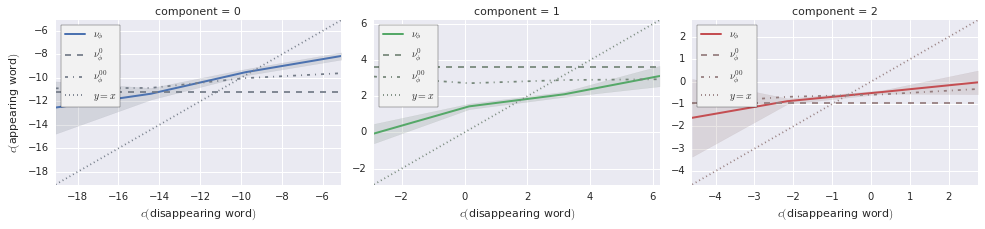

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.57621068  0.18050636  0.13811205  0.03934107  0.03751339]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.698485,-0.097231,0.337739,-0.566745,0.259580,0.004046
Component-1,-0.450126,-0.106058,0.447321,0.717814,-0.265884,0.009555
Component-2,-0.549360,0.107495,-0.809543,0.169842,-0.014590,0.047212


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 87568) |         | Elapsed Time: 0:02:59 ETA:  181 days, 23:23:47

  0% (   78 of 87568) |                    | Elapsed Time: 0:03:00 ETA:  0:16:02

  0% (  178 of 87568) |                    | Elapsed Time: 0:03:01 ETA:  0:13:32

  0% (  290 of 87568) |                    | Elapsed Time: 0:03:02 ETA:  0:12:10

  0% (  383 of 87568) |                    | Elapsed Time: 0:03:03 ETA:  0:12:17

  0% (  488 of 87568) |                    | Elapsed Time: 0:03:04 ETA:  0:11:59

  0% (  593 of 87568) |                    | Elapsed Time: 0:03:05 ETA:  0:11:46

  0% (  696 of 87568) |                    | Elapsed Time: 0:03:06 ETA:  0:11:39

  0% (  791 of 87568) |                    | Elapsed Time: 0:03:07 ETA:  0:11:43

  1% (  895 of 87568) |                    | Elapsed Time: 0:03:08 ETA:  0:11:36

  1% ( 1002 of 87568) |                    | Elapsed Time: 0:03:09 ETA:  0:11:06

  1% ( 1095 of 87568) |                    | Elapsed Time: 0:03:10 ETA:  0:11:07

  1% ( 1195 of 87568) |                    | Elapsed Time: 0:03:11 ETA:  0:11:18

  1% ( 1311 of 87568) |                    | Elapsed Time: 0:03:12 ETA:  0:10:55

  1% ( 1427 of 87568) |                    | Elapsed Time: 0:03:13 ETA:  0:10:44

  1% ( 1542 of 87568) |                    | Elapsed Time: 0:03:14 ETA:  0:10:34

  1% ( 1640 of 87568) |                    | Elapsed Time: 0:03:15 ETA:  0:10:38

  1% ( 1740 of 87568) |                    | Elapsed Time: 0:03:16 ETA:  0:10:33

  2% ( 1856 of 87568) |                    | Elapsed Time: 0:03:17 ETA:  0:10:22

  2% ( 1968 of 87568) |                    | Elapsed Time: 0:03:18 ETA:  0:10:17

  2% ( 2073 of 87568) |                    | Elapsed Time: 0:03:19 ETA:  0:10:10

  2% ( 2190 of 87568) |                    | Elapsed Time: 0:03:20 ETA:  0:10:16

  2% ( 2292 of 87568) |                    | Elapsed Time: 0:03:21 ETA:  0:10:28

  2% ( 2400 of 87568) |                    | Elapsed Time: 0:03:22 ETA:  0:10:34

  2% ( 2504 of 87568) |                    | Elapsed Time: 0:03:23 ETA:  0:10:26

  2% ( 2614 of 87568) |                    | Elapsed Time: 0:03:24 ETA:  0:10:15

  3% ( 2716 of 87568) |                    | Elapsed Time: 0:03:25 ETA:  0:10:27

  3% ( 2812 of 87568) |                    | Elapsed Time: 0:03:26 ETA:  0:10:42

  3% ( 2923 of 87568) |                    | Elapsed Time: 0:03:27 ETA:  0:10:35

  3% ( 3043 of 87568) |                    | Elapsed Time: 0:03:29 ETA:  0:10:38

  3% ( 3064 of 87568) |                    | Elapsed Time: 0:03:30 ETA:  0:12:00

  3% ( 3127 of 87568) |                    | Elapsed Time: 0:03:31 ETA:  0:12:49

  3% ( 3165 of 87568) |                    | Elapsed Time: 0:03:32 ETA:  0:14:18

  3% ( 3250 of 87568) |                    | Elapsed Time: 0:03:33 ETA:  0:14:44

  3% ( 3284 of 87568) |                    | Elapsed Time: 0:03:33 ETA:  0:15:32

  3% ( 3336 of 87568) |                    | Elapsed Time: 0:03:34 ETA:  0:17:04

  3% ( 3387 of 87568) |                    | Elapsed Time: 0:03:35 ETA:  0:18:39

  3% ( 3432 of 87568) |                    | Elapsed Time: 0:03:36 ETA:  0:21:38

  3% ( 3450 of 87568) |                    | Elapsed Time: 0:03:37 ETA:  0:27:01

  4% ( 3506 of 87568) |                    | Elapsed Time: 0:03:38 ETA:  0:24:36

  4% ( 3595 of 87568) |                    | Elapsed Time: 0:03:39 ETA:  0:22:47

  4% ( 3695 of 87568) |                    | Elapsed Time: 0:03:40 ETA:  0:19:58

  4% ( 3795 of 87568) |                    | Elapsed Time: 0:03:41 ETA:  0:19:18

  4% ( 3862 of 87568) |                    | Elapsed Time: 0:03:42 ETA:  0:19:28

  4% ( 3955 of 87568) |                    | Elapsed Time: 0:03:43 ETA:  0:17:55

  4% ( 4057 of 87568) |                    | Elapsed Time: 0:03:44 ETA:  0:16:15

  4% ( 4159 of 87568) |                    | Elapsed Time: 0:03:45 ETA:  0:14:36

  4% ( 4259 of 87568) |                    | Elapsed Time: 0:03:46 ETA:  0:12:43

  5% ( 4379 of 87568) |#                   | Elapsed Time: 0:03:47 ETA:  0:11:38

  5% ( 4489 of 87568) |#                   | Elapsed Time: 0:03:48 ETA:  0:11:13

  5% ( 4601 of 87568) |#                   | Elapsed Time: 0:03:49 ETA:  0:10:59

  5% ( 4700 of 87568) |#                   | Elapsed Time: 0:03:50 ETA:  0:10:24

  5% ( 4756 of 87568) |#                   | Elapsed Time: 0:03:51 ETA:  0:11:06

  5% ( 4804 of 87568) |#                   | Elapsed Time: 0:03:52 ETA:  0:12:10

  5% ( 4861 of 87568) |#                   | Elapsed Time: 0:03:53 ETA:  0:13:12

  5% ( 4923 of 87568) |#                   | Elapsed Time: 0:03:54 ETA:  0:14:09

  5% ( 4991 of 87568) |#                   | Elapsed Time: 0:03:55 ETA:  0:15:10

  5% ( 5055 of 87568) |#                   | Elapsed Time: 0:03:56 ETA:  0:15:41

  5% ( 5115 of 87568) |#                   | Elapsed Time: 0:03:58 ETA:  0:17:15

  5% ( 5176 of 87568) |#                   | Elapsed Time: 0:03:59 ETA:  0:19:08

  5% ( 5229 of 87568) |#                   | Elapsed Time: 0:04:00 ETA:  0:21:10

  6% ( 5278 of 87568) |#                   | Elapsed Time: 0:04:01 ETA:  0:21:25

  6% ( 5318 of 87568) |#                   | Elapsed Time: 0:04:02 ETA:  0:21:49

  6% ( 5359 of 87568) |#                   | Elapsed Time: 0:04:03 ETA:  0:22:38

  6% ( 5411 of 87568) |#                   | Elapsed Time: 0:04:04 ETA:  0:23:13

  6% ( 5473 of 87568) |#                   | Elapsed Time: 0:04:04 ETA:  0:22:26

  6% ( 5592 of 87568) |#                   | Elapsed Time: 0:04:05 ETA:  0:19:40

  6% ( 5707 of 87568) |#                   | Elapsed Time: 0:04:06 ETA:  0:17:25

  6% ( 5812 of 87568) |#                   | Elapsed Time: 0:04:07 ETA:  0:15:54

  6% ( 5928 of 87568) |#                   | Elapsed Time: 0:04:08 ETA:  0:14:03

  6% ( 6047 of 87568) |#                   | Elapsed Time: 0:04:09 ETA:  0:12:21

  7% ( 6158 of 87568) |#                   | Elapsed Time: 0:04:10 ETA:  0:10:55

  7% ( 6267 of 87568) |#                   | Elapsed Time: 0:04:11 ETA:  0:09:45

  7% ( 6386 of 87568) |#                   | Elapsed Time: 0:04:12 ETA:  0:08:45

  7% ( 6498 of 87568) |#                   | Elapsed Time: 0:04:13 ETA:  0:08:37

  7% ( 6568 of 87568) |#                   | Elapsed Time: 0:04:14 ETA:  0:08:40

  7% ( 6680 of 87568) |#                   | Elapsed Time: 0:04:15 ETA:  0:08:41

  7% ( 6800 of 87568) |#                   | Elapsed Time: 0:04:16 ETA:  0:08:29

  7% ( 6919 of 87568) |#                   | Elapsed Time: 0:04:17 ETA:  0:08:26

  8% ( 7014 of 87568) |#                   | Elapsed Time: 0:04:18 ETA:  0:08:45

  8% ( 7096 of 87568) |#                   | Elapsed Time: 0:04:19 ETA:  0:09:09

  8% ( 7217 of 87568) |#                   | Elapsed Time: 0:04:20 ETA:  0:08:58

  8% ( 7332 of 87568) |#                   | Elapsed Time: 0:04:21 ETA:  0:09:00

  8% ( 7451 of 87568) |#                   | Elapsed Time: 0:04:22 ETA:  0:08:53

  8% ( 7566 of 87568) |#                   | Elapsed Time: 0:04:23 ETA:  0:08:51

  8% ( 7646 of 87568) |#                   | Elapsed Time: 0:04:24 ETA:  0:09:16

  8% ( 7663 of 87568) |#                   | Elapsed Time: 0:04:24 ETA:  0:09:43

  8% ( 7741 of 87568) |#                   | Elapsed Time: 0:04:25 ETA:  0:10:24

  8% ( 7874 of 87568) |#                   | Elapsed Time: 0:04:26 ETA:  0:09:43

  9% ( 7967 of 87568) |#                   | Elapsed Time: 0:04:27 ETA:  0:09:32

  9% ( 8078 of 87568) |#                   | Elapsed Time: 0:04:28 ETA:  0:09:40

  9% ( 8186 of 87568) |#                   | Elapsed Time: 0:04:29 ETA:  0:09:46

  9% ( 8297 of 87568) |#                   | Elapsed Time: 0:04:30 ETA:  0:09:53

  9% ( 8383 of 87568) |#                   | Elapsed Time: 0:04:31 ETA:  0:10:23

  9% ( 8472 of 87568) |#                   | Elapsed Time: 0:04:32 ETA:  0:10:13

  9% ( 8558 of 87568) |#                   | Elapsed Time: 0:04:33 ETA:  0:10:11

  9% ( 8649 of 87568) |#                   | Elapsed Time: 0:04:34 ETA:  0:09:58

  9% ( 8736 of 87568) |#                   | Elapsed Time: 0:04:35 ETA:  0:10:44

 10% ( 8757 of 87568) |##                  | Elapsed Time: 0:04:36 ETA:  0:10:41

 10% ( 8883 of 87568) |##                  | Elapsed Time: 0:04:37 ETA:  0:10:23

 10% ( 8991 of 87568) |##                  | Elapsed Time: 0:04:38 ETA:  0:10:22

 10% ( 9108 of 87568) |##                  | Elapsed Time: 0:04:39 ETA:  0:10:14

 10% ( 9191 of 87568) |##                  | Elapsed Time: 0:04:40 ETA:  0:10:17

 10% ( 9284 of 87568) |##                  | Elapsed Time: 0:04:41 ETA:  0:10:12

 10% ( 9377 of 87568) |##                  | Elapsed Time: 0:04:42 ETA:  0:10:03

 10% ( 9469 of 87568) |##                  | Elapsed Time: 0:04:43 ETA:  0:10:01

 10% ( 9561 of 87568) |##                  | Elapsed Time: 0:04:44 ETA:  0:09:54

 11% ( 9658 of 87568) |##                  | Elapsed Time: 0:04:45 ETA:  0:09:53

 11% ( 9749 of 87568) |##                  | Elapsed Time: 0:04:46 ETA:  0:10:28

 11% ( 9852 of 87568) |##                  | Elapsed Time: 0:04:47 ETA:  0:11:09

 11% ( 9945 of 87568) |##                  | Elapsed Time: 0:04:48 ETA:  0:10:53

 11% (10040 of 87568) |##                  | Elapsed Time: 0:04:49 ETA:  0:10:49

 11% (10137 of 87568) |##                  | Elapsed Time: 0:04:50 ETA:  0:10:44

 11% (10236 of 87568) |##                  | Elapsed Time: 0:04:51 ETA:  0:10:35

 11% (10330 of 87568) |##                  | Elapsed Time: 0:04:52 ETA:  0:10:33

 11% (10426 of 87568) |##                  | Elapsed Time: 0:04:53 ETA:  0:10:33

 12% (10525 of 87568) |##                  | Elapsed Time: 0:04:54 ETA:  0:10:23

 12% (10612 of 87568) |##                  | Elapsed Time: 0:04:55 ETA:  0:10:32

 12% (10707 of 87568) |##                  | Elapsed Time: 0:04:56 ETA:  0:10:30

 12% (10801 of 87568) |##                  | Elapsed Time: 0:04:57 ETA:  0:10:28

 12% (10899 of 87568) |##                  | Elapsed Time: 0:04:58 ETA:  0:10:24

 12% (10946 of 87568) |##                  | Elapsed Time: 0:04:58 ETA:  0:10:27

 12% (11045 of 87568) |##                  | Elapsed Time: 0:04:59 ETA:  0:10:25

 12% (11145 of 87568) |##                  | Elapsed Time: 0:05:00 ETA:  0:10:20

 12% (11237 of 87568) |##                  | Elapsed Time: 0:05:01 ETA:  0:10:23

 12% (11332 of 87568) |##                  | Elapsed Time: 0:05:02 ETA:  0:10:27

 13% (11428 of 87568) |##                  | Elapsed Time: 0:05:03 ETA:  0:10:15

 13% (11527 of 87568) |##                  | Elapsed Time: 0:05:04 ETA:  0:10:10

 13% (11621 of 87568) |##                  | Elapsed Time: 0:05:05 ETA:  0:10:09

 13% (11715 of 87568) |##                  | Elapsed Time: 0:05:06 ETA:  0:10:13

 13% (11817 of 87568) |##                  | Elapsed Time: 0:05:07 ETA:  0:10:03

 13% (11929 of 87568) |##                  | Elapsed Time: 0:05:08 ETA:  0:09:49

 13% (12041 of 87568) |##                  | Elapsed Time: 0:05:09 ETA:  0:09:28

 13% (12135 of 87568) |##                  | Elapsed Time: 0:05:10 ETA:  0:09:25

 13% (12238 of 87568) |##                  | Elapsed Time: 0:05:11 ETA:  0:09:16

 14% (12345 of 87568) |##                  | Elapsed Time: 0:05:12 ETA:  0:09:05

 14% (12459 of 87568) |##                  | Elapsed Time: 0:05:13 ETA:  0:08:50

 14% (12565 of 87568) |##                  | Elapsed Time: 0:05:14 ETA:  0:08:39

 14% (12677 of 87568) |##                  | Elapsed Time: 0:05:15 ETA:  0:08:22

 14% (12788 of 87568) |##                  | Elapsed Time: 0:05:16 ETA:  0:08:14

 14% (12902 of 87568) |##                  | Elapsed Time: 0:05:17 ETA:  0:08:12

 14% (13012 of 87568) |##                  | Elapsed Time: 0:05:18 ETA:  0:08:17

 15% (13136 of 87568) |###                 | Elapsed Time: 0:05:19 ETA:  0:07:58

 15% (13244 of 87568) |###                 | Elapsed Time: 0:05:20 ETA:  0:07:56

 15% (13345 of 87568) |###                 | Elapsed Time: 0:05:21 ETA:  0:08:08

 15% (13438 of 87568) |###                 | Elapsed Time: 0:05:22 ETA:  0:08:18

 15% (13544 of 87568) |###                 | Elapsed Time: 0:05:23 ETA:  0:08:22

 15% (13668 of 87568) |###                 | Elapsed Time: 0:05:25 ETA:  0:08:09

 15% (13796 of 87568) |###                 | Elapsed Time: 0:05:26 ETA:  0:07:55

 15% (13920 of 87568) |###                 | Elapsed Time: 0:05:27 ETA:  0:07:41

 16% (14046 of 87568) |###                 | Elapsed Time: 0:05:28 ETA:  0:07:26

 16% (14169 of 87568) |###                 | Elapsed Time: 0:05:29 ETA:  0:07:17

 16% (14230 of 87568) |###                 | Elapsed Time: 0:05:29 ETA:  0:07:04

 16% (14359 of 87568) |###                 | Elapsed Time: 0:05:30 ETA:  0:06:41

 16% (14489 of 87568) |###                 | Elapsed Time: 0:05:31 ETA:  0:06:14

 16% (14620 of 87568) |###                 | Elapsed Time: 0:05:32 ETA:  0:05:57

 16% (14734 of 87568) |###                 | Elapsed Time: 0:05:33 ETA:  0:06:02

 16% (14839 of 87568) |###                 | Elapsed Time: 0:05:34 ETA:  0:06:17

 17% (14946 of 87568) |###                 | Elapsed Time: 0:05:35 ETA:  0:06:28

 17% (15051 of 87568) |###                 | Elapsed Time: 0:05:36 ETA:  0:06:42

 17% (15166 of 87568) |###                 | Elapsed Time: 0:05:37 ETA:  0:06:48

 17% (15269 of 87568) |###                 | Elapsed Time: 0:05:38 ETA:  0:07:03

 17% (15325 of 87568) |###                 | Elapsed Time: 0:05:39 ETA:  0:07:18

 17% (15425 of 87568) |###                 | Elapsed Time: 0:05:40 ETA:  0:07:42

 17% (15534 of 87568) |###                 | Elapsed Time: 0:05:41 ETA:  0:08:00

 17% (15638 of 87568) |###                 | Elapsed Time: 0:05:42 ETA:  0:08:07

 17% (15743 of 87568) |###                 | Elapsed Time: 0:05:43 ETA:  0:08:06

 18% (15839 of 87568) |###                 | Elapsed Time: 0:05:44 ETA:  0:08:15

 18% (15937 of 87568) |###                 | Elapsed Time: 0:05:45 ETA:  0:08:20

 18% (16045 of 87568) |###                 | Elapsed Time: 0:05:46 ETA:  0:08:28

 18% (16161 of 87568) |###                 | Elapsed Time: 0:05:47 ETA:  0:08:14

 18% (16269 of 87568) |###                 | Elapsed Time: 0:05:48 ETA:  0:08:10

 18% (16378 of 87568) |###                 | Elapsed Time: 0:05:49 ETA:  0:08:01

 18% (16419 of 87568) |###                 | Elapsed Time: 0:05:49 ETA:  0:08:07

 18% (16532 of 87568) |###                 | Elapsed Time: 0:05:50 ETA:  0:07:58

 18% (16628 of 87568) |###                 | Elapsed Time: 0:05:51 ETA:  0:08:06

 19% (16735 of 87568) |###                 | Elapsed Time: 0:05:52 ETA:  0:08:01

 19% (16836 of 87568) |###                 | Elapsed Time: 0:05:53 ETA:  0:07:57

 19% (16953 of 87568) |###                 | Elapsed Time: 0:05:54 ETA:  0:07:46

 19% (17063 of 87568) |###                 | Elapsed Time: 0:05:55 ETA:  0:07:51

 19% (17167 of 87568) |###                 | Elapsed Time: 0:05:56 ETA:  0:07:54

 19% (17242 of 87568) |###                 | Elapsed Time: 0:05:57 ETA:  0:08:25

 19% (17307 of 87568) |###                 | Elapsed Time: 0:05:58 ETA:  0:08:58

 19% (17391 of 87568) |###                 | Elapsed Time: 0:05:59 ETA:  0:09:28

 19% (17493 of 87568) |###                 | Elapsed Time: 0:06:00 ETA:  0:09:20

 20% (17514 of 87568) |####                | Elapsed Time: 0:06:00 ETA:  0:09:27

 20% (17621 of 87568) |####                | Elapsed Time: 0:06:01 ETA:  0:09:19

 20% (17735 of 87568) |####                | Elapsed Time: 0:06:02 ETA:  0:09:22

 20% (17808 of 87568) |####                | Elapsed Time: 0:06:03 ETA:  0:10:07

 20% (17847 of 87568) |####                | Elapsed Time: 0:06:04 ETA:  0:11:39

 20% (17925 of 87568) |####                | Elapsed Time: 0:06:05 ETA:  0:11:34

 20% (17988 of 87568) |####                | Elapsed Time: 0:06:06 ETA:  0:11:36

 20% (18080 of 87568) |####                | Elapsed Time: 0:06:07 ETA:  0:11:22

 20% (18200 of 87568) |####                | Elapsed Time: 0:06:08 ETA:  0:10:54

 20% (18315 of 87568) |####                | Elapsed Time: 0:06:09 ETA:  0:10:20

 21% (18431 of 87568) |####                | Elapsed Time: 0:06:10 ETA:  0:10:08

 21% (18549 of 87568) |####                | Elapsed Time: 0:06:11 ETA:  0:10:02

 21% (18609 of 87568) |####                | Elapsed Time: 0:06:12 ETA:  0:09:20

 21% (18720 of 87568) |####                | Elapsed Time: 0:06:13 ETA:  0:08:01

 21% (18835 of 87568) |####                | Elapsed Time: 0:06:14 ETA:  0:07:25

 21% (18950 of 87568) |####                | Elapsed Time: 0:06:15 ETA:  0:06:40

 21% (19027 of 87568) |####                | Elapsed Time: 0:06:16 ETA:  0:06:51

 21% (19125 of 87568) |####                | Elapsed Time: 0:06:17 ETA:  0:07:09

 21% (19255 of 87568) |####                | Elapsed Time: 0:06:18 ETA:  0:06:54

 22% (19385 of 87568) |####                | Elapsed Time: 0:06:19 ETA:  0:06:41

 22% (19518 of 87568) |####                | Elapsed Time: 0:06:20 ETA:  0:06:28

 22% (19650 of 87568) |####                | Elapsed Time: 0:06:21 ETA:  0:06:18

 22% (19703 of 87568) |####                | Elapsed Time: 0:06:21 ETA:  0:06:08

 22% (19823 of 87568) |####                | Elapsed Time: 0:06:22 ETA:  0:06:04

 22% (19948 of 87568) |####                | Elapsed Time: 0:06:23 ETA:  0:05:54

 22% (20091 of 87568) |####                | Elapsed Time: 0:06:24 ETA:  0:05:08

 23% (20215 of 87568) |####                | Elapsed Time: 0:06:25 ETA:  0:04:50

 23% (20300 of 87568) |####                | Elapsed Time: 0:06:26 ETA:  0:05:19

 23% (20384 of 87568) |####                | Elapsed Time: 0:06:27 ETA:  0:05:51

 23% (20460 of 87568) |####                | Elapsed Time: 0:06:28 ETA:  0:06:36

 23% (20536 of 87568) |####                | Elapsed Time: 0:06:29 ETA:  0:07:26

 23% (20627 of 87568) |####                | Elapsed Time: 0:06:30 ETA:  0:07:48

 23% (20736 of 87568) |####                | Elapsed Time: 0:06:31 ETA:  0:07:57

 23% (20798 of 87568) |####                | Elapsed Time: 0:06:32 ETA:  0:08:15

 23% (20919 of 87568) |####                | Elapsed Time: 0:06:33 ETA:  0:08:37

 24% (21037 of 87568) |####                | Elapsed Time: 0:06:34 ETA:  0:08:43

 24% (21155 of 87568) |####                | Elapsed Time: 0:06:35 ETA:  0:08:06

 24% (21267 of 87568) |####                | Elapsed Time: 0:06:36 ETA:  0:07:37

 24% (21390 of 87568) |####                | Elapsed Time: 0:06:37 ETA:  0:06:51

 24% (21488 of 87568) |####                | Elapsed Time: 0:06:38 ETA:  0:06:30

 24% (21579 of 87568) |####                | Elapsed Time: 0:06:39 ETA:  0:06:29

 24% (21693 of 87568) |####                | Elapsed Time: 0:06:40 ETA:  0:06:24

 24% (21832 of 87568) |####                | Elapsed Time: 0:06:41 ETA:  0:06:03

 25% (21892 of 87568) |#####               | Elapsed Time: 0:06:42 ETA:  0:06:10

 25% (21999 of 87568) |#####               | Elapsed Time: 0:06:43 ETA:  0:06:18

 25% (22100 of 87568) |#####               | Elapsed Time: 0:06:44 ETA:  0:06:32

 25% (22206 of 87568) |#####               | Elapsed Time: 0:06:45 ETA:  0:06:36

 25% (22318 of 87568) |#####               | Elapsed Time: 0:06:46 ETA:  0:06:45

 25% (22412 of 87568) |#####               | Elapsed Time: 0:06:47 ETA:  0:06:47

 25% (22510 of 87568) |#####               | Elapsed Time: 0:06:48 ETA:  0:06:40

 25% (22612 of 87568) |#####               | Elapsed Time: 0:06:49 ETA:  0:06:51

 25% (22726 of 87568) |#####               | Elapsed Time: 0:06:50 ETA:  0:07:13

 26% (22850 of 87568) |#####               | Elapsed Time: 0:06:51 ETA:  0:06:57

 26% (22987 of 87568) |#####               | Elapsed Time: 0:06:52 ETA:  0:06:29

 26% (23104 of 87568) |#####               | Elapsed Time: 0:06:53 ETA:  0:06:18

 26% (23213 of 87568) |#####               | Elapsed Time: 0:06:54 ETA:  0:06:20

 26% (23338 of 87568) |#####               | Elapsed Time: 0:06:55 ETA:  0:05:52

 26% (23469 of 87568) |#####               | Elapsed Time: 0:06:56 ETA:  0:05:25

 26% (23581 of 87568) |#####               | Elapsed Time: 0:06:57 ETA:  0:05:15

 27% (23702 of 87568) |#####               | Elapsed Time: 0:06:58 ETA:  0:05:08

 27% (23774 of 87568) |#####               | Elapsed Time: 0:06:59 ETA:  0:05:48

 27% (23881 of 87568) |#####               | Elapsed Time: 0:07:00 ETA:  0:06:05

 27% (23990 of 87568) |#####               | Elapsed Time: 0:07:01 ETA:  0:06:07

 27% (24082 of 87568) |#####               | Elapsed Time: 0:07:01 ETA:  0:06:07

 27% (24187 of 87568) |#####               | Elapsed Time: 0:07:02 ETA:  0:06:09

 27% (24298 of 87568) |#####               | Elapsed Time: 0:07:03 ETA:  0:06:20

 27% (24379 of 87568) |#####               | Elapsed Time: 0:07:05 ETA:  0:07:03

 27% (24502 of 87568) |#####               | Elapsed Time: 0:07:06 ETA:  0:06:52

 28% (24640 of 87568) |#####               | Elapsed Time: 0:07:07 ETA:  0:06:36

 28% (24772 of 87568) |#####               | Elapsed Time: 0:07:08 ETA:  0:05:46

 28% (24908 of 87568) |#####               | Elapsed Time: 0:07:09 ETA:  0:05:23

 28% (25024 of 87568) |#####               | Elapsed Time: 0:07:10 ETA:  0:05:17

 28% (25146 of 87568) |#####               | Elapsed Time: 0:07:11 ETA:  0:05:15

 28% (25176 of 87568) |#####               | Elapsed Time: 0:07:11 ETA:  0:05:06

 28% (25289 of 87568) |#####               | Elapsed Time: 0:07:12 ETA:  0:05:03

 28% (25380 of 87568) |#####               | Elapsed Time: 0:07:13 ETA:  0:04:54

 29% (25508 of 87568) |#####               | Elapsed Time: 0:07:14 ETA:  0:04:50

 29% (25653 of 87568) |#####               | Elapsed Time: 0:07:15 ETA:  0:04:44

 29% (25778 of 87568) |#####               | Elapsed Time: 0:07:16 ETA:  0:04:48

 29% (25900 of 87568) |#####               | Elapsed Time: 0:07:17 ETA:  0:04:57

 29% (25997 of 87568) |#####               | Elapsed Time: 0:07:18 ETA:  0:05:12

 29% (26097 of 87568) |#####               | Elapsed Time: 0:07:19 ETA:  0:05:26

 29% (26185 of 87568) |#####               | Elapsed Time: 0:07:20 ETA:  0:05:45

 30% (26271 of 87568) |######              | Elapsed Time: 0:07:21 ETA:  0:05:59

 30% (26350 of 87568) |######              | Elapsed Time: 0:07:22 ETA:  0:06:45

 30% (26468 of 87568) |######              | Elapsed Time: 0:07:23 ETA:  0:07:12

 30% (26574 of 87568) |######              | Elapsed Time: 0:07:24 ETA:  0:07:32

 30% (26667 of 87568) |######              | Elapsed Time: 0:07:25 ETA:  0:08:05

 30% (26755 of 87568) |######              | Elapsed Time: 0:07:26 ETA:  0:08:13

 30% (26846 of 87568) |######              | Elapsed Time: 0:07:27 ETA:  0:08:23

 30% (26958 of 87568) |######              | Elapsed Time: 0:07:28 ETA:  0:07:53

 30% (27075 of 87568) |######              | Elapsed Time: 0:07:29 ETA:  0:07:09

 31% (27209 of 87568) |######              | Elapsed Time: 0:07:30 ETA:  0:06:34

 31% (27299 of 87568) |######              | Elapsed Time: 0:07:31 ETA:  0:06:24

 31% (27365 of 87568) |######              | Elapsed Time: 0:07:32 ETA:  0:06:48

 31% (27480 of 87568) |######              | Elapsed Time: 0:07:33 ETA:  0:06:39

 31% (27591 of 87568) |######              | Elapsed Time: 0:07:34 ETA:  0:06:22

 31% (27721 of 87568) |######              | Elapsed Time: 0:07:35 ETA:  0:05:44

 31% (27855 of 87568) |######              | Elapsed Time: 0:07:36 ETA:  0:05:09

 31% (27962 of 87568) |######              | Elapsed Time: 0:07:37 ETA:  0:05:12

 32% (28073 of 87568) |######              | Elapsed Time: 0:07:38 ETA:  0:05:15

 32% (28168 of 87568) |######              | Elapsed Time: 0:07:39 ETA:  0:05:45

 32% (28194 of 87568) |######              | Elapsed Time: 0:07:41 ETA:  0:09:02

 32% (28286 of 87568) |######              | Elapsed Time: 0:07:42 ETA:  0:08:55

 32% (28421 of 87568) |######              | Elapsed Time: 0:07:43 ETA:  0:08:32

 32% (28460 of 87568) |######              | Elapsed Time: 0:07:44 ETA:  0:08:38

 32% (28546 of 87568) |######              | Elapsed Time: 0:07:45 ETA:  0:09:30

 32% (28639 of 87568) |######              | Elapsed Time: 0:07:46 ETA:  0:10:24

 32% (28742 of 87568) |######              | Elapsed Time: 0:07:47 ETA:  0:10:29

 32% (28813 of 87568) |######              | Elapsed Time: 0:07:48 ETA:  0:11:27

 32% (28880 of 87568) |######              | Elapsed Time: 0:07:49 ETA:  0:12:12

 33% (28987 of 87568) |######              | Elapsed Time: 0:07:50 ETA:  0:07:28

 33% (29091 of 87568) |######              | Elapsed Time: 0:07:51 ETA:  0:07:13

 33% (29182 of 87568) |######              | Elapsed Time: 0:07:52 ETA:  0:08:05

 33% (29260 of 87568) |######              | Elapsed Time: 0:07:53 ETA:  0:08:37

 33% (29337 of 87568) |######              | Elapsed Time: 0:07:54 ETA:  0:08:59

 33% (29396 of 87568) |######              | Elapsed Time: 0:07:55 ETA:  0:09:44

 33% (29483 of 87568) |######              | Elapsed Time: 0:07:56 ETA:  0:10:10

 33% (29555 of 87568) |######              | Elapsed Time: 0:07:57 ETA:  0:09:41

 33% (29645 of 87568) |######              | Elapsed Time: 0:07:58 ETA:  0:09:13

 33% (29735 of 87568) |######              | Elapsed Time: 0:07:59 ETA:  0:09:36

 34% (29800 of 87568) |######              | Elapsed Time: 0:08:00 ETA:  0:10:33

 34% (29907 of 87568) |######              | Elapsed Time: 0:08:01 ETA:  0:10:07

 34% (30015 of 87568) |######              | Elapsed Time: 0:08:02 ETA:  0:09:26

 34% (30060 of 87568) |######              | Elapsed Time: 0:08:03 ETA:  0:09:57

 34% (30177 of 87568) |######              | Elapsed Time: 0:08:04 ETA:  0:08:36

 34% (30292 of 87568) |######              | Elapsed Time: 0:08:05 ETA:  0:07:56

 34% (30403 of 87568) |######              | Elapsed Time: 0:08:06 ETA:  0:07:34

 34% (30478 of 87568) |######              | Elapsed Time: 0:08:07 ETA:  0:08:25

 34% (30541 of 87568) |######              | Elapsed Time: 0:08:08 ETA:  0:08:57

 35% (30649 of 87568) |#######             | Elapsed Time: 0:08:09 ETA:  0:08:34

 35% (30756 of 87568) |#######             | Elapsed Time: 0:08:10 ETA:  0:08:32

 35% (30863 of 87568) |#######             | Elapsed Time: 0:08:11 ETA:  0:07:13

 35% (30953 of 87568) |#######             | Elapsed Time: 0:08:12 ETA:  0:07:45

 35% (31059 of 87568) |#######             | Elapsed Time: 0:08:13 ETA:  0:07:55

 35% (31147 of 87568) |#######             | Elapsed Time: 0:08:14 ETA:  0:08:25

 35% (31236 of 87568) |#######             | Elapsed Time: 0:08:15 ETA:  0:07:23

 35% (31350 of 87568) |#######             | Elapsed Time: 0:08:16 ETA:  0:06:23

 35% (31462 of 87568) |#######             | Elapsed Time: 0:08:17 ETA:  0:06:09

 36% (31590 of 87568) |#######             | Elapsed Time: 0:08:18 ETA:  0:05:45

 36% (31685 of 87568) |#######             | Elapsed Time: 0:08:19 ETA:  0:05:54

 36% (31744 of 87568) |#######             | Elapsed Time: 0:08:20 ETA:  0:06:01

 36% (31857 of 87568) |#######             | Elapsed Time: 0:08:21 ETA:  0:05:39

 36% (31971 of 87568) |#######             | Elapsed Time: 0:08:22 ETA:  0:05:31

 36% (32077 of 87568) |#######             | Elapsed Time: 0:08:23 ETA:  0:05:14

 36% (32181 of 87568) |#######             | Elapsed Time: 0:08:24 ETA:  0:04:57

 36% (32299 of 87568) |#######             | Elapsed Time: 0:08:25 ETA:  0:04:55

 36% (32383 of 87568) |#######             | Elapsed Time: 0:08:26 ETA:  0:05:19

 37% (32464 of 87568) |#######             | Elapsed Time: 0:08:27 ETA:  0:06:03

 37% (32578 of 87568) |#######             | Elapsed Time: 0:08:28 ETA:  0:05:44

 37% (32645 of 87568) |#######             | Elapsed Time: 0:08:29 ETA:  0:06:14

 37% (32736 of 87568) |#######             | Elapsed Time: 0:08:30 ETA:  0:06:34

 37% (32838 of 87568) |#######             | Elapsed Time: 0:08:31 ETA:  0:07:16

 37% (32921 of 87568) |#######             | Elapsed Time: 0:08:32 ETA:  0:07:42

 37% (33022 of 87568) |#######             | Elapsed Time: 0:08:33 ETA:  0:08:01

 37% (33112 of 87568) |#######             | Elapsed Time: 0:08:34 ETA:  0:07:53

 37% (33216 of 87568) |#######             | Elapsed Time: 0:08:35 ETA:  0:07:21

 38% (33329 of 87568) |#######             | Elapsed Time: 0:08:36 ETA:  0:07:24

 38% (33439 of 87568) |#######             | Elapsed Time: 0:08:37 ETA:  0:06:31

 38% (33526 of 87568) |#######             | Elapsed Time: 0:08:38 ETA:  0:06:34

 38% (33569 of 87568) |#######             | Elapsed Time: 0:08:39 ETA:  0:07:28

 38% (33646 of 87568) |#######             | Elapsed Time: 0:08:40 ETA:  0:07:43

 38% (33727 of 87568) |#######             | Elapsed Time: 0:08:41 ETA:  0:07:45

 38% (33821 of 87568) |#######             | Elapsed Time: 0:08:42 ETA:  0:07:54

 38% (33933 of 87568) |#######             | Elapsed Time: 0:08:43 ETA:  0:07:15

 38% (34059 of 87568) |#######             | Elapsed Time: 0:08:44 ETA:  0:06:48

 39% (34156 of 87568) |#######             | Elapsed Time: 0:08:45 ETA:  0:07:03

 39% (34244 of 87568) |#######             | Elapsed Time: 0:08:46 ETA:  0:07:28

 39% (34305 of 87568) |#######             | Elapsed Time: 0:08:47 ETA:  0:08:00

 39% (34398 of 87568) |#######             | Elapsed Time: 0:08:48 ETA:  0:06:58

 39% (34485 of 87568) |#######             | Elapsed Time: 0:08:49 ETA:  0:06:44

 39% (34608 of 87568) |#######             | Elapsed Time: 0:08:50 ETA:  0:05:58

 39% (34725 of 87568) |#######             | Elapsed Time: 0:08:51 ETA:  0:05:36

 39% (34809 of 87568) |#######             | Elapsed Time: 0:08:52 ETA:  0:06:11

 39% (34917 of 87568) |#######             | Elapsed Time: 0:08:53 ETA:  0:06:30

 40% (35028 of 87568) |########            | Elapsed Time: 0:08:54 ETA:  0:06:07

 40% (35120 of 87568) |########            | Elapsed Time: 0:08:55 ETA:  0:05:32

 40% (35215 of 87568) |########            | Elapsed Time: 0:08:56 ETA:  0:05:29

 40% (35303 of 87568) |########            | Elapsed Time: 0:08:57 ETA:  0:05:28

 40% (35403 of 87568) |########            | Elapsed Time: 0:08:58 ETA:  0:05:52

 40% (35521 of 87568) |########            | Elapsed Time: 0:08:59 ETA:  0:05:49

 40% (35640 of 87568) |########            | Elapsed Time: 0:09:00 ETA:  0:05:10

 40% (35753 of 87568) |########            | Elapsed Time: 0:09:01 ETA:  0:05:04

 40% (35852 of 87568) |########            | Elapsed Time: 0:09:02 ETA:  0:05:11

 41% (35963 of 87568) |########            | Elapsed Time: 0:09:03 ETA:  0:05:03

 41% (36073 of 87568) |########            | Elapsed Time: 0:09:04 ETA:  0:04:46

 41% (36122 of 87568) |########            | Elapsed Time: 0:09:05 ETA:  0:04:33

 41% (36220 of 87568) |########            | Elapsed Time: 0:09:06 ETA:  0:04:22

 41% (36288 of 87568) |########            | Elapsed Time: 0:09:07 ETA:  0:04:55

 41% (36371 of 87568) |########            | Elapsed Time: 0:09:08 ETA:  0:05:29

 41% (36468 of 87568) |########            | Elapsed Time: 0:09:09 ETA:  0:05:51

 41% (36565 of 87568) |########            | Elapsed Time: 0:09:10 ETA:  0:06:09

 41% (36667 of 87568) |########            | Elapsed Time: 0:09:11 ETA:  0:06:05

 41% (36748 of 87568) |########            | Elapsed Time: 0:09:12 ETA:  0:06:39

 42% (36796 of 87568) |########            | Elapsed Time: 0:09:13 ETA:  0:08:17

 42% (36850 of 87568) |########            | Elapsed Time: 0:09:14 ETA:  0:09:35

 42% (36922 of 87568) |########            | Elapsed Time: 0:09:15 ETA:  0:10:16

 42% (37023 of 87568) |########            | Elapsed Time: 0:09:16 ETA:  0:09:17

 42% (37135 of 87568) |########            | Elapsed Time: 0:09:17 ETA:  0:08:34

 42% (37217 of 87568) |########            | Elapsed Time: 0:09:18 ETA:  0:08:41

 42% (37300 of 87568) |########            | Elapsed Time: 0:09:19 ETA:  0:08:59

 42% (37376 of 87568) |########            | Elapsed Time: 0:09:20 ETA:  0:09:39

 42% (37453 of 87568) |########            | Elapsed Time: 0:09:21 ETA:  0:09:46

 42% (37554 of 87568) |########            | Elapsed Time: 0:09:22 ETA:  0:08:08

 43% (37656 of 87568) |########            | Elapsed Time: 0:09:23 ETA:  0:06:49

 43% (37740 of 87568) |########            | Elapsed Time: 0:09:24 ETA:  0:06:33

 43% (37832 of 87568) |########            | Elapsed Time: 0:09:25 ETA:  0:06:44

 43% (37930 of 87568) |########            | Elapsed Time: 0:09:26 ETA:  0:07:01

 43% (38051 of 87568) |########            | Elapsed Time: 0:09:27 ETA:  0:06:25

 43% (38162 of 87568) |########            | Elapsed Time: 0:09:28 ETA:  0:05:53

 43% (38271 of 87568) |########            | Elapsed Time: 0:09:29 ETA:  0:05:18

 43% (38311 of 87568) |########            | Elapsed Time: 0:09:29 ETA:  0:04:46

 43% (38391 of 87568) |########            | Elapsed Time: 0:09:30 ETA:  0:05:06

 43% (38483 of 87568) |########            | Elapsed Time: 0:09:31 ETA:  0:05:16

 44% (38582 of 87568) |########            | Elapsed Time: 0:09:32 ETA:  0:04:59

 44% (38681 of 87568) |########            | Elapsed Time: 0:09:33 ETA:  0:04:50

 44% (38787 of 87568) |########            | Elapsed Time: 0:09:34 ETA:  0:04:41

 44% (38871 of 87568) |########            | Elapsed Time: 0:09:35 ETA:  0:05:18

 44% (38958 of 87568) |########            | Elapsed Time: 0:09:36 ETA:  0:05:45

 44% (39077 of 87568) |########            | Elapsed Time: 0:09:37 ETA:  0:05:32

 44% (39192 of 87568) |########            | Elapsed Time: 0:09:38 ETA:  0:05:20

 44% (39302 of 87568) |########            | Elapsed Time: 0:09:39 ETA:  0:04:50

 45% (39406 of 87568) |#########           | Elapsed Time: 0:09:40 ETA:  0:04:32

 45% (39495 of 87568) |#########           | Elapsed Time: 0:09:41 ETA:  0:04:41

 45% (39576 of 87568) |####       | Elapsed Time: 2:54:52 ETA:  11 days, 2:39:25

 45% (39578 of 87568) |####      | Elapsed Time: 2:54:53 ETA:  12 days, 14:06:01

 45% (39594 of 87568) |####      | Elapsed Time: 2:54:54 ETA:  13 days, 18:47:19

 45% (39616 of 87568) |####       | Elapsed Time: 2:54:55 ETA:  15 days, 3:45:11

 45% (39631 of 87568) |####       | Elapsed Time: 2:54:56 ETA:  18 days, 0:35:13

 45% (39648 of 87568) |####      | Elapsed Time: 2:54:57 ETA:  21 days, 22:11:00

 45% (39671 of 87568) |####       | Elapsed Time: 2:54:58 ETA:  27 days, 2:55:49

 45% (39691 of 87568) |####       | Elapsed Time: 2:54:59 ETA:  35 days, 3:38:57

 45% (39716 of 87568) |####       | Elapsed Time: 2:55:00 ETA:  45 days, 8:48:35

 45% (39741 of 87568) |#########           | Elapsed Time: 2:55:01 ETA:  0:00:00

 45% (39757 of 87568) |#########           | Elapsed Time: 2:55:03 ETA:  0:00:00

 45% (39770 of 87568) |#########           | Elapsed Time: 2:55:04 ETA:  0:00:00

 45% (39788 of 87568) |#########           | Elapsed Time: 2:55:05 ETA:  0:00:00

 45% (39817 of 87568) |#########           | Elapsed Time: 2:55:06 ETA:  0:00:00

 45% (39848 of 87568) |#########           | Elapsed Time: 2:55:07 ETA:  0:00:00

 45% (39873 of 87568) |#########           | Elapsed Time: 2:55:08 ETA:  0:00:00

 45% (39900 of 87568) |#########           | Elapsed Time: 2:55:09 ETA:  0:00:00

 45% (39926 of 87568) |#########           | Elapsed Time: 2:55:10 ETA:  0:00:00

 45% (39954 of 87568) |#########           | Elapsed Time: 2:55:11 ETA:  0:00:00

 45% (39990 of 87568) |#########           | Elapsed Time: 2:55:12 ETA:  0:00:00

 45% (40009 of 87568) |#########           | Elapsed Time: 2:55:13 ETA:  0:00:00

 45% (40024 of 87568) |#########           | Elapsed Time: 2:55:14 ETA:  0:00:00

 45% (40036 of 87568) |#########           | Elapsed Time: 2:55:15 ETA:  0:00:00

 45% (40045 of 87568) |#########           | Elapsed Time: 2:55:16 ETA:  0:00:00

 45% (40071 of 87568) |#########           | Elapsed Time: 2:55:17 ETA:  0:00:00

 45% (40106 of 87568) |#########           | Elapsed Time: 2:55:18 ETA:  0:00:00

 45% (40142 of 87568) |#########           | Elapsed Time: 2:55:19 ETA:  0:00:00

 45% (40176 of 87568) |#########           | Elapsed Time: 2:55:20 ETA:  0:00:00

 45% (40216 of 87568) |#########           | Elapsed Time: 2:55:21 ETA:  0:00:00

 45% (40241 of 87568) |#########           | Elapsed Time: 2:55:22 ETA:  0:00:00

 45% (40275 of 87568) |#########           | Elapsed Time: 2:55:24 ETA:  0:00:00

 46% (40305 of 87568) |#########           | Elapsed Time: 2:55:25 ETA:  0:00:00

 46% (40345 of 87568) |#########           | Elapsed Time: 2:55:26 ETA:  0:00:00

 46% (40385 of 87568) |#########           | Elapsed Time: 2:55:27 ETA:  0:00:00

 46% (40420 of 87568) |#########           | Elapsed Time: 2:55:28 ETA:  0:00:00

 46% (40443 of 87568) |#########           | Elapsed Time: 2:55:29 ETA:  0:00:00

 46% (40472 of 87568) |#########           | Elapsed Time: 2:55:30 ETA:  0:00:00

 46% (40501 of 87568) |#########           | Elapsed Time: 2:55:30 ETA:  0:00:00

 46% (40544 of 87568) |#########           | Elapsed Time: 2:55:31 ETA:  0:00:00

 46% (40585 of 87568) |#########           | Elapsed Time: 2:55:32 ETA:  0:00:00

 46% (40629 of 87568) |#########           | Elapsed Time: 2:55:33 ETA:  0:00:00

 46% (40664 of 87568) |#########           | Elapsed Time: 2:55:34 ETA:  0:00:00

 46% (40688 of 87568) |#########           | Elapsed Time: 2:55:35 ETA:  0:00:00

 46% (40721 of 87568) |#########           | Elapsed Time: 2:55:36 ETA:  0:00:00

 46% (40776 of 87568) |#########           | Elapsed Time: 2:55:38 ETA:  0:00:00

 46% (40823 of 87568) |#########           | Elapsed Time: 2:55:39 ETA:  0:00:00

 46% (40888 of 87568) |#########           | Elapsed Time: 2:55:40 ETA:  0:00:00

 46% (40922 of 87568) |#########           | Elapsed Time: 2:55:41 ETA:  0:00:00

 46% (40992 of 87568) |#########           | Elapsed Time: 2:55:42 ETA:  0:00:00

 46% (41046 of 87568) |#########           | Elapsed Time: 2:55:43 ETA:  0:00:00

 46% (41114 of 87568) |#########           | Elapsed Time: 2:55:44 ETA:  0:00:00

 47% (41196 of 87568) |#########           | Elapsed Time: 2:55:45 ETA:  0:00:00

 47% (41275 of 87568) |#########           | Elapsed Time: 2:55:46 ETA:  0:00:00

 47% (41349 of 87568) |#########           | Elapsed Time: 2:55:47 ETA:  0:00:00

 47% (41370 of 87568) |#########           | Elapsed Time: 2:55:48 ETA:  0:00:00

 47% (41409 of 87568) |#########           | Elapsed Time: 2:55:49 ETA:  0:00:00

 47% (41475 of 87568) |#########           | Elapsed Time: 2:55:50 ETA:  0:00:00

 47% (41513 of 87568) |#########           | Elapsed Time: 2:55:51 ETA:  0:00:00

 47% (41564 of 87568) |#########           | Elapsed Time: 2:55:52 ETA:  0:00:00

 47% (41595 of 87568) |#########           | Elapsed Time: 2:55:53 ETA:  0:00:00

 47% (41652 of 87568) |#########           | Elapsed Time: 2:55:54 ETA:  0:00:00

 47% (41706 of 87568) |#########           | Elapsed Time: 2:55:55 ETA:  0:00:00

 47% (41760 of 87568) |#########           | Elapsed Time: 2:55:56 ETA:  0:00:00

 47% (41818 of 87568) |#########           | Elapsed Time: 2:55:57 ETA:  0:00:00

 47% (41879 of 87568) |#########           | Elapsed Time: 2:55:58 ETA:  0:00:00

 47% (41949 of 87568) |#########           | Elapsed Time: 2:55:59 ETA:  0:00:00

 47% (42001 of 87568) |#########           | Elapsed Time: 2:56:00 ETA:  0:00:00

 48% (42038 of 87568) |#########           | Elapsed Time: 2:56:01 ETA:  0:00:00

 48% (42102 of 87568) |#########           | Elapsed Time: 2:56:02 ETA:  0:00:00

 48% (42150 of 87568) |#########           | Elapsed Time: 2:56:03 ETA:  0:00:00

 48% (42229 of 87568) |#########           | Elapsed Time: 2:56:04 ETA:  0:00:00

 48% (42308 of 87568) |#########           | Elapsed Time: 2:56:05 ETA:  0:00:00

 48% (42374 of 87568) |#########           | Elapsed Time: 2:56:06 ETA:  0:00:00

 48% (42445 of 87568) |#########           | Elapsed Time: 2:56:07 ETA:  0:00:00

 48% (42502 of 87568) |#########           | Elapsed Time: 2:56:08 ETA:  0:00:00

 48% (42590 of 87568) |#########           | Elapsed Time: 2:56:09 ETA:  0:00:00

 48% (42690 of 87568) |#########           | Elapsed Time: 2:56:10 ETA:  0:00:00

 48% (42783 of 87568) |#########           | Elapsed Time: 2:56:11 ETA:  0:00:00

 48% (42808 of 87568) |#########           | Elapsed Time: 2:56:12 ETA:  0:00:00

 48% (42886 of 87568) |#########           | Elapsed Time: 2:56:13 ETA:  0:00:00

 49% (42961 of 87568) |#########           | Elapsed Time: 2:56:14 ETA:  0:00:00

 49% (43052 of 87568) |#########           | Elapsed Time: 2:56:15 ETA:  0:00:00

 49% (43085 of 87568) |#########           | Elapsed Time: 2:56:16 ETA:  0:00:00

 49% (43149 of 87568) |#########           | Elapsed Time: 2:56:17 ETA:  0:00:00

 49% (43194 of 87568) |#########           | Elapsed Time: 2:56:18 ETA:  0:00:00

 49% (43297 of 87568) |#########           | Elapsed Time: 2:56:19 ETA:  0:00:00

 49% (43409 of 87568) |#########           | Elapsed Time: 2:56:20 ETA:  0:00:00

 49% (43499 of 87568) |#########           | Elapsed Time: 2:56:21 ETA:  0:00:00

 49% (43554 of 87568) |#########           | Elapsed Time: 2:56:22 ETA:  0:00:00

 49% (43641 of 87568) |#########           | Elapsed Time: 2:56:23 ETA:  0:00:00

 49% (43728 of 87568) |#########           | Elapsed Time: 2:56:24 ETA:  0:00:00

 50% (43784 of 87568) |##########          | Elapsed Time: 2:56:25 ETA:  0:00:00

 50% (43875 of 87568) |##########          | Elapsed Time: 2:56:26 ETA:  0:00:00

 50% (43956 of 87568) |##########          | Elapsed Time: 2:56:27 ETA:  0:00:00

 50% (44021 of 87568) |##########          | Elapsed Time: 2:56:28 ETA:  0:00:00

 50% (44073 of 87568) |##########          | Elapsed Time: 2:56:29 ETA:  0:00:00

 50% (44123 of 87568) |##########          | Elapsed Time: 2:56:30 ETA:  0:00:00

 50% (44225 of 87568) |##########          | Elapsed Time: 2:56:31 ETA:  0:00:00

 50% (44268 of 87568) |##########          | Elapsed Time: 2:56:32 ETA:  0:00:00

 50% (44331 of 87568) |##########          | Elapsed Time: 2:56:33 ETA:  0:00:00

 50% (44405 of 87568) |##########          | Elapsed Time: 2:56:34 ETA:  0:00:00

 50% (44447 of 87568) |##########          | Elapsed Time: 2:56:35 ETA:  0:00:00

 50% (44483 of 87568) |##########          | Elapsed Time: 2:56:36 ETA:  0:00:00

 50% (44556 of 87568) |##########          | Elapsed Time: 2:56:37 ETA:  0:00:00

 50% (44596 of 87568) |##########          | Elapsed Time: 2:56:38 ETA:  0:00:00

 50% (44644 of 87568) |##########          | Elapsed Time: 2:56:39 ETA:  0:00:00

 51% (44679 of 87568) |##########          | Elapsed Time: 2:56:40 ETA:  0:00:00

 51% (44700 of 87568) |##########          | Elapsed Time: 2:56:41 ETA:  0:00:00

 51% (44722 of 87568) |##########          | Elapsed Time: 2:56:42 ETA:  0:00:00

 51% (44751 of 87568) |##########          | Elapsed Time: 2:56:43 ETA:  0:00:00

 51% (44791 of 87568) |##########          | Elapsed Time: 2:56:44 ETA:  0:00:00

 51% (44850 of 87568) |##########          | Elapsed Time: 2:56:46 ETA:  0:00:00

 51% (44879 of 87568) |##########          | Elapsed Time: 2:56:47 ETA:  0:00:00

 51% (44939 of 87568) |##########          | Elapsed Time: 2:56:48 ETA:  0:00:00

 51% (44970 of 87568) |##########          | Elapsed Time: 2:56:49 ETA:  0:00:00

 51% (44998 of 87568) |##########          | Elapsed Time: 2:56:50 ETA:  0:00:00

 51% (45040 of 87568) |##########          | Elapsed Time: 2:56:51 ETA:  0:00:00

 51% (45074 of 87568) |##########          | Elapsed Time: 2:56:52 ETA:  0:00:00

 51% (45101 of 87568) |##########          | Elapsed Time: 2:56:53 ETA:  0:00:00

 51% (45138 of 87568) |##########          | Elapsed Time: 2:56:54 ETA:  0:00:00

 51% (45180 of 87568) |##########          | Elapsed Time: 2:56:55 ETA:  0:00:00

 51% (45225 of 87568) |##########          | Elapsed Time: 2:56:56 ETA:  0:00:00

 51% (45279 of 87568) |##########          | Elapsed Time: 2:56:57 ETA:  0:00:00

 51% (45327 of 87568) |##########          | Elapsed Time: 2:56:58 ETA:  0:00:00

 51% (45378 of 87568) |##########          | Elapsed Time: 2:56:59 ETA:  0:00:00

 51% (45401 of 87568) |##########          | Elapsed Time: 2:57:00 ETA:  0:00:00

 51% (45435 of 87568) |##########          | Elapsed Time: 2:57:01 ETA:  0:00:00

 51% (45472 of 87568) |##########          | Elapsed Time: 2:57:02 ETA:  0:00:00

 52% (45540 of 87568) |##########          | Elapsed Time: 2:57:03 ETA:  0:00:00

 52% (45599 of 87568) |##########          | Elapsed Time: 2:57:04 ETA:  0:00:00

 52% (45650 of 87568) |##########          | Elapsed Time: 2:57:06 ETA:  0:00:00

 52% (45688 of 87568) |##########          | Elapsed Time: 2:57:07 ETA:  0:00:00

 52% (45739 of 87568) |##########          | Elapsed Time: 2:57:08 ETA:  0:00:00

 52% (45757 of 87568) |##########          | Elapsed Time: 2:57:09 ETA:  0:00:00

 52% (45819 of 87568) |##########          | Elapsed Time: 2:57:10 ETA:  0:00:00

 52% (45882 of 87568) |##########          | Elapsed Time: 2:57:11 ETA:  0:00:00

 52% (45938 of 87568) |##########          | Elapsed Time: 2:57:12 ETA:  0:00:00

 52% (45974 of 87568) |##########          | Elapsed Time: 2:57:13 ETA:  0:00:00

 52% (46075 of 87568) |##########          | Elapsed Time: 2:57:14 ETA:  0:00:00

 52% (46142 of 87568) |##########          | Elapsed Time: 2:57:15 ETA:  0:00:00

 52% (46223 of 87568) |##########          | Elapsed Time: 2:57:16 ETA:  0:00:00

 52% (46327 of 87568) |##########          | Elapsed Time: 2:57:17 ETA:  0:00:00

 52% (46370 of 87568) |##########          | Elapsed Time: 2:57:18 ETA:  0:00:00

 53% (46455 of 87568) |##########          | Elapsed Time: 2:57:19 ETA:  0:00:00

 53% (46528 of 87568) |##########          | Elapsed Time: 2:57:20 ETA:  0:00:00

 53% (46619 of 87568) |##########          | Elapsed Time: 2:57:21 ETA:  0:00:00

 53% (46703 of 87568) |##########          | Elapsed Time: 2:57:22 ETA:  0:00:00

 53% (46800 of 87568) |##########          | Elapsed Time: 2:57:23 ETA:  0:00:00

 53% (46874 of 87568) |##########          | Elapsed Time: 2:57:24 ETA:  0:00:00

 53% (46937 of 87568) |##########          | Elapsed Time: 2:57:25 ETA:  0:00:00

 53% (47006 of 87568) |##########          | Elapsed Time: 2:57:26 ETA:  0:00:00

 53% (47068 of 87568) |##########          | Elapsed Time: 2:57:26 ETA:  0:00:00

 53% (47150 of 87568) |##########          | Elapsed Time: 2:57:27 ETA:  0:00:00

 53% (47261 of 87568) |##########          | Elapsed Time: 2:57:28 ETA:  0:00:00

 54% (47335 of 87568) |##########          | Elapsed Time: 2:57:29 ETA:  0:00:00

 54% (47451 of 87568) |##########          | Elapsed Time: 2:57:30 ETA:  0:00:00

 54% (47521 of 87568) |##########          | Elapsed Time: 2:57:31 ETA:  0:00:00

 54% (47580 of 87568) |##########          | Elapsed Time: 2:57:32 ETA:  0:00:00

 54% (47646 of 87568) |##########          | Elapsed Time: 2:57:34 ETA:  0:00:00

 54% (47727 of 87568) |##########          | Elapsed Time: 2:57:35 ETA:  0:00:00

 54% (47823 of 87568) |##########          | Elapsed Time: 2:57:36 ETA:  0:00:00

 54% (47942 of 87568) |##########          | Elapsed Time: 2:57:37 ETA:  0:00:00

 54% (48044 of 87568) |##########          | Elapsed Time: 2:57:38 ETA:  0:00:00

 54% (48097 of 87568) |##########          | Elapsed Time: 2:57:39 ETA:  0:00:00

 54% (48150 of 87568) |##########          | Elapsed Time: 2:57:40 ETA:  0:00:00

 55% (48163 of 87568) |###########         | Elapsed Time: 2:57:40 ETA:  0:00:00

 55% (48231 of 87568) |###########         | Elapsed Time: 2:57:41 ETA:  0:00:00

 55% (48335 of 87568) |###########         | Elapsed Time: 2:57:42 ETA:  0:00:00

 55% (48457 of 87568) |###########         | Elapsed Time: 2:57:43 ETA:  0:00:00

 55% (48563 of 87568) |###########         | Elapsed Time: 2:57:44 ETA:  0:00:00

 55% (48651 of 87568) |###########         | Elapsed Time: 2:57:45 ETA:  0:00:00

 55% (48731 of 87568) |###########         | Elapsed Time: 2:57:46 ETA:  0:00:00

 55% (48833 of 87568) |###########         | Elapsed Time: 2:57:47 ETA:  0:00:00

 55% (48931 of 87568) |###########         | Elapsed Time: 2:57:48 ETA:  0:00:00

 55% (49027 of 87568) |###########         | Elapsed Time: 2:57:49 ETA:  0:00:00

 56% (49083 of 87568) |###########         | Elapsed Time: 2:57:50 ETA:  0:00:00

 56% (49138 of 87568) |###########         | Elapsed Time: 2:57:51 ETA:  0:00:00

 56% (49180 of 87568) |###########         | Elapsed Time: 2:57:52 ETA:  0:00:00

 56% (49257 of 87568) |###########         | Elapsed Time: 2:57:53 ETA:  0:00:00

 56% (49355 of 87568) |###########         | Elapsed Time: 2:57:54 ETA:  0:00:00

 56% (49428 of 87568) |###########         | Elapsed Time: 2:57:55 ETA:  0:00:00

 56% (49549 of 87568) |###########         | Elapsed Time: 2:57:56 ETA:  0:00:00

 56% (49628 of 87568) |###########         | Elapsed Time: 2:57:57 ETA:  0:00:00

 56% (49708 of 87568) |###########         | Elapsed Time: 2:57:58 ETA:  0:00:00

 56% (49788 of 87568) |###########         | Elapsed Time: 2:57:59 ETA:  0:00:00

 56% (49852 of 87568) |###########         | Elapsed Time: 2:58:00 ETA:  0:00:00

 56% (49891 of 87568) |###########         | Elapsed Time: 2:58:01 ETA:  0:00:00

 57% (49984 of 87568) |###########         | Elapsed Time: 2:58:02 ETA:  0:00:00

 57% (50070 of 87568) |###########         | Elapsed Time: 2:58:03 ETA:  0:00:00

 57% (50147 of 87568) |###########         | Elapsed Time: 2:58:04 ETA:  0:00:00

 57% (50243 of 87568) |###########         | Elapsed Time: 2:58:05 ETA:  0:00:00

 57% (50352 of 87568) |###########         | Elapsed Time: 2:58:07 ETA:  0:00:00

 57% (50424 of 87568) |###########         | Elapsed Time: 2:58:08 ETA:  0:00:00

 57% (50533 of 87568) |###########         | Elapsed Time: 2:58:09 ETA:  0:00:00

 57% (50654 of 87568) |###########         | Elapsed Time: 2:58:10 ETA:  0:00:00

 57% (50783 of 87568) |###########         | Elapsed Time: 2:58:11 ETA:  0:00:00

 58% (50891 of 87568) |###########         | Elapsed Time: 2:58:12 ETA:  0:00:00

 58% (51004 of 87568) |###########         | Elapsed Time: 2:58:13 ETA:  0:00:00

 58% (51071 of 87568) |###########         | Elapsed Time: 2:58:14 ETA:  0:00:00

 58% (51147 of 87568) |###########         | Elapsed Time: 2:58:15 ETA:  0:00:00

 58% (51225 of 87568) |###########         | Elapsed Time: 2:58:16 ETA:  0:00:00

 58% (51302 of 87568) |###########         | Elapsed Time: 2:58:17 ETA:  0:00:00

 58% (51372 of 87568) |###########         | Elapsed Time: 2:58:18 ETA:  0:00:00

 58% (51447 of 87568) |###########         | Elapsed Time: 2:58:18 ETA:  0:00:00

 58% (51544 of 87568) |###########         | Elapsed Time: 2:58:19 ETA:  0:00:00

 58% (51640 of 87568) |###########         | Elapsed Time: 2:58:20 ETA:  0:00:00

 59% (51713 of 87568) |###########         | Elapsed Time: 2:58:21 ETA:  0:00:00

 59% (51827 of 87568) |###########         | Elapsed Time: 2:58:22 ETA:  0:00:00

 59% (51971 of 87568) |###########         | Elapsed Time: 2:58:23 ETA:  0:00:00

 59% (52064 of 87568) |###########         | Elapsed Time: 2:58:24 ETA:  0:00:00

 59% (52156 of 87568) |###########         | Elapsed Time: 2:58:25 ETA:  0:00:00

 59% (52248 of 87568) |###########         | Elapsed Time: 2:58:26 ETA:  0:00:00

 59% (52337 of 87568) |###########         | Elapsed Time: 2:58:27 ETA:  0:00:00

 59% (52431 of 87568) |###########         | Elapsed Time: 2:58:28 ETA:  0:00:00

 60% (52541 of 87568) |############        | Elapsed Time: 2:58:29 ETA:  0:00:00

 60% (52638 of 87568) |############        | Elapsed Time: 2:58:30 ETA:  0:00:00

 60% (52746 of 87568) |############        | Elapsed Time: 2:58:31 ETA:  0:00:00

 60% (52857 of 87568) |############        | Elapsed Time: 2:58:32 ETA:  0:00:00

 60% (52946 of 87568) |############        | Elapsed Time: 2:58:34 ETA:  0:00:00

 60% (53017 of 87568) |############        | Elapsed Time: 2:58:35 ETA:  0:00:00

 60% (53058 of 87568) |############        | Elapsed Time: 2:58:36 ETA:  0:00:00

 60% (53107 of 87568) |############        | Elapsed Time: 2:58:37 ETA:  0:00:00

 60% (53212 of 87568) |############        | Elapsed Time: 2:58:38 ETA:  0:00:00

 60% (53311 of 87568) |############        | Elapsed Time: 2:58:39 ETA:  0:00:00

 61% (53447 of 87568) |############        | Elapsed Time: 2:58:40 ETA:  0:00:00

 61% (53580 of 87568) |############        | Elapsed Time: 2:58:41 ETA:  0:00:00

 61% (53636 of 87568) |############        | Elapsed Time: 2:58:41 ETA:  0:00:00

 61% (53759 of 87568) |############        | Elapsed Time: 2:58:42 ETA:  0:00:00

 61% (53839 of 87568) |############        | Elapsed Time: 2:58:43 ETA:  0:00:00

 61% (53939 of 87568) |############        | Elapsed Time: 2:58:44 ETA:  0:00:00

 61% (54055 of 87568) |############        | Elapsed Time: 2:58:45 ETA:  0:00:00

 61% (54141 of 87568) |############        | Elapsed Time: 2:58:46 ETA:  0:00:00

 61% (54167 of 87568) |############        | Elapsed Time: 2:58:47 ETA:  0:00:00

 61% (54242 of 87568) |############        | Elapsed Time: 2:58:48 ETA:  0:00:00

 62% (54347 of 87568) |############        | Elapsed Time: 2:58:49 ETA:  0:00:00

 62% (54446 of 87568) |############        | Elapsed Time: 2:58:50 ETA:  0:00:00

 62% (54552 of 87568) |############        | Elapsed Time: 2:58:51 ETA:  0:00:00

 62% (54646 of 87568) |############        | Elapsed Time: 2:58:52 ETA:  0:00:00

 62% (54730 of 87568) |############        | Elapsed Time: 2:58:53 ETA:  0:00:00

 62% (54843 of 87568) |############        | Elapsed Time: 2:58:54 ETA:  0:00:00

 62% (54922 of 87568) |############        | Elapsed Time: 2:58:55 ETA:  0:00:00

 62% (54967 of 87568) |############        | Elapsed Time: 2:58:56 ETA:  0:00:00

 62% (55010 of 87568) |############        | Elapsed Time: 2:58:57 ETA:  0:00:00

 62% (55050 of 87568) |############        | Elapsed Time: 2:58:58 ETA:  0:00:00

 62% (55092 of 87568) |############        | Elapsed Time: 2:58:59 ETA:  0:00:00

 62% (55131 of 87568) |############        | Elapsed Time: 2:59:00 ETA:  0:00:00

 63% (55171 of 87568) |############        | Elapsed Time: 2:59:01 ETA:  0:00:00

 63% (55217 of 87568) |############        | Elapsed Time: 2:59:02 ETA:  0:00:00

 63% (55254 of 87568) |############        | Elapsed Time: 2:59:03 ETA:  0:00:00

 63% (55298 of 87568) |############        | Elapsed Time: 2:59:04 ETA:  0:00:00

 63% (55352 of 87568) |############        | Elapsed Time: 2:59:05 ETA:  0:00:00

 63% (55407 of 87568) |############        | Elapsed Time: 2:59:06 ETA:  0:00:00

 63% (55457 of 87568) |############        | Elapsed Time: 2:59:07 ETA:  0:00:00

 63% (55498 of 87568) |############        | Elapsed Time: 2:59:09 ETA:  0:00:00

 63% (55542 of 87568) |############        | Elapsed Time: 2:59:10 ETA:  0:00:00

 63% (55586 of 87568) |############        | Elapsed Time: 2:59:11 ETA:  0:00:00

 63% (55633 of 87568) |############        | Elapsed Time: 2:59:12 ETA:  0:00:00

 63% (55682 of 87568) |############        | Elapsed Time: 2:59:13 ETA:  0:00:00

 63% (55736 of 87568) |############        | Elapsed Time: 2:59:14 ETA:  0:00:00

 63% (55769 of 87568) |############        | Elapsed Time: 2:59:15 ETA:  0:00:00

 63% (55794 of 87568) |############        | Elapsed Time: 2:59:16 ETA:  0:00:00

 63% (55816 of 87568) |############        | Elapsed Time: 2:59:17 ETA:  0:00:00

 63% (55825 of 87568) |############        | Elapsed Time: 2:59:17 ETA:  0:00:00

 63% (55857 of 87568) |############        | Elapsed Time: 2:59:18 ETA:  0:00:00

 63% (55885 of 87568) |############        | Elapsed Time: 2:59:19 ETA:  0:00:00

 63% (55916 of 87568) |############        | Elapsed Time: 2:59:20 ETA:  0:00:00

 63% (55960 of 87568) |############        | Elapsed Time: 2:59:21 ETA:  0:00:00

 63% (56014 of 87568) |############        | Elapsed Time: 2:59:22 ETA:  0:00:00

 64% (56066 of 87568) |############        | Elapsed Time: 2:59:23 ETA:  0:00:00

 64% (56093 of 87568) |############        | Elapsed Time: 2:59:24 ETA:  0:00:00

 64% (56130 of 87568) |############        | Elapsed Time: 2:59:25 ETA:  0:00:00

 64% (56181 of 87568) |############        | Elapsed Time: 2:59:26 ETA:  0:00:00

 64% (56212 of 87568) |############        | Elapsed Time: 2:59:27 ETA:  0:00:00

 64% (56247 of 87568) |############        | Elapsed Time: 2:59:28 ETA:  0:00:00

 64% (56278 of 87568) |############        | Elapsed Time: 2:59:29 ETA:  0:00:00

 64% (56315 of 87568) |############        | Elapsed Time: 2:59:30 ETA:  0:00:00

 64% (56350 of 87568) |############        | Elapsed Time: 2:59:31 ETA:  0:00:00

 64% (56386 of 87568) |############        | Elapsed Time: 2:59:32 ETA:  0:00:00

 64% (56466 of 87568) |############        | Elapsed Time: 2:59:33 ETA:  0:00:00

 64% (56556 of 87568) |############        | Elapsed Time: 2:59:34 ETA:  0:00:00

 64% (56653 of 87568) |############        | Elapsed Time: 2:59:35 ETA:  0:00:00

 64% (56751 of 87568) |############        | Elapsed Time: 2:59:36 ETA:  0:00:00

 64% (56855 of 87568) |############        | Elapsed Time: 2:59:37 ETA:  0:00:00

 65% (56920 of 87568) |#############       | Elapsed Time: 2:59:38 ETA:  0:00:00

 65% (57013 of 87568) |#############       | Elapsed Time: 2:59:39 ETA:  0:00:00

 65% (57070 of 87568) |#############       | Elapsed Time: 2:59:40 ETA:  0:00:00

 65% (57192 of 87568) |#############       | Elapsed Time: 2:59:41 ETA:  0:00:00

 65% (57338 of 87568) |#############       | Elapsed Time: 2:59:42 ETA:  0:00:00

 65% (57434 of 87568) |#############       | Elapsed Time: 2:59:43 ETA:  0:00:00

 65% (57552 of 87568) |#############       | Elapsed Time: 2:59:44 ETA:  0:00:00

 65% (57631 of 87568) |#############       | Elapsed Time: 2:59:45 ETA:  0:00:00

 65% (57713 of 87568) |#############       | Elapsed Time: 2:59:46 ETA:  0:00:00

 65% (57785 of 87568) |#############       | Elapsed Time: 2:59:47 ETA:  0:00:00

 66% (57864 of 87568) |#############       | Elapsed Time: 2:59:48 ETA:  0:00:00

 66% (57979 of 87568) |#############       | Elapsed Time: 2:59:49 ETA:  0:00:00

 66% (58014 of 87568) |#############       | Elapsed Time: 2:59:49 ETA:  0:00:00

 66% (58120 of 87568) |#############       | Elapsed Time: 2:59:50 ETA:  0:00:00

 66% (58215 of 87568) |#############       | Elapsed Time: 2:59:52 ETA:  0:00:00

 66% (58313 of 87568) |#############       | Elapsed Time: 2:59:53 ETA:  0:00:00

 66% (58429 of 87568) |#############       | Elapsed Time: 2:59:54 ETA:  0:00:00

 66% (58527 of 87568) |#############       | Elapsed Time: 2:59:55 ETA:  0:00:00

 66% (58634 of 87568) |#############       | Elapsed Time: 2:59:56 ETA:  0:00:00

 67% (58718 of 87568) |#############       | Elapsed Time: 2:59:57 ETA:  0:00:00

 67% (58813 of 87568) |#############       | Elapsed Time: 2:59:58 ETA:  0:00:00

 67% (58930 of 87568) |#############       | Elapsed Time: 2:59:59 ETA:  0:00:00

 67% (59030 of 87568) |#############       | Elapsed Time: 3:00:00 ETA:  0:00:00

 67% (59109 of 87568) |#############       | Elapsed Time: 3:00:00 ETA:  0:00:00

 67% (59182 of 87568) |#############       | Elapsed Time: 3:00:01 ETA:  0:00:00

 67% (59298 of 87568) |#############       | Elapsed Time: 3:00:02 ETA:  0:00:00

 67% (59422 of 87568) |#############       | Elapsed Time: 3:00:03 ETA:  0:00:00

 67% (59518 of 87568) |#############       | Elapsed Time: 3:00:04 ETA:  0:00:00

 68% (59624 of 87568) |#############       | Elapsed Time: 3:00:05 ETA:  0:00:00

 68% (59726 of 87568) |#############       | Elapsed Time: 3:00:06 ETA:  0:00:00

 68% (59850 of 87568) |#############       | Elapsed Time: 3:00:07 ETA:  0:00:00

 68% (59933 of 87568) |#############       | Elapsed Time: 3:00:08 ETA:  0:00:00

 68% (60035 of 87568) |#############       | Elapsed Time: 3:00:09 ETA:  0:00:00

 68% (60131 of 87568) |#############       | Elapsed Time: 3:00:10 ETA:  0:00:00

 68% (60203 of 87568) |#############       | Elapsed Time: 3:00:11 ETA:  0:00:00

 68% (60322 of 87568) |#############       | Elapsed Time: 3:00:12 ETA:  0:00:00

 68% (60418 of 87568) |#############       | Elapsed Time: 3:00:13 ETA:  0:00:00

 69% (60508 of 87568) |#############       | Elapsed Time: 3:00:14 ETA:  0:00:00

 69% (60587 of 87568) |#############       | Elapsed Time: 3:00:15 ETA:  0:00:00

 69% (60709 of 87568) |#############       | Elapsed Time: 3:00:16 ETA:  0:00:00

 69% (60806 of 87568) |#############       | Elapsed Time: 3:00:17 ETA:  0:00:00

 69% (60921 of 87568) |#############       | Elapsed Time: 3:00:18 ETA:  0:00:00

 69% (61068 of 87568) |#############       | Elapsed Time: 3:00:19 ETA:  0:00:00

 69% (61186 of 87568) |#############       | Elapsed Time: 3:00:20 ETA:  0:00:00

 70% (61298 of 87568) |##############      | Elapsed Time: 3:00:21 ETA:  0:00:00

 70% (61404 of 87568) |##############      | Elapsed Time: 3:00:22 ETA:  0:00:00

 70% (61507 of 87568) |##############      | Elapsed Time: 3:00:23 ETA:  0:00:00

 70% (61627 of 87568) |##############      | Elapsed Time: 3:00:24 ETA:  0:00:00

 70% (61729 of 87568) |##############      | Elapsed Time: 3:00:25 ETA:  0:00:00

 70% (61818 of 87568) |##############      | Elapsed Time: 3:00:26 ETA:  0:00:00

 70% (61903 of 87568) |##############      | Elapsed Time: 3:00:27 ETA:  0:00:00

 70% (61976 of 87568) |##############      | Elapsed Time: 3:00:28 ETA:  0:00:00

 70% (62086 of 87568) |##############      | Elapsed Time: 3:00:29 ETA:  0:00:00

 71% (62176 of 87568) |##############      | Elapsed Time: 3:00:30 ETA:  0:00:00

 71% (62281 of 87568) |##############      | Elapsed Time: 3:00:31 ETA:  0:00:00

 71% (62365 of 87568) |##############      | Elapsed Time: 3:00:32 ETA:  0:00:00

 71% (62393 of 87568) |##############      | Elapsed Time: 3:00:32 ETA:  0:00:00

 71% (62521 of 87568) |##############      | Elapsed Time: 3:00:33 ETA:  0:00:00

 71% (62641 of 87568) |##############      | Elapsed Time: 3:00:34 ETA:  0:00:00

 71% (62740 of 87568) |##############      | Elapsed Time: 3:00:35 ETA:  0:00:00

 71% (62829 of 87568) |##############      | Elapsed Time: 3:00:36 ETA:  0:00:00

 71% (62926 of 87568) |##############      | Elapsed Time: 3:00:38 ETA:  0:00:00

 71% (63003 of 87568) |##############      | Elapsed Time: 3:00:39 ETA:  0:00:00

 72% (63105 of 87568) |##############      | Elapsed Time: 3:00:40 ETA:  0:00:00

 72% (63188 of 87568) |##############      | Elapsed Time: 3:00:41 ETA:  0:00:00

 72% (63279 of 87568) |##############      | Elapsed Time: 3:00:42 ETA:  0:00:00

 72% (63385 of 87568) |##############      | Elapsed Time: 3:00:43 ETA:  0:00:00

 72% (63487 of 87568) |##############      | Elapsed Time: 3:00:44 ETA:  0:00:00

 72% (63575 of 87568) |##############      | Elapsed Time: 3:00:45 ETA:  0:00:00

 72% (63685 of 87568) |##############      | Elapsed Time: 3:00:46 ETA:  0:00:00

 72% (63761 of 87568) |##############      | Elapsed Time: 3:00:47 ETA:  0:00:00

 72% (63815 of 87568) |##############      | Elapsed Time: 3:00:48 ETA:  0:00:00

 72% (63896 of 87568) |##############      | Elapsed Time: 3:00:49 ETA:  0:00:00

 73% (64005 of 87568) |##############      | Elapsed Time: 3:00:50 ETA:  0:00:00

 73% (64098 of 87568) |##############      | Elapsed Time: 3:00:51 ETA:  0:00:00

 73% (64216 of 87568) |##############      | Elapsed Time: 3:00:52 ETA:  0:00:00

 73% (64334 of 87568) |##############      | Elapsed Time: 3:00:53 ETA:  0:00:00

 73% (64444 of 87568) |##############      | Elapsed Time: 3:00:54 ETA:  0:00:00

 73% (64555 of 87568) |##############      | Elapsed Time: 3:00:55 ETA:  0:00:00

 73% (64582 of 87568) |##############      | Elapsed Time: 3:00:55 ETA:  0:00:00

 73% (64677 of 87568) |##############      | Elapsed Time: 3:00:56 ETA:  0:00:00

 73% (64779 of 87568) |##############      | Elapsed Time: 3:00:57 ETA:  0:00:00

 74% (64894 of 87568) |##############      | Elapsed Time: 3:00:58 ETA:  0:00:00

 74% (64953 of 87568) |##############      | Elapsed Time: 3:00:59 ETA:  0:00:00

 74% (65040 of 87568) |##############      | Elapsed Time: 3:01:00 ETA:  0:00:00

 74% (65156 of 87568) |##############      | Elapsed Time: 3:01:01 ETA:  0:00:00

 74% (65261 of 87568) |##############      | Elapsed Time: 3:01:02 ETA:  0:00:00

 74% (65348 of 87568) |##############      | Elapsed Time: 3:01:03 ETA:  0:00:00

 74% (65497 of 87568) |##############      | Elapsed Time: 3:01:04 ETA:  0:00:00

 74% (65622 of 87568) |##############      | Elapsed Time: 3:01:05 ETA:  0:00:00

 75% (65676 of 87568) |###############     | Elapsed Time: 3:01:05 ETA:  0:00:00

 75% (65773 of 87568) |###############     | Elapsed Time: 3:01:06 ETA:  0:00:00

 75% (65874 of 87568) |###############     | Elapsed Time: 3:01:07 ETA:  0:00:00

 75% (65939 of 87568) |###############     | Elapsed Time: 3:01:09 ETA:  0:00:00

 75% (66031 of 87568) |###############     | Elapsed Time: 3:01:10 ETA:  0:00:00

 75% (66160 of 87568) |###############     | Elapsed Time: 3:01:11 ETA:  0:00:00

 75% (66264 of 87568) |###############     | Elapsed Time: 3:01:12 ETA:  0:00:00

 75% (66334 of 87568) |###############     | Elapsed Time: 3:01:13 ETA:  0:00:00

 75% (66444 of 87568) |###############     | Elapsed Time: 3:01:14 ETA:  0:00:00

 75% (66542 of 87568) |###############     | Elapsed Time: 3:01:15 ETA:  0:00:00

 76% (66658 of 87568) |###############     | Elapsed Time: 3:01:16 ETA:  0:00:00

 76% (66771 of 87568) |###############     | Elapsed Time: 3:01:17 ETA:  0:00:00

 76% (66861 of 87568) |###############     | Elapsed Time: 3:01:18 ETA:  0:00:00

 76% (66969 of 87568) |###############     | Elapsed Time: 3:01:19 ETA:  0:00:00

 76% (67099 of 87568) |###############     | Elapsed Time: 3:01:20 ETA:  0:00:00

 76% (67215 of 87568) |###############     | Elapsed Time: 3:01:21 ETA:  0:00:00

 76% (67334 of 87568) |###############     | Elapsed Time: 3:01:22 ETA:  0:00:00

 76% (67426 of 87568) |###############     | Elapsed Time: 3:01:23 ETA:  0:00:00

 77% (67530 of 87568) |###############     | Elapsed Time: 3:01:24 ETA:  0:00:00

 77% (67659 of 87568) |###############     | Elapsed Time: 3:01:25 ETA:  0:00:00

 77% (67769 of 87568) |###############     | Elapsed Time: 3:01:26 ETA:  0:00:00

 77% (67819 of 87568) |###############     | Elapsed Time: 3:01:27 ETA:  0:00:00

 77% (67866 of 87568) |###############     | Elapsed Time: 3:01:27 ETA:  0:00:00

 77% (67973 of 87568) |###############     | Elapsed Time: 3:01:28 ETA:  0:00:00

 77% (68056 of 87568) |###############     | Elapsed Time: 3:01:29 ETA:  0:00:00

 77% (68153 of 87568) |###############     | Elapsed Time: 3:01:30 ETA:  0:00:00

 77% (68253 of 87568) |###############     | Elapsed Time: 3:01:31 ETA:  0:00:00

 78% (68363 of 87568) |###############     | Elapsed Time: 3:01:32 ETA:  0:00:00

 78% (68462 of 87568) |###############     | Elapsed Time: 3:01:33 ETA:  0:00:00

 78% (68535 of 87568) |###############     | Elapsed Time: 3:01:34 ETA:  0:00:00

 78% (68607 of 87568) |###############     | Elapsed Time: 3:01:35 ETA:  0:00:00

 78% (68702 of 87568) |###############     | Elapsed Time: 3:01:36 ETA:  0:00:00

 78% (68785 of 87568) |###############     | Elapsed Time: 3:01:37 ETA:  0:00:00

 78% (68861 of 87568) |###############     | Elapsed Time: 3:01:38 ETA:  0:00:00

 78% (68960 of 87568) |###############     | Elapsed Time: 3:01:39 ETA:  0:00:00

 78% (69091 of 87568) |###############     | Elapsed Time: 3:01:40 ETA:  0:00:00

 79% (69198 of 87568) |###############     | Elapsed Time: 3:01:41 ETA:  0:00:00

 79% (69304 of 87568) |###############     | Elapsed Time: 3:01:42 ETA:  0:00:00

 79% (69410 of 87568) |###############     | Elapsed Time: 3:01:43 ETA:  0:00:00

 79% (69495 of 87568) |###############     | Elapsed Time: 3:01:44 ETA:  0:00:00

 79% (69603 of 87568) |###############     | Elapsed Time: 3:01:45 ETA:  0:00:00

 79% (69709 of 87568) |###############     | Elapsed Time: 3:01:46 ETA:  0:00:00

 79% (69784 of 87568) |###############     | Elapsed Time: 3:01:47 ETA:  0:00:00

 79% (69888 of 87568) |###############     | Elapsed Time: 3:01:48 ETA:  0:00:00

 79% (69961 of 87568) |###############     | Elapsed Time: 3:01:49 ETA:  0:00:00

 79% (70035 of 87568) |###############     | Elapsed Time: 3:01:50 ETA:  0:00:00

 80% (70055 of 87568) |################    | Elapsed Time: 3:01:51 ETA:  0:00:00

 80% (70083 of 87568) |################    | Elapsed Time: 3:01:52 ETA:  0:00:00

 80% (70152 of 87568) |################    | Elapsed Time: 3:01:53 ETA:  0:00:00

 80% (70245 of 87568) |################    | Elapsed Time: 3:01:54 ETA:  0:00:00

 80% (70348 of 87568) |################    | Elapsed Time: 3:01:55 ETA:  0:00:00

 80% (70429 of 87568) |################    | Elapsed Time: 3:01:56 ETA:  0:00:00

 80% (70489 of 87568) |################    | Elapsed Time: 3:01:57 ETA:  0:00:00

 80% (70542 of 87568) |################    | Elapsed Time: 3:01:58 ETA:  0:00:00

 80% (70576 of 87568) |################    | Elapsed Time: 3:01:59 ETA:  0:00:00

 80% (70633 of 87568) |################    | Elapsed Time: 3:02:00 ETA:  0:00:00

 80% (70676 of 87568) |################    | Elapsed Time: 3:02:01 ETA:  0:00:00

 80% (70731 of 87568) |################    | Elapsed Time: 3:02:02 ETA:  0:00:00

 80% (70775 of 87568) |################    | Elapsed Time: 3:02:03 ETA:  0:00:00

 80% (70833 of 87568) |################    | Elapsed Time: 3:02:04 ETA:  0:00:00

 80% (70872 of 87568) |################    | Elapsed Time: 3:02:05 ETA:  0:00:00

 80% (70928 of 87568) |################    | Elapsed Time: 3:02:06 ETA:  0:00:00

 81% (70979 of 87568) |################    | Elapsed Time: 3:02:07 ETA:  0:00:00

 81% (71015 of 87568) |################    | Elapsed Time: 3:02:08 ETA:  0:00:00

 81% (71068 of 87568) |################    | Elapsed Time: 3:02:09 ETA:  0:00:00

 81% (71118 of 87568) |################    | Elapsed Time: 3:02:10 ETA:  0:00:00

 81% (71149 of 87568) |################    | Elapsed Time: 3:02:11 ETA:  0:00:00

 81% (71209 of 87568) |################    | Elapsed Time: 3:02:12 ETA:  0:00:00

 81% (71251 of 87568) |################    | Elapsed Time: 3:02:13 ETA:  0:00:00

 81% (71307 of 87568) |################    | Elapsed Time: 3:02:14 ETA:  0:00:00

 81% (71348 of 87568) |################    | Elapsed Time: 3:02:15 ETA:  0:00:00

 81% (71372 of 87568) |################    | Elapsed Time: 3:02:16 ETA:  0:00:00

 81% (71392 of 87568) |################    | Elapsed Time: 3:02:17 ETA:  0:00:00

 81% (71421 of 87568) |################    | Elapsed Time: 3:02:18 ETA:  0:00:00

 81% (71458 of 87568) |################    | Elapsed Time: 3:02:19 ETA:  0:00:00

 81% (71509 of 87568) |################    | Elapsed Time: 3:02:20 ETA:  0:00:00

 81% (71553 of 87568) |################    | Elapsed Time: 3:02:21 ETA:  0:00:00

 81% (71588 of 87568) |################    | Elapsed Time: 3:02:22 ETA:  0:00:00

 81% (71619 of 87568) |################    | Elapsed Time: 3:02:23 ETA:  0:00:00

 81% (71655 of 87568) |################    | Elapsed Time: 3:02:24 ETA:  0:00:00

 81% (71705 of 87568) |################    | Elapsed Time: 3:02:25 ETA:  0:00:00

 81% (71752 of 87568) |################    | Elapsed Time: 3:02:26 ETA:  0:00:00

 81% (71793 of 87568) |################    | Elapsed Time: 3:02:27 ETA:  0:00:00

 82% (71827 of 87568) |################    | Elapsed Time: 3:02:29 ETA:  0:00:00

 82% (71867 of 87568) |################    | Elapsed Time: 3:02:30 ETA:  0:00:00

 82% (71903 of 87568) |################    | Elapsed Time: 3:02:31 ETA:  0:00:00

 82% (71953 of 87568) |################    | Elapsed Time: 3:02:32 ETA:  0:00:00

 82% (72002 of 87568) |################    | Elapsed Time: 3:02:33 ETA:  0:00:00

 82% (72054 of 87568) |################    | Elapsed Time: 3:02:34 ETA:  0:00:00

 82% (72097 of 87568) |################    | Elapsed Time: 3:02:35 ETA:  0:00:00

 82% (72134 of 87568) |################    | Elapsed Time: 3:02:36 ETA:  0:00:00

 82% (72175 of 87568) |################    | Elapsed Time: 3:02:37 ETA:  0:00:00

 82% (72228 of 87568) |################    | Elapsed Time: 3:02:38 ETA:  0:00:00

 82% (72244 of 87568) |################    | Elapsed Time: 3:02:38 ETA:  0:00:00

 82% (72295 of 87568) |################    | Elapsed Time: 3:02:39 ETA:  0:00:00

 82% (72364 of 87568) |################    | Elapsed Time: 3:02:40 ETA:  0:00:00

 82% (72481 of 87568) |################    | Elapsed Time: 3:02:41 ETA:  0:00:00

 82% (72568 of 87568) |################    | Elapsed Time: 3:02:42 ETA:  0:00:00

 82% (72668 of 87568) |################    | Elapsed Time: 3:02:43 ETA:  0:00:00

 83% (72765 of 87568) |################    | Elapsed Time: 3:02:44 ETA:  0:00:00

 83% (72869 of 87568) |################    | Elapsed Time: 3:02:45 ETA:  0:00:00

 83% (72928 of 87568) |################    | Elapsed Time: 3:02:46 ETA:  0:00:00

 83% (72985 of 87568) |################    | Elapsed Time: 3:02:47 ETA:  0:00:00

 83% (73084 of 87568) |################    | Elapsed Time: 3:02:48 ETA:  0:00:00

 83% (73195 of 87568) |################    | Elapsed Time: 3:02:49 ETA:  0:00:00

 83% (73308 of 87568) |################    | Elapsed Time: 3:02:50 ETA:  0:00:00

 83% (73339 of 87568) |################    | Elapsed Time: 3:02:51 ETA:  0:00:00

 83% (73435 of 87568) |################    | Elapsed Time: 3:02:52 ETA:  0:00:00

 83% (73543 of 87568) |################    | Elapsed Time: 3:02:53 ETA:  0:00:00

 84% (73656 of 87568) |################    | Elapsed Time: 3:02:54 ETA:  0:00:00

 84% (73772 of 87568) |################    | Elapsed Time: 3:02:55 ETA:  0:00:00

 84% (73865 of 87568) |################    | Elapsed Time: 3:02:56 ETA:  0:00:00

 84% (73981 of 87568) |################    | Elapsed Time: 3:02:57 ETA:  0:00:00

 84% (74092 of 87568) |################    | Elapsed Time: 3:02:58 ETA:  0:00:00

 84% (74188 of 87568) |################    | Elapsed Time: 3:02:59 ETA:  0:00:00

 84% (74272 of 87568) |################    | Elapsed Time: 3:03:00 ETA:  0:00:00

 84% (74385 of 87568) |################    | Elapsed Time: 3:03:01 ETA:  0:00:00

 85% (74433 of 87568) |#################   | Elapsed Time: 3:03:01 ETA:  0:00:00

 85% (74538 of 87568) |#################   | Elapsed Time: 3:03:02 ETA:  0:00:00

 85% (74611 of 87568) |#################   | Elapsed Time: 3:03:03 ETA:  0:00:00

 85% (74709 of 87568) |#################   | Elapsed Time: 3:03:04 ETA:  0:00:00

 85% (74814 of 87568) |#################   | Elapsed Time: 3:03:05 ETA:  0:00:00

 85% (74922 of 87568) |#################   | Elapsed Time: 3:03:06 ETA:  0:00:00

 85% (75023 of 87568) |#################   | Elapsed Time: 3:03:07 ETA:  0:00:00

 85% (75116 of 87568) |#################   | Elapsed Time: 3:03:08 ETA:  0:00:00

 85% (75222 of 87568) |#################   | Elapsed Time: 3:03:09 ETA:  0:00:00

 86% (75335 of 87568) |#################   | Elapsed Time: 3:03:10 ETA:  0:00:00

 86% (75432 of 87568) |#################   | Elapsed Time: 3:03:11 ETA:  0:00:00

 86% (75528 of 87568) |#################   | Elapsed Time: 3:03:12 ETA:  0:00:00

 86% (75629 of 87568) |#################   | Elapsed Time: 3:03:13 ETA:  0:00:00

 86% (75739 of 87568) |#################   | Elapsed Time: 3:03:14 ETA:  0:00:00

 86% (75867 of 87568) |#################   | Elapsed Time: 3:03:15 ETA:  0:00:00

 86% (75986 of 87568) |#################   | Elapsed Time: 3:03:16 ETA:  0:00:00

 86% (76076 of 87568) |#################   | Elapsed Time: 3:03:17 ETA:  0:00:00

 86% (76166 of 87568) |#################   | Elapsed Time: 3:03:18 ETA:  0:00:00

 87% (76283 of 87568) |#################   | Elapsed Time: 3:03:19 ETA:  0:00:00

 87% (76383 of 87568) |#################   | Elapsed Time: 3:03:20 ETA:  0:00:00

 87% (76466 of 87568) |#################   | Elapsed Time: 3:03:21 ETA:  0:00:00

 87% (76562 of 87568) |#################   | Elapsed Time: 3:03:22 ETA:  0:00:00

 87% (76622 of 87568) |#################   | Elapsed Time: 3:03:24 ETA:  0:00:00

 87% (76698 of 87568) |#################   | Elapsed Time: 3:03:25 ETA:  0:00:00

 87% (76797 of 87568) |#################   | Elapsed Time: 3:03:26 ETA:  0:00:00

 87% (76906 of 87568) |#################   | Elapsed Time: 3:03:27 ETA:  0:00:00

 87% (76995 of 87568) |#################   | Elapsed Time: 3:03:28 ETA:  0:00:00

 88% (77096 of 87568) |#################   | Elapsed Time: 3:03:29 ETA:  0:00:00

 88% (77219 of 87568) |#################   | Elapsed Time: 3:03:30 ETA:  0:00:00

 88% (77309 of 87568) |#################   | Elapsed Time: 3:03:31 ETA:  0:00:00

 88% (77417 of 87568) |#################   | Elapsed Time: 3:03:32 ETA:  0:00:00

 88% (77507 of 87568) |#################   | Elapsed Time: 3:03:33 ETA:  0:00:00

 88% (77624 of 87568) |#################   | Elapsed Time: 3:03:34 ETA:  0:00:00

 88% (77717 of 87568) |#################   | Elapsed Time: 3:03:35 ETA:  0:00:00

 88% (77844 of 87568) |#################   | Elapsed Time: 3:03:36 ETA:  0:00:00

 89% (77943 of 87568) |#################   | Elapsed Time: 3:03:37 ETA:  0:00:00

 89% (78047 of 87568) |#################   | Elapsed Time: 3:03:38 ETA:  0:00:00

 89% (78169 of 87568) |#################   | Elapsed Time: 3:03:39 ETA:  0:00:00

 89% (78266 of 87568) |#################   | Elapsed Time: 3:03:40 ETA:  0:00:00

 89% (78344 of 87568) |#################   | Elapsed Time: 3:03:41 ETA:  0:00:00

 89% (78371 of 87568) |#################   | Elapsed Time: 3:03:42 ETA:  0:00:00

 89% (78468 of 87568) |#################   | Elapsed Time: 3:03:43 ETA:  0:00:00

 89% (78593 of 87568) |#################   | Elapsed Time: 3:03:44 ETA:  0:00:00

 89% (78675 of 87568) |#################   | Elapsed Time: 3:03:45 ETA:  0:00:00

 89% (78786 of 87568) |#################   | Elapsed Time: 3:03:46 ETA:  0:00:00

 90% (78812 of 87568) |##################  | Elapsed Time: 3:03:46 ETA:  0:00:00

 90% (78898 of 87568) |##################  | Elapsed Time: 3:03:47 ETA:  0:00:00

 90% (79000 of 87568) |##################  | Elapsed Time: 3:03:48 ETA:  0:00:00

 90% (79075 of 87568) |##################  | Elapsed Time: 3:03:49 ETA:  0:00:00

 90% (79174 of 87568) |##################  | Elapsed Time: 3:03:50 ETA:  0:00:00

 90% (79282 of 87568) |##################  | Elapsed Time: 3:03:51 ETA:  0:00:00

 90% (79383 of 87568) |##################  | Elapsed Time: 3:03:52 ETA:  0:00:00

 90% (79457 of 87568) |##################  | Elapsed Time: 3:03:53 ETA:  0:00:00

 90% (79553 of 87568) |##################  | Elapsed Time: 3:03:54 ETA:  0:00:00

 90% (79637 of 87568) |##################  | Elapsed Time: 3:03:55 ETA:  0:00:00

 91% (79750 of 87568) |##################  | Elapsed Time: 3:03:56 ETA:  0:00:00

 91% (79846 of 87568) |##################  | Elapsed Time: 3:03:57 ETA:  0:00:00

 91% (79906 of 87568) |##################  | Elapsed Time: 3:03:58 ETA:  0:00:00

 91% (79992 of 87568) |##################  | Elapsed Time: 3:03:59 ETA:  0:00:00

 91% (80075 of 87568) |##################  | Elapsed Time: 3:04:00 ETA:  0:00:00

 91% (80172 of 87568) |##################  | Elapsed Time: 3:04:01 ETA:  0:00:00

 91% (80270 of 87568) |##################  | Elapsed Time: 3:04:02 ETA:  0:00:00

 91% (80358 of 87568) |##################  | Elapsed Time: 3:04:03 ETA:  0:00:00

 91% (80452 of 87568) |##################  | Elapsed Time: 3:04:04 ETA:  0:00:00

 91% (80558 of 87568) |##################  | Elapsed Time: 3:04:05 ETA:  0:00:00

 92% (80663 of 87568) |##################  | Elapsed Time: 3:04:06 ETA:  0:00:00

 92% (80777 of 87568) |##################  | Elapsed Time: 3:04:07 ETA:  0:00:00

 92% (80888 of 87568) |##################  | Elapsed Time: 3:04:08 ETA:  0:00:00

 92% (81001 of 87568) |##################  | Elapsed Time: 3:04:09 ETA:  0:00:00

 92% (81097 of 87568) |##################  | Elapsed Time: 3:04:10 ETA:  0:00:00

 92% (81181 of 87568) |##################  | Elapsed Time: 3:04:11 ETA:  0:00:00

 92% (81232 of 87568) |##################  | Elapsed Time: 3:04:12 ETA:  0:00:00

 92% (81360 of 87568) |##################  | Elapsed Time: 3:04:13 ETA:  0:00:00

 93% (81457 of 87568) |##################  | Elapsed Time: 3:04:14 ETA:  0:00:00

 93% (81573 of 87568) |##################  | Elapsed Time: 3:04:15 ETA:  0:00:00

 93% (81646 of 87568) |##################  | Elapsed Time: 3:04:16 ETA:  0:00:00

 93% (81672 of 87568) |##################  | Elapsed Time: 3:04:17 ETA:  0:00:00

 93% (81771 of 87568) |##################  | Elapsed Time: 3:04:18 ETA:  0:00:00

 93% (81857 of 87568) |##################  | Elapsed Time: 3:04:19 ETA:  0:00:00

 93% (81950 of 87568) |##################  | Elapsed Time: 3:04:20 ETA:  0:00:00

 93% (82030 of 87568) |##################  | Elapsed Time: 3:04:21 ETA:  0:00:00

 93% (82066 of 87568) |##################  | Elapsed Time: 3:04:22 ETA:  0:00:00

 93% (82095 of 87568) |##################  | Elapsed Time: 3:04:23 ETA:  0:00:00

 93% (82134 of 87568) |##################  | Elapsed Time: 3:04:24 ETA:  0:00:00

 93% (82171 of 87568) |##################  | Elapsed Time: 3:04:25 ETA:  0:00:00

 93% (82228 of 87568) |##################  | Elapsed Time: 3:04:26 ETA:  0:00:00

 93% (82269 of 87568) |##################  | Elapsed Time: 3:04:27 ETA:  0:00:00

 94% (82315 of 87568) |##################  | Elapsed Time: 3:04:28 ETA:  0:00:00

 94% (82364 of 87568) |##################  | Elapsed Time: 3:04:29 ETA:  0:00:00

 94% (82399 of 87568) |##################  | Elapsed Time: 3:04:30 ETA:  0:00:00

 94% (82443 of 87568) |##################  | Elapsed Time: 3:04:31 ETA:  0:00:00

 94% (82498 of 87568) |##################  | Elapsed Time: 3:04:32 ETA:  0:00:00

 94% (82547 of 87568) |##################  | Elapsed Time: 3:04:33 ETA:  0:00:00

 94% (82601 of 87568) |##################  | Elapsed Time: 3:04:34 ETA:  0:00:00

 94% (82652 of 87568) |##################  | Elapsed Time: 3:04:35 ETA:  0:00:00

 94% (82703 of 87568) |##################  | Elapsed Time: 3:04:36 ETA:  0:00:00

 94% (82746 of 87568) |##################  | Elapsed Time: 3:04:37 ETA:  0:00:00

 94% (82794 of 87568) |##################  | Elapsed Time: 3:04:38 ETA:  0:00:00

 94% (82844 of 87568) |##################  | Elapsed Time: 3:04:39 ETA:  0:00:00

 94% (82898 of 87568) |##################  | Elapsed Time: 3:04:40 ETA:  0:00:00

 94% (82948 of 87568) |##################  | Elapsed Time: 3:04:41 ETA:  0:00:00

 94% (82985 of 87568) |##################  | Elapsed Time: 3:04:42 ETA:  0:00:00

 94% (83005 of 87568) |##################  | Elapsed Time: 3:04:43 ETA:  0:00:00

 94% (83030 of 87568) |##################  | Elapsed Time: 3:04:44 ETA:  0:00:00

 94% (83066 of 87568) |##################  | Elapsed Time: 3:04:45 ETA:  0:00:00

 94% (83093 of 87568) |##################  | Elapsed Time: 3:04:46 ETA:  0:00:00

 94% (83127 of 87568) |##################  | Elapsed Time: 3:04:47 ETA:  0:00:00

 94% (83178 of 87568) |##################  | Elapsed Time: 3:04:48 ETA:  0:00:00

 95% (83190 of 87568) |################### | Elapsed Time: 3:04:49 ETA:  0:00:00

 95% (83234 of 87568) |################### | Elapsed Time: 3:04:50 ETA:  0:00:00

 95% (83278 of 87568) |################### | Elapsed Time: 3:04:51 ETA:  0:00:00

 95% (83304 of 87568) |################### | Elapsed Time: 3:04:52 ETA:  0:00:00

 95% (83351 of 87568) |################### | Elapsed Time: 3:04:53 ETA:  0:00:00

 95% (83392 of 87568) |################### | Elapsed Time: 3:04:54 ETA:  0:00:00

 95% (83428 of 87568) |################### | Elapsed Time: 3:04:55 ETA:  0:00:00

 95% (83467 of 87568) |################### | Elapsed Time: 3:04:56 ETA:  0:00:00

 95% (83510 of 87568) |################### | Elapsed Time: 3:04:57 ETA:  0:00:00

 95% (83545 of 87568) |################### | Elapsed Time: 3:04:58 ETA:  0:00:00

 95% (83586 of 87568) |################### | Elapsed Time: 3:04:59 ETA:  0:00:00

 95% (83612 of 87568) |################### | Elapsed Time: 3:05:00 ETA:  0:00:00

 95% (83642 of 87568) |################### | Elapsed Time: 3:05:01 ETA:  0:00:00

 95% (83681 of 87568) |################### | Elapsed Time: 3:05:02 ETA:  0:00:00

 95% (83721 of 87568) |################### | Elapsed Time: 3:05:03 ETA:  0:00:00

 95% (83742 of 87568) |################### | Elapsed Time: 3:05:04 ETA:  0:00:00

 95% (83756 of 87568) |################### | Elapsed Time: 3:05:05 ETA:  0:00:00

 95% (83765 of 87568) |################### | Elapsed Time: 3:05:06 ETA:  0:00:00

 95% (83790 of 87568) |################### | Elapsed Time: 3:05:07 ETA:  0:00:00

 95% (83806 of 87568) |################### | Elapsed Time: 3:05:08 ETA:  0:00:00

 95% (83830 of 87568) |################### | Elapsed Time: 3:05:09 ETA:  0:00:00

 95% (83865 of 87568) |################### | Elapsed Time: 3:05:10 ETA:  0:00:00

 95% (83939 of 87568) |################### | Elapsed Time: 3:05:12 ETA:  0:00:00

 95% (84034 of 87568) |################### | Elapsed Time: 3:05:13 ETA:  0:00:00

 96% (84134 of 87568) |################### | Elapsed Time: 3:05:14 ETA:  0:00:00

 96% (84226 of 87568) |################### | Elapsed Time: 3:05:15 ETA:  0:00:00

 96% (84285 of 87568) |################### | Elapsed Time: 3:05:15 ETA:  0:00:00

 96% (84376 of 87568) |################### | Elapsed Time: 3:05:16 ETA:  0:00:00

 96% (84453 of 87568) |################### | Elapsed Time: 3:05:17 ETA:  0:00:00

 96% (84532 of 87568) |################### | Elapsed Time: 3:05:18 ETA:  0:00:00

 96% (84615 of 87568) |################### | Elapsed Time: 3:05:19 ETA:  0:00:00

 96% (84696 of 87568) |################### | Elapsed Time: 3:05:20 ETA:  0:00:00

 96% (84780 of 87568) |################### | Elapsed Time: 3:05:21 ETA:  0:00:00

 96% (84876 of 87568) |################### | Elapsed Time: 3:05:22 ETA:  0:00:00

 97% (84975 of 87568) |################### | Elapsed Time: 3:05:23 ETA:  0:00:00

 97% (85061 of 87568) |################### | Elapsed Time: 3:05:24 ETA:  0:00:00

 97% (85156 of 87568) |################### | Elapsed Time: 3:05:25 ETA:  0:00:00

 97% (85239 of 87568) |################### | Elapsed Time: 3:05:26 ETA:  0:00:00

 97% (85336 of 87568) |################### | Elapsed Time: 3:05:27 ETA:  0:00:00

 97% (85379 of 87568) |################### | Elapsed Time: 3:05:28 ETA:  0:00:00

 97% (85453 of 87568) |################### | Elapsed Time: 3:05:29 ETA:  0:00:00

 97% (85519 of 87568) |################### | Elapsed Time: 3:05:30 ETA:  0:00:00

 97% (85621 of 87568) |################### | Elapsed Time: 3:05:31 ETA:  0:00:00

 97% (85716 of 87568) |################### | Elapsed Time: 3:05:32 ETA:  0:00:00

 98% (85831 of 87568) |################### | Elapsed Time: 3:05:33 ETA:  0:00:00

 98% (85911 of 87568) |################### | Elapsed Time: 3:05:34 ETA:  0:00:00

 98% (86020 of 87568) |################### | Elapsed Time: 3:05:35 ETA:  0:00:00

 98% (86114 of 87568) |################### | Elapsed Time: 3:05:36 ETA:  0:00:00

 98% (86208 of 87568) |################### | Elapsed Time: 3:05:37 ETA:  0:00:00

 98% (86302 of 87568) |################### | Elapsed Time: 3:05:38 ETA:  0:00:00

 98% (86388 of 87568) |################### | Elapsed Time: 3:05:39 ETA:  0:00:00

 98% (86474 of 87568) |################### | Elapsed Time: 3:05:40 ETA:  0:00:00

 98% (86559 of 87568) |################### | Elapsed Time: 3:05:41 ETA:  0:00:00

 98% (86637 of 87568) |################### | Elapsed Time: 3:05:42 ETA:  0:00:00

 98% (86672 of 87568) |################### | Elapsed Time: 3:05:43 ETA:  0:00:00

 99% (86729 of 87568) |################### | Elapsed Time: 3:05:44 ETA:  0:00:00

 99% (86842 of 87568) |################### | Elapsed Time: 3:05:45 ETA:  0:00:00

 99% (86932 of 87568) |################### | Elapsed Time: 3:05:46 ETA:  0:00:00

 99% (87009 of 87568) |################### | Elapsed Time: 3:05:47 ETA:  0:00:00

 99% (87098 of 87568) |################### | Elapsed Time: 3:05:48 ETA:  0:00:00

 99% (87184 of 87568) |################### | Elapsed Time: 3:05:49 ETA:  0:00:00

 99% (87267 of 87568) |################### | Elapsed Time: 3:05:50 ETA:  0:00:00

 99% (87356 of 87568) |################### | Elapsed Time: 3:05:51 ETA:  0:00:00

 99% (87460 of 87568) |################### | Elapsed Time: 3:05:52 ETA:  0:00:00

100% (87568 of 87568) |####################| Elapsed Time: 3:05:53 Time: 3:05:53


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

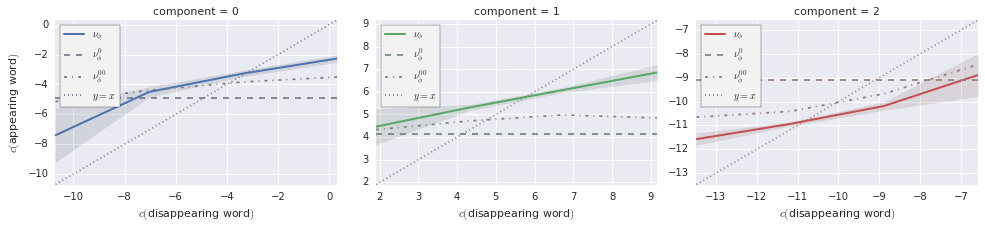

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.



Similarly, we mined 2741 (cluster-unique) substitutions, but the PCA is in fact computed on 1335 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.